In [1]:
suppressPackageStartupMessages({
    # library(gdata)
    # library(singlecellmethods)
    library(matrixStats)
    library(data.table)
    # library(viridis)
    # library(seaborn)
    library(RColorBrewer)
    # library(pheatmap)
    library(Matrix)
    # library(harmony)
    library(uwot)
    library(irlba)
    library(Seurat)
    library(tidyverse)
    # library(presto)
    library(SeuratData)
    library(dplyr)
    library(epitools)
})

In [4]:
source('../../../GSK/Github/minecraft-seq/scripts/utils.R') #extra functions 
source('../../../GSK/Github/minecraft-seq/scripts/misc_funcs.R') #extra functions #2


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract




In [5]:
meta_all = read_csv("../PlateMeta2Full.csv")
whitelist = read_csv("../RNA_ADT_Barcodes.csv")
whitelist = whitelist %>% rename(Well = "Well_ID") 

Rows: 10 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Condition, Barcode_RNA, Barcode_ADT, Barcode_DNA

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 384 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Well_ID, RNA_cell

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [6]:
n_neighbors = 10
logfc_threshold = 0.05
min_de_genes = 2

## Sample data

### Download data

In [9]:
# Download dataset using SeuratData.
InstallData(ds = "thp1.eccite")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [10]:
# Load object.
seu = LoadData(ds = "thp1.eccite")

# Normalize protein.
seu = NormalizeData(
  object = seu, 
  assay = "ADT", 
  normalization.method = "CLR", 
  margin = 2)

Validating object structure

Updating object slots

Ensuring keys are in the proper structure

Warning message:
“Assay RNA changing from Assay to Assay”
Warning message:
“Assay ADT changing from Assay to Assay”
Warning message:
“Assay HTO changing from Assay to Assay”
Warning message:
“Assay GDO changing from Assay to Assay”
Ensuring keys are in the proper structure

Ensuring feature names don't have underscores or pipes

Updating slots in RNA

Updating slots in ADT

Updating slots in HTO

Updating slots in GDO

Validating object structure for Assay ‘RNA’

Validating object structure for Assay ‘ADT’

Validating object structure for Assay ‘HTO’

Validating object structure for Assay ‘GDO’

Object representation is consistent with the most current Seurat version

Warning message:
“Assay RNA changing from Assay to Assay5”
Warning message:
“Assay ADT changing from Assay to Assay5”
Normalizing layer: counts

Normalizing across cells



In [13]:
seu

An object of class Seurat 
18776 features across 20729 samples within 4 assays 
Active assay: RNA (18649 features, 0 variable features)
 2 layers present: counts, data
 3 other assays present: ADT, HTO, GDO

### Mixscape

In [20]:
seu@meta.data %>% head(2)

orig.ident nCount_RNA nFeature_RNA nCount_HTO nFeature_HTO
l1_AAACCTGAGCCAGAAC Lane1      17207      3942         99         4           
l1_AAACCTGAGTGGACGT Lane1       9506      2948         35         5           
                    nCount_GDO nFeature_GDO nCount_ADT nFeature_ADT
l1_AAACCTGAGCCAGAAC 576        111          801        4           
l1_AAACCTGAGTGGACGT 190        111          545        4           
                    percent.mito ⋯ guide_ID guide_ID.global gene  con NT     
l1_AAACCTGAGCCAGAAC 2.295577     ⋯ STAT2g2  Singlet         STAT2 tx  STAT2g2
l1_AAACCTGAGTGGACGT 4.512939     ⋯ CAV1g4   Singlet         CAV1  tx  CAV1g4 
                    crispr    replicate S.Score    G2M.Score  Phase
l1_AAACCTGAGCCAGAAC Perturbed rep1      -0.2527157 -0.7713093 G1   
l1_AAACCTGAGTGGACGT Perturbed rep1      -0.1238019 -0.3326030 G1

In [15]:
# Prepare RNA assay for dimensionality reduction: 
# Normalize data, find variable features and scale data.
DefaultAssay(object = seu) = 'RNA'
seu = NormalizeData(object = seu) %>% FindVariableFeatures() %>% ScaleData()

Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix



In [16]:
# Run Principle Component Analysis (PCA) to reduce the dimensionality of the data.
seu <- RunPCA(object = seu)

PC_ 1 
Positive:  BIRC5, TOP2A, CDC20, MKI67, CENPF, TPX2, CDKN3, UBE2C, CKS1B, NUF2 
	   CCNA2, NUSAP1, KIAA0101, CENPA, HMGB2, SGOL1, TYMS, STMN1, MYBL2, GTSE1 
	   ASPM, H2AFZ, CDCA2, HMMR, CDCA8, KIF2C, CKAP2L, PTTG1, MND1, UBE2T 
Negative:  FTH1, FCER1G, NEAT1, SOD2, FTL, MAFB, BTG1, NPC2, CTSL, CTSC 
	   CTSB, SLC31A2, CHI3L1, FAM26F, TNFSF13B, GBP5, PLAUR, EVL, GK, ASAH1 
	   HLA-DRB1, HLA-DRA, SPP1, SCPEP1, CD74, SAT1, GBP1, SLAMF7, WARS, SDS 
PC_ 2 
Positive:  HYOU1, PDIA4, HSPA5, SDF2L1, MEI1, MANF, DNAJB9, NUCB2, TRIB3, WIPI1 
	   CRELD2, HSP90B1, MSTO1, SLC39A14, HERPUD1, ALDH1L2, DERL3, VIMP, SEC11C, SERP1 
	   PPAPDC1B, CDK2AP2, OSTC, DNAJB11, ERO1LB, SEC61G, SYVN1, TMED2, DNAJC3, PYCR1 
Negative:  HSPA8, KIAA0101, TYMS, MKI67, FCER1G, CHI3L1, ACTG1, TOP2A, MYBL2, HSP90AA1 
	   CCNA2, BIRC5, CLSPN, PKMYT1, NPC2, NUSAP1, HMGN2, ZWINT, CENPF, H2AFZ 
	   TMEM106C, CENPW, TUBA1B, STMN1, CTSC, ASF1B, CDCA5, HMGA1, RRM2, GTSE1 
PC_ 3 
Positive:  CDKN1A, ATF5, WARS, PLEK, CXCL10

In [17]:
# Run Uniform Manifold Approximation and Projection (UMAP) to visualize clustering in 2-D.
seu <- RunUMAP(object = seu, dims = 1:40)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
16:40:11 UMAP embedding parameters a = 0.9922 b = 1.112

16:40:11 Read 20729 rows and found 40 numeric columns

16:40:11 Using Annoy for neighbor search, n_neighbors = 30

16:40:12 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:40:20 Writing NN index file to temp file /tmp/Rtmp4HmIZq/file227faed13049

16:40:20 Searching Annoy index using 1 thread, search_k = 3000

16:40:49 Annoy recall = 100%

16:40:50 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors 

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


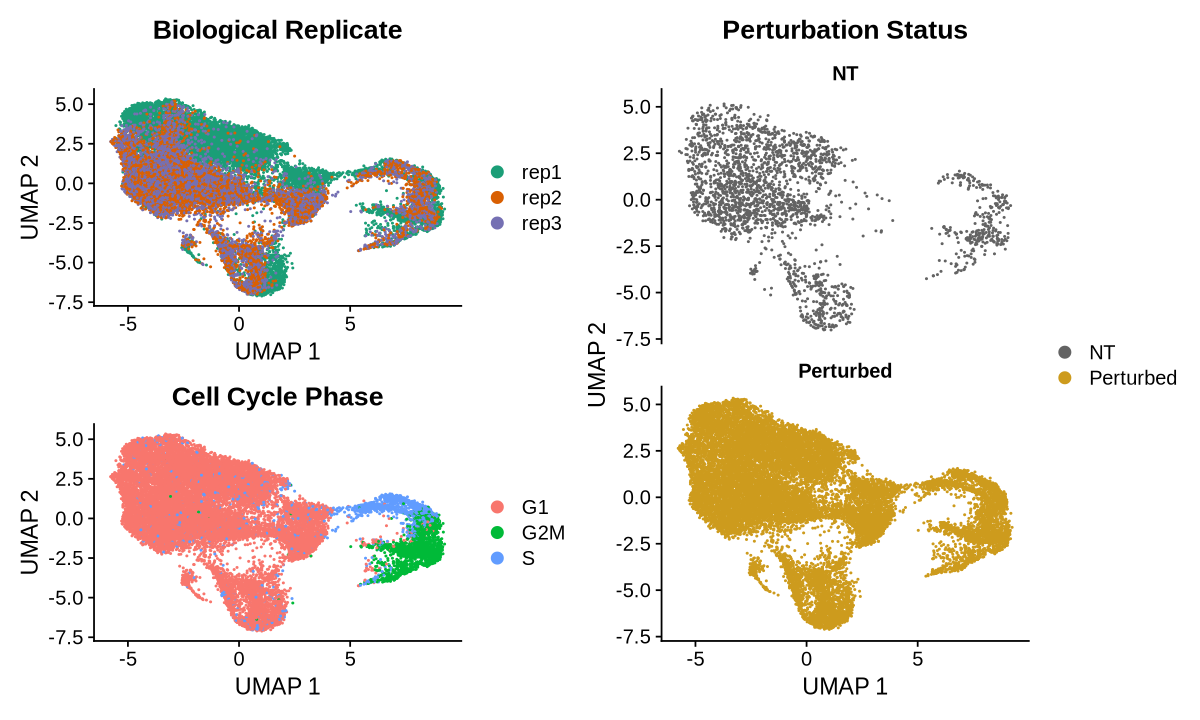

In [26]:
fig.size(6, 10)
# Generate plots to check if clustering is driven by biological replicate ID, 
# cell cycle phase or target gene class.
p1 <- DimPlot(
  object = seu, 
  group.by = 'replicate', 
  label = F, 
  pt.size = 0.2, 
  reduction = "umap", cols = "Dark2", repel = T) +
  scale_color_brewer(palette = "Dark2") +
  ggtitle("Biological Replicate") +
  xlab("UMAP 1") +
  ylab("UMAP 2")
  # custom_theme

p2 <- DimPlot(
  object = seu, 
  group.by = 'Phase', 
  label = F, pt.size = 0.2, 
  reduction = "umap", repel = T) + 
  ggtitle("Cell Cycle Phase") +
  ylab("UMAP 2") +
  xlab("UMAP 1")
  # custom_theme

p3 <- DimPlot(
  object = seu, 
  group.by = 'crispr', 
  pt.size = 0.2, 
  reduction = "umap", 
  split.by = "crispr", 
  ncol = 1, 
  cols = c("grey39","goldenrod3")) + 
  ggtitle("Perturbation Status") +
  ylab("UMAP 2") +
  xlab("UMAP 1")
  # custom_theme

# Visualize plots.
((p1 / p2 + plot_layout(guides = 'auto')) | p3 )


In [65]:
seu@meta.data['crispr'] %>% table

crispr
       NT Perturbed 
     2386     18343 

In [64]:
seu@meta.data['gene'] %>% table

gene
    ATF2     BRD4     CAV1     CD86    CMTM6     CUL3     ETV7   IFNGR1 
    1102      341      882     1197      817      274      841     1341 
  IFNGR2     IRF1     IRF7     JAK2   MARCH8      MYC   NFKBIA       NT 
    1213     1073      614     1024     1003      109      787     2386 
PDCD1LG2   POU2F2    SMAD4     SPI1    STAT1    STAT2    STAT3   STAT5A 
     617      662      659       48      444      661      493      659 
TNFRSF14   UBE2L6 
     964      518 

In [ ]:
seu@meta.data['gene']

In [ ]:
seu@meta.data['gene'] %>% table

In [ ]:
seu %>% str

In [27]:
# Calculate perturbation signature (PRTB).
seu <- CalcPerturbSig(
  object = seu, 
  assay = "RNA", 
  slot = "data", 
  gd.class = "gene", 
  nt.cell.class = "NT", 
  reduction = "pca", 
  ndims = 40, 
  num.neighbors = n_neighbors, 
  split.by = "replicate", 
  new.assay.name = "PRTB")



Processing rep1

Processing rep3

Processing rep2

Warning message:
“Layer counts isn't present in the assay object; returning NULL”


In [ ]:
seu

In [ ]:
seu@assays$PRTB

In [28]:
# Prepare PRTB assay for dimensionality reduction: 
# Normalize data, find variable features and center data.
DefaultAssay(object = seu) <- 'PRTB'

# Use variable features from RNA assay.
VariableFeatures(object = seu) <- VariableFeatures(object = seu[["RNA"]])
seu <- ScaleData(object = seu, do.scale = F, do.center = T)


Centering data matrix



In [29]:
# Run PCA to reduce the dimensionality of the data.
seu <- RunPCA(object = seu, reduction.key = 'prtbpca', reduction.name = 'prtbpca')

# Run UMAP to visualize clustering in 2-D.
seu <- RunUMAP(
  object = seu, 
  dims = 1:40, 
  reduction = 'prtbpca', 
  reduction.key = 'prtbumap', 
  reduction.name = 'prtbumap')


Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from prtbpca to prtbpca_”
prtbpca_ 1 
Positive:  SPP1, RPLP0, S100A4, VCAN, TREM2, ZFP36L1, LGALS1, TGFBI, TGFBR1, CAPN2 
	   RPSA, SORL1, LMNA, FSCN1, RPS2, YWHAH, CSF1R, ADORA3, CORO1A, HSPB1 
	   MMP9, ID2, VAT1, GLO1, APOE, AP1S2, MGST3, IL8, COL6A1, NFKBIA 
Negative:  CD74, HLA-DRA, CXCL10, WARS, GBP5, GBP1, IFI27, HLA-DRB1, FAM26F, PSMB9 
	   HLA-DRB5, PSME2, IL18BP, SOCS1, HLA-DPA1, HLA-DQB1, SOD2, NCF1, IFITM1, S100A8 
	   HLA-A, CTSL, GLUL, CD70, FCGR1B, HLA-DMA, HLA-DPB1, LY6E, CHI3L1, FCER1G 
prtbpca_ 2 
Positive:  CXCL10, CXCL11, CXCL9, CCL2, SOCS1, GBP1, IL32, MX1, IFIT3, SOD2 
	   TNFSF13B, GBP5, LY6E, ISG20, TNFSF10, GYPC, CCL8, RSAD2, IDO1, IL18BP 
	   IFIT2, USP18, BAZ1A, GCH1, MX2, IFITM1, IFI27, H1F0, ICAM1, MARCKS 
Negative:  S100A8, S100A9, SPP1, S100A4, ALOX5AP, CTSD, S100A6, C19orf59, GRN, CHI3L1 
	   HLA-DRB5, HLA-DRB1, HLA-DRA, TREM2, IL8, APOC1, TIMP1, S

In [ ]:
seu

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


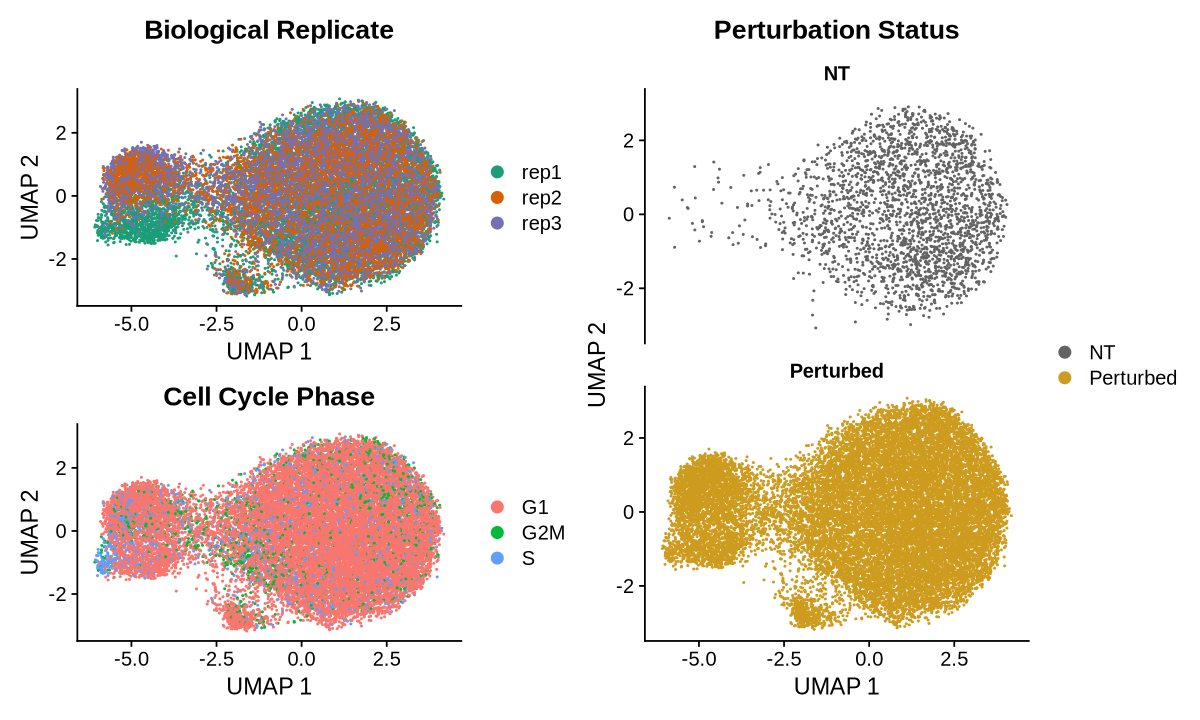

In [30]:
# Generate plots to check if clustering is driven by biological replicate ID, 
# cell cycle phase or target gene class.
q1 <- DimPlot(
  object = seu, 
  group.by = 'replicate', 
  reduction = 'prtbumap', 
  pt.size = 0.2, cols = "Dark2", label = F, repel = T) +
  scale_color_brewer(palette = "Dark2") +
  ggtitle("Biological Replicate") +
  ylab("UMAP 2") +
  xlab("UMAP 1") 

q2 <- DimPlot(
  object = seu, 
  group.by = 'Phase', 
  reduction = 'prtbumap', 
  pt.size = 0.2, label = F, repel = T) +
  ggtitle("Cell Cycle Phase") +
  ylab("UMAP 2") +
  xlab("UMAP 1") 

q3 <- DimPlot(
  object = seu,
  group.by = 'crispr',
  reduction = 'prtbumap', 
  split.by = "crispr", 
  ncol = 1, 
  pt.size = 0.2, 
  cols = c("grey39","goldenrod3")) +
  ggtitle("Perturbation Status") +
  ylab("UMAP 2") +
  xlab("UMAP 1")

# Visualize plots.
(q1 / q2 + plot_layout(guides = 'auto') | q3)


In [ ]:
# Run mixscape.
seu <- RunMixscape(
  object = seu, 
  assay = "PRTB", 
  slot = "scale.data",  # "scale.data",
  labels = "gene", 
  nt.class.name = "NT", 
  min.de.genes = min_de_genes, 
  logfc.threshold = logfc_threshold,
  iter.num = 10, 
  de.assay = "RNA", 
  verbose = TRUE,
  prtb.type = "KO")


Processing STAT2

Finding new perturbation gene set

For a (much!) faster implementation of the Wilcoxon Rank Sum Test,
(default method for FindMarkers) please install the presto package
--------------------------------------------
install.packages('devtools')
devtools::install_github('immunogenomics/presto')
--------------------------------------------
After installation of presto, Seurat will automatically use the more 
efficient implementation (no further action necessary).
This message will be shown once per session

Processing CAV1

Finding new perturbation gene set

Processing STAT1

Finding new perturbation gene set



In [35]:
seu

An object of class Seurat 
23062 features across 20729 samples within 5 assays 
Active assay: PRTB (4286 features, 0 variable features)
 2 layers present: data, scale.data
 4 other assays present: RNA, ADT, HTO, GDO
 4 dimensional reductions calculated: pca, umap, prtbpca, prtbumap

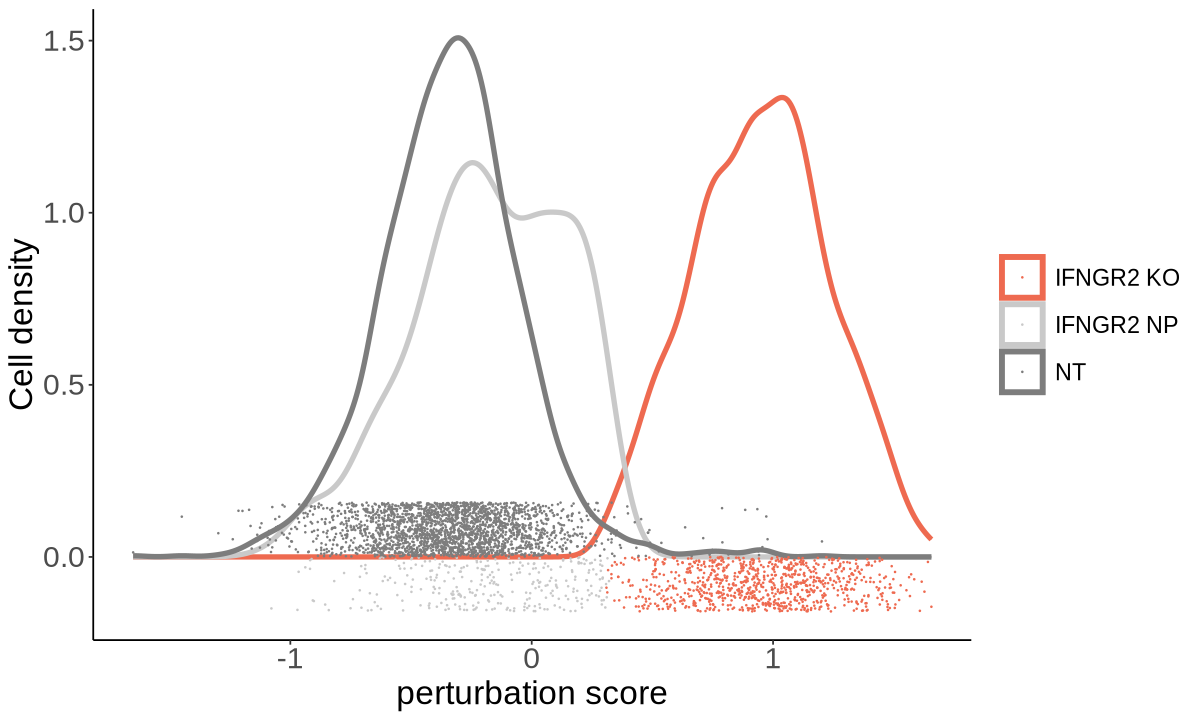

In [36]:
# Explore the perturbation scores of cells.
PlotPerturbScore(object = seu, 
                 # target.gene.class = 'Edited_Index',
                 target.gene.ident = "IFNGR2", 
                 mixscape.class = "mixscape_class", 
                 col = "coral2") 

In [ ]:
# Calculate percentage of KO cells for all target gene classes.
df <- prop.table(table(seu$mixscape_class.global, seu$NT),2)

df2 <- reshape2::melt(df)
df2$Var2 <- as.character(df2$Var2)
test <- df2[which(df2$Var1 == "KO"),]
test <- test[order(test$value, decreasing = T),]
new.levels <- test$Var2
df2$Var2 <- factor(df2$Var2, levels = new.levels )
df2$Var1 <- factor(df2$Var1, levels = c("NT", "NP", "KO"))
df2$gene <- sapply(as.character(df2$Var2), function(x) strsplit(x, split = "g")[[1]][1])
df2$guide_number <- sapply(as.character(df2$Var2), 
                           function(x) strsplit(x, split = "g")[[1]][2])
df3 <- df2[-c(which(df2$gene == "NT")),]

p1 <- ggplot(df3, aes(x = guide_number, y = value*100, fill= Var1)) +
  geom_bar(stat= "identity") +
  theme_classic()+
  scale_fill_manual(values = c("grey49", "grey79","coral1")) + 
  ylab("% of cells") +
  xlab("sgRNA")


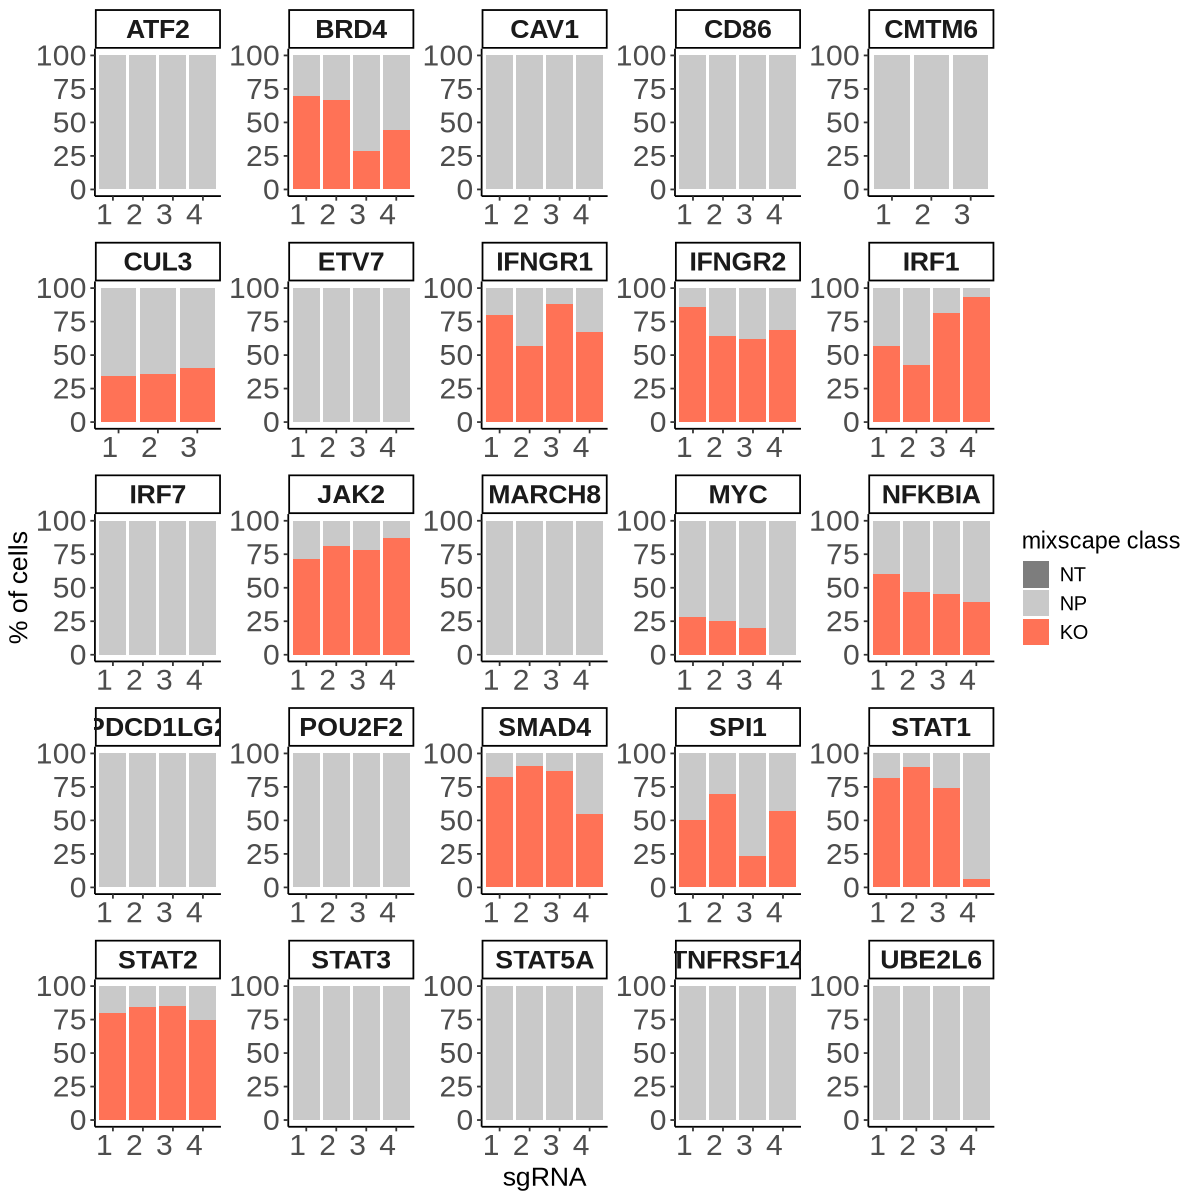

In [41]:
fig.size(10, 10)
p1 + theme(axis.text.x = element_text(size = 18, hjust = 1), 
           axis.text.y = element_text(size = 18), 
           axis.title = element_text(size = 16), 
           strip.text = element_text(size=16, face = "bold")) + 
  facet_wrap(vars(gene),ncol = 5, scales = "free") +
  labs(fill = "mixscape class") +theme(legend.title = element_text(size = 14),
          legend.text = element_text(size = 12))


In [ ]:
Idents(object = seu) <- "gene"
MixscapeHeatmap(object = seu, 
                ident.1 = "NT", 
                ident.2 = "IFNGR2", 
                balanced = F, 
                assay = "RNA", 
                max.genes = 20, angle = 0, 
                group.by = "mixscape_class", 
                max.cells.group = 300, 
                size=6.5) + NoLegend() +theme(axis.text.y = element_text(size = 16))


In [ ]:
seu %>% str

In [ ]:
seu

In [37]:
seu@meta.data %>% head(2)

orig.ident nCount_RNA nFeature_RNA nCount_HTO nFeature_HTO
l1_AAACCTGAGCCAGAAC Lane1      17207      3942         99         4           
l1_AAACCTGAGTGGACGT Lane1       9506      2948         35         5           
                    nCount_GDO nFeature_GDO nCount_ADT nFeature_ADT
l1_AAACCTGAGCCAGAAC 576        111          801        4           
l1_AAACCTGAGTGGACGT 190        111          545        4           
                    percent.mito ⋯ con NT      crispr    replicate S.Score   
l1_AAACCTGAGCCAGAAC 2.295577     ⋯ tx  STAT2g2 Perturbed rep1      -0.2527157
l1_AAACCTGAGTGGACGT 4.512939     ⋯ tx  CAV1g4  Perturbed rep1      -0.1238019
                    G2M.Score  Phase mixscape_class mixscape_class_p_ko
l1_AAACCTGAGCCAGAAC -0.7713093 G1    STAT2 KO       0.9999125          
l1_AAACCTGAGTGGACGT -0.3326030 G1    CAV1 NP        0.0000000          
                    mixscape_class.global
l1_AAACCTGAGCCAGAAC KO                   
l1_AAACCTGAGTGGACGT NP

In [42]:
seu@meta.data['gene']

gene    
l1_AAACCTGAGCCAGAAC STAT2   
l1_AAACCTGAGTGGACGT CAV1    
l1_AAACCTGCATGAGCGA STAT1   
l1_AAACCTGTCTTGTCAT CD86    
l1_AAACGGGAGAACAACT IRF7    
l1_AAACGGGAGACAGAGA NT      
l1_AAACGGGAGCGCTTAT ATF2    
l1_AAACGGGGTAAGGGAA STAT3   
l1_AAACGGGGTTGTACAC JAK2    
l1_AAACGGGTCGGATGTT NFKBIA  
l1_AAAGATGGTCAGTGGA CAV1    
l1_AAAGATGTCAGCTCTC SMAD4   
l1_AAAGATGTCGGCTTGG STAT5A  
l1_AAAGCAACACACGCTG STAT3   
l1_AAAGCAACAGTGGAGT NT      
l1_AAAGCAATCTTGTTTG CMTM6   
l1_AAAGTAGAGAGCTTCT JAK2    
l1_AAAGTAGAGCTGAACG ATF2    
l1_AAAGTAGAGGATCGCA NT      
l1_AAAGTAGAGGCATGTG CMTM6   
l1_AAAGTAGCATTGAGCT CMTM6   
l1_AAAGTAGCATTTCAGG STAT5A  
l1_AAAGTAGTCTAACTGG IFNGR1  
l1_AAATGCCGTACCAGTT NFKBIA  
l1_AAATGCCTCAGCTTAG UBE2L6  
l1_AACACGTAGATGTGTA CAV1    
l1_AACACGTAGCAGACTG JAK2    
l1_AACACGTAGGAGCGTT CD86    
l1_AACACGTAGGATGCGT CAV1    
l1_AACACGTCATCCTTGC PDCD1LG2
⋮                   ⋮       
l8_TTTATGCTCACGAAGG JAK2    
l8_TTTATGCTCCCAACGG POU2F2  
l8_TTTATGCTCCCGGATG STAT2   
l8_TTTATGCTCGGAGCAA IRF1    
l8_TTTCCTCCAAGACACG NT      
l8_TTTCCTCGTAAGGGCT MYC     
l8_TTTCCTCGTACGCACC MARCH8  
l8_TTTCCTCTCAGCAACT NT      
l8_TTTCCTCTCGGTTAAC ATF2    
l8_TTTCCTCTCTAAGCCA IRF1    
l8_TTTGCGCAGACCCACC CAV1    
l8_TTTGCGCAGAGCAATT PDCD1LG2
l8_TTTGCGCAGGAGCGTT TNFRSF14
l8_TTTGCGCCAGTAAGAT POU2F2  
l8_TTTGCGCGTAGCGTGA NFKBIA  
l8_TTTGCGCGTCACTGGC ATF2    
l8_TTTGCGCTCTAACTCT STAT1   
l8_TTTGGTTGTCTAAAGA JAK2    
l8_TTTGGTTGTTCCTCCA NT      
l8_TTTGGTTTCCGCATAA SPI1    
l8_TTTGGTTTCGACCAGC NT      
l8_TTTGTCAAGACTTGAA ETV7    
l8_TTTGTCAAGCGATTCT STAT3   
l8_TTTGTCAAGTTACGGG NT      
l8_TTTGTCAGTAGGCATG ETV7    
l8_TTTGTCAGTCACTTCC CMTM6   
l8_TTTGTCAGTGACGGTA NT      
l8_TTTGTCAGTTCCACAA ATF2    
l8_TTTGTCATCACGCATA CAV1    
l8_TTTGTCATCTGTACGA STAT3

In [62]:
seu@meta.data['replicate']

replicate
l1_AAACCTGAGCCAGAAC rep1     
l1_AAACCTGAGTGGACGT rep1     
l1_AAACCTGCATGAGCGA rep1     
l1_AAACCTGTCTTGTCAT rep1     
l1_AAACGGGAGAACAACT rep1     
l1_AAACGGGAGACAGAGA rep1     
l1_AAACGGGAGCGCTTAT rep1     
l1_AAACGGGGTAAGGGAA rep1     
l1_AAACGGGGTTGTACAC rep1     
l1_AAACGGGTCGGATGTT rep1     
l1_AAAGATGGTCAGTGGA rep1     
l1_AAAGATGTCAGCTCTC rep1     
l1_AAAGATGTCGGCTTGG rep1     
l1_AAAGCAACACACGCTG rep1     
l1_AAAGCAACAGTGGAGT rep1     
l1_AAAGCAATCTTGTTTG rep1     
l1_AAAGTAGAGAGCTTCT rep1     
l1_AAAGTAGAGCTGAACG rep1     
l1_AAAGTAGAGGATCGCA rep1     
l1_AAAGTAGAGGCATGTG rep1     
l1_AAAGTAGCATTGAGCT rep1     
l1_AAAGTAGCATTTCAGG rep1     
l1_AAAGTAGTCTAACTGG rep1     
l1_AAATGCCGTACCAGTT rep1     
l1_AAATGCCTCAGCTTAG rep1     
l1_AACACGTAGATGTGTA rep1     
l1_AACACGTAGCAGACTG rep1     
l1_AACACGTAGGAGCGTT rep1     
l1_AACACGTAGGATGCGT rep1     
l1_AACACGTCATCCTTGC rep1     
⋮                   ⋮        
l8_TTTATGCTCACGAAGG rep3     
l8_TTTATGCTCCCAACGG rep2     
l8_TTTATGCTCCCGGATG rep2     
l8_TTTATGCTCGGAGCAA rep2     
l8_TTTCCTCCAAGACACG rep3     
l8_TTTCCTCGTAAGGGCT rep2     
l8_TTTCCTCGTACGCACC rep2     
l8_TTTCCTCTCAGCAACT rep3     
l8_TTTCCTCTCGGTTAAC rep2     
l8_TTTCCTCTCTAAGCCA rep2     
l8_TTTGCGCAGACCCACC rep2     
l8_TTTGCGCAGAGCAATT rep3     
l8_TTTGCGCAGGAGCGTT rep3     
l8_TTTGCGCCAGTAAGAT rep2     
l8_TTTGCGCGTAGCGTGA rep2     
l8_TTTGCGCGTCACTGGC rep2     
l8_TTTGCGCTCTAACTCT rep2     
l8_TTTGGTTGTCTAAAGA rep3     
l8_TTTGGTTGTTCCTCCA rep2     
l8_TTTGGTTTCCGCATAA rep3     
l8_TTTGGTTTCGACCAGC rep2     
l8_TTTGTCAAGACTTGAA rep3     
l8_TTTGTCAAGCGATTCT rep2     
l8_TTTGTCAAGTTACGGG rep2     
l8_TTTGTCAGTAGGCATG rep2     
l8_TTTGTCAGTCACTTCC rep3     
l8_TTTGTCAGTGACGGTA rep2     
l8_TTTGTCAGTTCCACAA rep3     
l8_TTTGTCATCACGCATA rep3     
l8_TTTGTCATCTGTACGA rep3

In [61]:
seu@meta.data[c('crispr', 'mixscape_class')] %>% table 

           mixscape_class
crispr      ATF2 NP BRD4 KO BRD4 NP CAV1 NP CD86 NP CMTM6 NP CUL3 KO CUL3 NP
  NT              0       0       0       0       0        0       0       0
  Perturbed    1102     160     181     882    1197      817      97     177
           mixscape_class
crispr      ETV7 NP IFNGR1 KO IFNGR1 NP IFNGR2 KO IFNGR2 NP IRF1 KO IRF1 NP
  NT              0         0         0         0         0       0       0
  Perturbed     841       989       352       905       308     742     331
           mixscape_class
crispr      IRF7 NP JAK2 KO JAK2 NP MARCH8 NP MYC KO MYC NP NFKBIA KO NFKBIA NP
  NT              0       0       0         0      0      0         0         0
  Perturbed     614     811     213      1003     26     83       403       384
           mixscape_class
crispr        NT PDCD1LG2 NP POU2F2 NP SMAD4 KO SMAD4 NP SPI1 KO SPI1 NP
  NT        2386           0         0        0        0       0       0
  Perturbed    0         617       662      540    

In [46]:
seu@meta.data[c('crispr', 'mixscape_class.global')] %>% table

           mixscape_class.global
crispr         KO    NP    NT
  NT            0     0  2386
  Perturbed  5576 12767     0

In [38]:
seu@meta.data %>% colnames

[1] "orig.ident"                  "nCount_RNA"                 
 [3] "nFeature_RNA"                "nCount_HTO"                 
 [5] "nFeature_HTO"                "nCount_GDO"                 
 [7] "nFeature_GDO"                "nCount_ADT"                 
 [9] "nFeature_ADT"                "percent.mito"               
[11] "MULTI_ID"                    "MULTI_classification"       
[13] "MULTI_classification.global" "HTO_classification"         
[15] "guide_ID"                    "guide_ID.global"            
[17] "gene"                        "con"                        
[19] "NT"                          "crispr"                     
[21] "replicate"                   "S.Score"                    
[23] "G2M.Score"                   "Phase"                      
[25] "mixscape_class"              "mixscape_class_p_ko"        
[27] "mixscape_class.global"

In [67]:
saveRDS(seu, '../Misc/Mixscape_SampleData_Res.rds')

In [68]:
seu

An object of class Seurat 
23062 features across 20729 samples within 5 assays 
Active assay: PRTB (4286 features, 0 variable features)
 2 layers present: data, scale.data
 4 other assays present: RNA, ADT, HTO, GDO
 4 dimensional reductions calculated: pca, umap, prtbpca, prtbumap

In [ ]:
seu@meta.data[c('Edited_Index' ,'genotype3')] %>% table

In [ ]:
seu@meta.data[c('mixscape_class' ,'genotype3')] %>% table

In [ ]:
seu@meta.data[c('mixscape_class_p_ko' ,'genotype3')] %>% table

In [ ]:
seu@meta.data[c('mixscape_class.global' ,'genotype3')] %>% table

In [ ]:
length(seu@assays$RNA@var.features)

In [ ]:
length(seu@assays$PRTB@var.features)

## FBXO11

### Load and process data

In [7]:
vmax = 5
vmin = -vmax

In [238]:
name='FBXO11'

In [9]:
rna_counts_all = data.frame()
adt_counts_all = data.frame()
meta_all = data.frame()
meta_all_filt = data.frame()

#### First data run

In [10]:
data_dir = '../FBXO11_Data_Analysis/'

In [11]:
paste0(data_dir, 'FBXO11_RNA_counts.txt')

[1] "../FBXO11_Data_Analysis/FBXO11_RNA_counts.txt"

In [12]:
rna_counts_fn = paste0(data_dir, 'FBXO11_RNA_counts.txt')
rna_barcodes_fn = paste0(data_dir, 'FBXO11_RNA_counts_colnames.txt')
rna_features_fn = paste0(data_dir, 'FBXO11_RNA_counts_rownames.txt')

In [13]:
adt_counts_fn = paste0(data_dir, 'FBXO11_adt_counts.txt')
adt_barcodes_fn = paste0(data_dir, 'FBXO11_adt_counts_colnames.txt')
adt_features_fn = paste0(data_dir, 'FBXO11_adt_counts_rownames.txt')

In [14]:
flow_matrix_fn = paste0(data_dir, 'FBXO11_FlowMatrix.csv')

In [15]:
rna_barcodes_fn

[1] "../FBXO11_Data_Analysis/FBXO11_RNA_counts_colnames.txt"

In [16]:
rna_counts = readMM(rna_counts_fn)
rna_features = read_delim(rna_features_fn, ',', col_names = c('index', 'feature'), skip = 1)[['feature']]
rna_barcodes = read_delim(rna_barcodes_fn, ',', col_names = c('index', 'cell'), skip = 1)[['cell']]

Rows: 36591 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): feature
dbl (1): index

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1536 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): cell
dbl (1): index

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [17]:
adt_counts = readMM(adt_counts_fn)
adt_features = read_delim(adt_features_fn, ',', col_names = c('index', 'feature'), skip = 1)[['feature']]
adt_barcodes = read_delim(adt_barcodes_fn, ',', col_names = c('index', 'cell'), skip = 1)[['cell']]

Rows: 163 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): feature
dbl (1): index

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1536 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): cell
dbl (1): index

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [18]:
length(adt_features)
length(adt_barcodes)
adt_counts %>% dim

length(rna_features)
length(rna_barcodes)
rna_counts %>% dim

[1] 163

[1] 1536

[1]  163 1536

[1] 36591

[1] 1536

[1] 36591  1536

In [19]:
rownames(rna_counts) = rna_features
colnames(rna_counts) = rna_barcodes

rownames(adt_counts) = adt_features
colnames(adt_counts) = adt_barcodes

In [20]:
rna_counts %>% dim
adt_counts %>% dim

[1] 36591  1536

[1]  163 1536

In [21]:
meta_fn = paste0(data_dir, 'FBXO11_meta.csv')
alleles_fn = paste0(data_dir, 'FBXO11_alleles_dna.csv')
meta_dna_fn = paste0(data_dir, 'FBXO11_meta_dna.csv')


In [22]:
plots_updated_fn = paste0(data_dir, 'FBXO11plots_Updated.csv')

In [23]:
meta = read_delim(meta_fn)
meta_DNA = read_delim(meta_dna_fn)
# alleles_DNA = read_delim(alleles_fn)

flow_matrix = read_delim(flow_matrix_fn)

Rows: 1536 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): plate, cell, MainCondition, ADT, cell_ADT

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 4 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): PlateLabel, MainCondition, Barcode_DNA, Reference

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1536 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (12): Well_ID, DNA_Barcode, RNA_cell, Experiment_Index, Plate, CellType_...
dbl  (9): PB_CD45, BV605_CD45, SSC, FSC, FITC_DQB1, PE_CD40, PECY7_CD45, APC...

ℹ Use `spec()` to retrieve the full column specification for this d

In [24]:
plots_updated = read_delim(plots_updated_fn)

Rows: 1034 Columns: 36
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (20): Well_ID, DNA_Barcode, RNA_Barcode, Experiment_Index, Plate, FBXO11...
dbl (16): PB_CD45, BV605_CD45, SSC, FSC, FITC_DQB1, PE_CD40, PECY7_CD45, APC...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


A = 2, B = 0, AB = 1

In [25]:
plots_updated = plots_updated %>% mutate(Dosage = ifelse(AllelicGenotype == 'B', 0,
                                                                      ifelse(AllelicGenotype == 'A', 2,
                                                                    ifelse(AllelicGenotype == 'AB', 1,
                                                                          NA))))

plots_updated_filt = plots_updated[!is.na(plots_updated$Dosage), ]

In [26]:
plots_updated[c('Dosage', 'AllelicGenotype')] %>% table

      AllelicGenotype
Dosage   A  AB  AC  AD   B   C   E   F   H   I   J
  0      0   0   0   0 170   0   0   0   0   0   0
  1      0  35   0   0   0   0   0   0   0   0   0
  2    817   0   0   0   0   0   0   0   0   0   0
  <NA>   0   0   1   1   0   2   2   1   3   1   1

In [27]:
# #Filter alleles
# alleles_DNA_filt <- alleles_DNA %>% mutate("Plate_Well" = paste0(Barcode_DNA, "_", Well_ID)) %>% 
#     FilterAlleles(12, 40) 
# #Merge with metaData
# alleles_DNA_filt<- 
#     alleles_DNA_filt %>% separate(Plate_Well, into = c("Barcode_DNA", "Well_ID")) %>% inner_join(meta_DNA)

# #Fix length from P7
# alleles_DNA_filt<- alleles_DNA_filt %>% 
#     mutate("Allele1" = str_trunc(Allele1, 65, "left",ellipsis = "" )) %>% 
#     mutate("Allele2" = str_trunc(Allele2, 65, "left", ellipsis = "")) %>% 
#     mutate("Reference"= str_trunc(Reference, 65, "left", ellipsis = "")) %>% 
#     mutate("Allele1" = str_trunc(Allele1, 50, "right",ellipsis = "" )) %>% 
#     mutate("Allele2" = str_trunc(Allele2, 50, "right", ellipsis = "")) %>% 
#     mutate("Reference"= str_trunc(Reference, 50, "right", ellipsis = ""))
# #Call genotypes
# alleles_DNA_filt_gen <- GenotypesFunction(alleles_DNA_filt)


In [28]:
# alleles_DNA_filt_gen = alleles_DNA_filt_gen %>% mutate(Dosage = ifelse(genotype == 1, 2, 
#                                       ifelse(genotype == 2, 0, 
#                                             ifelse(genotype == 4,1, NA))))

In [29]:
# ##Merge all three data sets
# Plots <- alleles_DNA_filt_gen %>% #rename(Well = "Well_ID") %>% 
#     inner_join(meta_all) %>%
#     inner_join(whitelist) %>% 
#     mutate("cell" = paste0(RNA_cell, "_", Barcode_RNA)) #%>% 
#     # inner_join(dplyr::select(meta_umap_adt.clust, cell, cluster, UMAP1, UMAP2)) %>% 
#     # inner_join(dplyr::select(meta_umap.clust, cell, cluster, UMAP1, UMAP2), by = "cell") 



In [30]:
# ##Add FlowData to this. 
# Plots <- flow_matrix %>%  
#     inner_join(Plots) %>% na.omit %>% 
#     mutate("genotype3" = ifelse(Edited_Index == "Edited", 
#                                 ifelse(genotype == "2", "A/A", 
#                                 ifelse(genotype == "4", "A/G", 
#                                 ifelse(genotype == "1", "G/G", "Other"))), 
#                                 "Control")) %>% 
#     mutate("genotype3" = fct_relevel(genotype3, 
#             "Control", "A/A", "A/G", 
#             "G/G"))


In [31]:
plots_updated_filt %>% dim

[1] 1022   37

In [27]:
meta_full = plots_updated_filt
meta_full %>% head(2)

Well_ID DNA_Barcode RNA_Barcode    Experiment_Index Plate PB_CD45  BV605_CD45
1 A1      AACACGAGGA  AACATCTCTGTGAC FBXO11           P2    65.52488  1.00000  
2 A1      AACACGAGGA  AACATCTCTGTGAC FBXO11           P3    27.26132 30.50528  
  SSC      FSC      FITC_DQB1 ⋯ RNA_cell       cluster.x UMAP1.x   
1 2392.799 23713.74    1.000  ⋯ AACATCTCTGTGAC 1         -10.467553
2 2929.523 25945.53 1139.307  ⋯ AACATCTCTGTGAC 0           7.295256
  UMAP2.x       cluster.y UMAP1.y   UMAP2.y    genotype3 AllelicGenotype Dosage
1 -0.0004830251 1          8.977378  3.6489234 G/G       A               2     
2  0.2550042381 0         -9.132916 -0.6656235 G/G       A               2

In [28]:
meta_full %>% colnames
meta_full %>% dim

[1] "Well_ID"               "DNA_Barcode"           "RNA_Barcode"          
 [4] "Experiment_Index"      "Plate"                 "PB_CD45"              
 [7] "BV605_CD45"            "SSC"                   "FSC"                  
[10] "FITC_DQB1"             "PE_CD40"               "PECY7_CD45"           
[13] "APC_CD95"              "APCCY7_CD45"           "FBXO11_CellType_Index"
[16] "DQB1_CellType_Index"   "Edited_Index"          "PTEN_CellType_Index"  
[19] "PTEN_CellType_Index2"  "Condition"             "Barcode_RNA"          
[22] "Barcode_ADT"           "Barcode_DNA"           "cell"                 
[25] "Alleles"               "Reference"             "genotype"             
[28] "RNA_cell"              "cluster.x"             "UMAP1.x"              
[31] "UMAP2.x"               "cluster.y"             "UMAP1.y"              
[34] "UMAP2.y"               "genotype3"             "AllelicGenotype"      
[37] "Dosage"

[1] 1022   37

In [29]:
meta_full[c('Edited_Index', 'Dosage')] %>% table()

            Dosage
Edited_Index   0   1   2
     Control  73   4   0
     Edited   97  31 817

In [30]:
meta_full = meta_full %>% mutate(CellType_Index = FBXO11_CellType_Index)

In [31]:
cell_types = meta_full[['CellType_Index']] %>% unique %>% sort

In [32]:
meta_full %>% colnames

[1] "Well_ID"               "DNA_Barcode"           "RNA_Barcode"          
 [4] "Experiment_Index"      "Plate"                 "PB_CD45"              
 [7] "BV605_CD45"            "SSC"                   "FSC"                  
[10] "FITC_DQB1"             "PE_CD40"               "PECY7_CD45"           
[13] "APC_CD95"              "APCCY7_CD45"           "FBXO11_CellType_Index"
[16] "DQB1_CellType_Index"   "Edited_Index"          "PTEN_CellType_Index"  
[19] "PTEN_CellType_Index2"  "Condition"             "Barcode_RNA"          
[22] "Barcode_ADT"           "Barcode_DNA"           "cell"                 
[25] "Alleles"               "Reference"             "genotype"             
[28] "RNA_cell"              "cluster.x"             "UMAP1.x"              
[31] "UMAP2.x"               "cluster.y"             "UMAP1.y"              
[34] "UMAP2.y"               "genotype3"             "AllelicGenotype"      
[37] "Dosage"                "CellType_Index"

In [33]:
for (ctype in cell_types){
    print(ctype)
    print(meta_full[meta_full['CellType_Index']==ctype, ][c('Edited_Index', 'Dosage')] %>% table)
}

[1] "Daudi"
            Dosage
Edited_Index   0   1   2
     Control  46   4   0
     Edited   88  31 459
[1] "Jurkat"
            Dosage
Edited_Index   0   2
     Control  27   0
     Edited    9 358


In [34]:
meta_full['Edited_Index'] %>% table()

Edited_Index
Control  Edited 
     77     945 

In [35]:
meta_full[c('Edited_Index', 'Dosage')] %>% table()

            Dosage
Edited_Index   0   1   2
     Control  73   4   0
     Edited   97  31 817

In [36]:
meta_full[c('Edited_Index', 'genotype3')] %>% table()

            genotype3
Edited_Index A/A A/G Control G/G
     Control   0   0      77   0
     Edited   98  31       0 816

In [37]:
rna_counts_filt = rna_counts[, meta_full[['cell']]]
adt_counts_filt = adt_counts[, meta_full[['cell']]]

In [38]:
rna_counts_filt %>% dim
adt_counts_filt %>% dim

[1] 36591  1022

[1]  163 1022

In [39]:
meta_full = meta_full %>% as.data.frame
rownames(meta_full) = meta_full$cell

In [40]:
meta_full %>% head

Well_ID DNA_Barcode RNA_Barcode    Experiment_Index
AACATCTCTGTGAC_CCATCCACGC A1      AACACGAGGA  AACATCTCTGTGAC FBXO11          
AACATCTCTGTGAC_ACAACCAGGA A1      AACACGAGGA  AACATCTCTGTGAC FBXO11          
AACCAACCAGACTC_ACAACCAGGA A2      AACCAATGAC  AACCAACCAGACTC FBXO11          
AACCAACCAGACTC_AGCAGAATTA A2      AACCAATGAC  AACCAACCAGACTC FBXO11          
AACCGTATGCGGTG_GTCTCGTGAA A3      AACGACTCCA  AACCGTATGCGGTG FBXO11          
AACCGTATGCGGTG_CCATCCACGC A3      AACGACTCCA  AACCGTATGCGGTG FBXO11          
                          Plate PB_CD45  BV605_CD45 SSC      FSC      FITC_DQB1
AACATCTCTGTGAC_CCATCCACGC P2    65.52488  1.00000   2392.799 23713.74    1.0000
AACATCTCTGTGAC_ACAACCAGGA P3    27.26132 30.50528   2929.523 25945.53 1139.3066
AACCAACCAGACTC_ACAACCAGGA P3    71.69168  1.00000   8620.786 30368.40    1.0000
AACCAACCAGACTC_AGCAGAATTA P4    45.72527 70.09760   9432.121 24804.54  726.6548
AACCGTATGCGGTG_GTCTCGTGAA P1    34.91152 31.90849   8816.831 25945.53  930.5720
AACCGTATGCGGTG_CCATCCACGC P2    43.71445  1.00000   3751.619 24253.01    1.0000
                          ⋯ cluster.x UMAP1.x    UMAP2.x       cluster.y
AACATCTCTGTGAC_CCATCCACGC ⋯ 1         -10.467553 -0.0004830251 1        
AACATCTCTGTGAC_ACAACCAGGA ⋯ 0           7.295256  0.2550042381 0        
AACCAACCAGACTC_ACAACCAGGA ⋯ 1         -10.125105 -0.2685208509 1        
AACCAACCAGACTC_AGCAGAATTA ⋯ 0           6.959592  2.0549878587 0        
AACCGTATGCGGTG_GTCTCGTGAA ⋯ 0           9.124108 -0.2773252020 0        
AACCGTATGCGGTG_CCATCCACGC ⋯ 1          -8.884701 -0.5873366858 1        
                          UMAP1.y   UMAP2.y    genotype3 AllelicGenotype Dosage
AACATCTCTGTGAC_CCATCCACGC  8.977378  3.6489234 G/G       A               2     
AACATCTCTGTGAC_ACAACCAGGA -9.132916 -0.6656235 G/G       A               2     
AACCAACCAGACTC_ACAACCAGGA 11.285815 -0.9845426 G/G       A               2     
AACCAACCAGACTC_AGCAGAATTA -8.920734 -0.2516420 G/G       A               2     
AACCGTATGCGGTG_GTCTCGTGAA -8.424614 -1.9614303 G/G       A               2     
AACCGTATGCGGTG_CCATCCACGC  7.322888  2.7823655 G/G       A               2     
                          CellType_Index
AACATCTCTGTGAC_CCATCCACGC Jurkat        
AACATCTCTGTGAC_ACAACCAGGA Daudi         
AACCAACCAGACTC_ACAACCAGGA Jurkat        
AACCAACCAGACTC_AGCAGAATTA Daudi         
AACCGTATGCGGTG_GTCTCGTGAA Daudi         
AACCGTATGCGGTG_CCATCCACGC Jurkat

In [41]:
meta_full = meta_full %>% mutate(HomoRef_v_Other = ifelse(Dosage == 0, 'Control', 
                                  ifelse( Dosage == 1, 'Het/Homo Alt', ifelse(Dosage == 2, 'Het/Homo Alt', NA)))) 

meta_full = meta_full %>% mutate(HomoAlt_v_Other = ifelse(Dosage == 0, 'Control', 
                                  ifelse( Dosage == 1, 'Control', ifelse(Dosage == 2, 'Homo Alt', NA)))) 

In [42]:
meta_full[c('Dosage', 'HomoRef_v_Other')] %>% table

      HomoRef_v_Other
Dosage Control Het/Homo Alt
     0     170            0
     1       0           35
     2       0          817

In [43]:
meta_full[c('Dosage', 'HomoAlt_v_Other')] %>% table

      HomoAlt_v_Other
Dosage Control Homo Alt
     0     170        0
     1      35        0
     2       0      817

In [44]:
meta_full_filt = meta_full[rownames(meta_full['Dosage'] %>% na.omit), ]

In [45]:
rna_counts_all = rna_counts_filt[, rownames(meta_full_filt)]
adt_counts_all = adt_counts_filt[, rownames(meta_full_filt)]
meta_all = rbind(meta_all, 
    meta_full_filt[c('cell', 'Dosage', 'Edited_Index', 'CellType_Index', 'HomoRef_v_Other', 'HomoAlt_v_Other')])

#### Rerun

ADT for plate 1, 4, 7, 8 should be 8, 7, 4, 1.

In [46]:
data_dir = '../20240924_FBXO11/'

In [47]:
rna_dir = paste0(data_dir, 'RNAOutput')

## List subdirectories with *Solo.out/Gene/filtered*
rna_paths = list.dirs(path = rna_dir, full.names = TRUE, recursive = TRUE)[grepl('filtered',
                                  list.dirs(path = rna_dir, full.names = TRUE, recursive = TRUE))]
rna_paths %>% head(2)

exprs = do.call(cbind, lapply(rna_paths, function(run){
    name = str_split(run, '/RNAOutput/') %>% map(2) %>% str_replace('/Solo.out/GeneFull/filtered', '')
    exprs = read10x_mtx(run, name)
    # print(name)
    # print(run)
})
)



[1] "../20240924_FBXO11/RNAOutput/FBXO11_1/Solo.out/GeneFull/filtered"
[2] "../20240924_FBXO11/RNAOutput/FBXO11_2/Solo.out/GeneFull/filtered"

'as(<dgTMatrix>, "dgCMatrix")' is deprecated.
Use 'as(., "CsparseMatrix")' instead.
See help("Deprecated") and help("Matrix-deprecated").



In [48]:
meta = data.frame(cell = colnames(exprs),
                  plate = exprs %>% colnames %>% str_split('_', n = 2) %>% map(2) %>% unlist)
rownames(meta) = colnames(exprs)

In [49]:
rna_counts = exprs

In [50]:
adt_dir = paste0(data_dir, 'ADTOutput')

## List subdirectories with *Solo.out/Gene/filtered*
adt_paths = list.dirs(path = adt_dir, full.names = TRUE, recursive = TRUE)[endsWith(list.dirs(path = adt_dir, 
                                                                                              full.names = TRUE, recursive = TRUE), 
                                                                                    'counts_unfiltered')]
adt_paths %>% head(2)

counts_ADT = do.call(cbind, lapply(adt_paths, function(run){
    name = str_split(run, '/ADTOutput/') %>% map(2) %>% str_replace('/counts_unfiltered', '')
    counts = read10x_kallisto(run, name)
    # print(name)
    # print(run)
})
)

meta_ADT = data.frame(cell_adt = colnames(counts_ADT),
                  plate = counts_ADT %>% colnames %>% str_split('_', n=2) %>% map(2) %>% unlist)
rownames(meta_ADT) = meta_ADT$cell
colnames(counts_ADT) = rownames(meta_ADT)

# Filter non-human ADTs and cells not called by STAR (RNA)
counts_ADT_filt = counts_ADT[rownames(counts_ADT)[!grepl('^Mouse|^Rat|^Hamster', rownames(counts_ADT))], 
                             intersect(rownames(meta_ADT), rownames(meta))]

meta_ADT_filt = meta_ADT[intersect(rownames(meta_ADT), rownames(meta)), ]

[1] "../20240924_FBXO11/ADTOutput/FBXO11_1/counts_unfiltered"
[2] "../20240924_FBXO11/ADTOutput/FBXO11_2/counts_unfiltered"

In [51]:
adt_counts = counts_ADT_filt

In [52]:
gen = read_delim(paste0(data_dir, 'FBXO11_gen.csv')) %>% as.data.frame
gen[['well']] = gen[['plate_well']] %>% str_replace('FBXO11[0-9]', '')
gen[['plate_well']] %>% str_replace('FBXO11[0-9]', '')
gen[['plate']] = sub("^(FBXO11[0-9]).*", "\\1", gen[['plate_well']]) %>% str_replace('FBXO11', 'FBXO11_')
gen = merge(gen, whitelist %>% as.data.frame, by.x="well", by.y = "Well")
gen = gen %>% mutate(cell = paste0(RNA_cell, '_', plate))

Rows: 2243 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): plate_well, genotype, AllelicGenotype

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "A10" "A12" "A13" "A16" "A21" "A23" "A24" "A3"  "A6"  "A8"  "B1"  "B10"
  [13] "B14" "B15" "B20" "B22" "B23" "B24" "B3"  "B5"  "B6"  "C1"  "C10" "C2" 
  [25] "C20" "C22" "C23" "C24" "C3"  "C4"  "D1"  "D12" "D15" "D17" "D18" "D2" 
  [37] "D22" "D24" "D3"  "D5"  "E1"  "E14" "E15" "E16" "E17" "E18" "E20" "E21"
  [49] "E23" "E24" "E4"  "E7"  "F11" "F13" "F15" "F16" "F18" "F20" "F22" "F24"
  [61] "F9"  "G10" "G16" "G18" "G19" "G20" "G21" "G22" "G23" "G24" "G4"  "G6" 
  [73] "H1"  "H10" "H13" "H14" "H16" "H17" "H18" "H19" "H2"  "H20" "H21" "H22"
  [85] "H3"  "H4"  "H5"  "H8"  "I13" "I15" "I16" "I19" "I2"  "I20" "I21" "I22"
  [97] "I24" "I3"  "I4"  "I5"  "I6"  "J1"  "J10" "J12" "J13" "J16" "J18" "J19"
 [109] "J23" "J3"  "J4"  "J5"  "J6"  "J7"  "J8"  "J9"  "K10" "K14" "K16" "K18"
 [121] "K19" "K20" "K21" "K23" "K8"  "L10" "L12" "L14" "L15" "L16" "L17" "L19"
 [133] "L20" "L22" "L23" "L4"  "L5"  "L6"  "L7"  "L8"  "L9"  "M10" "M12" "M13"
 [145] "M15" "M16" "M21" "M22" "M23" "M3"  "M4"  "M5"  "M6"  "M7"  "M9"  "N1" 
 [157] "N10" "N13" "N15" "N16" "N17" "N18" "N20" "N23" "N24" "N3"  "N5"  "N6" 
 [169] "N7"  "N9"  "O10" "O13" "O14" "O15" "O16" "O19" "O2"  "O20" "O22" "O24"
 [181] "O6"  "O7"  "O9"  "P11" "P13" "P14" "P15" "P18" "P19" "P2"  "P20" "P22"
 [193] "P23" "P3"  "P4"  "P5"  "P6"  "P7"  "P8"  "P9"  "A1"  "A13" "A15" "A16"
 [205] "A17" "A18" "A19" "A2"  "A21" "A22" "A23" "A24" "A3"  "A4"  "A5"  "A6" 
 [217] "A7"  "A8"  "B11" "B12" "B13" "B14" "B15" "B16" "B17" "B18" "B2"  "B22"
 [229] "B23" "B4"  "B6"  "B7"  "C1"  "C11" "C12" "C13" "C14" "C15" "C16" "C17"
 [241] "C18" "C19" "C2"  "C20" "C21" "C22" "C23" "C24" "C3"  "C4"  "C5"  "C6" 
 [253] "C7"  "D1"  "D10" "D11" "D13" "D14" "D16" "D17" "D19" "D2"  "D20" "D21"
 [265] "D22" "D23" "D24" "D3"  "D4"  "D6"  "D7"  "D9"  "E1"  "E11" "E12" "E13"
 [277] "E14" "E15" "E16" "E17" "E18" "E19" "E2"  "E20" "E21" "E22" "E23" "E24"
 [289] "E3"  "E4"  "E5"  "E6"  "E7"  "E8"  "E9"  "F1"  "F10" "F11" "F15" "F16"
 [301] "F17" "F18" "F19" "F2"  "F22" "F23" "F24" "F3"  "F4"  "F6"  "F7"  "F8" 
 [313] "F9"  "G10" "G11" "G12" "G13" "G14" "G15" "G16" "G18" "G2"  "G20" "G21"
 [325] "G23" "G24" "G3"  "G5"  "G6"  "G7"  "G8"  "G9"  "H1"  "H12" "H14" "H16"
 [337] "H17" "H18" "H2"  "H22" "H23" "H3"  "H4"  "H7"  "H8"  "H9"  "I1"  "I10"
 [349] "I11" "I13" "I16" "I17" "I18" "I19" "I2"  "I20" "I21" "I22" "I23" "I3" 
 [361] "I4"  "I5"  "I9"  "J1"  "J11" "J13" "J14" "J15" "J16" "J17" "J18" "J20"
 [373] "J21" "J3"  "J4"  "J6"  "J7"  "J8"  "J9"  "K1"  "K10" "K11" "K12" "K13"
 [385] "K14" "K15" "K16" "K17" "K18" "K19" "K20" "K21" "K22" "K23" "K24" "K3" 
 [397] "K4"  "K5"  "K6"  "K7"  "K9"  "L1"  "L10" "L11" "L12" "L13" "L14" "L15"
 [409] "L16" "L17" "L18" "L2"  "L20" "L21" "L3"  "L4"  "L6"  "L7"  "L8"  "L9" 
 [421] "M1"  "M10" "M11" "M12" "M13" "M14" "M15" "M16" "M19" "M2"  "M20" "M21"
 [433] "M22" "M23" "M24" "M3"  "M4"  "M5"  "M6"  "M7"  "M8"  "M9"  "N1"  "N10"
 [445] "N11" "N12" "N14" "N15" "N16" "N17" "N18" "N19" "N2"  "N20" "N21" "N22"
 [457] "N23" "N4"  "N5"  "N6"  "N7"  "N8"  "N9"  "O10" "O11" "O12" "O13" "O14"
 [469] "O15" "O16" "O17" "O19" "O2"  "O20" "O21" "O22" "O23" "O6"  "O7"  "O8" 
 [481] "O9"  "P1"  "P10" "P11" "P12" "P13" "P14" "P15" "P17" "P2"  "P20" "P21"
 [493] "P22" "P7"  "P8"  "P9"  "A1"  "A10" "A11" "A12" "A13" "A14" "A15" "A16"
 [505] "A17" "A18" "A19" "A2"  "A20" "A21" "A22" "A23" "A24" "A3"  "A4"  "A5" 
 [517] "A7"  "A8"  "A9"  "B1"  "B10" "B11" "B12" "B13" "B14" "B15" "B16" "B17"
 [529] "B18" "B19" "B2"  "B22" "B23" "B24" "B3"  "B4"  "B6"  "B7"  "B8"  "B9" 
 [541] "C1"  "C10" "C11" "C12" "C13" "C14" "C15" "C16" "C17" "C18" "C2"  "C21"
 [553] "C22" "C23" "C24" "C3"  "C4"  "C5"  "C6"  "C7"  "C8"  "C9"  "D1"  "D10"
 [565] "D12" "D13" "D14" "D15" "D16" "D18" "D19" "D2"  "D20" "D21" "D22" "D23"
 [577] "D3"  "D4"  "D6"  "D9"  "E11" "E13" "E14" "E15" "E16" "E17" "E18" "E19"
 [589] "E20" "E21" "E22" "E24" "E4"  "E5"  "E6"  "E7"  "E8"  "E9"  "F10" "F11"
 [601] "F12" "F14" "F16" "F17" "F18" "F19" "F2"  "F22

In [53]:
gen[c('well', 'plate', 'AllelicGenotype', 'cell', 'RNA_cell')]

well plate    AllelicGenotype cell                    RNA_cell      
1    A1   FBXO11_7 AB              AACATCTCTGTGAC_FBXO11_7 AACATCTCTGTGAC
2    A1   FBXO11_3 A               AACATCTCTGTGAC_FBXO11_3 AACATCTCTGTGAC
3    A1   FBXO11_6 B               AACATCTCTGTGAC_FBXO11_6 AACATCTCTGTGAC
4    A1   FBXO11_2 B               AACATCTCTGTGAC_FBXO11_2 AACATCTCTGTGAC
5    A1   FBXO11_4 B               AACATCTCTGTGAC_FBXO11_4 AACATCTCTGTGAC
6    A10  FBXO11_1 A               AAGCTCCACTCAGA_FBXO11_1 AAGCTCCACTCAGA
7    A10  FBXO11_4 A               AAGCTCCACTCAGA_FBXO11_4 AAGCTCCACTCAGA
8    A10  FBXO11_7 B               AAGCTCCACTCAGA_FBXO11_7 AAGCTCCACTCAGA
9    A10  FBXO11_6 B               AAGCTCCACTCAGA_FBXO11_6 AAGCTCCACTCAGA
10   A10  FBXO11_3 A               AAGCTCCACTCAGA_FBXO11_3 AAGCTCCACTCAGA
11   A10  FBXO11_5 B               AAGCTCCACTCAGA_FBXO11_5 AAGCTCCACTCAGA
12   A11  FBXO11_4 A               AATCGAGACTCGGT_FBXO11_4 AATCGAGACTCGGT
13   A11  FBXO11_7 B               AATCGAGACTCGGT_FBXO11_7 AATCGAGACTCGGT
14   A11  FBXO11_6 A               AATCGAGACTCGGT_FBXO11_6 AATCGAGACTCGGT
15   A11  FBXO11_8 A               AATCGAGACTCGGT_FBXO11_8 AATCGAGACTCGGT
16   A11  FBXO11_3 B               AATCGAGACTCGGT_FBXO11_3 AATCGAGACTCGGT
17   A11  FBXO11_5 A               AATCGAGACTCGGT_FBXO11_5 AATCGAGACTCGGT
18   A12  FBXO11_1 A               AATCTGTACCATGG_FBXO11_1 AATCTGTACCATGG
19   A12  FBXO11_4 B               AATCTGTACCATGG_FBXO11_4 AATCTGTACCATGG
20   A12  FBXO11_7 A               AATCTGTACCATGG_FBXO11_7 AATCTGTACCATGG
21   A12  FBXO11_6 A               AATCTGTACCATGG_FBXO11_6 AATCTGTACCATGG
22   A12  FBXO11_3 B               AATCTGTACCATGG_FBXO11_3 AATCTGTACCATGG
23   A12  FBXO11_5 A               AATCTGTACCATGG_FBXO11_5 AATCTGTACCATGG
24   A13  FBXO11_1 B               AATGCCGTTACACA_FBXO11_1 AATGCCGTTACACA
25   A13  FBXO11_4 A               AATGCCGTTACACA_FBXO11_4 AATGCCGTTACACA
26   A13  FBXO11_6 B               AATGCCGTTACACA_FBXO11_6 AATGCCGTTACACA
27   A13  FBXO11_3 A               AATGCCGTTACACA_FBXO11_3 AATGCCGTTACACA
28   A13  FBXO11_2 A               AATGCCGTTACACA_FBXO11_2 AATGCCGTTACACA
29   A14  FBXO11_3 B               AATGCGCATACAGT_FBXO11_3 AATGCGCATACAGT
30   A14  FBXO11_8 A               AATGCGCATACAGT_FBXO11_8 AATGCGCATACAGT
⋮    ⋮    ⋮        ⋮               ⋮                       ⋮             
2214 P4   FBXO11_4 A               TTACCGCCTTCGGA_FBXO11_4 TTACCGCCTTCGGA
2215 P4   FBXO11_7 A               TTACCGCCTTCGGA_FBXO11_7 TTACCGCCTTCGGA
2216 P5   FBXO11_6 A               TTAGCCGCTTGTCG_FBXO11_6 TTAGCCGCTTGTCG
2217 P5   FBXO11_8 A               TTAGCCGCTTGTCG_FBXO11_8 TTAGCCGCTTGTCG
2218 P5   FBXO11_7 B               TTAGCCGCTTGTCG_FBXO11_7 TTAGCCGCTTGTCG
2219 P5   FBXO11_1 A               TTAGCCGCTTGTCG_FBXO11_1 TTAGCCGCTTGTCG
2220 P5   FBXO11_4 A               TTAGCCGCTTGTCG_FBXO11_4 TTAGCCGCTTGTCG
2221 P6   FBXO11_4 B               TTAGGCGCAGTCAA_FBXO11_4 TTAGGCGCAGTCAA
2222 P6   FBXO11_6 B               TTAGGCGCAGTCAA_FBXO11_6 TTAGGCGCAGTCAA
2223 P6   FBXO11_7 B               TTAGGCGCAGTCAA_FBXO11_7 TTAGGCGCAGTCAA
2224 P6   FBXO11_1 A               TTAGGCGCAGTCAA_FBXO11_1 TTAGGCGCAGTCAA
2225 P6   FBXO11_8 B               TTAGGCGCAGTCAA_FBXO11_8 TTAGGCGCAGTCAA
2226 P7   FBXO11_4 A               TTATCAGGAAGGCA_FBXO11_4 TTATCAGGAAGGCA
2227 P7   FBXO11_8 A               TTATCAGGAAGGCA_FBXO11_8 TTATCAGGAAGGCA
2228 P7   FBXO11_3 B               TTATCAGGAAGGCA_FBXO11_3 TTATCAGGAAGGCA
2229 P7   FBXO11_6 AB              TTATCAGGAAGGCA_FBXO11_6 TTATCAGGAAGGCA
2230 P7   FBXO11_7 A               TTATCAGGAAGGCA_FBXO11_7 TTATCAGGAAGGCA
2231 P7   FBXO11_1 B               TTATCAGGAAGGCA_FBXO11_1 TTATCAGGAAGGCA
2232 P7   FBXO11_2 B               TTATCAGGAAGGCA_FBXO11_2 TTATCAGGAAGGCA
2233 P8   FBXO11_8 B               TTATGGTGCGGCGA_FBXO11_8 TTATGGTGCGGCGA
2234 P8   FBXO11_2 B               TTATGGTGCGGCGA_FBXO11_2 TTATGGTGCGGCGA
2235 P8   FBXO11_3 A               TTATGGTGCGGCGA_FBXO11_3 TTATGGTGCGGCGA
2236 P8  

In [54]:
meta = merge(meta, gen[c('well', 'AllelicGenotype', 'cell', 'RNA_cell')], by = 'cell')

A is reference B is edited


In [55]:
index = read_delim(paste0(data_dir, 'FBXO11_indexSort.txt')) %>% as.data.frame
index = index %>% mutate(plate = str_extract(smp, "^FBXO11_[0-9]+"))

Rows: 2688 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): well, cellType, smp, bc, cellTypeNew
dbl (3): SSC_A, CD45, CD40

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [56]:
index['smp'] %>% unique

smp            
1    FBXO11_1_DNA_S1
385  FBXO11_2_DNA_S2
769  FBXO11_3_DNA_S3
1153 FBXO11_4_DNA_S4
1537 FBXO11_6_DNA_S6
1921 FBXO11_7_DNA_S7
2305 FBXO11_8_DNA_S8

In [57]:
meta = merge(meta, index[c('well', 'plate', 'cellTypeNew')], by = c('well', 'plate'))
rownames(meta) = meta$cell

meta = meta %>% mutate(Dosage = ifelse(AllelicGenotype =='A', 0, 
                                       ifelse(AllelicGenotype == 'B', 2, 
                                             ifelse(AllelicGenotype == 'AB', 1, 
                                                   ifelse(AllelicGenotype == 'BA', 1, NA)))))

meta = meta %>% mutate(HomoRef_v_Other = ifelse(Dosage == 0, 'Control', 
                                  ifelse( Dosage == 1, 'Het/Homo Alt', ifelse(Dosage == 2, 'Het/Homo Alt', NA)))) 

meta = meta %>% mutate(HomoAlt_v_Other = ifelse(Dosage == 0, 'Control', 
                                  ifelse( Dosage == 1, 'Control', ifelse(Dosage == 2, 'Homo Alt', NA)))) 

meta_clusters = read.table(paste0(data_dir, '20240924_FBXO11_clusters.tsv'),
                          sep = '\t') %>% as.data.frame
meta = merge(meta, meta_clusters[c('cell', 'cluster', 'CellType_Index')], by = 'cell')
rownames(meta) = meta$cell

In [58]:
meta = meta %>% mutate(Edited_Index = ifelse(cellTypeNew == 'Edited', 'Edited', 
                                     ifelse(cellTypeNew == 'NTC' , 'Control', NA)))

In [59]:
meta %>% head(2)

cell                    well plate    AllelicGenotype
AACATCTCTGTGAC_FBXO11_2 AACATCTCTGTGAC_FBXO11_2 A1   FBXO11_2 B              
AACATCTCTGTGAC_FBXO11_3 AACATCTCTGTGAC_FBXO11_3 A1   FBXO11_3 A              
                        RNA_cell       cellTypeNew Dosage HomoRef_v_Other
AACATCTCTGTGAC_FBXO11_2 AACATCTCTGTGAC Edited      2      Het/Homo Alt   
AACATCTCTGTGAC_FBXO11_3 AACATCTCTGTGAC NTC         0      Control        
                        HomoAlt_v_Other cluster CellType_Index Edited_Index
AACATCTCTGTGAC_FBXO11_2 Homo Alt        0       Jurkat         Edited      
AACATCTCTGTGAC_FBXO11_3 Control         0       Jurkat         Control

In [60]:
meta_filt = meta %>% filter(cellTypeNew != 'Undetermined')

In [61]:
meta_filt %>% head(2)

cell                    well plate    AllelicGenotype
AACATCTCTGTGAC_FBXO11_2 AACATCTCTGTGAC_FBXO11_2 A1   FBXO11_2 B              
AACATCTCTGTGAC_FBXO11_3 AACATCTCTGTGAC_FBXO11_3 A1   FBXO11_3 A              
                        RNA_cell       cellTypeNew Dosage HomoRef_v_Other
AACATCTCTGTGAC_FBXO11_2 AACATCTCTGTGAC Edited      2      Het/Homo Alt   
AACATCTCTGTGAC_FBXO11_3 AACATCTCTGTGAC NTC         0      Control        
                        HomoAlt_v_Other cluster CellType_Index Edited_Index
AACATCTCTGTGAC_FBXO11_2 Homo Alt        0       Jurkat         Edited      
AACATCTCTGTGAC_FBXO11_3 Control         0       Jurkat         Control

In [62]:
meta_filt %>% dim

[1] 1777   12

In [63]:
cell_overlap = intersect(colnames(adt_counts), meta_filt[['cell']])
rna_counts_filt = rna_counts[, cell_overlap]
adt_counts_filt = adt_counts[, cell_overlap]
meta_filt = meta_filt[cell_overlap, ]

In [64]:
gene_overlap = intersect(rownames(rna_counts_all), rownames(rna_counts_filt))
rna_counts_all = cbind(rna_counts_all[gene_overlap, ], rna_counts_filt[gene_overlap, ])

adt_overlap = intersect(rownames(adt_counts_all), rownames(adt_counts_filt))
adt_counts_all = cbind(adt_counts_all[adt_overlap, ], adt_counts_filt[adt_overlap, ])

meta_all = rbind(meta_all, 
    meta_filt[c('cell', 'Dosage', 'Edited_Index', 'CellType_Index', 'HomoRef_v_Other', 'HomoAlt_v_Other')])

### Mixscape - RNA all cells

#### Control/CRISPR

In [119]:
exp_name = paste0(name, ' - Control/CRISPR (RNA)')
name
exp_name

edit_var = 'Edited_Index'
split_var = 'CellType_Index'

[1] "FBXO11"

[1] "FBXO11 - Control/CRISPR (RNA)"

In [120]:
seu = CreateSeuratObject(counts = rna_counts_all, 
                          project = name)


seu = AddMetaData(seu, meta_all)

In [853]:
(seu@meta.data %>% mutate(Run = grepl('FBXO11_', Plate)))[c('Run', edit_var)] %>% table

ERROR: [1m[33mError[39m in `mutate()`:[22m
[1m[22m[36mℹ[39m In argument: `Run = grepl("FBXO11_", Plate)`.
[1mCaused by error in `is.factor()`:[22m
[33m![39m object 'Plate' not found


In [713]:
(seu@meta.data %>% mutate(Run = grepl('FBXO11_', Plate)))[c('Run')] %>% table

ERROR: [1m[33mError[39m in `mutate()`:[22m
[1m[22m[36mℹ[39m In argument: `Run = grepl("FBXO11_", Plate)`.
[1mCaused by error in `is.factor()`:[22m
[33m![39m object 'Plate' not found


In [477]:
(seu@meta.data %>% mutate(Run = grepl('FBXO11_', Plate)))[c(edit_var)] %>% table

Edited_Index
Control  Edited 
    850    1947 

In [78]:
meta_all[c('Edited_Index', 'Dosage', 'CellType_Index')] %>% table

, , CellType_Index = Daudi

            Dosage
Edited_Index   0   1   2
     Control 113   4   1
     Edited  185  36 918

, , CellType_Index = Jurkat

            Dosage
Edited_Index   0   1   2
     Control 707   7  18
     Edited  123   2 683


In [855]:
seu@meta.data %>% head(2)
seu@meta.data %>% dim

orig.ident nCount_RNA nFeature_RNA
AACATCTCTGTGAC_CCATCCACGC FBXO11     43401      5095        
AACATCTCTGTGAC_ACAACCAGGA FBXO11     32763      4390        
                          cell                      Dosage Edited_Index
AACATCTCTGTGAC_CCATCCACGC AACATCTCTGTGAC_CCATCCACGC 2      Edited      
AACATCTCTGTGAC_ACAACCAGGA AACATCTCTGTGAC_ACAACCAGGA 2      Edited      
                          CellType_Index HomoRef_v_Other HomoAlt_v_Other
AACATCTCTGTGAC_CCATCCACGC Jurkat         Het/Homo Alt    Homo Alt       
AACATCTCTGTGAC_ACAACCAGGA Daudi          Het/Homo Alt    Homo Alt

[1] 2797    9

In [856]:
# Prepare RNA assay for dimensionality reduction: 
# Normalize data, find variable features and scale data.
DefaultAssay(object = seu) = 'RNA'
seu = NormalizeData(object = seu) %>% FindVariableFeatures() %>% ScaleData()

Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix



In [857]:
# Run Principle Component Analysis (PCA) to reduce the dimensionality of the data.
seu <- RunPCA(object = seu)


PC_ 1 
Positive:  CD74, HLA-DRA, IGKC, LTB, IGLC1, HLA-DPA1, TCL1A, HLA-B, HLA-DRB1, LINC01857 
	   MS4A1, HLA-DPB1, HLA-DQB1, MEF2B, CD22, CD52, HLA-DQA1, BIRC3, ISG20, RGS16 
	   CD79A, JCHAIN, TUBA4A, AC068633.1, VPREB3, SPIB, HLA-A, NEIL1, RASSF6, IFI30 
Negative:  CD3D, TRBC1, GYPC, SELENOW, BEX3, CD99, VIM, AIF1, NME4, CD3G 
	   TRBC2, PHGDH, OCIAD2, MRPL57, FYB1, CD1E, TSPAN7, C12orf57, TCF7, CD3E 
	   MAP1A, ITM2A, TXNDC17, FXYD2, BEX1, DNTT, HSP90AA1, ABRACL, CHI3L2, CTSG 
PC_ 2 
Positive:  RPLP2, RPL27A, RPL37A, RPS21, RPL37, RPL38, RPL31, RPS23, RPS11, RPL27 
	   POLR2L, NDUFAF8, RPL23, ARMC9, PLEKHA7, CDKN1A, RPL22L1, SLIRP, RPS20, CHCHD10 
	   IFI30, RPS28, EBNA1BP2, NDUFS6, RPL30, RPS29, FKBP11, FABP5, TOMM5, RPL24 
Negative:  ASPM, RASSF6, LINC00910, JCHAIN, RIMS2, MXD3, CCDC85A, ANXA1, TRAC, DLGAP5 
	   CD2, AC004160.1, GPR174, CLEC2D, BEST3, FRMD3, DDAH2, EVI2B, PDE4D, STARD4-AS1 
	   AC068413.1, MT-ND2, AICDA, LINC01720, CNTNAP4, AC016168.2, AC020718.1, RCBTB2, RASGRP

In [858]:
# Run Uniform Manifold Approximation and Projection (UMAP) to visualize clustering in 2-D.
seu <- RunUMAP(object = seu, dims = 1:40)


14:41:51 UMAP embedding parameters a = 0.9922 b = 1.112

14:41:51 Read 2797 rows and found 40 numeric columns

14:41:51 Using Annoy for neighbor search, n_neighbors = 30

14:41:51 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:41:51 Writing NN index file to temp file /tmp/RtmpNFeuUB/file177f6981e93c

14:41:51 Searching Annoy index using 1 thread, search_k = 3000

14:41:52 Annoy recall = 100%

14:41:52 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

14:41:53 Initializing from normalized Laplacian + noise (using RSpectra)

14:41:53 Commencing optimization for 500 epochs, with 122970 positive edges

14:42:02 Optimization finished



In [859]:
seu@meta.data 

orig.ident nCount_RNA nFeature_RNA
AACATCTCTGTGAC_CCATCCACGC FBXO11      43401     5095        
AACATCTCTGTGAC_ACAACCAGGA FBXO11      32763     4390        
AACCAACCAGACTC_ACAACCAGGA FBXO11      31525     4976        
AACCAACCAGACTC_AGCAGAATTA FBXO11      43579     4743        
AACCGTATGCGGTG_GTCTCGTGAA FBXO11      29529     3913        
AACCGTATGCGGTG_CCATCCACGC FBXO11      28132     3843        
AACCGTATGCGGTG_ACAACCAGGA FBXO11      14701     2614        
AACCGTATGCGGTG_AGCAGAATTA FBXO11      28893     3007        
AACCGTGCCACATA_GTCTCGTGAA FBXO11      39939     4932        
AACCGTGCCACATA_CCATCCACGC FBXO11      70912     6988        
AACCGTGCCACATA_ACAACCAGGA FBXO11      29347     4704        
AACGAGCTGGCAAG_ACAACCAGGA FBXO11      39134     5342        
AACGAGCTGGCAAG_AGCAGAATTA FBXO11      97796     7689        
AACTACGTCTGTGC_CCATCCACGC FBXO11     131779     7804        
AACTACGTCTGTGC_ACAACCAGGA FBXO11      20413     3210        
AACTACGTCTGTGC_AGCAGAATTA FBXO11     179975     8782        
AACTCTCTAGTGGA_CCATCCACGC FBXO11     134531     8365        
AACTCTCTAGTGGA_ACAACCAGGA FBXO11      18020     3611        
AACTCTCTAGTGGA_AGCAGAATTA FBXO11      56570     4931        
AAGACCTTCACCAG_CCATCCACGC FBXO11      22853     3187        
AAGACCTTCACCAG_ACAACCAGGA FBXO11      34485     4962        
AAGACCTTCACCAG_AGCAGAATTA FBXO11      37149     3904        
AAGCTCCACTCAGA_CCATCCACGC FBXO11      29711     3971        
AAGCTCCACTCAGA_ACAACCAGGA FBXO11      20891     3711        
AAGCTCCACTCAGA_AGCAGAATTA FBXO11      54216     5952        
AATCGAGACTCGGT_GTCTCGTGAA FBXO11      45350     5445        
AATCGAGACTCGGT_CCATCCACGC FBXO11      55269     5240        
AATCGAGACTCGGT_AGCAGAATTA FBXO11      38996     4507        
AATCTGTACCATGG_CCATCCACGC FBXO11      23261     3082        
AATGCCGTTACACA_CCATCCACGC FBXO11      39842     4537        
⋮                         ⋮          ⋮          ⋮           
TGCGACGGCAATAC_FBXO11_8   FBXO11     219615      7402       
TGCGCCATATCGTA_FBXO11_8   FBXO11     352836      9547       
TGCGCCTTAGTTAA_FBXO11_8   FBXO11     157410      7511       
TGCGGAGACAACGT_FBXO11_8   FBXO11      38814      4418       
TGCGGATATCTGGC_FBXO11_8   FBXO11      28216      3767       
TGCGTTGATCCTAG_FBXO11_8   FBXO11     259949      7656       
TGCTCAAGGAATCA_FBXO11_8   FBXO11      40685      4483       
TGGACTTCCAGAAT_FBXO11_8   FBXO11       9047      2735       
TGGAGAACTAGTGA_FBXO11_8   FBXO11      16024      3622       
TGGATTGGTGCGAG_FBXO11_8   FBXO11      16051      3341       
TGGTTCGTAGCCTC_FBXO11_8   FBXO11      21514      3290       
TGTAGCATTAAGCG_FBXO11_8   FBXO11      65571      5762       
TGTGGAAGTGTACA_FBXO11_8   FBXO11      43685      4639       
TGTGGTGGAATCAG_FBXO11_8   FBXO11      17721      3312       
TGTGTACGCGTATG_FBXO11_8   FBXO11       9035      2656       
TGTTAGCAAGATGG_FBXO11_8   FBXO11      50276      4058       
TGTTCGCATTCGCC_FBXO11_8   FBXO11       8144      2521       
TTAAGGAGCAGAAC_FBXO11_8   FBXO11      22759      3638       
TTACAAGCCTTGCG_FBXO11_8   FBXO11     560527     10861       
TTACCGCCTTCGGA_FBXO11_8   FBXO11     643267     10556       
TTAGCCGCTTGTCG_FBXO11_8   FBXO11     152374      7064       
TTAGGCGCAGTCAA_FBXO11_8   FBXO11     142357      5675       
TTATCAGGAAGGCA_FBXO11_8   FBXO11     382308      8652       
TTATGGTGCGGCGA_FBXO11_8   FBXO11      29100      3895       
TTCAAGACGGTTGA_FBXO11_8   FBXO11      34396      4309       
TTCAAGCAATGGAC_FBXO11_8   FBXO11      14886      3013       
TTCATTGATGGACG_FBXO11_8   FBXO11      39910      5034       
TTCGGAAGTGAGGA_FBXO11_8   FBXO11      56932      4895       
TTCGGTAAGCTCCT_FBXO11_8   FBXO11       8379      2244       
TTCTAGGAACTCAG_FBXO11_8   FBXO11      31692      3788       
                          cell                      Dosage Edited_Index
AACATCTCTGTGAC_CCATCCACGC AACATCTCTGTGAC_CCATCCACGC 2      Edited      
AACATCTCTGTGAC_ACAACCAGGA AACATCTCTGTGAC_ACAACCAGGA 2      Edited      
AACCAACCAGACTC_ACAACCAGGA AA

In [860]:
seu %>% str

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay5' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ layers    :List of 3
  .. .. .. .. ..$ counts    :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. .. ..@ i       : int [1:10779493] 8 11 20 22 24 26 28 29 30 33 ...
  .. .. .. .. .. .. ..@ p       : int [1:2798] 0 5095 9485 14461 19204 23117 26960 29574 32581 37513 ...
  .. .. .. .. .. .. ..@ Dim     : int [1:2] 36591 2797
  .. .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. ..@ x       : num [1:10779493] 3 1 6 6 1 15 2 2 10 5 ...
  .. .. .. .. .. .. ..@ factors : list()
  .. .. .. .. ..$ data      :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. .. ..@ i       : int [1:10779493] 8 11 20 22 24 26 28 29 30 33 ...
  .. .. .. .. .. .. ..@ p       : int [1:2798] 0 5095 9485 14461 19204 2

In [861]:
# Calculate perturbation signature (PRTB).
seu <- CalcPerturbSig(
  object = seu, 
  assay = "RNA", 
  slot = "data", 
  gd.class = edit_var, 
  nt.cell.class = "Control", 
  reduction = "pca", 
  ndims = 40, 
  num.neighbors = n_neighbors, 
  split.by = split_var, 
  new.assay.name = "PRTB")



Processing Jurkat

Processing Daudi



In [862]:
seu

An object of class Seurat 
38591 features across 2797 samples within 2 assays 
Active assay: RNA (36591 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: PRTB
 2 dimensional reductions calculated: pca, umap

In [863]:
seu@assays$PRTB

Assay data with 2000 features for 2797 cells
First 10 features:
 CCL3L1, LINC01781, CCL4L2, GZMK, CEBPE, VPREB3, RPL22L1, ANKRD30BL,
RPL37, EGR1 

In [864]:
# Prepare PRTB assay for dimensionality reduction: 
# Normalize data, find variable features and center data.
DefaultAssay(object = seu) <- 'PRTB'

# Use variable features from RNA assay.
VariableFeatures(object = seu) <- VariableFeatures(object = seu[["RNA"]])
seu <- ScaleData(object = seu, do.scale = F, do.center = T)


Centering data matrix



In [865]:
# Run PCA to reduce the dimensionality of the data.
seu <- RunPCA(object = seu, reduction.key = 'prtbpca', reduction.name = 'prtbpca')

# Run UMAP to visualize clustering in 2-D.
seu <- RunUMAP(
  object = seu, 
  dims = 1:40, 
  reduction = 'prtbpca', 
  reduction.key = 'prtbumap', 
  reduction.name = 'prtbumap')


prtbpca_ 1 
Positive:  CDC20, CD1E, TRBC1, BNIP3, CD99, KPNA2, CHI3L2, DDX21, MYO7B, CTSG 
	   CCT2, MLLT11, HIST1H1D, TRBC2, IGLL1, PHGDH, MAP1A, C12orf57, S100A10, NME4 
	   LINC00051, CD3G, SELENOW, AC012146.1, CYCS, SLC39A4, ESD, TSHR, GAR1, GYPC 
Negative:  TCL1A, TUBA4A, CTSH, VPREB3, IGLC1, IFI30, RPL37, SPIB, IFI27, MEF2B 
	   HERPUD1, UQCRQ, HLA-DQA1, RGS16, RPS29, LINC01857, FKBP11, CHCHD10, HSPA5, EEF1A1 
	   HVCN1, ICAM1, HLA-DQB1, CYP51A1, BIRC3, YPEL3, NEIL1, MS4A1, BFSP2, COX7C 
prtbpca_ 2 
Positive:  IGLL1, CD1E, MYO7B, POLR2L, VIM, HIST1H4C, TOMM5, COX7C, MT-ND2, TRBC1 
	   CD3G, RPS29, RPL24, POLR2F, BNIP3, RPL27, CD99, DNAJB1, HSPA8, SELENOW 
	   BEX1, RPS21, TXNDC17, MRPL57, SNRPF, EXOSC4, RPS28, PHGDH, RPL38, ARMC9 
Negative:  RGS16, MYLIP, IGLC1, DDIT3, SPIB, CTSH, LY86, NEIL1, VPREB3, TCL1A 
	   MEF2B, VPREB1, SNX22, FABP6, XKR6, IL21R, UBAC2-AS1, BIRC3, IFI30, GTSF1 
	   AC104823.1, KCNK12, MAN1B1-DT, PDE4D, CPNE5, LINC00910, GADD45B, HLA-DPB1, GCC2-AS1, TNFRSF1

In [866]:
seu

An object of class Seurat 
38591 features across 2797 samples within 2 assays 
Active assay: PRTB (2000 features, 2000 variable features)
 2 layers present: data, scale.data
 1 other assay present: RNA
 4 dimensional reductions calculated: pca, umap, prtbpca, prtbumap

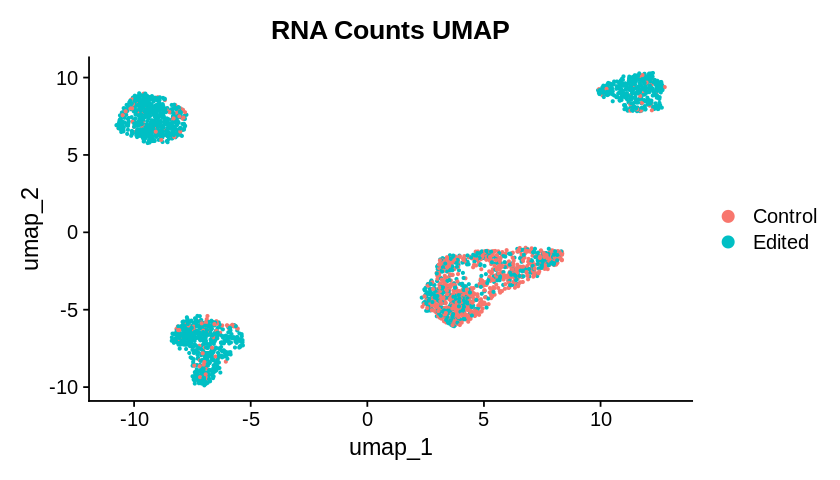

In [867]:
p1 = DimPlot(
  object = seu,
  group.by = edit_var,
  reduction = 'umap', 
  # split.by = "crispr", 
  ncol = 1, 
  pt.size = 0.5, 
)
p1 + ggtitle("RNA Counts UMAP")
  # cols = c("grey39","goldenrod3")) +
  # ggtitle("Perturbation Status") +


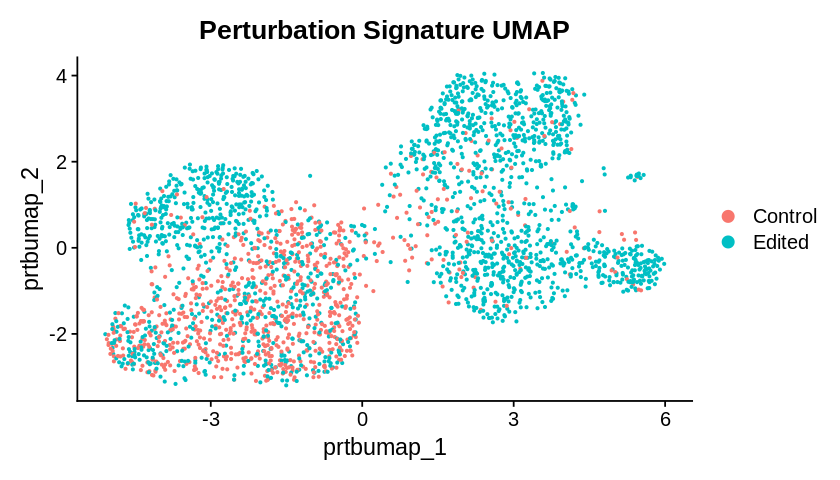

In [868]:
p1 = DimPlot(
  object = seu,
  group.by = edit_var,
  reduction = 'prtbumap', 
  # split.by = "crispr", 
  ncol = 1, 
  pt.size = 0.5, 
)
p1 + ggtitle("Perturbation Signature UMAP")
  # cols = c("grey39","goldenrod3")) +
  # ggtitle("Perturbation Status") +


In [869]:
# Run mixscape.
seu <- RunMixscape(
  object = seu, 
  assay = "PRTB", 
  slot = "scale.data",  # "scale.data",
  labels = edit_var, 
  nt.class.name = "Control", 
  min.de.genes = min_de_genes, 
  logfc.threshold = logfc_threshold,
  iter.num = 10, 
  de.assay = "RNA", 
  verbose = TRUE,
  prtb.type = "KO", 
  split.by = split_var)


Processing Edited

Finding new perturbation gene set

Processing Edited

Finding new perturbation gene set

Computing perturbation signature for missing features.

Classifying cells for: 

  Edited



number of iterations= 42 
number of iterations= 17 
number of iterations= 14 
number of iterations= 14 


Classifying cells for: 

  Edited



number of iterations= 222 
number of iterations= 228 
number of iterations= 228 
number of iterations= 228 


In [ ]:
# PRTB_presto_scale = wilcoxauc(seu@assays$PRTB@scale.data, seu@meta.data[['Edited_Index']],
#                               group_by = seu@meta.data[['CellType_Index']])

In [ ]:
seu@meta.data[c(edit_var ,'Dosage')] %>% table

In [ ]:
seu@meta.data[c('mixscape_class.global' ,'Dosage')] %>% table

In [ ]:
seu@meta.data[c('mixscape_class.global' ,'Dosage', split_var)] %>% table

In [ ]:
seu@meta.data[c('mixscape_class' ,'Dosage')] %>% table

[1] "Jurkat"
  mixscape_class.global Dosage Freq
1               Control      0  707
2                    KO      0   14
3                    NP      0  109
4               Control      1    7
5                    KO      1    0
6                    NP      1    2
7               Control      2   18
8                    KO      2  360
9                    NP      2  323
  mixscape_class.global Dosage Freq
1               Control      0  707
2                    KO      0   14
3                    NP      0  109
4               Control      1    7
5                    KO      1    0
6                    NP      1    2
7               Control      2   18
8                    KO      2  360
9                    NP      2  323


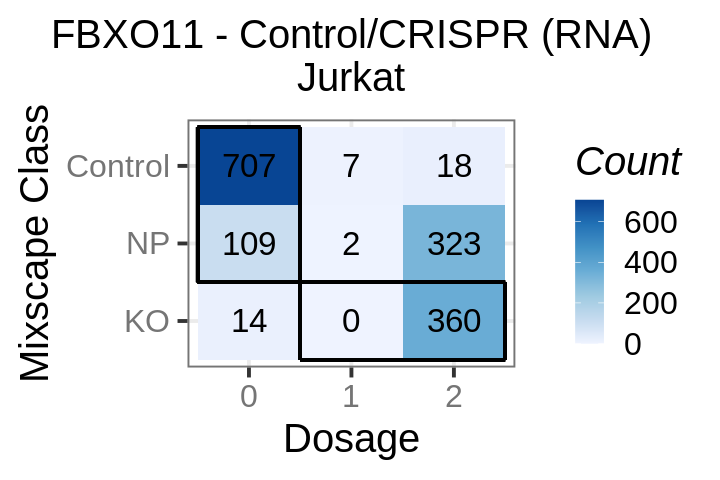

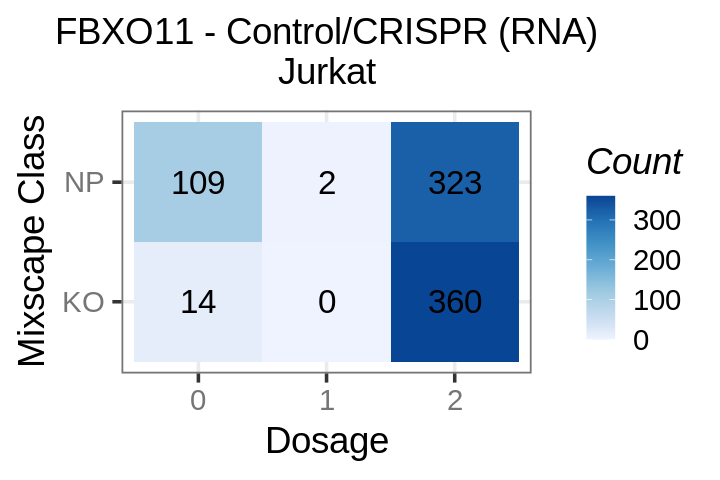

[1] "Daudi"
  mixscape_class.global Dosage Freq
1               Control      0  113
2                    KO      0  102
3                    NP      0   83
4               Control      1    4
5                    KO      1   18
6                    NP      1   18
7               Control      2    1
8                    KO      2  713
9                    NP      2  205
  mixscape_class.global Dosage Freq
1               Control      0  113
2                    KO      0  102
3                    NP      0   83
4               Control      1    4
5                    KO      1   18
6                    NP      1   18
7               Control      2    1
8                    KO      2  713
9                    NP      2  205


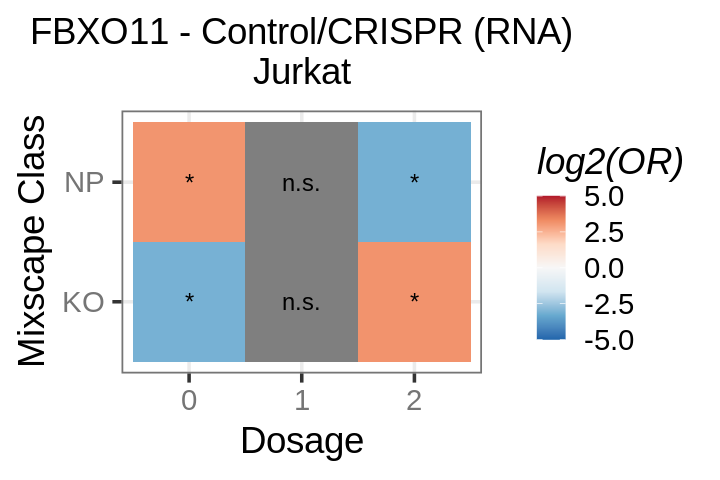

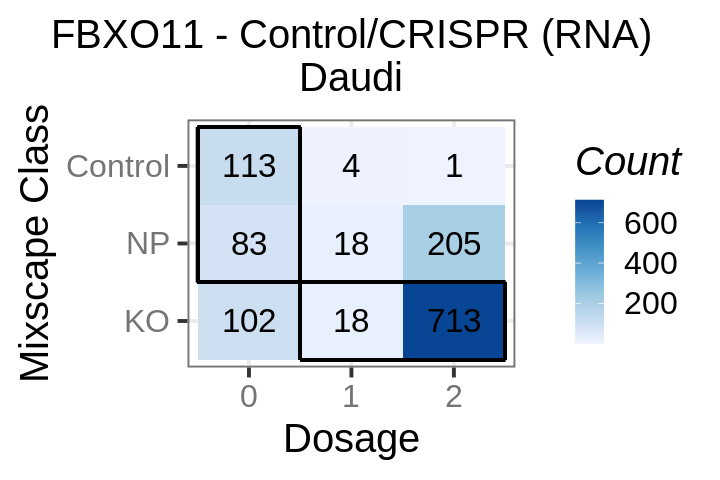

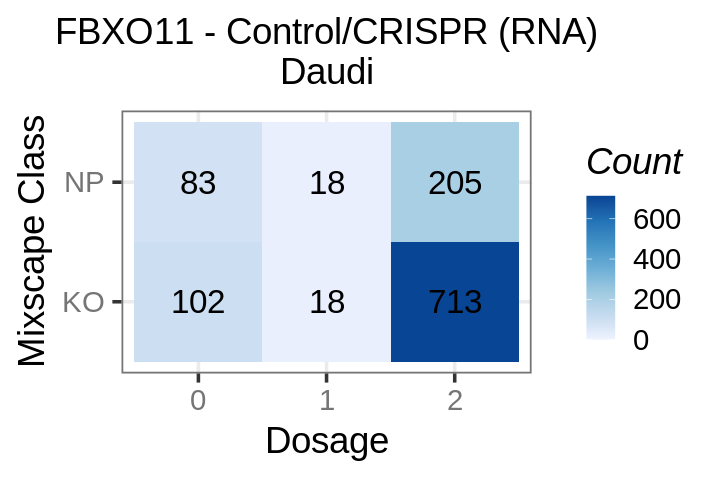

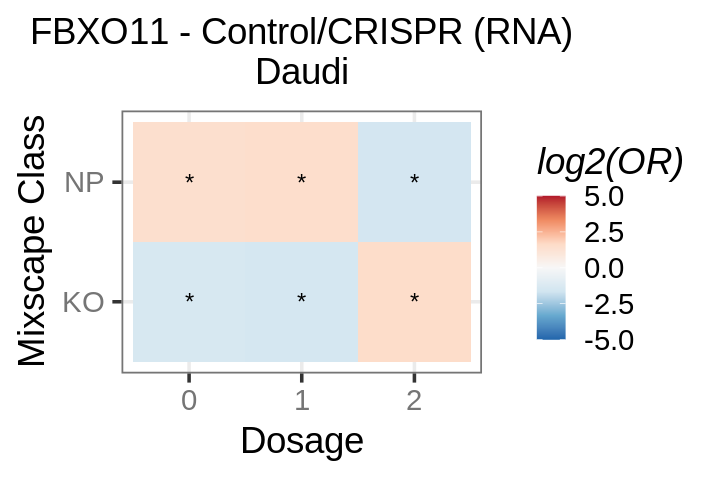

In [870]:
for (ctype in c('Jurkat', 'Daudi')){
    print(ctype)


    dat = seu@meta.data[seu@meta.data[split_var]==ctype, ]
    dat = dat[dat['Dosage'] %>% drop_na() %>% rownames, ]
    dat[['Dosage']] = factor(dat[['Dosage']], levels = c(0, 1, 2))
    dat = dat[c('mixscape_class.global' ,'Dosage')] %>% table %>% as.data.frame
    dat[['mixscape_class.global']] = factor(dat[['mixscape_class.global']], levels = c('KO', 'NP', 'Control'))
    print(dat)
    if (!('KO' %in% (dat[['mixscape_class.global']] %>% unique)) ){
        dat = rbind(dat, data.frame(mixscape_class.global = c('KO'), Dosage = c(0, 1, 2), Freq =c(0, 0, 0)))
    }
    print(dat)

    fig.size(4, 6)
    p1 = ggplot(dat)+
        geom_tile(aes(x=Dosage, y=mixscape_class.global,fill =Freq))+
        geom_text(aes(x=Dosage, y=mixscape_class.global, label = round(Freq, 1)), size = 7) +
        scale_fill_distiller(palette = 'Blues', direction = 1)+
        theme_pres(base_size = 24)+
        ylab('Mixscape Class')+
        labs(fill = 'Count')+
        geom_segment(aes(x = .5, y = 1.5, xend = 1.5, yend = 1.5), size = 1)+
        geom_segment(aes(x = .5, y = 3.5, xend = 1.5, yend = 3.5), size = 1)+
        geom_segment(aes(x = .5, y = 1.5, xend = .5, yend = 3.5), size = 1)+
        geom_segment(aes(x = 1.5, y = 1.5, xend = 1.5, yend = 3.5), size = 1)+

        geom_segment(aes(x = 1.5, y = 1.5, xend = 3.5, yend = 1.5), size = 1)+
        geom_segment(aes(x = 1.5, y = .5, xend = 3.5, yend = .5), size = 1)+
        geom_segment(aes(x = 1.5, y = .5, xend = 1.5, yend = 1.5), size = 1)+
        geom_segment(aes(x = 3.5, y = .5, xend = 3.5, yend = 1.5), size = 1)+

        ggtitle(paste0(exp_name, '\n', ctype))+
        theme(plot.title = element_text(size = 24))
        print(p1)

    if (edit_var=='Edited_Index'){
        dat_filt = dat %>% filter(`mixscape_class.global`!='Control') } else if (edit_var=='HomoRef_v_Other'){
        dat_filt = dat %>% filter(`mixscape_class.global`!='Control', `Dosage`!=0)} else if (edit_var=='HomoAlt_v_Other'){
        dat_filt = dat %>% filter(`mixscape_class.global`!='Control', `Dosage`!=0, `Dosage`!=1)} 

    # if (edit_var=='Edited_Index'){
    #     dat_filt = dat %>% filter(`mixscape_class.global`!='Control') }

    count_max = dat_filt['Freq'] %>% max
    fig.size(4, 6)
    p2 = ggplot(dat_filt)+
        geom_tile(aes(x=Dosage, y=mixscape_class.global,fill =Freq))+
        geom_text(aes(x=Dosage, y=mixscape_class.global, label = round(Freq, 1)), size = 7) +
        scale_fill_distiller(palette = 'Blues', direction = 1,  limits = c(0, count_max), oob = scales::squish)+
        theme_pres(base_size = 22)+
        ylab('Mixscape Class')+
        labs(fill = 'Count')+
        # geom_segment(aes(x = .5, y = 1.5, xend = 1.5, yend = 1.5), size = 1)+
        # geom_segment(aes(x = .5, y = 3.5, xend = 1.5, yend = 3.5), size = 1)+
        # geom_segment(aes(x = .5, y = 1.5, xend = .5, yend = 3.5), size = 1)+
        # geom_segment(aes(x = 1.5, y = 1.5, xend = 1.5, yend = 3.5), size = 1)+

        # geom_segment(aes(x = 1.5, y = 1.5, xend = 3.5, yend = 1.5), size = 1)+
        # geom_segment(aes(x = 1.5, y = .5, xend = 3.5, yend = .5), size = 1)+
        # geom_segment(aes(x = 1.5, y = .5, xend = 1.5, yend = 1.5), size = 1)+
        # geom_segment(aes(x = 3.5, y = .5, xend = 3.5, yend = 1.5), size = 1)+

        ggtitle(paste0(exp_name, '\n', ctype))+
        theme(plot.title = element_text(size = 22))
    print(p2)

    dat_filt['OR'] = 0
    dat_filt['pval'] = 1

    for (i in rownames(dat_filt)){
        mixclass = dat_filt[i, 'mixscape_class.global']
        dosage = dat_filt[i, 'Dosage']

        mat = matrix(0, 2, 2)

        mat[1, 1] = (dat_filt %>% filter(Dosage == dosage, mixscape_class.global==mixclass))[['Freq']] %>% sum
        mat[1, 2] = (dat_filt %>% filter(Dosage != dosage, mixscape_class.global==mixclass))[['Freq']] %>% sum
        mat[2, 1] = (dat_filt %>% filter(Dosage == dosage, mixscape_class.global!=mixclass))[['Freq']] %>% sum
        mat[2, 2] = (dat_filt %>% filter(Dosage != dosage, mixscape_class.global!=mixclass))[['Freq']] %>% sum

        pval = fisher.test(mat)$p.value
        or = fisher.test(mat)$estimate

        dat_filt[i, c('OR', 'pval')] = c(or, pval)

    }

    dat_filt[['padj']] = p.adjust(dat_filt[['pval']], 'BH')
    dat_filt = dat_filt %>% mutate(label = ifelse(padj < 0.05, '*', 'n.s.'))
    dat_filt['log2OR'] = log2(dat_filt['OR'])

    fig.size(4, 6)
    p3 = ggplot(dat_filt)+
        geom_tile(aes(x=Dosage, y=mixscape_class.global,fill =log2OR))+
        geom_text(aes(x=Dosage, y=mixscape_class.global, label = label), size = 5) +
        scale_fill_distiller(palette = 'RdBu', direction = -1, limits = c(vmin, vmax), oob = scales::squish)+
        theme_pres(base_size = 22)+
        ylab('Mixscape Class')+
        labs(fill = 'log2(OR)')+
        # geom_segment(aes(x = .5, y = 1.5, xend = 1.5, yend = 1.5), size = 1)+
        # geom_segment(aes(x = .5, y = 3.5, xend = 1.5, yend = 3.5), size = 1)+
        # geom_segment(aes(x = .5, y = 1.5, xend = .5, yend = 3.5), size = 1)+
        # geom_segment(aes(x = 1.5, y = 1.5, xend = 1.5, yend = 3.5), size = 1)+

        # geom_segment(aes(x = 1.5, y = 1.5, xend = 3.5, yend = 1.5), size = 1)+
        # geom_segment(aes(x = 1.5, y = .5, xend = 3.5, yend = .5), size = 1)+
        # geom_segment(aes(x = 1.5, y = .5, xend = 1.5, yend = 1.5), size = 1)+
        # geom_segment(aes(x = 3.5, y = .5, xend = 3.5, yend = 1.5), size = 1)+

        ggtitle(paste0(exp_name, '\n', ctype))+
        theme(plot.title = element_text(size = 22))
    print(p3)
}

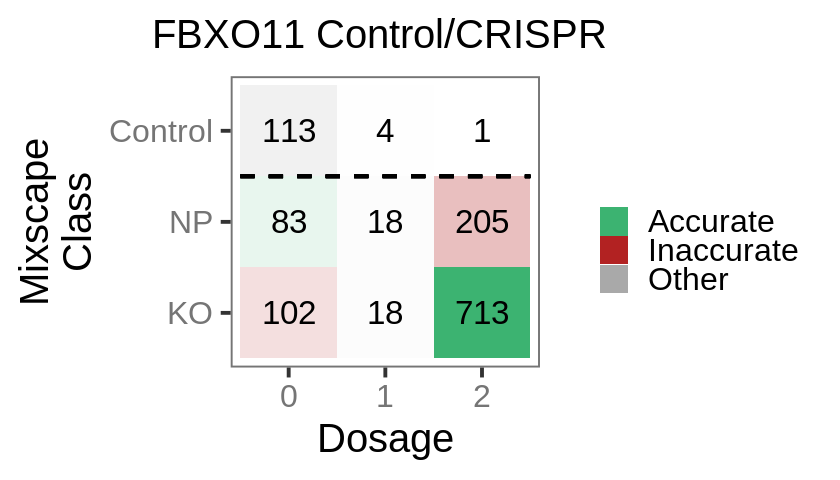

In [916]:
# pdf(file = '../Figures/Mixscape_FBXO11Daudi_ControlCrispr.pdf',  height = 4, width = 7)

dat = dat %>% mutate(group = ifelse(((`mixscape_class.global` == 'NP') & (Dosage == 0)) |
                                ((`mixscape_class.global` == 'KO') & (Dosage == 2)), 'Accurate', 
                              
                    ifelse(((`mixscape_class.global` == 'KO') & (Dosage == 0)) |
                                ((`mixscape_class.global` == 'NP') & (Dosage == 2)), 'Inaccurate',
           
                              'Other')))

# dat = dat %>% mutate(color = ifelse(group == 'Accurate', 'green', ifelse(group == 'Inaccurate', 'red', 'grey')))

fig.size(4, 7)
ggplot(dat, aes(x=Dosage, y=mixscape_class.global))+
        geom_tile(aes(fill = group, alpha = Freq/sum(dat$Freq)))+
        geom_text(aes(x=Dosage, y=mixscape_class.global, label = round(Freq, 1)), size = 7) +
        scale_fill_manual(values = c("Other" = "darkgray", "Inaccurate" = "firebrick", "Accurate" = "mediumseagreen")) +  # Manually set colors
        scale_alpha_continuous(range = c(0, 1)) +
        guides(
        alpha = "none")+
        theme_pres(base_size = 24)+
        ylab('Mixscape\nClass')+
        labs(fill = '')+
        geom_segment(aes(x = .5, y = 2.5, xend = 3.5, yend = 2.5), size = 1, linetype = 2)+
        ggtitle(exp_name %>% str_replace('\\(RNA\\)', '') %>% str_replace('\\(ADT\\)', '') %>%
                str_replace(' -', ''))+
        theme(plot.title = element_text(size = 24),
                        panel.grid.major = element_blank(),
             )
# dev.off()

In [918]:
seu@meta.data %>% write_csv("../Misc/FBXO11_MixscapeClasses_ControlCrispr_20241118.csv")

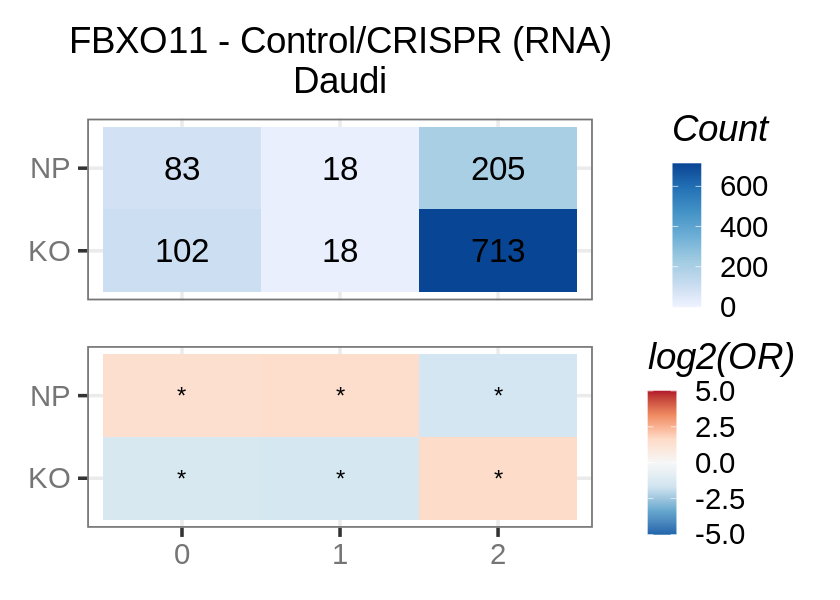

In [709]:
# p2 <- p2 + theme(
#   axis.title.x = element_blank(),    # Remove x-axis title
#   axis.text.x = element_blank(),     # Remove x-axis labels
#   axis.ticks.x = element_blank(),  # Remove x-axis ticks
#   axis.title.y = element_blank(),    
# )
# p3 <- p3 + theme(
#   plot.title = element_blank(), 
#   axis.title.y = element_blank(),    
#   axis.title.x = element_blank(),    # Remove x-axis title
# )

# fig.size(5, 7)
# # grid.arrange(p2, p3, nrow = 2)
# p2 + p3 + plot_layout(nrow = 2, heights = c(1, 1))

#### Control/[Het, Homo Alt]

In [919]:
exp_name = paste0(name, ' - Dosage0/Dosage1-2 (RNA)')
name
exp_name

edit_var = 'HomoRef_v_Other'
split_var = 'CellType_Index'

[1] "FBXO11"

[1] "FBXO11 - Dosage0/Dosage1-2 (RNA)"

In [920]:
seu = CreateSeuratObject(counts = rna_counts_all, 
                          project = name)


seu = AddMetaData(seu, meta_all)

In [922]:
seu@meta.data %>% head(2)

orig.ident nCount_RNA nFeature_RNA
AACATCTCTGTGAC_CCATCCACGC FBXO11     43401      5095        
AACATCTCTGTGAC_ACAACCAGGA FBXO11     32763      4390        
                          cell                      Dosage Edited_Index
AACATCTCTGTGAC_CCATCCACGC AACATCTCTGTGAC_CCATCCACGC 2      Edited      
AACATCTCTGTGAC_ACAACCAGGA AACATCTCTGTGAC_ACAACCAGGA 2      Edited      
                          CellType_Index HomoRef_v_Other HomoAlt_v_Other
AACATCTCTGTGAC_CCATCCACGC Jurkat         Het/Homo Alt    Homo Alt       
AACATCTCTGTGAC_ACAACCAGGA Daudi          Het/Homo Alt    Homo Alt

In [923]:
# Prepare RNA assay for dimensionality reduction: 
# Normalize data, find variable features and scale data.
DefaultAssay(object = seu) = 'RNA'
seu = NormalizeData(object = seu) %>% FindVariableFeatures() %>% ScaleData()

Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix



In [924]:
# Run Principle Component Analysis (PCA) to reduce the dimensionality of the data.
seu <- RunPCA(object = seu)


PC_ 1 
Positive:  CD74, HLA-DRA, IGKC, LTB, IGLC1, HLA-DPA1, TCL1A, HLA-B, HLA-DRB1, LINC01857 
	   MS4A1, HLA-DPB1, HLA-DQB1, MEF2B, CD22, CD52, HLA-DQA1, BIRC3, ISG20, RGS16 
	   CD79A, JCHAIN, TUBA4A, AC068633.1, VPREB3, SPIB, HLA-A, NEIL1, RASSF6, IFI30 
Negative:  CD3D, TRBC1, GYPC, SELENOW, BEX3, CD99, VIM, AIF1, NME4, CD3G 
	   TRBC2, PHGDH, OCIAD2, MRPL57, FYB1, CD1E, TSPAN7, C12orf57, TCF7, CD3E 
	   MAP1A, ITM2A, TXNDC17, FXYD2, BEX1, DNTT, HSP90AA1, ABRACL, CHI3L2, CTSG 
PC_ 2 
Positive:  RPLP2, RPL27A, RPL37A, RPS21, RPL37, RPL38, RPL31, RPS23, RPS11, RPL27 
	   POLR2L, NDUFAF8, RPL23, ARMC9, PLEKHA7, CDKN1A, RPL22L1, SLIRP, RPS20, CHCHD10 
	   IFI30, RPS28, EBNA1BP2, NDUFS6, RPL30, RPS29, FKBP11, FABP5, TOMM5, RPL24 
Negative:  ASPM, RASSF6, LINC00910, JCHAIN, RIMS2, MXD3, CCDC85A, ANXA1, TRAC, DLGAP5 
	   CD2, AC004160.1, GPR174, CLEC2D, BEST3, FRMD3, DDAH2, EVI2B, PDE4D, STARD4-AS1 
	   AC068413.1, MT-ND2, AICDA, LINC01720, CNTNAP4, AC016168.2, AC020718.1, RCBTB2, RASGRP

In [925]:
# Run Uniform Manifold Approximation and Projection (UMAP) to visualize clustering in 2-D.
seu <- RunUMAP(object = seu, dims = 1:40)


15:03:55 UMAP embedding parameters a = 0.9922 b = 1.112

15:03:55 Read 2797 rows and found 40 numeric columns

15:03:55 Using Annoy for neighbor search, n_neighbors = 30

15:03:55 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:03:56 Writing NN index file to temp file /tmp/RtmpNFeuUB/file177f395a73f

15:03:56 Searching Annoy index using 1 thread, search_k = 3000

15:03:56 Annoy recall = 100%

15:03:57 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

15:03:58 Initializing from normalized Laplacian + noise (using RSpectra)

15:03:58 Commencing optimization for 500 epochs, with 122970 positive edges

15:04:07 Optimization finished



In [832]:
seu@meta.data[edit_var] %>% table

HomoRef_v_Other
     Control Het/Homo Alt 
        1128         1669 

In [833]:
seu %>% str

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay5' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ layers    :List of 3
  .. .. .. .. ..$ counts    :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. .. ..@ i       : int [1:10779493] 8 11 20 22 24 26 28 29 30 33 ...
  .. .. .. .. .. .. ..@ p       : int [1:2798] 0 5095 9485 14461 19204 23117 26960 29574 32581 37513 ...
  .. .. .. .. .. .. ..@ Dim     : int [1:2] 36591 2797
  .. .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. ..@ x       : num [1:10779493] 3 1 6 6 1 15 2 2 10 5 ...
  .. .. .. .. .. .. ..@ factors : list()
  .. .. .. .. ..$ data      :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. .. ..@ i       : int [1:10779493] 8 11 20 22 24 26 28 29 30 33 ...
  .. .. .. .. .. .. ..@ p       : int [1:2798] 0 5095 9485 14461 19204 2

In [926]:
# Calculate perturbation signature (PRTB).
seu <- CalcPerturbSig(
  object = seu, 
  assay = "RNA", 
  slot = "data", 
  gd.class = edit_var, 
  nt.cell.class = "Control", 
  reduction = "pca", 
  ndims = 40, 
  num.neighbors = n_neighbors, 
  split.by = split_var, 
  new.assay.name = "PRTB")



Processing Jurkat

Processing Daudi



In [927]:
seu

An object of class Seurat 
38591 features across 2797 samples within 2 assays 
Active assay: RNA (36591 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: PRTB
 2 dimensional reductions calculated: pca, umap

In [928]:
seu@assays$PRTB

Assay data with 2000 features for 2797 cells
First 10 features:
 CCL3L1, LINC01781, CCL4L2, GZMK, CEBPE, VPREB3, RPL22L1, ANKRD30BL,
RPL37, EGR1 

In [929]:
# Prepare PRTB assay for dimensionality reduction: 
# Normalize data, find variable features and center data.
DefaultAssay(object = seu) <- 'PRTB'

# Use variable features from RNA assay.
VariableFeatures(object = seu) <- VariableFeatures(object = seu[["RNA"]])
seu <- ScaleData(object = seu, do.scale = F, do.center = T)


Centering data matrix



In [930]:
# Run PCA to reduce the dimensionality of the data.
seu <- RunPCA(object = seu, reduction.key = 'prtbpca', reduction.name = 'prtbpca')

# Run UMAP to visualize clustering in 2-D.
seu <- RunUMAP(
  object = seu, 
  dims = 1:40, 
  reduction = 'prtbpca', 
  reduction.key = 'prtbumap', 
  reduction.name = 'prtbumap')


prtbpca_ 1 
Positive:  RGS16, IGLC1, CTSH, VPREB3, MEF2B, DDIT3, SPIB, XKR6, IGKC, GCC2-AS1 
	   GTSF1, CYP51A1, VPREB1, PDE4D, FABP6, AC016168.2, USP30-AS1, IL21R, AC104823.1, QTRT2 
	   RASSF6, NEIL1, MYLIP, AICDA, CCL3L1, MIR210HG, CPNE5, FBXO16, SNX22, TLR9 
Negative:  MYO7B, CD1E, COX7C, RPS29, HIST1H4C, IGLL1, VIM, POLR2L, TRBC1, MRPL57 
	   RPS28, TOMM5, RPS21, CD3G, RPL38, DNAJB1, BNIP3, HSPA8, MT-ND2, BEX1 
	   PLEKHA7, POLR2F, RPL24, RPL27, PHGDH, UQCRQ, ARMC9, RPL37, HLA-A, IL32 
prtbpca_ 2 
Positive:  TUBA4A, SPIB, TCL1A, MEF2B, IGLC1, CTSH, VPREB3, CD52, RGS16, HLA-A 
	   MS4A1, CRIP1, CHCHD10, FKBP11, IGKC, IFI30, UBE2C, MYLIP, CD79A, HLA-DQA1 
	   LINC01857, ISG20, BIRC3, COX7C, CDKN1A, LY86, HLA-DRA, DEF8, RPL37A, RPSA 
Negative:  CD1E, IGLL1, CHI3L2, MYO7B, CTSG, HIST1H1D, BNIP3, LINC00051, CD3G, TRBC2 
	   C12orf57, NME4, DNAJB1, SELENOW, CCT2, SMIM24, GYPC, MAP1A, PHGDH, S100A10 
	   AC012146.1, CLSPN, FYB1, BEX3, FXYD2, HES4, AIF1, TRBC1, GAR1, ESD 
prtbpca_ 3 
Posi

In [931]:
seu

An object of class Seurat 
38591 features across 2797 samples within 2 assays 
Active assay: PRTB (2000 features, 2000 variable features)
 2 layers present: data, scale.data
 1 other assay present: RNA
 4 dimensional reductions calculated: pca, umap, prtbpca, prtbumap

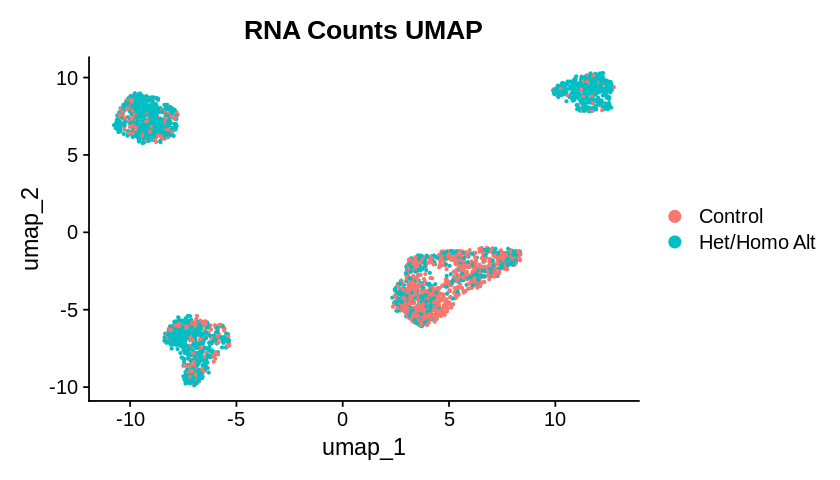

In [932]:
p1 = DimPlot(
  object = seu,
  group.by = edit_var,
  reduction = 'umap', 
  # split.by = "crispr", 
  ncol = 1, 
  pt.size = 0.5, 
)
p1 + ggtitle("RNA Counts UMAP")
  # cols = c("grey39","goldenrod3")) +
  # ggtitle("Perturbation Status") +


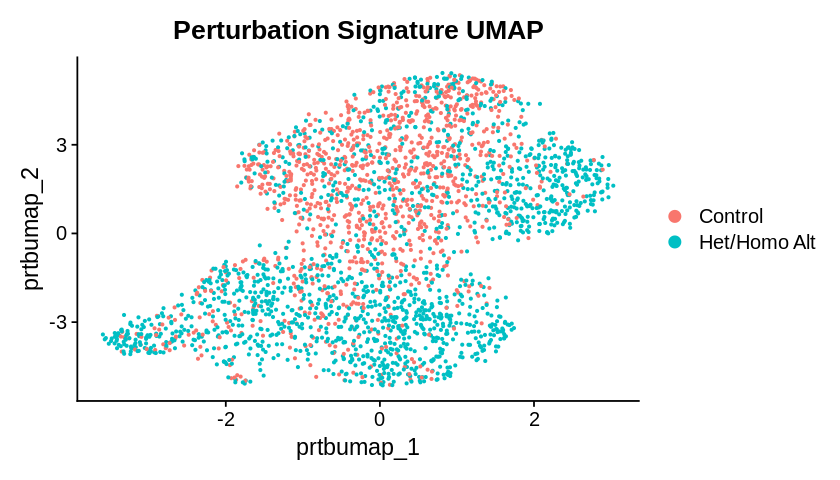

In [933]:
p1 = DimPlot(
  object = seu,
  group.by = edit_var,
  reduction = 'prtbumap', 
  # split.by = "crispr", 
  ncol = 1, 
  pt.size = 0.5, 
)
p1 + ggtitle("Perturbation Signature UMAP")
  # cols = c("grey39","goldenrod3")) +
  # ggtitle("Perturbation Status") +


In [934]:
# Run mixscape.
seu <- RunMixscape(
  object = seu, 
  assay = "PRTB", 
  slot = "scale.data",  # "scale.data",
  labels = edit_var, 
  nt.class.name = "Control", 
  min.de.genes = min_de_genes, 
  logfc.threshold = logfc_threshold,
  iter.num = 10, 
  de.assay = "RNA", 
  verbose = TRUE,
  prtb.type = "KO", 
  split.by = split_var)


Processing Het/Homo Alt

Finding new perturbation gene set

Processing Het/Homo Alt

Finding new perturbation gene set

Computing perturbation signature for missing features.

Classifying cells for: 

  Het/Homo Alt



number of iterations= 34 
number of iterations= 16 
number of iterations= 14 
number of iterations= 13 


Classifying cells for: 

  Het/Homo Alt



number of iterations= 77 
number of iterations= 85 
number of iterations= 85 
number of iterations= 85 


In [643]:
# PRTB_presto_scale = wilcoxauc(seu@assays$PRTB@scale.data, seu@meta.data[['Edited_Index']],
#                               group_by = seu@meta.data[['CellType_Index']])

In [935]:
seu@meta.data[c(edit_var ,'Dosage')] %>% table

               Dosage
HomoRef_v_Other    0    1    2
   Control      1128    0    0
   Het/Homo Alt    0   49 1620

In [936]:
seu@meta.data[c('mixscape_class.global' ,'Dosage')] %>% table

                     Dosage
mixscape_class.global    0    1    2
              Control 1128    0    0
              KO         0    8 1091
              NP         0   41  529

In [937]:
seu@meta.data[c('mixscape_class.global' ,'Dosage', split_var)] %>% table

, , CellType_Index = Daudi

                     Dosage
mixscape_class.global   0   1   2
              Control 298   0   0
              KO        0   7 730
              NP        0  33 189

, , CellType_Index = Jurkat

                     Dosage
mixscape_class.global   0   1   2
              Control 830   0   0
              KO        0   1 361
              NP        0   8 340


In [938]:
seu@meta.data[c('mixscape_class' ,'Dosage')] %>% table

                 Dosage
mixscape_class       0    1    2
  Control         1128    0    0
  Het/Homo Alt KO    0    8 1091
  Het/Homo Alt NP    0   41  529

[1] "Jurkat"
  mixscape_class.global Dosage Freq
1               Control      0  830
2                    KO      0    0
3                    NP      0    0
4               Control      1    0
5                    KO      1    1
6                    NP      1    8
7               Control      2    0
8                    KO      2  361
9                    NP      2  340
  mixscape_class.global Dosage Freq
1               Control      0  830
2                    KO      0    0
3                    NP      0    0
4               Control      1    0
5                    KO      1    1
6                    NP      1    8
7               Control      2    0
8                    KO      2  361
9                    NP      2  340


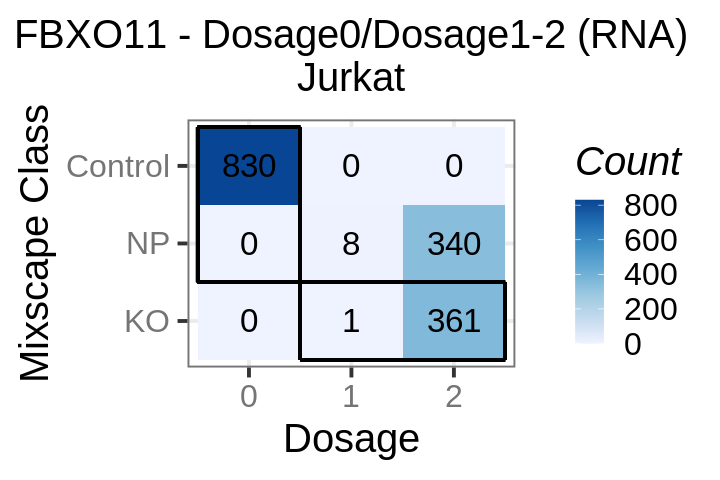

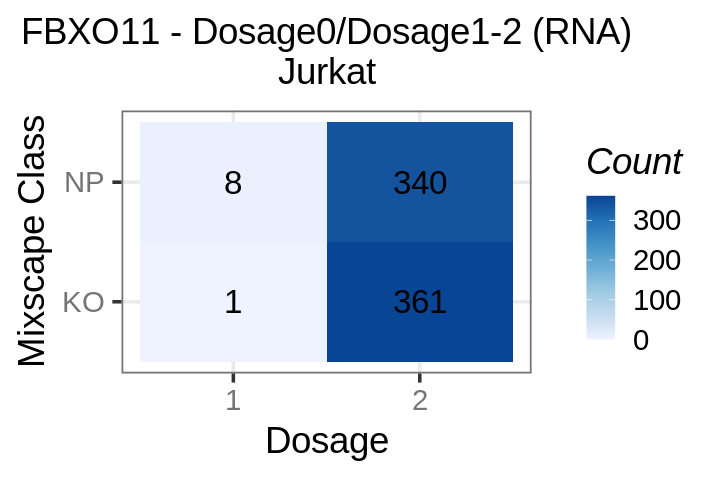

[1] "Daudi"
  mixscape_class.global Dosage Freq
1               Control      0  298
2                    KO      0    0
3                    NP      0    0
4               Control      1    0
5                    KO      1    7
6                    NP      1   33
7               Control      2    0
8                    KO      2  730
9                    NP      2  189
  mixscape_class.global Dosage Freq
1               Control      0  298
2                    KO      0    0
3                    NP      0    0
4               Control      1    0
5                    KO      1    7
6                    NP      1   33
7               Control      2    0
8                    KO      2  730
9                    NP      2  189


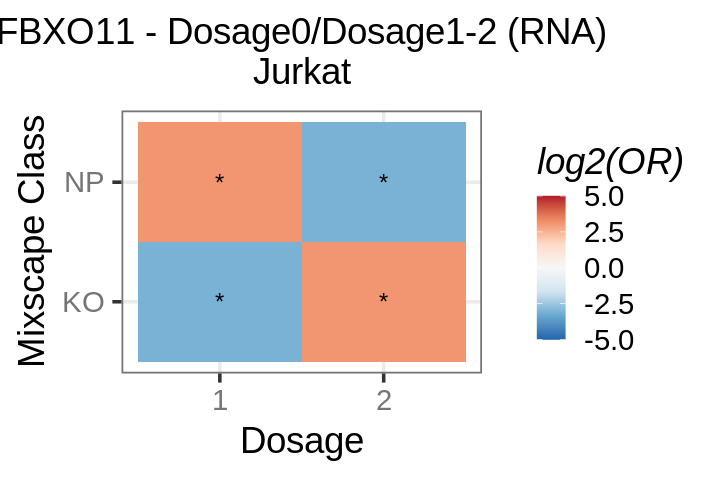

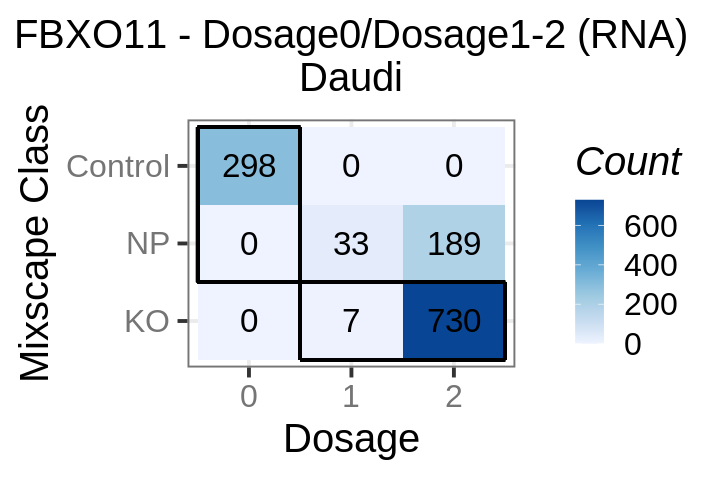

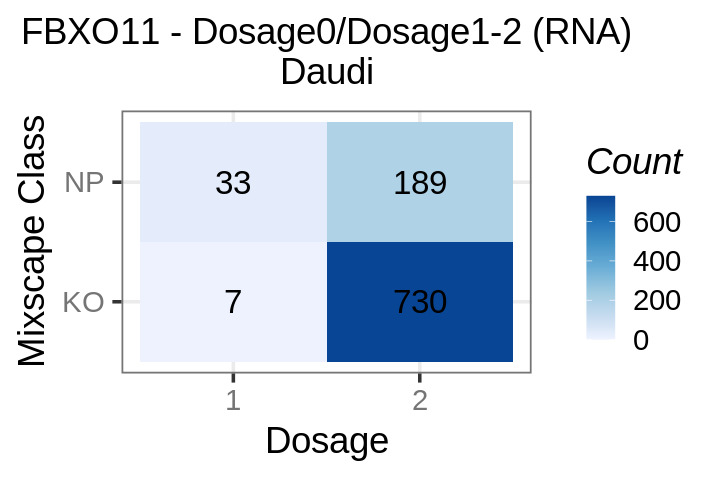

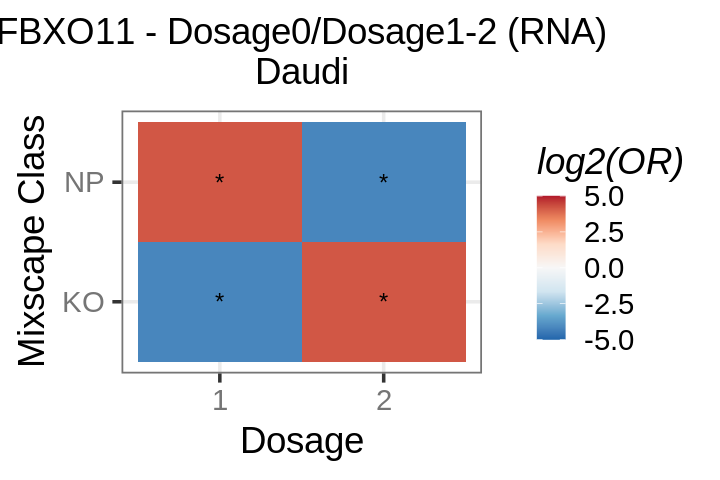

In [939]:
for (ctype in c('Jurkat', 'Daudi')){
    print(ctype)


    dat = seu@meta.data[seu@meta.data[split_var]==ctype, ]
    dat = dat[dat['Dosage'] %>% drop_na() %>% rownames, ]
    dat[['Dosage']] = factor(dat[['Dosage']], levels = c(0, 1, 2))
    dat = dat[c('mixscape_class.global' ,'Dosage')] %>% table %>% as.data.frame
    dat[['mixscape_class.global']] = factor(dat[['mixscape_class.global']], levels = c('KO', 'NP', 'Control'))
    print(dat)
    if (!('KO' %in% (dat[['mixscape_class.global']] %>% unique)) ){
        dat = rbind(dat, data.frame(mixscape_class.global = c('KO'), Dosage = c(0, 1, 2), Freq =c(0, 0, 0)))
    }
    print(dat)

    fig.size(4, 6)
    p1 = ggplot(dat)+
        geom_tile(aes(x=Dosage, y=mixscape_class.global,fill =Freq))+
        geom_text(aes(x=Dosage, y=mixscape_class.global, label = round(Freq, 1)), size = 7) +
        scale_fill_distiller(palette = 'Blues', direction = 1)+
        theme_pres(base_size = 24)+
        ylab('Mixscape Class')+
        labs(fill = 'Count')+
        geom_segment(aes(x = .5, y = 1.5, xend = 1.5, yend = 1.5), size = 1)+
        geom_segment(aes(x = .5, y = 3.5, xend = 1.5, yend = 3.5), size = 1)+
        geom_segment(aes(x = .5, y = 1.5, xend = .5, yend = 3.5), size = 1)+
        geom_segment(aes(x = 1.5, y = 1.5, xend = 1.5, yend = 3.5), size = 1)+

        geom_segment(aes(x = 1.5, y = 1.5, xend = 3.5, yend = 1.5), size = 1)+
        geom_segment(aes(x = 1.5, y = .5, xend = 3.5, yend = .5), size = 1)+
        geom_segment(aes(x = 1.5, y = .5, xend = 1.5, yend = 1.5), size = 1)+
        geom_segment(aes(x = 3.5, y = .5, xend = 3.5, yend = 1.5), size = 1)+

        ggtitle(paste0(exp_name, '\n', ctype))+
        theme(plot.title = element_text(size = 24))
        print(p1)

    if (edit_var=='Edited_Index'){
        dat_filt = dat %>% filter(`mixscape_class.global`!='Control') } else if (edit_var=='HomoRef_v_Other'){
        dat_filt = dat %>% filter(`mixscape_class.global`!='Control', `Dosage`!=0)} else if (edit_var=='HomoAlt_v_Other'){
        dat_filt = dat %>% filter(`mixscape_class.global`!='Control', `Dosage`!=0, `Dosage`!=1)} 

    # if (edit_var=='Edited_Index'){
    #     dat_filt = dat %>% filter(`mixscape_class.global`!='Control') }

    count_max = dat_filt['Freq'] %>% max
    fig.size(4, 6)
    p2 = ggplot(dat_filt)+
        geom_tile(aes(x=Dosage, y=mixscape_class.global,fill =Freq))+
        geom_text(aes(x=Dosage, y=mixscape_class.global, label = round(Freq, 1)), size = 7) +
        scale_fill_distiller(palette = 'Blues', direction = 1,  limits = c(0, count_max), oob = scales::squish)+
        theme_pres(base_size = 22)+
        ylab('Mixscape Class')+
        labs(fill = 'Count')+
        # geom_segment(aes(x = .5, y = 1.5, xend = 1.5, yend = 1.5), size = 1)+
        # geom_segment(aes(x = .5, y = 3.5, xend = 1.5, yend = 3.5), size = 1)+
        # geom_segment(aes(x = .5, y = 1.5, xend = .5, yend = 3.5), size = 1)+
        # geom_segment(aes(x = 1.5, y = 1.5, xend = 1.5, yend = 3.5), size = 1)+

        # geom_segment(aes(x = 1.5, y = 1.5, xend = 3.5, yend = 1.5), size = 1)+
        # geom_segment(aes(x = 1.5, y = .5, xend = 3.5, yend = .5), size = 1)+
        # geom_segment(aes(x = 1.5, y = .5, xend = 1.5, yend = 1.5), size = 1)+
        # geom_segment(aes(x = 3.5, y = .5, xend = 3.5, yend = 1.5), size = 1)+

        ggtitle(paste0(exp_name, '\n', ctype))+
        theme(plot.title = element_text(size = 22))
    print(p2)

    dat_filt['OR'] = 0
    dat_filt['pval'] = 1

    for (i in rownames(dat_filt)){
        mixclass = dat_filt[i, 'mixscape_class.global']
        dosage = dat_filt[i, 'Dosage']

        mat = matrix(0, 2, 2)

        mat[1, 1] = (dat_filt %>% filter(Dosage == dosage, mixscape_class.global==mixclass))[['Freq']] %>% sum
        mat[1, 2] = (dat_filt %>% filter(Dosage != dosage, mixscape_class.global==mixclass))[['Freq']] %>% sum
        mat[2, 1] = (dat_filt %>% filter(Dosage == dosage, mixscape_class.global!=mixclass))[['Freq']] %>% sum
        mat[2, 2] = (dat_filt %>% filter(Dosage != dosage, mixscape_class.global!=mixclass))[['Freq']] %>% sum

        pval = fisher.test(mat)$p.value
        or = fisher.test(mat)$estimate

        dat_filt[i, c('OR', 'pval')] = c(or, pval)

    }

    dat_filt[['padj']] = p.adjust(dat_filt[['pval']], 'BH')
    dat_filt = dat_filt %>% mutate(label = ifelse(padj < 0.05, '*', 'n.s.'))
    dat_filt['log2OR'] = log2(dat_filt['OR'])

    fig.size(4, 6)
    p3 = ggplot(dat_filt)+
        geom_tile(aes(x=Dosage, y=mixscape_class.global,fill =log2OR))+
        geom_text(aes(x=Dosage, y=mixscape_class.global, label = label), size = 5) +
        scale_fill_distiller(palette = 'RdBu', direction = -1, limits = c(vmin, vmax), oob = scales::squish)+
        theme_pres(base_size = 22)+
        ylab('Mixscape Class')+
        labs(fill = 'log2(OR)')+
        # geom_segment(aes(x = .5, y = 1.5, xend = 1.5, yend = 1.5), size = 1)+
        # geom_segment(aes(x = .5, y = 3.5, xend = 1.5, yend = 3.5), size = 1)+
        # geom_segment(aes(x = .5, y = 1.5, xend = .5, yend = 3.5), size = 1)+
        # geom_segment(aes(x = 1.5, y = 1.5, xend = 1.5, yend = 3.5), size = 1)+

        # geom_segment(aes(x = 1.5, y = 1.5, xend = 3.5, yend = 1.5), size = 1)+
        # geom_segment(aes(x = 1.5, y = .5, xend = 3.5, yend = .5), size = 1)+
        # geom_segment(aes(x = 1.5, y = .5, xend = 1.5, yend = 1.5), size = 1)+
        # geom_segment(aes(x = 3.5, y = .5, xend = 3.5, yend = 1.5), size = 1)+

        ggtitle(paste0(exp_name, '\n', ctype))+
        theme(plot.title = element_text(size = 22))
    print(p3)
}

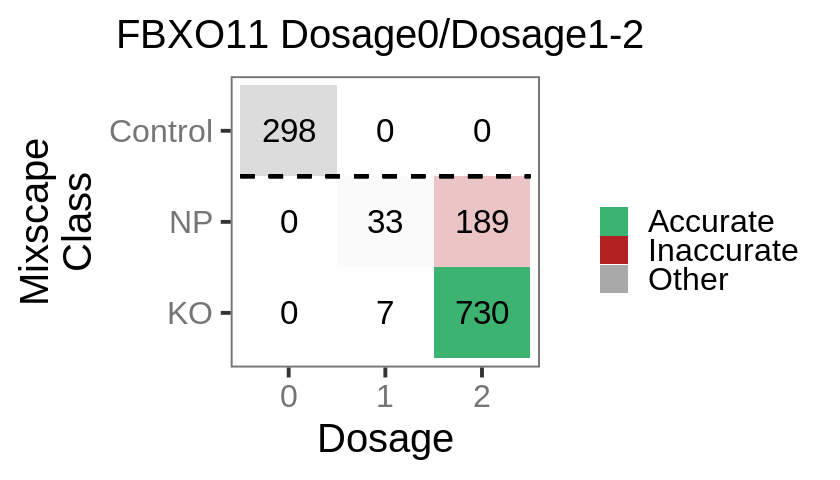

In [942]:
# pdf(file = '../Figures/Mixscape_FBXO11Daudi_Dosage0Dosage12.pdf',  height = 4, width = 7)

dat = dat %>% mutate(group = ifelse(((`mixscape_class.global` == 'NP') & (Dosage == 0)) |
                                ((`mixscape_class.global` == 'KO') & (Dosage == 2)), 'Accurate', 
                              
                    ifelse(((`mixscape_class.global` == 'KO') & (Dosage == 0)) |
                                ((`mixscape_class.global` == 'NP') & (Dosage == 2)), 'Inaccurate',
           
                              'Other')))

# dat = dat %>% mutate(color = ifelse(group == 'Accurate', 'green', ifelse(group == 'Inaccurate', 'red', 'grey')))

fig.size(4, 7)
ggplot(dat, aes(x=Dosage, y=mixscape_class.global))+
        geom_tile(aes(fill = group, alpha = Freq/sum(dat$Freq)))+
        geom_text(aes(x=Dosage, y=mixscape_class.global, label = round(Freq, 1)), size = 7) +
        scale_fill_manual(values = c("Other" = "darkgray", "Inaccurate" = "firebrick", "Accurate" = "mediumseagreen")) +  # Manually set colors
        scale_alpha_continuous(range = c(0, 1)) +
        guides(
        alpha = "none")+
        theme_pres(base_size = 24)+
        ylab('Mixscape\nClass')+
        labs(fill = '')+
        geom_segment(aes(x = .5, y = 2.5, xend = 3.5, yend = 2.5), size = 1, linetype = 2)+
        ggtitle(exp_name %>% str_replace('\\(RNA\\)', '') %>% str_replace('\\(ADT\\)', '') %>%
                str_replace(' -', ''))+
        theme(plot.title = element_text(size = 24),
                        panel.grid.major = element_blank(),
             )
# dev.off()

In [943]:
seu@meta.data %>% write_csv("../Misc/FBXO11_MixscapeClasses_Dosage0Dosage12_20241118.csv")

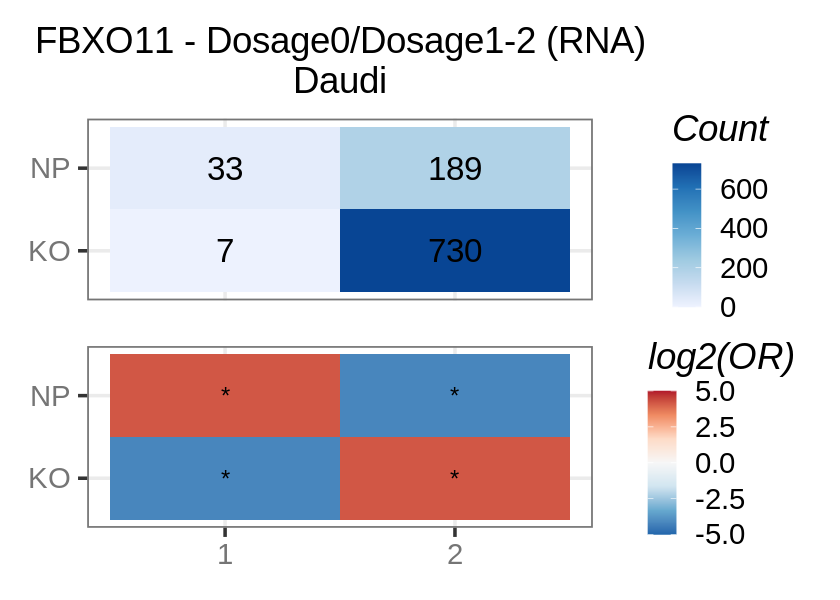

In [691]:
# p2 <- p2 + theme(
#   axis.title.x = element_blank(),    # Remove x-axis title
#   axis.text.x = element_blank(),     # Remove x-axis labels
#   axis.ticks.x = element_blank(),  # Remove x-axis ticks
#   axis.title.y = element_blank(),    
# )
# p3 <- p3 + theme(
#   plot.title = element_blank(), 
# )

# fig.size(5, 7)
# # grid.arrange(p2, p3, nrow = 2)
# p2 + p3 + plot_layout(nrow = 2, heights = c(1, 1))

In [688]:
library(patchwork)

#### [Control, Het]/Homo Alt

In [944]:
exp_name = paste0(name, ' - Dosage0-1/Dosage2 (RNA)')
name
exp_name

edit_var = 'HomoAlt_v_Other'
split_var = 'CellType_Index'

[1] "FBXO11"

[1] "FBXO11 - Dosage0-1/Dosage2 (RNA)"

In [945]:
seu = CreateSeuratObject(counts = rna_counts_all, 
                          project = name)


seu = AddMetaData(seu, meta_all)

In [946]:
seu@meta.data %>% head(2)

orig.ident nCount_RNA nFeature_RNA
AACATCTCTGTGAC_CCATCCACGC FBXO11     43401      5095        
AACATCTCTGTGAC_ACAACCAGGA FBXO11     32763      4390        
                          cell                      Dosage Edited_Index
AACATCTCTGTGAC_CCATCCACGC AACATCTCTGTGAC_CCATCCACGC 2      Edited      
AACATCTCTGTGAC_ACAACCAGGA AACATCTCTGTGAC_ACAACCAGGA 2      Edited      
                          CellType_Index HomoRef_v_Other HomoAlt_v_Other
AACATCTCTGTGAC_CCATCCACGC Jurkat         Het/Homo Alt    Homo Alt       
AACATCTCTGTGAC_ACAACCAGGA Daudi          Het/Homo Alt    Homo Alt

In [947]:
# Prepare RNA assay for dimensionality reduction: 
# Normalize data, find variable features and scale data.
DefaultAssay(object = seu) = 'RNA'
seu = NormalizeData(object = seu) %>% FindVariableFeatures() %>% ScaleData()

Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix



In [948]:
# Run Principle Component Analysis (PCA) to reduce the dimensionality of the data.
seu <- RunPCA(object = seu)


PC_ 1 
Positive:  CD74, HLA-DRA, IGKC, LTB, IGLC1, HLA-DPA1, TCL1A, HLA-B, HLA-DRB1, LINC01857 
	   MS4A1, HLA-DPB1, HLA-DQB1, MEF2B, CD22, CD52, HLA-DQA1, BIRC3, ISG20, RGS16 
	   CD79A, JCHAIN, TUBA4A, AC068633.1, VPREB3, SPIB, HLA-A, NEIL1, RASSF6, IFI30 
Negative:  CD3D, TRBC1, GYPC, SELENOW, BEX3, CD99, VIM, AIF1, NME4, CD3G 
	   TRBC2, PHGDH, OCIAD2, MRPL57, FYB1, CD1E, TSPAN7, C12orf57, TCF7, CD3E 
	   MAP1A, ITM2A, TXNDC17, FXYD2, BEX1, DNTT, HSP90AA1, ABRACL, CHI3L2, CTSG 
PC_ 2 
Positive:  RPLP2, RPL27A, RPL37A, RPS21, RPL37, RPL38, RPL31, RPS23, RPS11, RPL27 
	   POLR2L, NDUFAF8, RPL23, ARMC9, PLEKHA7, CDKN1A, RPL22L1, SLIRP, RPS20, CHCHD10 
	   IFI30, RPS28, EBNA1BP2, NDUFS6, RPL30, RPS29, FKBP11, FABP5, TOMM5, RPL24 
Negative:  ASPM, RASSF6, LINC00910, JCHAIN, RIMS2, MXD3, CCDC85A, ANXA1, TRAC, DLGAP5 
	   CD2, AC004160.1, GPR174, CLEC2D, BEST3, FRMD3, DDAH2, EVI2B, PDE4D, STARD4-AS1 
	   AC068413.1, MT-ND2, AICDA, LINC01720, CNTNAP4, AC016168.2, AC020718.1, RCBTB2, RASGRP

In [949]:
# Run Uniform Manifold Approximation and Projection (UMAP) to visualize clustering in 2-D.
seu <- RunUMAP(object = seu, dims = 1:40)


15:09:00 UMAP embedding parameters a = 0.9922 b = 1.112

15:09:00 Read 2797 rows and found 40 numeric columns

15:09:00 Using Annoy for neighbor search, n_neighbors = 30

15:09:00 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:09:00 Writing NN index file to temp file /tmp/RtmpNFeuUB/file177f7c87b95d

15:09:00 Searching Annoy index using 1 thread, search_k = 3000

15:09:01 Annoy recall = 100%

15:09:01 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

15:09:02 Initializing from normalized Laplacian + noise (using RSpectra)

15:09:02 Commencing optimization for 500 epochs, with 122970 positive edges

15:09:12 Optimization finished



In [950]:
seu@meta.data[edit_var] %>% table

HomoAlt_v_Other
 Control Homo Alt 
    1177     1620 

In [154]:
seu %>% str

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay5' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ layers    :List of 3
  .. .. .. .. ..$ counts    :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. .. ..@ i       : int [1:5225285] 8 11 20 22 24 26 28 29 30 33 ...
  .. .. .. .. .. .. ..@ p       : int [1:1023] 0 5095 9485 14461 19204 23117 26960 29574 32581 37513 ...
  .. .. .. .. .. .. ..@ Dim     : int [1:2] 36591 1022
  .. .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. ..@ x       : num [1:5225285] 3 1 6 6 1 15 2 2 10 5 ...
  .. .. .. .. .. .. ..@ factors : list()
  .. .. .. .. ..$ data      :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. .. ..@ i       : int [1:5225285] 8 11 20 22 24 26 28 29 30 33 ...
  .. .. .. .. .. .. ..@ p       : int [1:1023] 0 5095 9485 14461 19204 2311

In [951]:
# Calculate perturbation signature (PRTB).
seu <- CalcPerturbSig(
  object = seu, 
  assay = "RNA", 
  slot = "data", 
  gd.class = edit_var, 
  nt.cell.class = "Control", 
  reduction = "pca", 
  ndims = 40, 
  num.neighbors = n_neighbors, 
  split.by = split_var, 
  new.assay.name = "PRTB")



Processing Jurkat

Processing Daudi



In [952]:
seu

An object of class Seurat 
38591 features across 2797 samples within 2 assays 
Active assay: RNA (36591 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: PRTB
 2 dimensional reductions calculated: pca, umap

In [953]:
seu@assays$PRTB

Assay data with 2000 features for 2797 cells
First 10 features:
 CCL3L1, LINC01781, CCL4L2, GZMK, CEBPE, VPREB3, RPL22L1, ANKRD30BL,
RPL37, EGR1 

In [954]:
# Prepare PRTB assay for dimensionality reduction: 
# Normalize data, find variable features and center data.
DefaultAssay(object = seu) <- 'PRTB'

# Use variable features from RNA assay.
VariableFeatures(object = seu) <- VariableFeatures(object = seu[["RNA"]])
seu <- ScaleData(object = seu, do.scale = F, do.center = T)


Centering data matrix



In [955]:
# Run PCA to reduce the dimensionality of the data.
seu <- RunPCA(object = seu, reduction.key = 'prtbpca', reduction.name = 'prtbpca')

# Run UMAP to visualize clustering in 2-D.
seu <- RunUMAP(
  object = seu, 
  dims = 1:40, 
  reduction = 'prtbpca', 
  reduction.key = 'prtbumap', 
  reduction.name = 'prtbumap')


prtbpca_ 1 
Positive:  DDIT3, PDE4D, XKR6, FABP6, LINC00910, RASSF6, QTRT2, TMEM8B, RGS16, AC016168.2 
	   VPREB1, USP30-AS1, SNX22, FBXO16, ZMYND19, MIR210HG, EVI2B, AL606500.1, CCL3L1, TLR9 
	   LINC02100, AC092910.3, TXLNA, AC068413.1, AICDA, IGLC1, GADD45B, SELENOP, SRRD, JCHAIN 
Negative:  COX7C, RPS29, POLR2L, MRPL57, HLA-A, RPS21, TOMM5, HSPA8, HIST1H4C, RPS28 
	   MYO7B, CRIP1, RPL38, RPL24, VIM, RPL37, UQCRQ, RPSA, CD1E, ARMC9 
	   MT-ND2, TRBC1, HSPA5, PLEKHA7, CD79A, RPL27, RPS11, RPL23, CYCS, SEC11C 
prtbpca_ 2 
Positive:  TUBA4A, SPIB, IGLC1, MEF2B, TCL1A, CTSH, RGS16, VPREB3, CD52, MS4A1 
	   IGKC, MYLIP, BIRC3, LINC01857, CHCHD10, FKBP11, IFI30, HLA-DQA1, HLA-A, UBE2C 
	   CRIP1, ISG20, CDKN1A, LY86, GTSF1, HVCN1, PLEK, HERPUD1, ELL3, HLA-DRA 
Negative:  CD1E, IGLL1, MYO7B, CHI3L2, CD3G, BNIP3, C12orf57, DNAJB1, CTSG, SELENOW 
	   PHGDH, TRBC2, LINC00051, TRBC1, GYPC, NME4, CCT2, BEX1, MAP1A, VIM 
	   HIST1H1D, CD99, CLSPN, FXYD2, TCF7, SMIM24, AIF1, SLC39A4, HIST1H4C, G

In [956]:
seu

An object of class Seurat 
38591 features across 2797 samples within 2 assays 
Active assay: PRTB (2000 features, 2000 variable features)
 2 layers present: data, scale.data
 1 other assay present: RNA
 4 dimensional reductions calculated: pca, umap, prtbpca, prtbumap

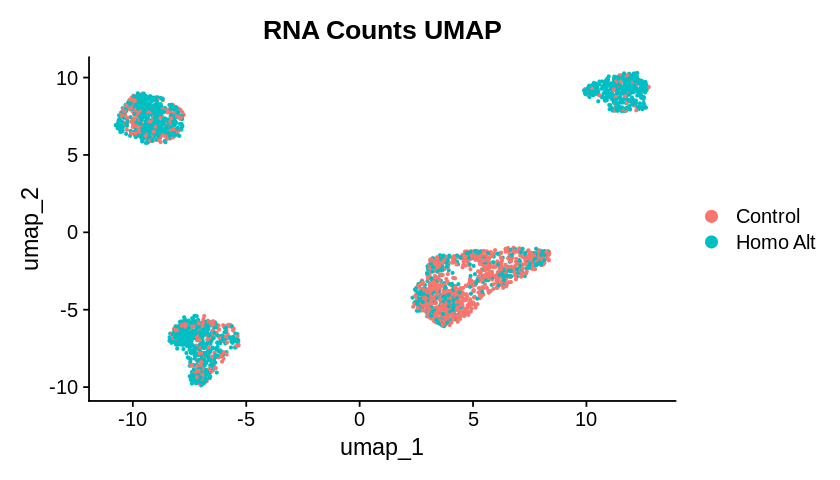

In [957]:
p1 = DimPlot(
  object = seu,
  group.by = edit_var,
  reduction = 'umap', 
  # split.by = "crispr", 
  ncol = 1, 
  pt.size = 0.5, 
)
p1 + ggtitle("RNA Counts UMAP")
  # cols = c("grey39","goldenrod3")) +
  # ggtitle("Perturbation Status") +


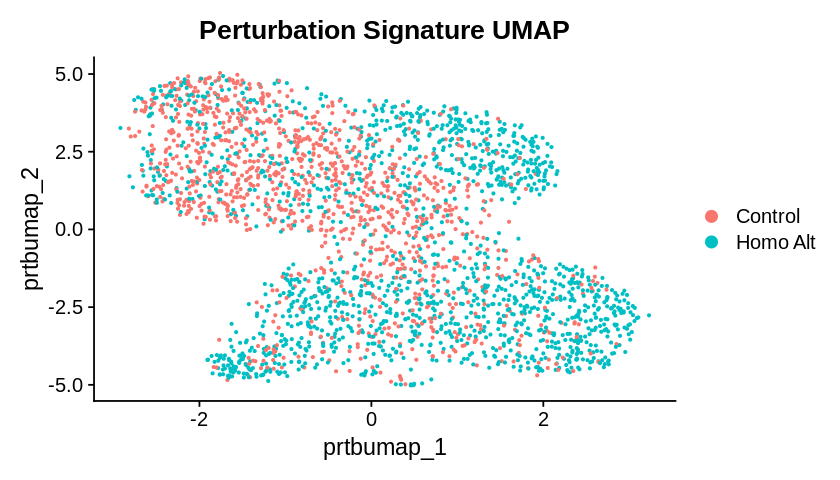

In [958]:
p1 = DimPlot(
  object = seu,
  group.by = edit_var,
  reduction = 'prtbumap', 
  # split.by = "crispr", 
  ncol = 1, 
  pt.size = 0.5, 
)
p1 + ggtitle("Perturbation Signature UMAP")
  # cols = c("grey39","goldenrod3")) +
  # ggtitle("Perturbation Status") +


In [959]:
# Run mixscape.
seu <- RunMixscape(
  object = seu, 
  assay = "PRTB", 
  slot = "scale.data",  # "scale.data",
  labels = edit_var, 
  nt.class.name = "Control", 
  min.de.genes = min_de_genes, 
  logfc.threshold = logfc_threshold,
  iter.num = 10, 
  de.assay = "RNA", 
  verbose = TRUE,
  prtb.type = "KO", 
  split.by = split_var)


Processing Homo Alt

Finding new perturbation gene set

Processing Homo Alt

Finding new perturbation gene set

Computing perturbation signature for missing features.

Classifying cells for: 

  Homo Alt



number of iterations= 34 
number of iterations= 15 
number of iterations= 13 
number of iterations= 13 


Classifying cells for: 

  Homo Alt



number of iterations= 53 
number of iterations= 69 
number of iterations= 70 


In [668]:
# PRTB_presto_scale = wilcoxauc(seu@assays$PRTB@scale.data, seu@meta.data[['Edited_Index']],
#                               group_by = seu@meta.data[['CellType_Index']])

In [960]:
seu@meta.data[c(edit_var ,'Dosage')] %>% table

               Dosage
HomoAlt_v_Other    0    1    2
       Control  1128   49    0
       Homo Alt    0    0 1620

In [961]:
seu@meta.data[c('mixscape_class.global' ,'Dosage')] %>% table

                     Dosage
mixscape_class.global    0    1    2
              Control 1128   49    0
              KO         0    0 1065
              NP         0    0  555

In [962]:
seu@meta.data[c('mixscape_class.global' ,'Dosage', split_var)] %>% table

, , CellType_Index = Daudi

                     Dosage
mixscape_class.global   0   1   2
              Control 298  40   0
              KO        0   0 705
              NP        0   0 214

, , CellType_Index = Jurkat

                     Dosage
mixscape_class.global   0   1   2
              Control 830   9   0
              KO        0   0 360
              NP        0   0 341


In [963]:
seu@meta.data[c('mixscape_class' ,'Dosage')] %>% table

              Dosage
mixscape_class    0    1    2
   Control     1128   49    0
   Homo Alt KO    0    0 1065
   Homo Alt NP    0    0  555

[1] "Jurkat"
  mixscape_class.global Dosage Freq
1               Control      0  830
2                    KO      0    0
3                    NP      0    0
4               Control      1    9
5                    KO      1    0
6                    NP      1    0
7               Control      2    0
8                    KO      2  360
9                    NP      2  341
  mixscape_class.global Dosage Freq
1               Control      0  830
2                    KO      0    0
3                    NP      0    0
4               Control      1    9
5                    KO      1    0
6                    NP      1    0
7               Control      2    0
8                    KO      2  360
9                    NP      2  341
[1] "Daudi"
  mixscape_class.global Dosage Freq
1               Control      0  298
2                    KO      0    0
3                    NP      0    0
4               Control      1   40
5                    KO      1    0
6                    NP      1    0
7  

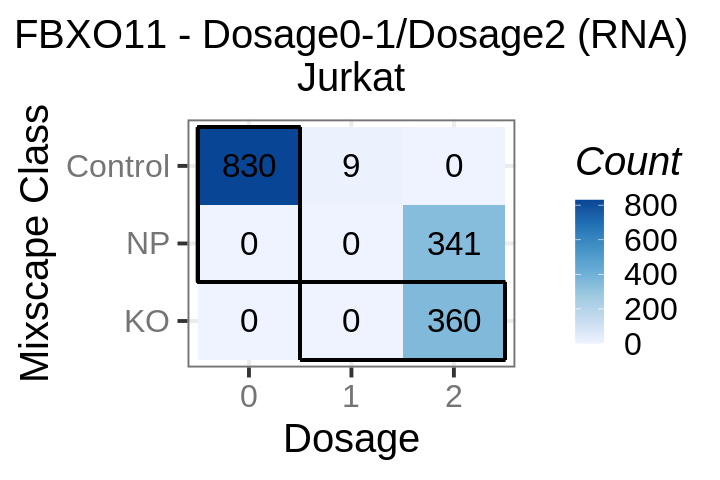

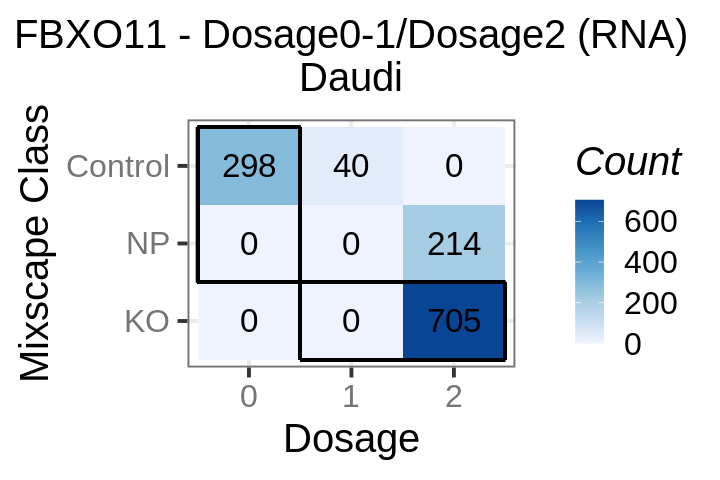

In [964]:
# for (ctype in c('Jurkat', 'Daudi')){
#     print(ctype)


#     dat = seu@meta.data[seu@meta.data[split_var]==ctype, ]
#     dat = dat[dat['Dosage'] %>% drop_na() %>% rownames, ]
#     dat[['Dosage']] = factor(dat[['Dosage']], levels = c(0, 1, 2))
#     dat = dat[c('mixscape_class.global' ,'Dosage')] %>% table %>% as.data.frame
#     dat[['mixscape_class.global']] = factor(dat[['mixscape_class.global']], levels = c('KO', 'NP', 'Control'))
#     print(dat)
#     if (!('KO' %in% (dat[['mixscape_class.global']] %>% unique)) ){
#         dat = rbind(dat, data.frame(mixscape_class.global = c('KO'), Dosage = c(0, 1, 2), Freq =c(0, 0, 0)))
#     }
#     print(dat)

#     fig.size(4, 6)
#     p1 = ggplot(dat)+
#         geom_tile(aes(x=Dosage, y=mixscape_class.global,fill =Freq))+
#         geom_text(aes(x=Dosage, y=mixscape_class.global, label = round(Freq, 1)), size = 7) +
#         scale_fill_distiller(palette = 'Blues', direction = 1)+
#         theme_pres(base_size = 24)+
#         ylab('Mixscape Class')+
#         labs(fill = 'Count')+
#         geom_segment(aes(x = .5, y = 1.5, xend = 1.5, yend = 1.5), size = 1)+
#         geom_segment(aes(x = .5, y = 3.5, xend = 1.5, yend = 3.5), size = 1)+
#         geom_segment(aes(x = .5, y = 1.5, xend = .5, yend = 3.5), size = 1)+
#         geom_segment(aes(x = 1.5, y = 1.5, xend = 1.5, yend = 3.5), size = 1)+

#         geom_segment(aes(x = 1.5, y = 1.5, xend = 3.5, yend = 1.5), size = 1)+
#         geom_segment(aes(x = 1.5, y = .5, xend = 3.5, yend = .5), size = 1)+
#         geom_segment(aes(x = 1.5, y = .5, xend = 1.5, yend = 1.5), size = 1)+
#         geom_segment(aes(x = 3.5, y = .5, xend = 3.5, yend = 1.5), size = 1)+

#         ggtitle(paste0(exp_name, '\n', ctype))+
#         theme(plot.title = element_text(size = 24))
#     print(p1)
# }

[1] "Jurkat"
  mixscape_class.global Dosage Freq
1               Control      0  830
2                    KO      0    0
3                    NP      0    0
4               Control      1    9
5                    KO      1    0
6                    NP      1    0
7               Control      2    0
8                    KO      2  360
9                    NP      2  341
  mixscape_class.global Dosage Freq
1               Control      0  830
2                    KO      0    0
3                    NP      0    0
4               Control      1    9
5                    KO      1    0
6                    NP      1    0
7               Control      2    0
8                    KO      2  360
9                    NP      2  341


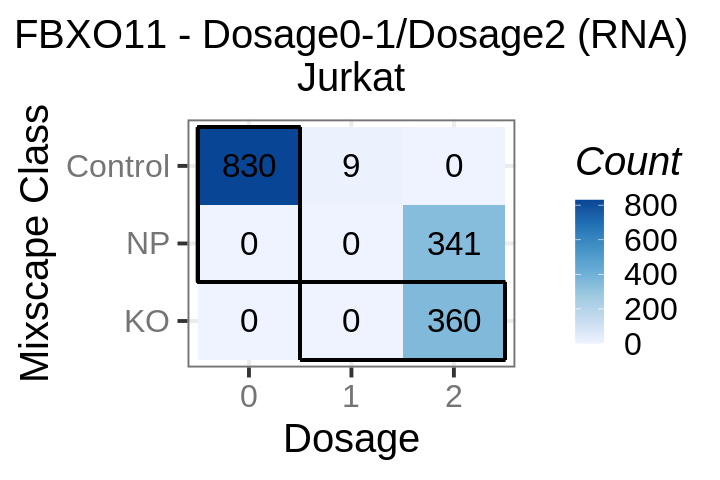

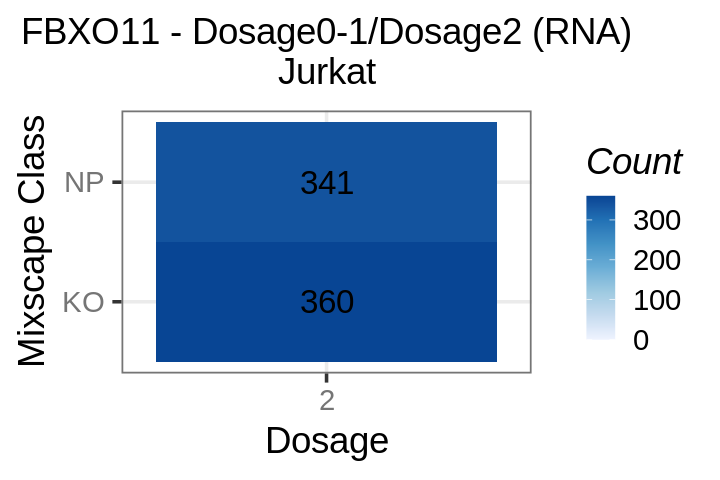

[1] "Daudi"
  mixscape_class.global Dosage Freq
1               Control      0  298
2                    KO      0    0
3                    NP      0    0
4               Control      1   40
5                    KO      1    0
6                    NP      1    0
7               Control      2    0
8                    KO      2  705
9                    NP      2  214
  mixscape_class.global Dosage Freq
1               Control      0  298
2                    KO      0    0
3                    NP      0    0
4               Control      1   40
5                    KO      1    0
6                    NP      1    0
7               Control      2    0
8                    KO      2  705
9                    NP      2  214


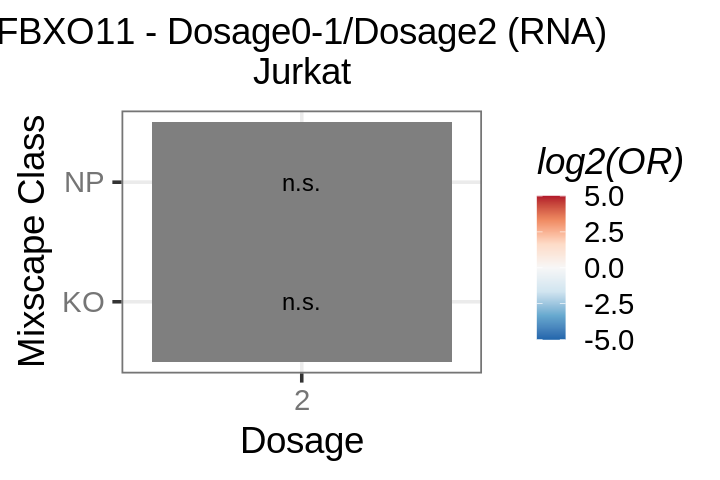

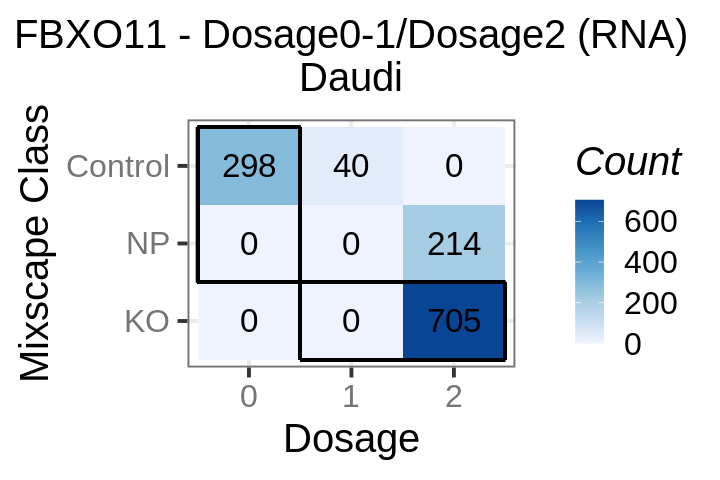

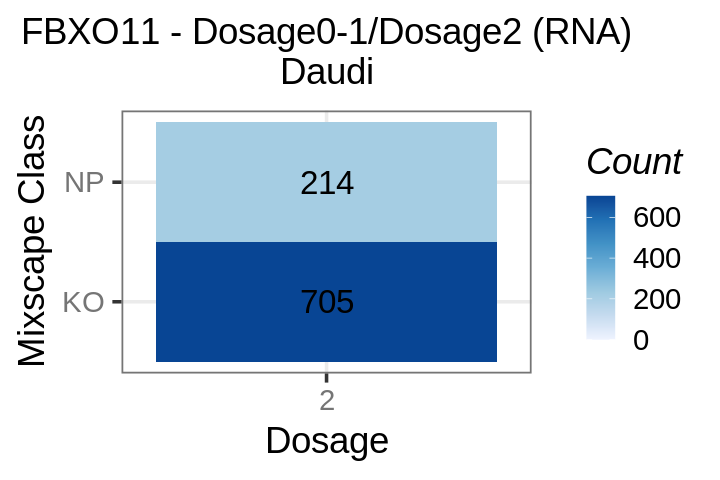

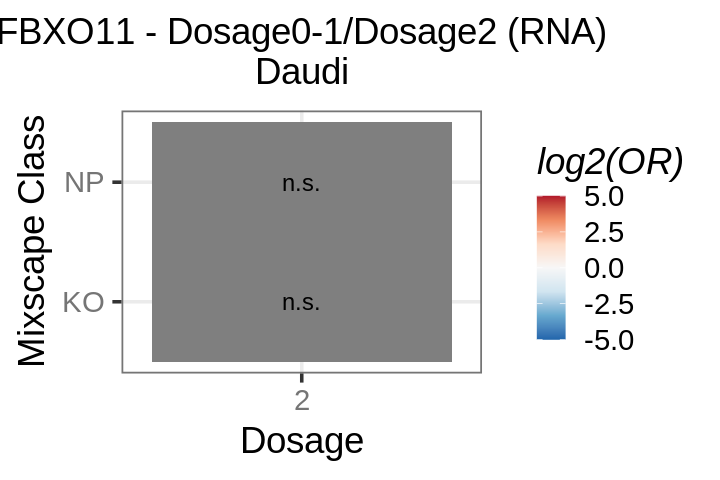

In [965]:
for (ctype in c('Jurkat', 'Daudi')){
    print(ctype)


    dat = seu@meta.data[seu@meta.data[split_var]==ctype, ]
    dat = dat[dat['Dosage'] %>% drop_na() %>% rownames, ]
    dat[['Dosage']] = factor(dat[['Dosage']], levels = c(0, 1, 2))
    dat = dat[c('mixscape_class.global' ,'Dosage')] %>% table %>% as.data.frame
    dat[['mixscape_class.global']] = factor(dat[['mixscape_class.global']], levels = c('KO', 'NP', 'Control'))
    print(dat)
    if (!('KO' %in% (dat[['mixscape_class.global']] %>% unique)) ){
        dat = rbind(dat, data.frame(mixscape_class.global = c('KO'), Dosage = c(0, 1, 2), Freq =c(0, 0, 0)))
    }
    print(dat)

    fig.size(4, 6)
    p1 = ggplot(dat)+
        geom_tile(aes(x=Dosage, y=mixscape_class.global,fill =Freq))+
        geom_text(aes(x=Dosage, y=mixscape_class.global, label = round(Freq, 1)), size = 7) +
        scale_fill_distiller(palette = 'Blues', direction = 1)+
        theme_pres(base_size = 24)+
        ylab('Mixscape Class')+
        labs(fill = 'Count')+
        geom_segment(aes(x = .5, y = 1.5, xend = 1.5, yend = 1.5), size = 1)+
        geom_segment(aes(x = .5, y = 3.5, xend = 1.5, yend = 3.5), size = 1)+
        geom_segment(aes(x = .5, y = 1.5, xend = .5, yend = 3.5), size = 1)+
        geom_segment(aes(x = 1.5, y = 1.5, xend = 1.5, yend = 3.5), size = 1)+

        geom_segment(aes(x = 1.5, y = 1.5, xend = 3.5, yend = 1.5), size = 1)+
        geom_segment(aes(x = 1.5, y = .5, xend = 3.5, yend = .5), size = 1)+
        geom_segment(aes(x = 1.5, y = .5, xend = 1.5, yend = 1.5), size = 1)+
        geom_segment(aes(x = 3.5, y = .5, xend = 3.5, yend = 1.5), size = 1)+

        ggtitle(paste0(exp_name, '\n', ctype))+
        theme(plot.title = element_text(size = 24))
        print(p1)

    if (edit_var=='Edited_Index'){
        dat_filt = dat %>% filter(`mixscape_class.global`!='Control') } else if (edit_var=='HomoRef_v_Other'){
        dat_filt = dat %>% filter(`mixscape_class.global`!='Control', `Dosage`!=0)} else if (edit_var=='HomoAlt_v_Other'){
        dat_filt = dat %>% filter(`mixscape_class.global`!='Control', `Dosage`!=0, `Dosage`!=1)} 

    # if (edit_var=='Edited_Index'){
    #     dat_filt = dat %>% filter(`mixscape_class.global`!='Control') }

    count_max = dat_filt['Freq'] %>% max
    fig.size(4, 6)
    p2 = ggplot(dat_filt)+
        geom_tile(aes(x=Dosage, y=mixscape_class.global,fill =Freq))+
        geom_text(aes(x=Dosage, y=mixscape_class.global, label = round(Freq, 1)), size = 7) +
        scale_fill_distiller(palette = 'Blues', direction = 1,  limits = c(0, count_max), oob = scales::squish)+
        theme_pres(base_size = 22)+
        ylab('Mixscape Class')+
        labs(fill = 'Count')+
        # geom_segment(aes(x = .5, y = 1.5, xend = 1.5, yend = 1.5), size = 1)+
        # geom_segment(aes(x = .5, y = 3.5, xend = 1.5, yend = 3.5), size = 1)+
        # geom_segment(aes(x = .5, y = 1.5, xend = .5, yend = 3.5), size = 1)+
        # geom_segment(aes(x = 1.5, y = 1.5, xend = 1.5, yend = 3.5), size = 1)+

        # geom_segment(aes(x = 1.5, y = 1.5, xend = 3.5, yend = 1.5), size = 1)+
        # geom_segment(aes(x = 1.5, y = .5, xend = 3.5, yend = .5), size = 1)+
        # geom_segment(aes(x = 1.5, y = .5, xend = 1.5, yend = 1.5), size = 1)+
        # geom_segment(aes(x = 3.5, y = .5, xend = 3.5, yend = 1.5), size = 1)+

        ggtitle(paste0(exp_name, '\n', ctype))+
        theme(plot.title = element_text(size = 22))
    print(p2)

    dat_filt['OR'] = 0
    dat_filt['pval'] = 1

    for (i in rownames(dat_filt)){
        mixclass = dat_filt[i, 'mixscape_class.global']
        dosage = dat_filt[i, 'Dosage']

        mat = matrix(0, 2, 2)

        mat[1, 1] = (dat_filt %>% filter(Dosage == dosage, mixscape_class.global==mixclass))[['Freq']] %>% sum
        mat[1, 2] = (dat_filt %>% filter(Dosage != dosage, mixscape_class.global==mixclass))[['Freq']] %>% sum
        mat[2, 1] = (dat_filt %>% filter(Dosage == dosage, mixscape_class.global!=mixclass))[['Freq']] %>% sum
        mat[2, 2] = (dat_filt %>% filter(Dosage != dosage, mixscape_class.global!=mixclass))[['Freq']] %>% sum

        pval = fisher.test(mat)$p.value
        or = fisher.test(mat)$estimate

        dat_filt[i, c('OR', 'pval')] = c(or, pval)

    }

    dat_filt[['padj']] = p.adjust(dat_filt[['pval']], 'BH')
    dat_filt = dat_filt %>% mutate(label = ifelse(padj < 0.05, '*', 'n.s.'))
    dat_filt['log2OR'] = log2(dat_filt['OR'])

    fig.size(4, 6)
    p3 = ggplot(dat_filt)+
        geom_tile(aes(x=Dosage, y=mixscape_class.global,fill =log2OR))+
        geom_text(aes(x=Dosage, y=mixscape_class.global, label = label), size = 5) +
        scale_fill_distiller(palette = 'RdBu', direction = -1, limits = c(vmin, vmax), oob = scales::squish)+
        theme_pres(base_size = 22)+
        ylab('Mixscape Class')+
        labs(fill = 'log2(OR)')+
        # geom_segment(aes(x = .5, y = 1.5, xend = 1.5, yend = 1.5), size = 1)+
        # geom_segment(aes(x = .5, y = 3.5, xend = 1.5, yend = 3.5), size = 1)+
        # geom_segment(aes(x = .5, y = 1.5, xend = .5, yend = 3.5), size = 1)+
        # geom_segment(aes(x = 1.5, y = 1.5, xend = 1.5, yend = 3.5), size = 1)+

        # geom_segment(aes(x = 1.5, y = 1.5, xend = 3.5, yend = 1.5), size = 1)+
        # geom_segment(aes(x = 1.5, y = .5, xend = 3.5, yend = .5), size = 1)+
        # geom_segment(aes(x = 1.5, y = .5, xend = 1.5, yend = 1.5), size = 1)+
        # geom_segment(aes(x = 3.5, y = .5, xend = 3.5, yend = 1.5), size = 1)+

        ggtitle(paste0(exp_name, '\n', ctype))+
        theme(plot.title = element_text(size = 22))
    print(p3)
}

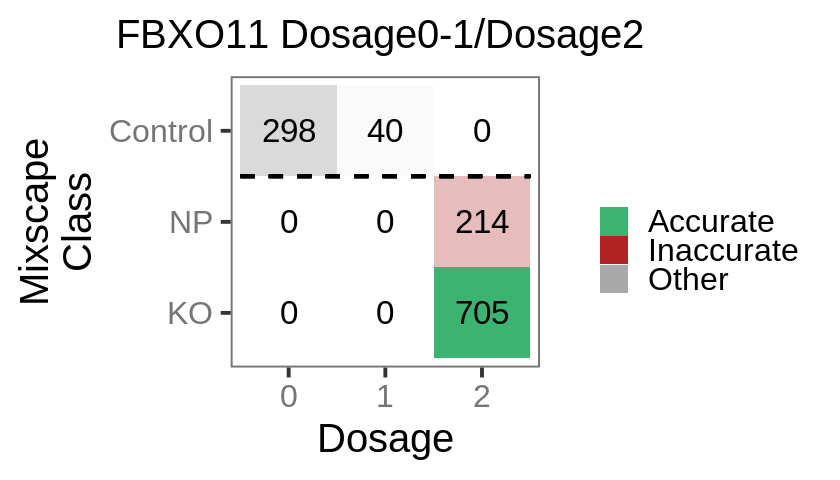

In [969]:
# pdf(file = '../Figures/Mixscape_FBXO11Daudi_Dosage01Dosage2.pdf',  height = 4, width = 7)

dat = dat %>% mutate(group = ifelse(((`mixscape_class.global` == 'NP') & (Dosage == 0)) |
                                ((`mixscape_class.global` == 'KO') & (Dosage == 2)), 'Accurate', 
                              
                    ifelse(((`mixscape_class.global` == 'KO') & (Dosage == 0)) |
                                ((`mixscape_class.global` == 'NP') & (Dosage == 2)), 'Inaccurate',
           
                              'Other')))

# dat = dat %>% mutate(color = ifelse(group == 'Accurate', 'green', ifelse(group == 'Inaccurate', 'red', 'grey')))

fig.size(4, 7)
ggplot(dat, aes(x=Dosage, y=mixscape_class.global))+
        geom_tile(aes(fill = group, alpha = Freq/sum(dat$Freq)))+
        geom_text(aes(x=Dosage, y=mixscape_class.global, label = round(Freq, 1)), size = 7) +
        scale_fill_manual(values = c("Other" = "darkgray", "Inaccurate" = "firebrick", "Accurate" = "mediumseagreen")) +  # Manually set colors
        scale_alpha_continuous(range = c(0, 1)) +
        guides(
        alpha = "none")+
        theme_pres(base_size = 24)+
        ylab('Mixscape\nClass')+
        labs(fill = '')+
        geom_segment(aes(x = .5, y = 2.5, xend = 3.5, yend = 2.5), size = 1, linetype = 2)+
        ggtitle(exp_name %>% str_replace('\\(RNA\\)', '') %>% str_replace('\\(ADT\\)', '') %>%
                str_replace(' -', ''))+
        theme(plot.title = element_text(size = 24),
                        panel.grid.major = element_blank(),
             )
# dev.off()

In [967]:
seu@meta.data %>% write_csv("../Misc/FBXO11_MixscapeClasses_Dosage01Dosage2_20241118.csv")

#### Run differential expression

In [885]:
seu = CreateSeuratObject(counts = rna_counts_all, 
                          project = name)
seu = AddMetaData(seu, meta_all)

In [886]:
library(MASS)

In [887]:
# Load seu

In [888]:
edit_var = 'Edited_Index'
split_var = 'CellType_Index'

In [889]:
ctype = 'Daudi'

In [890]:
seu@meta.data = seu@meta.data %>% mutate(Plate = str_split(cell, '_', n = 2) %>% map(2) %>% unlist)

In [1051]:
seu@meta.data[['Plate']] %>% table

.
ACAACCAGGA AGCAGAATTA CCATCCACGC   FBXO11_1   FBXO11_2   FBXO11_3   FBXO11_4 
       240        257        253        136        277        293        300 
  FBXO11_6   FBXO11_7   FBXO11_8 GTCTCGTGAA 
       234        280        255        272 

In [126]:
df = seu@meta.data[seu@meta.data[split_var]==ctype, ]
Exprs = LayerData(seu[, rownames(df)],  assay = "RNA", layer = "counts")
nUMI = colSums(Exprs)
cells = rownames(df)
nCells = rowSums(Exprs > 0)
gene_qc = data.frame(nCells = nCells %>% sort %>% rev, rank = seq(1, length(nCells)))
genes = gene_qc %>% filter(nCells > length(cells)*0.3) %>% rownames

Exprs = Exprs[genes, ]
# seu@meta.data[seu@meta.data[split_var]==ctype, 'nUMI'] = nUMI %>% unname

df[['Plate']] = as.factor(df[['Plate']])
df[['nUMI']] = nUMI

In [1053]:
df %>% dim
Exprs %>% dim
length(genes)

[1] 1257   11

[1] 4766 1257

[1] 4766

In [1054]:
suppressWarnings({
FBXO11_lm_Daudi_Edited <- 
    sapply(genes, function(i){ 
        

    lm0<- glm.nb(data = df,  
          formula = (Exprs)[i,] ~ 1 + log10(nUMI) + Plate
            )
    
    lm1 <- glm.nb(data = df,  
          formula = (Exprs)[i,] ~ 1  + log10(nUMI) + Plate + Edited_Index
               )
        
    return(c("pval" = anova(lm0,lm1)[2,dim(anova(lm0,lm1))[2]],
             "beta" = summary(lm1)$coeff[dim(summary(lm1)$coeff)[1], 1],
             "se" = summary(lm1)$coeff[dim(summary(lm1)$coeff)[1], 2],
             "z" = summary(lm1)$coeff[dim(summary(lm1)$coeff)[1], 3],
             "name" = rownames(summary(lm1)$coeff)[dim(summary(lm1)$coeff)[1]]
            ))
        })
    })
FBXO11_lm_Daudi_Edited<- FBXO11_lm_Daudi_Edited %>% t %>% as_tibble(rownames = "Genes")
# FBXO11_lm_Daudi_Edited %>% with(pval) %>% hist
FBXO11_lm_Daudi_Edited <- FBXO11_lm_Daudi_Edited %>% arrange(pval) %>% mutate(padj = p.adjust(pval, method = "BH"))

In [1055]:
FBXO11_lm_Daudi_Edited %>% filter(padj < 0.05) %>% arrange(padj)

Genes    pval                 beta                se                
1   HSP90B1  0                    -1.18223943487887   0.13546087691812  
2   PDIA6    1.11022302462516e-16 -0.541774040799034  0.0667260989555488
3   HLA-B    1.65423230669148e-14 -0.309616618885177  0.0408535884387244
4   HLA-A    2.13573603247141e-12 -0.391239672782195  0.0570222696425361
5   HSPA5    2.45081732686003e-12 -0.781565710303711  0.116612771820745 
6   MYDGF    1.30385258145793e-10 -0.562591501957574  0.0892750248709814
7   SSR2     2.37976083283797e-10 -0.40203794172642   0.0642322230365222
8   PPIB     2.6181801171532e-10  -0.466566995282088  0.0758861311558257
9   P4HB     8.82829254145179e-10 -0.448517762858402  0.0745569699302789
10  WARS     1.51290402428117e-09 -0.675941308676139  0.11774340465909  
11  HLA-C    2.34380359565023e-09 -0.292204119328     0.0492294278048692
12  TRIB3    2.02674828031491e-08 -0.774523475803604  0.1464300643197   
13  LAPTM5   3.36145220547479e-08 -0.346413241907973  0.0637443936157467
14  FBXO11   7.92126402249238e-08 -0.740447148375962  0.142548919245122 
15  RPL36    1.8640911458867e-07  -0.17213390232364   0.033042156979051 
16  FKBP11   1.97715772976004e-07 -0.473575769358487  0.0930896751650103
17  PSME1    4.07191241835747e-07 -0.30050760824363   0.0603113169977532
18  MZB1     4.35454572067506e-07 -0.339877751087459  0.0691909665291845
19  DDIT3    5.34979275657044e-07 -0.780433402222425  0.166070590385279 
20  UBE2L6   6.47167887724009e-07 -0.389327348155662  0.0796417082723016
21  HLA-DRB1 8.29979897920552e-07 0.324744217221844   0.0637599334489628
22  CHCHD10  8.92220493042828e-07 -0.340324746575742  0.0708273179006005
23  HERPUD1  1.84947798953505e-06 -0.427315842167733  0.0915327196995568
24  SEC61A1  2.02175831653939e-06 -0.565274524566779  0.118993707198287 
25  DNAJC1   2.0946801847499e-06  -0.781960180893992  0.174876524410081 
26  ISG15    2.19700816517232e-06 -0.673155760538957  0.146268763831724 
27  MIF      2.19713465621219e-06 -0.193630007886358  0.0414920906797186
28  SRSF5    2.80141587416516e-06 0.293850300999217   0.0617547263408719
29  CALR     3.26454215493488e-06 -0.340162754249664  0.0748428247082227
30  HADHA    5.19569492662963e-06 -0.580318342981608  0.130626997840518 
⋮   ⋮        ⋮                    ⋮                   ⋮                 
131 ARL6IP4  0.000997239210161371 0.196631976103277   0.0590640331252325
132 MMADHC   0.0010083824018533   -0.310551756076373  0.0956487847475288
133 DENND2D  0.00103392846469075  -0.613516120056604  0.189724079602207 
134 EIF5B    0.00105111019537918  0.319055780216885   0.0952935069573028
135 HSPD1    0.00108913256799203  -0.16310026222977   0.0505872651115897
136 PLIN3    0.00113206059555659  0.270454422620611   0.0817894394727277
137 COX6A1   0.00115611607336208  0.135312060131308   0.0413564095948398
138 NFKBIA   0.00115954024513509  0.446382438357926   0.134199926216843 
139 ANK1     0.00121647850671913  -0.608039816119546  0.191657422052612 
140 FTH1     0.00126867458581381  -0.172776554377207  0.0541259295905335
141 CHD4     0.00127740077416449  0.528197382883565   0.161019748484842 
142 OAS1     0.00132578152961693  -0.535934708669135  0.166432669046634 
143 CUL1     0.00133672504933702  0.513106973687783   0.156817628426019 
144 CCDC112  0.00134506202350659  -0.55019686478823   0.171461217758272 
145 ZNF804A  0.00136449109894798  0.452897225192055   0.137959828965631 
146 HMCES    0.00140035769207614  0.360911673965457   0.110390021199531 
147 FCMR     0.00142408375971703  -0.556398755303466  0.179926628580353 
148 STT3A    0.00142467440973226  -0.346136966275049  0.107816661854281 
149 SYVN1    0.00142500582459304  -0.324024239838741  0.100698746010141 
150 MTFP1    0.00142852444300423  -0.30463442917802   0.0981929541328425
151 PNISR    0.00148921560798698  0.23393619060986    0.0726317435668207
152 MESD     0.00148990341011368  -0.47541345977503   0.150911458291233 
153 DHFR     0.00150469689452803  0.2042657556627     0.063495

In [1056]:
'FBXO11' %in% (FBXO11_lm_Daudi_Edited %>% filter(padj < 0.05) )$Genes

[1] TRUE

In [1057]:
FBXO11_lm_Daudi_Edited %>% write_csv("../Misc/FBXO11_Daudi_lm_EditedIndex_20241118.csv")

In [127]:
df = seu@meta.data[(seu@meta.data[split_var]==ctype) & (seu@meta.data[edit_var]=='Edited'), ]
Exprs = LayerData(seu[, rownames(df)],  assay = "RNA", layer = "counts")
nUMI = colSums(Exprs)
cells = rownames(df)
nCells = rowSums(Exprs > 0)
gene_qc = data.frame(nCells = nCells %>% sort %>% rev, rank = seq(1, length(nCells)))
genes = gene_qc %>% filter(nCells > length(cells)*0.3) %>% rownames

Exprs = Exprs[genes, ]
# seu@meta.data[seu@meta.data[split_var]==ctype, 'nUMI'] = nUMI %>% unname

df[['Plate']] = as.factor(df[['Plate']])
df[['nUMI']] = nUMI

In [1059]:
suppressWarnings({
FBXO11_lm_Daudi <- 
    sapply(genes, function(i){ 
        

    lm0<- glm.nb(data = df,  
          formula = (Exprs)[i,] ~ 1 + log10(nUMI) + Plate
            )
    
    lm1 <- glm.nb(data = df,  
          formula = (Exprs)[i,] ~ 1  + log10(nUMI) + Plate + Dosage
               )
    
    return(c("pval" = anova(lm0,lm1)[2,dim(anova(lm0,lm1))[2]],
             "beta" = summary(lm1)$coeff[dim(summary(lm1)$coeff)[1], 1],
             "se" = summary(lm1)$coeff[dim(summary(lm1)$coeff)[1], 2],
             "z" = summary(lm1)$coeff[dim(summary(lm1)$coeff)[1], 3],
             "name" = rownames(summary(lm1)$coeff)[dim(summary(lm1)$coeff)[1]]
            ))
        })
    })
FBXO11_lm_Daudi<- FBXO11_lm_Daudi %>% t %>% as_tibble(rownames = "Genes")
# FBXO11_lm_Daudi %>% with(pval) %>% hist
FBXO11_lm_Daudi <- FBXO11_lm_Daudi %>% arrange(pval) %>% mutate(padj = p.adjust(pval, method = "BH"))


In [1060]:
FBXO11_lm_Daudi %>% filter(padj < 0.05) %>% arrange(padj)

Genes     pval                 beta                se                 
1   HLA-DRA   0                    0.216019251805566   0.0235812939864231 
2   HLA-DPB1  1.11022302462516e-16 0.29509301837043    0.0339045490230973 
3   MPST      4.9960036108132e-15  -0.328238589057108  0.04209843214473   
4   GGCT      6.98330282489223e-14 -0.284060864699759  0.0378899343572609 
5   MDH2      1.22124532708767e-13 -0.184806506874694  0.0248559809340166 
6   TAGLN2    1.27675647831893e-12 -0.192844272675047  0.0268871858528225 
7   TPI1      3.26916271831124e-12 -0.175373467396067  0.0255503344368136 
8   HLA-DPA1  1.77746706242488e-11 0.183510372571748   0.0263969264487159 
9   CD74      3.72710751150862e-11 0.114381233425132   0.0167948343198694 
10  ABHD3     1.8226253839515e-10  0.336317997735764   0.0514691354424234 
11  PDCD5     2.53695342511406e-09 -0.199026786560367  0.0335996326957974 
12  LCK       2.82742118606905e-09 0.261426539691349   0.0423749248465793 
13  PKM       9.54761891769351e-09 -0.116276154353551  0.0204666272180154 
14  PSME1     3.48172842778993e-08 -0.136360073566428  0.0248661470164718 
15  LSP1      3.62180277990731e-08 -0.280759086287944  0.0500448878587719 
16  TUBA4A    5.16781144543899e-08 -0.211118845865782  0.0392782597637285 
17  CHCHD10   6.1444063170768e-08  -0.155706954723302  0.029155901667645  
18  CIAO1     7.84212584870048e-08 -0.238823647843109  0.0448837871812858 
19  POLD4     1.50424722233922e-07 -0.17431636061636   0.0337290016195115 
20  MIF       1.53112502898622e-07 -0.0897750748548411 0.0171493280593574 
21  TMSB10    1.84332429209455e-07 -0.081875130066201  0.0157147605853443 
22  HSBP1     1.98387635652608e-07 -0.198117128544128  0.038418500422865  
23  COMMD6    2.13552500905045e-07 -0.108995347032641  0.0209383421399578 
24  CD27      2.72372564502632e-07 0.20492276455319    0.0389616441244501 
25  ATP5PB    2.80998958102074e-07 -0.126196542253255  0.0245319094159373 
26  LAPTM5    2.82225705472428e-07 -0.134753218735231  0.0263919397105082 
27  RPL19     3.70171112207274e-07 0.0491912682980069  0.00956135715129824
28  SSR2      5.26167258763088e-07 -0.136143595001501  0.0270998225413737 
29  STIM2     5.54098075866705e-07 0.205027955867842   0.0392867604743554 
30  WARS      5.83847481916422e-07 -0.244222618666455  0.0495515951396071 
⋮   ⋮         ⋮                    ⋮                   ⋮                  
202 MFSD3     0.00152845182814121  -0.229923004128655  0.0732551879245454 
203 NT5DC1    0.00153166561629325  -0.214711070553505  0.0666082697423057 
204 SLC25A5   0.00153664164739653  -0.0594019467328583 0.0187730529761263 
205 ZNF385B   0.00154669198903346  -0.20753629745939   0.0660649273085061 
206 CHD3      0.00155618816530112  0.172796923543846   0.0537485362043426 
207 INPP5D    0.00156576856550261  -0.19388580525147   0.0619421241518866 
208 IKBKE     0.00158231886863203  -0.19938637422637   0.0634150474119138 
209 EEF1G     0.00161559164501868  0.0352821114996138  0.0111571360607676 
210 CORO1A    0.00164350968927307  -0.0803195447874614 0.0257389766884617 
211 MTMR2     0.00166098803161208  -0.193758854899011  0.0604496642533936 
212 HINT1     0.00167856637574437  0.0414447687025456  0.0131080755015916 
213 CHCHD3    0.00168374343000888  0.037645821135664   0.0120020895382794 
214 IFI6      0.00173886480741414  0.243283621593378   0.0770112132790887 
215 ZC3H8     0.00176730727574481  0.234916983083605   0.074014308850205  
216 TOMM5     0.00178734024456184  -0.0847893326289482 0.0272729131918911 
217 LUC7L3    0.00183879148459154  0.0779840089687903  0.0246227071822022 
218 ZNF706    0.00188688661333292  -0.102393809388369  0.0332663622406839 
219 NUDT8     0.0019169665021842   -0.164257978571026  0.0537929169399668 
220 C1QBP     0.00194266602256954  0.0716415723358824  0.0229655234979068 
221 BCKDK     0.00199183380931012  -0.176988925342744  0.0573787076623231 
222 VPS28     0.00199540580412072  -0.172864468054063  0.056620821576789  
223 LINC01470 0.0020104335140

In [1061]:
FBXO11_lm_Daudi %>% write_csv("../Misc/FBXO11_Daudi_lm_Dosage_20241118.csv")

In [1062]:
'FBXO11' %in% (FBXO11_lm_Daudi %>% filter(padj < 0.05) )$Genes

[1] TRUE

In [891]:
mixscape_meta_fns = c("../Misc/FBXO11_MixscapeClasses_ControlCrispr_20241118.csv",
                     "../Misc/FBXO11_MixscapeClasses_Dosage0Dosage12_20241118.csv",
                     "../Misc/FBXO11_MixscapeClasses_Dosage01Dosage2_20241118.csv")
names(mixscape_meta_fns) = c('ControlCrispr', 'Dosage0Dosage12', 'Dosage01Dosage2')


In [352]:
# mixscape_name = 'Dosage0Dosage12'

In [353]:
# fn = mixscape_meta_fns[mixscape_name]

# mixscape_meta = read_delim(fn) %>% as.data.frame
# rownames(mixscape_meta) = mixscape_meta$cell
# mixscape_meta = mixscape_meta %>% mutate(Plate = str_split(cell, '_', n = 2) %>% map(2) %>% unlist)

# ## copy rest of code
# df = mixscape_meta[(mixscape_meta[split_var]==ctype) & (mixscape_meta[edit_var]=='Edited') &
#                    (mixscape_meta['mixscape_class.global'] != 'Control'), ]
# Exprs = LayerData(seu[, rownames(df)],  assay = "RNA", layer = "counts")
# nUMI = colSums(Exprs)
# cells = rownames(df)
# nCells = rowSums(Exprs > 0)
# gene_qc = data.frame(nCells = nCells %>% sort %>% rev, rank = seq(1, length(nCells)))
# genes = gene_qc %>% filter(nCells > length(cells)*0.3) %>% rownames

# Exprs = Exprs[genes, ]
# # mixscape_meta[mixscape_meta[split_var]==ctype, 'nUMI'] = nUMI %>% unname


Rows: 2797 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): orig.ident, cell, Edited_Index, CellType_Index, HomoRef_v_Other, Ho...
dbl (4): nCount_RNA, nFeature_RNA, Dosage, mixscape_class_p_ko

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [356]:
# df[['Plate']] = as.factor(df[['Plate']])
# df[['nUMI']] = nUMI

# df[['Mixscape_Class']] = df$mixscape_class.global

# suppressWarnings({
# FBXO11_lm_Daudi_Mixscape <- 
#     sapply(genes[1:3], function(i){ 


#     lm0<- glm.nb(data = df,  
#           formula = (Exprs)[i,] ~ 1 + log10(nUMI) + Plate
#             )

#     lm1 <- glm.nb(data = df,  
#           formula = (Exprs)[i,] ~ 1  + log10(nUMI) + Plate + Mixscape_Class
#                )

#     return(c("pval" = anova(lm0,lm1)[2,dim(anova(lm0,lm1))[2]],
#              "beta" = summary(lm1)$coeff[dim(summary(lm1)$coeff)[1], 1],
#              "se" = summary(lm1)$coeff[dim(summary(lm1)$coeff)[1], 2],
#              "z" = summary(lm1)$coeff[dim(summary(lm1)$coeff)[1], 3],
#              "name" = rownames(summary(lm1)$coeff)[dim(summary(lm1)$coeff)[1]]
#             ))
#         })
#     })
# FBXO11_lm_Daudi_Mixscape<- FBXO11_lm_Daudi_Mixscape %>% t %>% as_tibble(rownames = "Genes")
# # FBXO11_lm_Daudi_Edited %>% with(pval) %>% hist
# FBXO11_lm_Daudi_Mixscape <- FBXO11_lm_Daudi_Mixscape %>% arrange(pval) %>% mutate(padj = p.adjust(pval, method = "BH"))

# FBXO11_lm_Daudi_Mixscape %>% filter(padj < 0.05) %>% arrange(padj)
# 'FBXO11' %in% (FBXO11_lm_Daudi_Mixscape %>% filter(padj < 0.05) )$Genes    


Genes pval                 beta                se                
1 RPS6  0.000542747994996207 -0.0658339581558347 0.0188684321560448
2 RPS9  0.000770197283216367 -0.0663285452601096 0.0195399512312143
3 RPS8  0.00364616933788697  -0.0597088909648693 0.0203883531245074
  z                 name             padj       
1 -3.48910591041047 Mixscape_ClassNP 0.001155296
2 -3.39450925313224 Mixscape_ClassNP 0.001155296
3 -2.92857841926906 Mixscape_ClassNP 0.003646169

[1] FALSE

In [358]:
# i = 'RPS9'
# lm0<- glm.nb(data = df,  
#       formula = (Exprs)[i,] ~ 1 + log10(nUMI) + Plate
#         )

# lm1 <- glm.nb(data = df,  
#       formula = (Exprs)[i,] ~ 1  + log10(nUMI) + Plate + Mixscape_Class
#            )


In [357]:
# anova(lm0,lm1)

Model                                    theta    Resid. df    2 x log-lik.
1 1 + log10(nUMI) + Plate                  18.93847 1127      -10114.97      
2 1 + log10(nUMI) + Plate + Mixscape_Class 18.96092 1126      -10113.93      
  Test      df LR stat. Pr(Chi) 
1        NA          NA       NA
2 1 vs 2  1    1.046256 0.306371

In [359]:
# anova(lm0,lm1)

Model                                    theta   Resid. df    2 x log-lik.
1 1 + log10(nUMI) + Plate                  20.6645 942       -8404.644      
2 1 + log10(nUMI) + Plate + Mixscape_Class 21.0910 941       -8393.332      
  Test      df LR stat. Pr(Chi)     
1        NA          NA           NA
2 1 vs 2  1    11.31171 0.0007701973

In [144]:
mixscape_meta_fns = c("../Misc/FBXO11_MixscapeClasses_ControlCrispr_20241118.csv",
                     "../Misc/FBXO11_MixscapeClasses_Dosage0Dosage12_20241118.csv",
                     "../Misc/FBXO11_MixscapeClasses_Dosage01Dosage2_20241118.csv")
names(mixscape_meta_fns) = c('ControlCrispr', 'Dosage0Dosage12', 'Dosage01Dosage2')

for (mixscape_name in c('Dosage0Dosage12', 'Dosage01Dosage2')
     #names(mixscape_meta_fns)
    ){
    fn = mixscape_meta_fns[mixscape_name]
    
    mixscape_meta = read_delim(fn) %>% as.data.frame
    rownames(mixscape_meta) = mixscape_meta$cell
    mixscape_meta = mixscape_meta %>% mutate(Plate = str_split(cell, '_', n = 2) %>% map(2) %>% unlist)
    
    ## copy rest of code
    df = mixscape_meta[(mixscape_meta[split_var]==ctype) & (mixscape_meta[edit_var]=='Edited') &
                       (mixscape_meta['mixscape_class.global'] != 'Control'), ]
    Exprs = LayerData(seu[, rownames(df)],  assay = "RNA", layer = "counts")
    nUMI = colSums(Exprs)
    cells = rownames(df)
    nCells = rowSums(Exprs > 0)
    gene_qc = data.frame(nCells = nCells %>% sort %>% rev, rank = seq(1, length(nCells)))
    genes = gene_qc %>% filter(nCells > length(cells)*0.3) %>% rownames

    Exprs = Exprs[genes, ]
    # mixscape_meta[mixscape_meta[split_var]==ctype, 'nUMI'] = nUMI %>% unname

    df[['Plate']] = as.factor(df[['Plate']])
    df[['nUMI']] = nUMI

    df[['Mixscape_Class']] = df$mixscape_class.global
    
    suppressWarnings({
    FBXO11_lm_Daudi_Mixscape <- 
        sapply(genes, function(i){ 


        lm0<- glm.nb(data = df,  
              formula = (Exprs)[i,] ~ 1 + log10(nUMI) + Plate
                )

        lm1 <- glm.nb(data = df,  
              formula = (Exprs)[i,] ~ 1  + log10(nUMI) + Plate + Mixscape_Class
                   )

        return(c("pval" = anova(lm0,lm1)[2,dim(anova(lm0,lm1))[2]],
                 "beta" = summary(lm1)$coeff[dim(summary(lm1)$coeff)[1], 1],
                 "se" = summary(lm1)$coeff[dim(summary(lm1)$coeff)[1], 2],
                 "z" = summary(lm1)$coeff[dim(summary(lm1)$coeff)[1], 3],
                 "name" = rownames(summary(lm1)$coeff)[dim(summary(lm1)$coeff)[1]]
                ))
            })
        })
    FBXO11_lm_Daudi_Mixscape<- FBXO11_lm_Daudi_Mixscape %>% t %>% as_tibble(rownames = "Genes")
    # FBXO11_lm_Daudi_Edited %>% with(pval) %>% hist
    FBXO11_lm_Daudi_Mixscape <- FBXO11_lm_Daudi_Mixscape %>% arrange(pval) %>% mutate(padj = p.adjust(pval, method = "BH"))

    FBXO11_lm_Daudi_Mixscape %>% filter(padj < 0.05) %>% arrange(padj)
    'FBXO11' %in% (FBXO11_lm_Daudi_Mixscape %>% filter(padj < 0.05) )$Genes    
    
    out_fn = paste0("../Misc/FBXO11_Daudi_lm_MixscapeClasses_", mixscape_name, "_20241118.csv")
    FBXO11_lm_Daudi_Mixscape %>% write_csv(out_fn)
}

Rows: 2797 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): orig.ident, cell, Edited_Index, CellType_Index, HomoRef_v_Other, Ho...
dbl (4): nCount_RNA, nFeature_RNA, Dosage, mixscape_class_p_ko

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2797 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): orig.ident, cell, Edited_Index, CellType_Index, HomoRef_v_Other, Ho...
dbl (4): nCount_RNA, nFeature_RNA, Dosage, mixscape_class_p_ko

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [1063]:
# # Read whatever meta
# # mixscape_meta = seu@meta.data
# mixscape_meta = read_delim("../Misc/FBXO11_MixscapeClasses_ControlCrispr_20241118.csv") %>% as.data.frame
# rownames(mixscape_meta) = mixscape_meta$cell
# mixscape_meta = mixscape_meta %>% mutate(Plate = str_split(cell, '_', n = 2) %>% map(2) %>% unlist)

# df = mixscape_meta[(mixscape_meta[split_var]==ctype) & (mixscape_meta[edit_var]=='Edited'), ]
# Exprs = LayerData(seu[, rownames(df)],  assay = "RNA", layer = "counts")
# nUMI = colSums(Exprs)
# cells = rownames(df)
# nCells = rowSums(Exprs > 0)
# gene_qc = data.frame(nCells = nCells %>% sort %>% rev, rank = seq(1, length(nCells)))
# genes = gene_qc %>% filter(nCells > length(cells)*0.3) %>% rownames

# Exprs = Exprs[genes, ]
# # mixscape_meta[mixscape_meta[split_var]==ctype, 'nUMI'] = nUMI %>% unname

# df[['Plate']] = as.factor(df[['Plate']])
# df[['nUMI']] = nUMI

# df[['Mixscape_Class']] = df$mixscape_class.global

In [ ]:
# suppressWarnings({
# FBXO11_lm_Daudi_Mixscape <- 
#     sapply(genes, function(i){ 
        

#     lm0<- glm.nb(data = df,  
#           formula = (Exprs)[i,] ~ 1 + log10(nUMI) + Plate
#             )
    
#     lm1 <- glm.nb(data = df,  
#           formula = (Exprs)[i,] ~ 1  + log10(nUMI) + Plate + Mixscape_Class
#                )
    
#     return(c("pval" = anova(lm0,lm1)[2,dim(anova(lm0,lm1))[2]],
#              "beta" = summary(lm1)$coeff[dim(summary(lm1)$coeff)[1], 1],
#              "se" = summary(lm1)$coeff[dim(summary(lm1)$coeff)[1], 2],
#              "z" = summary(lm1)$coeff[dim(summary(lm1)$coeff)[1], 3],
#              "name" = rownames(summary(lm1)$coeff)[dim(summary(lm1)$coeff)[1]]
#             ))
#         })
#     })
# FBXO11_lm_Daudi_Mixscape<- FBXO11_lm_Daudi_Mixscape %>% t %>% as_tibble(rownames = "Genes")
# # FBXO11_lm_Daudi_Edited %>% with(pval) %>% hist
# FBXO11_lm_Daudi_Mixscape <- FBXO11_lm_Daudi_Mixscape %>% arrange(pval) %>% mutate(padj = p.adjust(pval, method = "BH"))

In [ ]:
# FBXO11_lm_Daudi_Mixscape %>% filter(padj < 0.05) %>% arrange(padj)

# 'FBXO11' %in% (FBXO11_lm_Daudi_Mixscape %>% filter(padj < 0.05) )$Genes

In [ ]:
# FBXO11_lm_Daudi_Mixscape %>% write_csv("../Misc/FBXO11_Daudi_lm_MixscapeClasses_ControlCrispr_20241118.csv")

#### Plot differential expression res

In [65]:
FBXO11_lm_Daudi = read_csv("../Misc/FBXO11_Daudi_lm_Dosage_20241118.csv")
FBXO11_lm_Daudi_Edited =  read_csv("../Misc/FBXO11_Daudi_lm_EditedIndex_20241118.csv")

Rows: 4774 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Genes, name
dbl (5): pval, beta, se, z, padj

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 4766 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Genes, name
dbl (5): pval, beta, se, z, padj

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [66]:
FBXO11_comp =  merge(FBXO11_lm_Daudi,FBXO11_lm_Daudi_Edited, by=c('Genes'), 
                    suffixes= c('_Dosage', '_Edited_Index'))

In [67]:
mixscape_names = c('ControlCrispr', 'Dosage0Dosage12', 'Dosage01Dosage2')

for (mixscape_name in mixscape_names){
    print(mixscape_name)
    fn = paste0("../Misc/FBXO11_Daudi_lm_MixscapeClasses_", mixscape_name, "_20241118.csv")
    FBXO11_lm_Daudi_Mixscape = read_csv(fn)
    colnames(FBXO11_lm_Daudi_Mixscape)[2:length(colnames(FBXO11_lm_Daudi_Mixscape))] = paste0(colnames(FBXO11_lm_Daudi_Mixscape)[2:length(colnames(FBXO11_lm_Daudi_Mixscape))], '_Mixscape',
          mixscape_name)
    
    FBXO11_comp = merge(FBXO11_comp,FBXO11_lm_Daudi_Mixscape, by=c('Genes'))
}

[1] "ControlCrispr"


Rows: 4774 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Genes, name
dbl (5): pval, beta, se, z, padj

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Dosage0Dosage12"


Rows: 4781 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Genes, name
dbl (5): pval, beta, se, z, padj

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Dosage01Dosage2"


Rows: 4736 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Genes, name
dbl (5): pval, beta, se, z, padj

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [68]:
FBXO11_comp %>% filter(padj_Dosage < 0.05) %>% dim
FBXO11_comp %>% filter(padj_Edited_Index < 0.05) %>% dim
FBXO11_comp %>% filter(padj_MixscapeControlCrispr < 0.05) %>% dim
FBXO11_comp %>% filter(padj_MixscapeDosage0Dosage12 < 0.05) %>% dim
FBXO11_comp %>% filter(padj_MixscapeDosage01Dosage2 < 0.05) %>% dim

[1] 230  31

[1] 156  31

[1] 115  31

[1] 532  31

[1] 422  31

In [69]:
0.05/nrow(FBXO11_comp)

[1] 1.068376e-05

In [70]:
FBXO11_comp %>% filter(pval_Dosage < 0.05/nrow(FBXO11_comp)) %>% dim
FBXO11_comp %>% filter(pval_Edited_Index < 0.05/nrow(FBXO11_comp)) %>% dim
FBXO11_comp %>% filter(pval_MixscapeControlCrispr < 0.05/nrow(FBXO11_comp)) %>% dim
FBXO11_comp %>% filter(pval_MixscapeDosage0Dosage12 < 0.05/nrow(FBXO11_comp)) %>% dim
FBXO11_comp %>% filter(pval_MixscapeDosage01Dosage2 < 0.05/nrow(FBXO11_comp)) %>% dim

[1] 54 31

[1] 34 31

[1] 33 31

[1] 105  31

[1] 80 31

In [71]:
FBXO11_comp %>% dplyr::select(starts_with('name')) %>% unique

name_Dosage name_Edited_Index  name_MixscapeControlCrispr
1 Dosage      Edited_IndexEdited Mixscape_ClassNP          
  name_MixscapeDosage0Dosage12 name_MixscapeDosage01Dosage2
1 Mixscape_ClassNP             Mixscape_ClassNP

In [72]:
cols = colnames(FBXO11_comp)[startsWith(colnames(FBXO11_comp), 'beta_Mixscape')]
FBXO11_comp[cols] = FBXO11_comp[cols]*-1

cols = colnames(FBXO11_comp)[startsWith(colnames(FBXO11_comp), 'z_Mixscape')]
FBXO11_comp[cols] = FBXO11_comp[cols]*-1

In [73]:
FBXO11_comp %>% colnames

[1] "Genes"                        "pval_Dosage"                 
 [3] "beta_Dosage"                  "se_Dosage"                   
 [5] "z_Dosage"                     "name_Dosage"                 
 [7] "padj_Dosage"                  "pval_Edited_Index"           
 [9] "beta_Edited_Index"            "se_Edited_Index"             
[11] "z_Edited_Index"               "name_Edited_Index"           
[13] "padj_Edited_Index"            "pval_MixscapeControlCrispr"  
[15] "beta_MixscapeControlCrispr"   "se_MixscapeControlCrispr"    
[17] "z_MixscapeControlCrispr"      "name_MixscapeControlCrispr"  
[19] "padj_MixscapeControlCrispr"   "pval_MixscapeDosage0Dosage12"
[21] "beta_MixscapeDosage0Dosage12" "se_MixscapeDosage0Dosage12"  
[23] "z_MixscapeDosage0Dosage12"    "name_MixscapeDosage0Dosage12"
[25] "padj_MixscapeDosage0Dosage12" "pval_MixscapeDosage01Dosage2"
[27] "beta_MixscapeDosage01Dosage2" "se_MixscapeDosage01Dosage2"  
[29] "z_MixscapeDosage01Dosage2"    "name_MixscapeDosage01Dosage2"
[31] "padj_MixscapeDosage01Dosage2"

In [ ]:
fig.size(5, 8.5)
ggplot(FBXO11_comp)+
    geom_point(aes(x = beta_Dosage, y = -beta_Mixscape_Class, col = padj_Dosage < 0.05), size = 1)+
    theme_pres()

In [ ]:
fig.size(5, 8.5)
ggplot(FBXO11_comp)+
    geom_point(aes(x = beta_Edited_Index, y = -beta_Mixscape_Class, col = padj_Dosage < 0.05), size = 1)+
    theme_pres()

In [ ]:
fig.size(5, 8.5)
ggplot(FBXO11_comp)+
    geom_point(aes(x = beta_Dosage, y = beta_Edited_Index, col = padj_Dosage < 0.05), size = 1)+
    theme_pres()

In [368]:
gg_qqplot <- function(ps, ci = 0.95) {
  n  <- length(ps)
  df <- data.frame(
    observed = -log10(sort(ps)),
    expected = -log10(ppoints(n)),
    clower   = -log10(qbeta(p = (1 - ci) / 2, shape1 = 1:n, shape2 = n:1)),
    cupper   = -log10(qbeta(p = (1 + ci) / 2, shape1 = 1:n, shape2 = n:1))
  )
  log10Pe <- expression(paste("Expected -log"[10], plain(P)))
  log10Po <- expression(paste("Observed -log"[10], plain(P)))
  ggplot(df) +
    geom_ribbon(
      mapping = aes(x = expected, ymin = clower, ymax = cupper),
      alpha = 0.1
    ) +
    geom_point(aes(expected, observed), shape = 1, size = 3) +
    geom_abline(intercept = 0, slope = 1, alpha = 0.5) +
    # geom_line(aes(expected, cupper), linetype = 2, size = 0.5) +
    # geom_line(aes(expected, clower), linetype = 2, size = 0.5) +
    xlab(log10Pe) +
    ylab(log10Po)
}


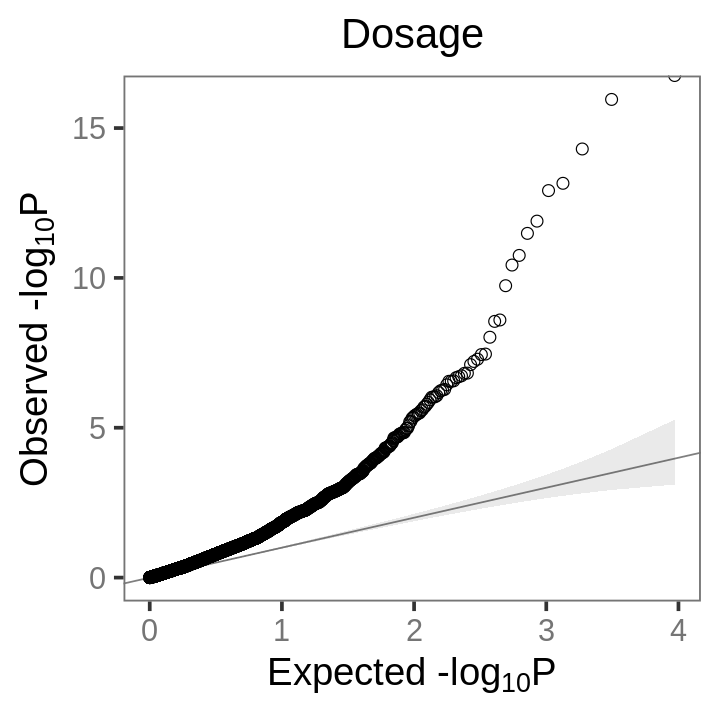

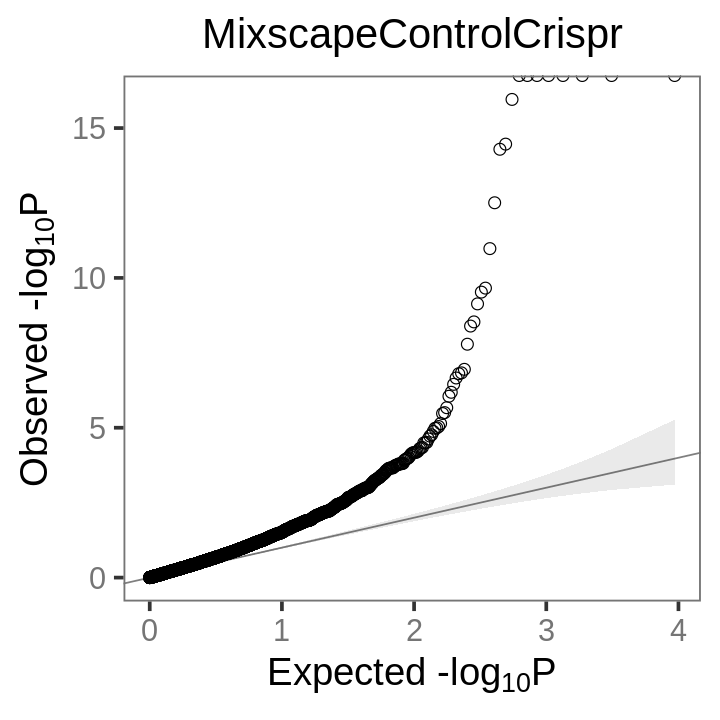

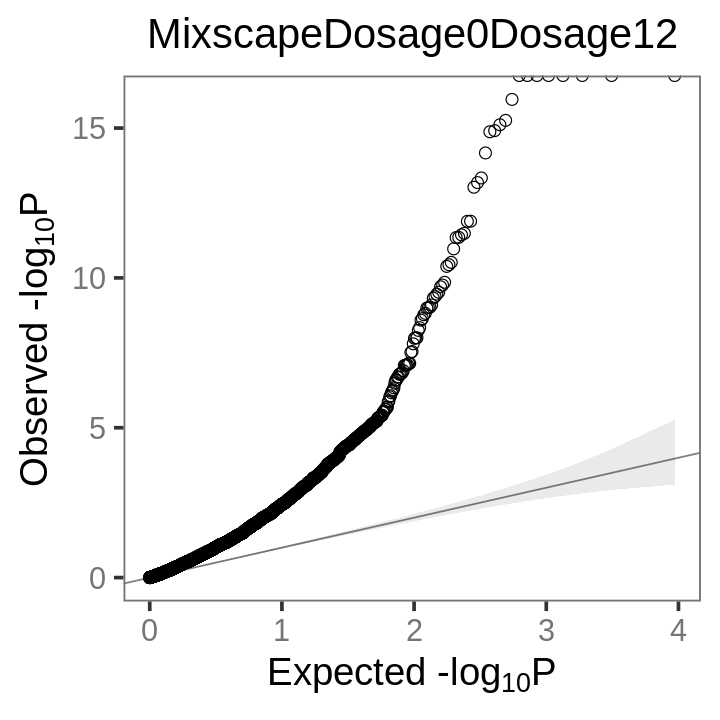

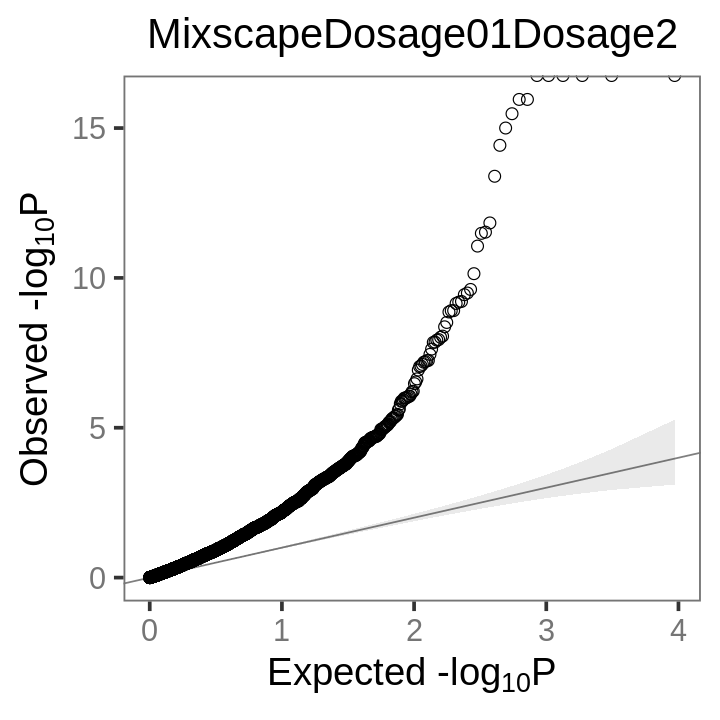

In [377]:
fig.size(6, 6)
gg_qqplot(FBXO11_comp$pval_Dosage)+
    theme_clean()+
    ggtitle('Dosage')

gg_qqplot(FBXO11_comp$pval_MixscapeControlCrispr)+
    theme_clean()+
    ggtitle('MixscapeControlCrispr')

gg_qqplot(FBXO11_comp$pval_MixscapeDosage0Dosage12)+
    theme_clean()+
    ggtitle('MixscapeDosage0Dosage12')

gg_qqplot(FBXO11_comp$pval_MixscapeDosage01Dosage2)+
    theme_clean()+
    ggtitle('MixscapeDosage01Dosage2')


In [74]:
FBXO11_comp =FBXO11_comp %>% mutate(Dosage_Enriched = ifelse((padj_Dosage < 0.05) & (beta_Dosage>0), 'High', 
                                        ifelse((padj_Dosage < 0.05) & (beta_Dosage<0), 'Low', 'NS')))

In [239]:
comp = FBXO11_comp

In [240]:
library(ggrepel)

to_label = c('FBXO11', 'CD40', 'HLA-DRA', 'CD74', 'CD27')
comp['label'] = ''
comp[comp$Genes %in% to_label, 'label'] = comp$Genes[comp$Genes %in% to_label]

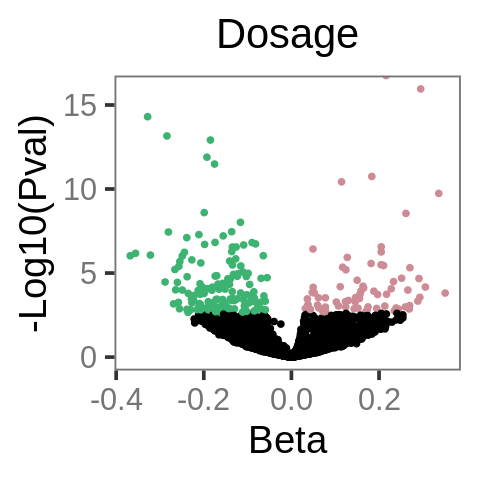

In [223]:
fig.size(4, 4)
p1 = ggplot(FBXO11_comp)+
    # geom_hline(aes(yintercept = -log10(0.05/(FBXO11_comp %>% nrow))), color = 'grey', size = 1)+
    geom_point(aes(x = beta_Dosage, y = -log10(pval_Dosage), col = Dosage_Enriched))+
    scale_color_manual(values = c('High' = 'lightpink3', 'Low' = 'mediumseagreen', 'NS' = 'Black'))+
    theme_clean()+
    xlab('Beta')+
    ylab('-Log10(Pval)')+
    ggtitle('Dosage')+
    theme(legend.position="none")
p1

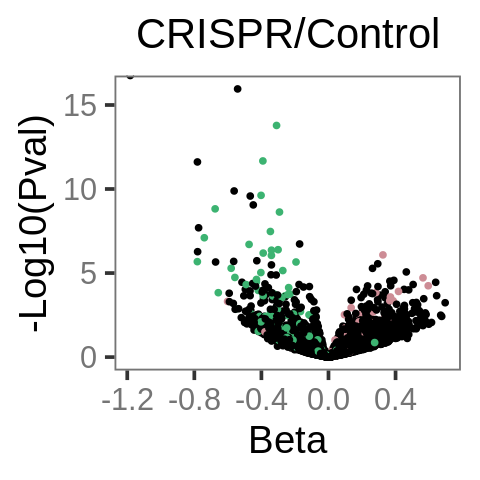

In [224]:
fig.size(4, 4)
p2 = ggplot(FBXO11_comp)+
    # geom_hline(aes(yintercept = -log10(0.05/(FBXO11_comp %>% nrow))), color = 'grey', size = 1)+
    geom_point(aes(x = beta_Edited_Index, y = -log10(pval_Edited_Index), col = Dosage_Enriched))+
    scale_color_manual(values = c('High' = 'lightpink3', 'Low' = 'mediumseagreen', 'NS' = 'Black'))+
    theme_clean()+
    xlab('Beta')+
    ylab('-Log10(Pval)')+
    ggtitle('CRISPR/Control')+
    theme(legend.position="none")
p2

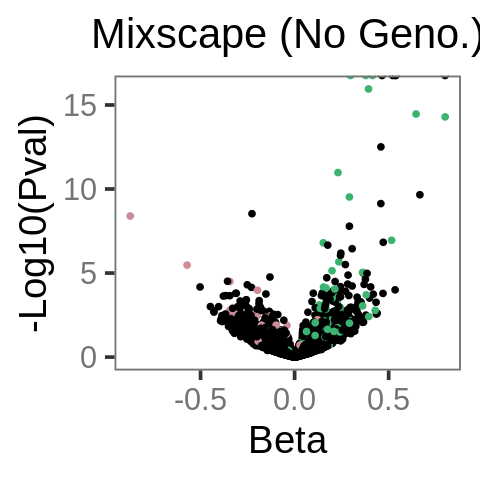

In [225]:
fig.size(4, 4)
p3 = ggplot(FBXO11_comp)+
    # geom_hline(aes(yintercept = -log10(0.05/(FBXO11_comp %>% nrow))), color = 'grey', size = 1)+
    geom_point(aes(x = -beta_MixscapeControlCrispr, y = -log10(pval_MixscapeControlCrispr), col = Dosage_Enriched))+
    scale_color_manual(values = c('High' = 'lightpink3', 'Low' = 'mediumseagreen', 'NS' = 'Black'))+
    theme_clean()+    
    xlab('Beta')+
    ylab('-Log10(Pval)')+
    ggtitle('Mixscape (No Geno.)')+
    theme(legend.position="none")
p3

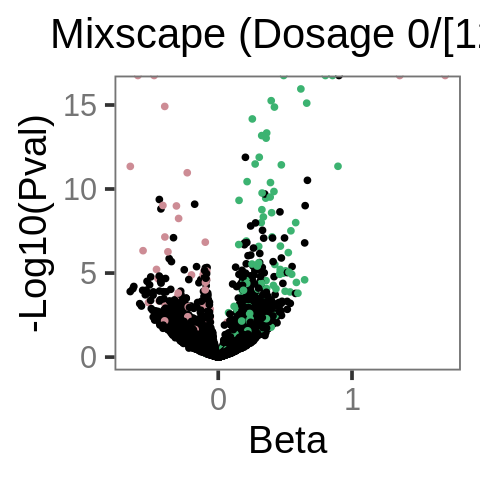

In [226]:
fig.size(4, 4)
p4 = ggplot(FBXO11_comp)+
    # geom_hline(aes(yintercept = -log10(0.05/(FBXO11_comp %>% nrow))), color = 'grey', size = 1)+
    geom_point(aes(x = -beta_MixscapeDosage0Dosage12, y = -log10(pval_MixscapeDosage0Dosage12), col = Dosage_Enriched))+
    scale_color_manual(values = c('High' = 'lightpink3', 'Low' = 'mediumseagreen', 'NS' = 'Black'))+
    theme_clean()+    
    xlab('Beta')+
    ylab('-Log10(Pval)')+
    ggtitle('Mixscape (Dosage 0/[12])')+
    theme(legend.position="none")
p4

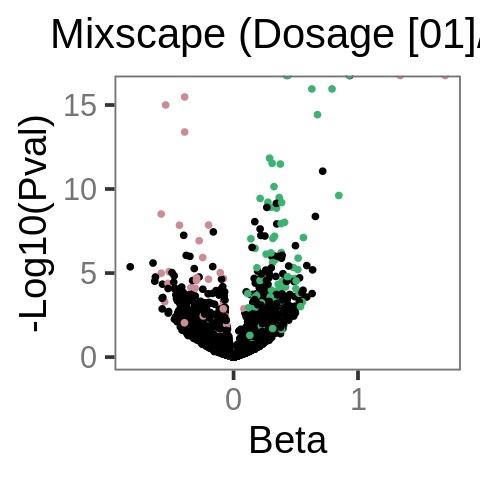

In [227]:
fig.size(4, 4)
p5 = ggplot(FBXO11_comp)+
    # geom_hline(aes(yintercept = -log10(0.05/(FBXO11_comp %>% nrow))), color = 'grey', size = 1)+
    geom_point(aes(x = -beta_MixscapeDosage01Dosage2, y = -log10(pval_MixscapeDosage01Dosage2), col = Dosage_Enriched))+
    scale_color_manual(values = c('High' = 'lightpink3', 'Low' = 'mediumseagreen', 'NS' = 'Black'))+
    theme_clean()+    
    xlab('Beta')+
    ylab('-Log10(Pval)')+
    ggtitle('Mixscape (Dosage [01]/2)')+
    theme(legend.position="none")
p5

In [77]:
library(gridExtra)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




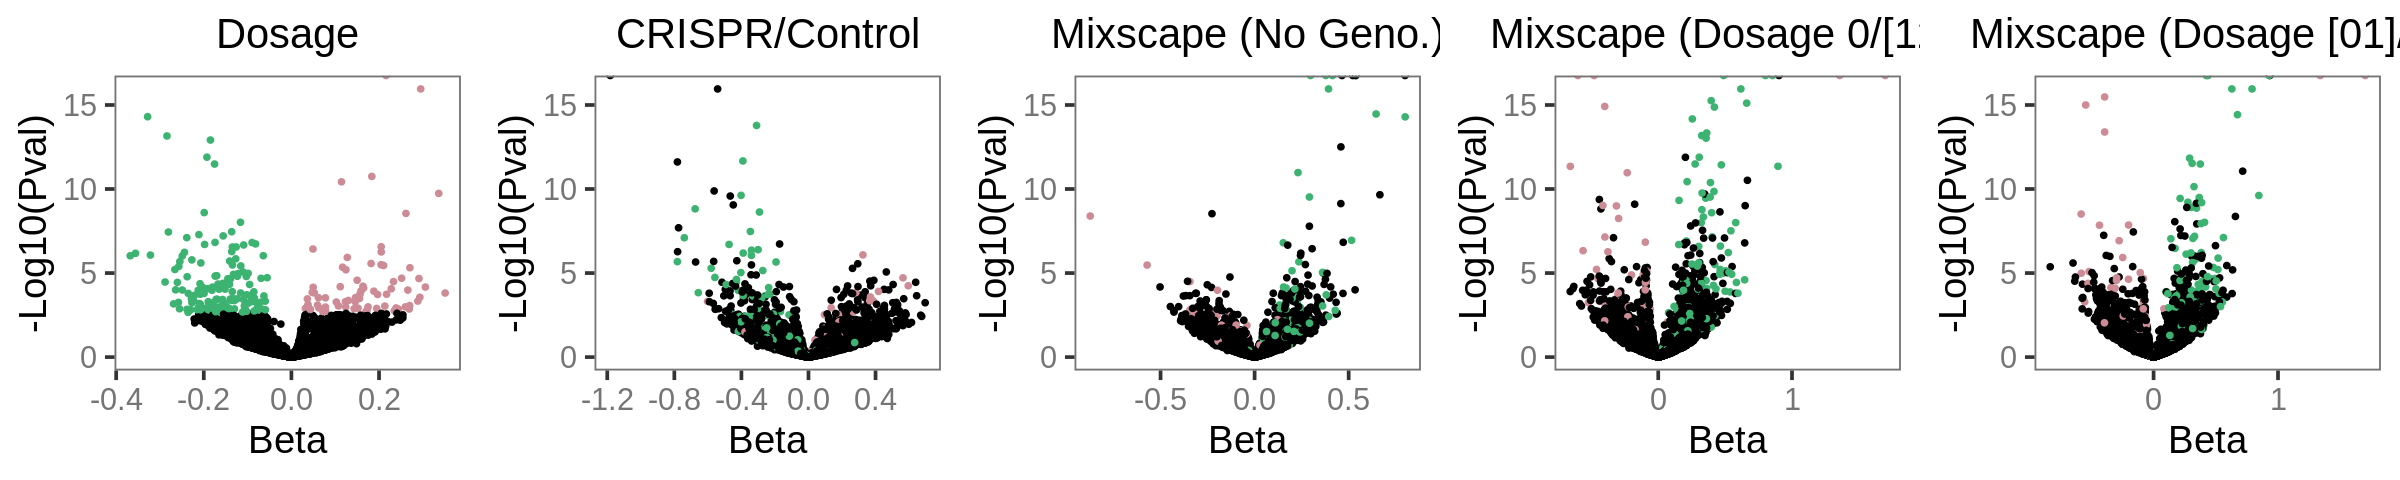

In [229]:
fig.size(4, 4*5)
grid.arrange(p1, p2, p3, p4, p5, nrow = 1)

In [ ]:
FBXO11_comp %>% colnames

[1] "Genes"                        "pval_Dosage"                 
 [3] "beta_Dosage"                  "se_Dosage"                   
 [5] "z_Dosage"                     "name_Dosage"                 
 [7] "padj_Dosage"                  "pval_Edited_Index"           
 [9] "beta_Edited_Index"            "se_Edited_Index"             
[11] "z_Edited_Index"               "name_Edited_Index"           
[13] "padj_Edited_Index"            "pval_MixscapeControlCrispr"  
[15] "beta_MixscapeControlCrispr"   "se_MixscapeControlCrispr"    
[17] "z_MixscapeControlCrispr"      "name_MixscapeControlCrispr"  
[19] "padj_MixscapeControlCrispr"   "pval_MixscapeDosage0Dosage12"
[21] "beta_MixscapeDosage0Dosage12" "se_MixscapeDosage0Dosage12"  
[23] "z_MixscapeDosage0Dosage12"    "name_MixscapeDosage0Dosage12"
[25] "padj_MixscapeDosage0Dosage12" "pval_MixscapeDosage01Dosage2"
[27] "beta_MixscapeDosage01Dosage2" "se_MixscapeDosage01Dosage2"  
[29] "z_MixscapeDosage01Dosage2"    "name_MixscapeDosage01Dosage2"
[31] "padj_MixscapeDosage01Dosage2" "Dosage_Enriched"

In [202]:
FBXO11_comp['name_MixscapeControlCrispr']

name_MixscapeControlCrispr
1    Mixscape_ClassNP          
2    Mixscape_ClassNP          
3    Mixscape_ClassNP          
4    Mixscape_ClassNP          
5    Mixscape_ClassNP          
6    Mixscape_ClassNP          
7    Mixscape_ClassNP          
8    Mixscape_ClassNP          
9    Mixscape_ClassNP          
10   Mixscape_ClassNP          
11   Mixscape_ClassNP          
12   Mixscape_ClassNP          
13   Mixscape_ClassNP          
14   Mixscape_ClassNP          
15   Mixscape_ClassNP          
16   Mixscape_ClassNP          
17   Mixscape_ClassNP          
18   Mixscape_ClassNP          
19   Mixscape_ClassNP          
20   Mixscape_ClassNP          
21   Mixscape_ClassNP          
22   Mixscape_ClassNP          
23   Mixscape_ClassNP          
24   Mixscape_ClassNP          
25   Mixscape_ClassNP          
26   Mixscape_ClassNP          
27   Mixscape_ClassNP          
28   Mixscape_ClassNP          
29   Mixscape_ClassNP          
30   Mixscape_ClassNP          
⋮    ⋮                         
4651 Mixscape_ClassNP          
4652 Mixscape_ClassNP          
4653 Mixscape_ClassNP          
4654 Mixscape_ClassNP          
4655 Mixscape_ClassNP          
4656 Mixscape_ClassNP          
4657 Mixscape_ClassNP          
4658 Mixscape_ClassNP          
4659 Mixscape_ClassNP          
4660 Mixscape_ClassNP          
4661 Mixscape_ClassNP          
4662 Mixscape_ClassNP          
4663 Mixscape_ClassNP          
4664 Mixscape_ClassNP          
4665 Mixscape_ClassNP          
4666 Mixscape_ClassNP          
4667 Mixscape_ClassNP          
4668 Mixscape_ClassNP          
4669 Mixscape_ClassNP          
4670 Mixscape_ClassNP          
4671 Mixscape_ClassNP          
4672 Mixscape_ClassNP          
4673 Mixscape_ClassNP          
4674 Mixscape_ClassNP          
4675 Mixscape_ClassNP          
4676 Mixscape_ClassNP          
4677 Mixscape_ClassNP          
4678 Mixscape_ClassNP          
4679 Mixscape_ClassNP          
4680 Mixscape_ClassNP

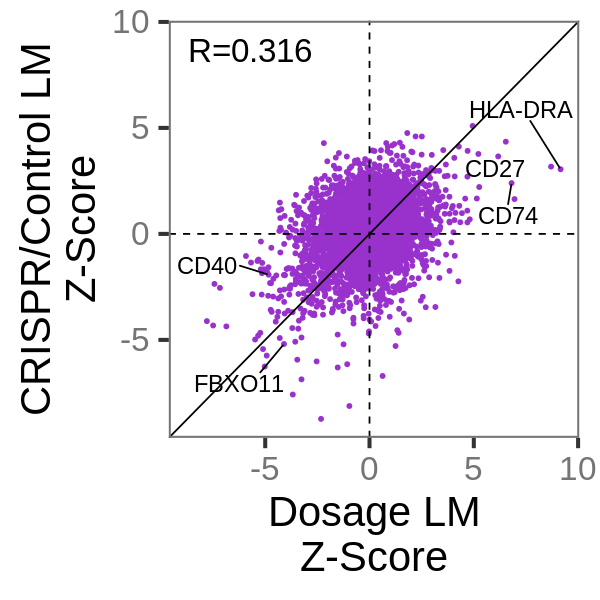

In [84]:
r = cor.test(comp[['z_Dosage']], comp[['z_Edited_Index']], method = 'pearson')$estimate
p = cor.test(comp[['z_Dosage']], comp[['z_Edited_Index']], method = 'pearson')$p.value

min = comp[c('z_Dosage', 'z_Edited_Index')] %>% na.omit %>% min
max = comp[c('z_Dosage', 'z_Edited_Index')] %>% na.omit %>% max

fig.size(5, 5)
ggplot(comp, aes(x=`z_Dosage`, y =`z_Edited_Index`))+
    geom_point(color ='darkorchid', size = 1)+
    theme_clean(base_size = 25)+
    geom_abline(slope = 1, intercept = 0)+
    geom_vline(xintercept = 0, linetype = 'dashed')+
    geom_hline(yintercept = 0, linetype = 'dashed')+
    geom_text_repel(aes(label = label), size = 5, max.overlaps = Inf, force = 30) +
    annotate('text', x = min+3, y = max-0.5, label = paste0('R=', round(r, 3)), size = 7)+
    xlim(min, max)+
    ylim(min, max)+
    xlab('Dosage LM\nZ-Score')+
    ylab('CRISPR/Control LM\nZ-Score')

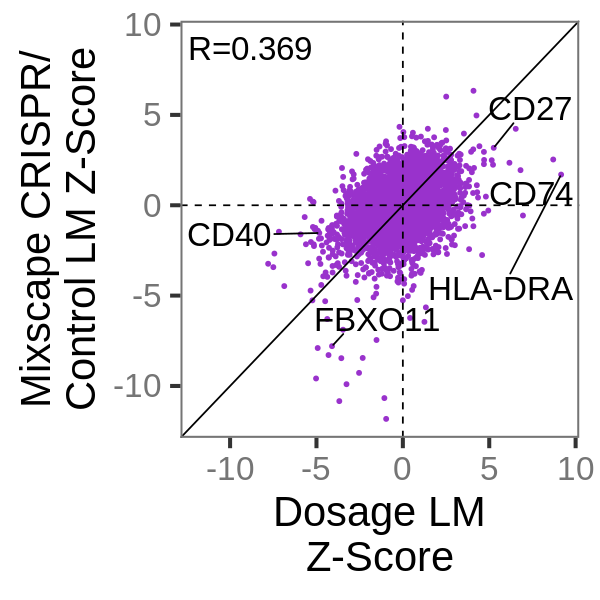

In [85]:
r = cor.test(comp[['z_Dosage']], comp[['z_MixscapeControlCrispr']], method = 'pearson')$estimate
p = cor.test(comp[['z_Dosage']], comp[['z_MixscapeControlCrispr']], method = 'pearson')$p.value

min = comp[c('z_Dosage', 'z_MixscapeControlCrispr')] %>% na.omit %>% min
max = comp[c('z_Dosage', 'z_MixscapeControlCrispr')] %>% na.omit %>% max

fig.size(5, 5)
p1 = ggplot(comp, aes(x=`z_Dosage`, y =`z_MixscapeControlCrispr`))+
    geom_point(color ='darkorchid', size = 1)+
    theme_clean(base_size = 25)+
    geom_abline(slope = 1, intercept = 0)+
    geom_vline(xintercept = 0, linetype = 'dashed')+
    geom_hline(yintercept = 0, linetype = 'dashed')+
    geom_text_repel(aes(label = label), size = 7, max.overlaps = Inf, force = 50,  seed = 123) +
    annotate('text', x = min+3, y = max-0.5, label = paste0('R=', round(r, 3)), size = 7)+
    xlim(min, max)+
    ylim(min, max)+
    xlab('Dosage LM\nZ-Score')+
    ylab('Mixscape CRISPR/\nControl LM Z-Score')
p1

In [132]:
comp %>% head(2)

Genes pval_Dosage beta_Dosage se_Dosage  z_Dosage  name_Dosage padj_Dosage
1 AAAS  0.6305764   0.026821686 0.05525806 0.4853895 Dosage      0.8748677  
2 AAMDC 0.9134042   0.008712931 0.07926972 0.1099150 Dosage      0.9778188  
  pval_Edited_Index beta_Edited_Index se_Edited_Index ⋯
1 0.2401536          0.15981028       0.1360481       ⋯
2 0.7034368         -0.07434161       0.1913007       ⋯
  name_MixscapeDosage0Dosage12 padj_MixscapeDosage0Dosage12
1 Mixscape_ClassNP             0.6921255                   
2 Mixscape_ClassNP             0.7970146                   
  pval_MixscapeDosage01Dosage2 beta_MixscapeDosage01Dosage2
1 0.3286504                    -0.104251841                
2 0.9933782                    -0.001332587                
  se_MixscapeDosage01Dosage2 z_MixscapeDosage01Dosage2
1 0.1069248                  -0.97500128              
2 0.1574185                  -0.00846525              
  name_MixscapeDosage01Dosage2 padj_MixscapeDosage01Dosage2 Dosage_Enriched
1 Mixscape_ClassNP             0.6288841                    NS             
2 Mixscape_ClassNP             0.9982260                    NS             
  label
1      
2

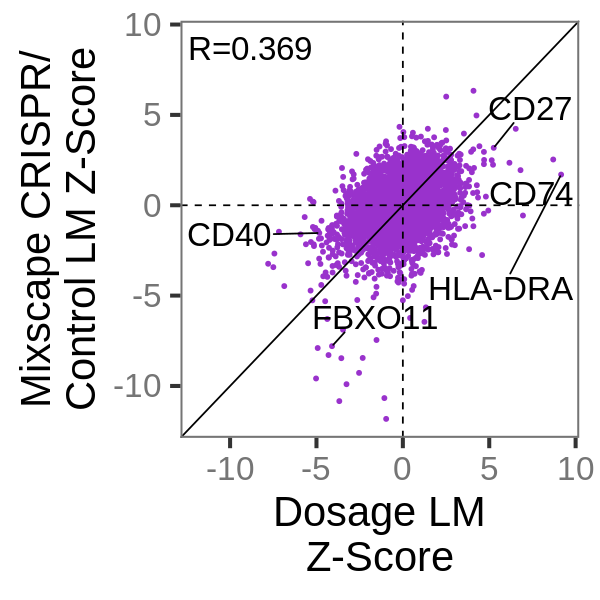

In [140]:
r = cor.test(comp[['z_Dosage']], comp[['z_MixscapeControlCrispr']], method = 'pearson')$estimate
p = cor.test(comp[['z_Dosage']], comp[['z_MixscapeControlCrispr']], method = 'pearson')$p.value

min = comp[c('z_Dosage', 'z_MixscapeControlCrispr')] %>% na.omit %>% min
max = comp[c('z_Dosage', 'z_MixscapeControlCrispr')] %>% na.omit %>% max

fig.size(5, 5)
p1 = ggplot(comp, aes(x=`z_Dosage`, y =`z_MixscapeControlCrispr`))+
    geom_point(color ='darkorchid', size = 1)+
    theme_clean(base_size = 25)+
    geom_abline(slope = 1, intercept = 0)+
    geom_vline(xintercept = 0, linetype = 'dashed')+
    geom_hline(yintercept = 0, linetype = 'dashed')+
    geom_text_repel(aes(label = label), size = 7, max.overlaps = Inf, force = 50,  seed = 123) +
    annotate('text', x = min+3, y = max-0.5, label = paste0('R=', round(r, 3)), size = 7)+
    xlim(min, max)+
    ylim(min, max)+
    xlab('Dosage LM\nZ-Score')+
    ylab('Mixscape CRISPR/\nControl LM Z-Score')
p1

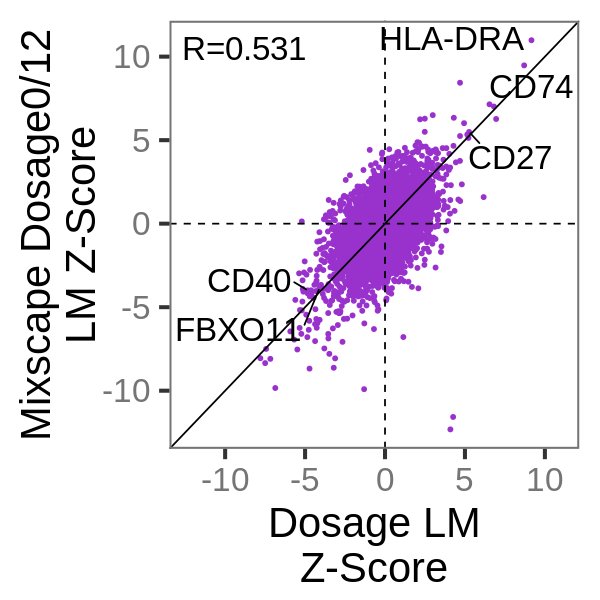

In [86]:
r = cor.test(comp[['z_Dosage']], comp[['z_MixscapeDosage0Dosage12']], method = 'pearson')$estimate
p = cor.test(comp[['z_Dosage']], comp[['z_MixscapeDosage0Dosage12']], method = 'pearson')$p.value

min = comp[c('z_Dosage', 'z_MixscapeDosage0Dosage12')] %>% na.omit %>% min
max = comp[c('z_Dosage', 'z_MixscapeDosage0Dosage12')] %>% na.omit %>% max

fig.size(5, 5)
p2 = ggplot(comp, aes(x=`z_Dosage`, y =`z_MixscapeDosage0Dosage12`))+
    geom_point(color ='darkorchid', size = 1)+
    theme_clean(base_size = 25)+
    geom_abline(slope = 1, intercept = 0)+
    geom_vline(xintercept = 0, linetype = 'dashed')+
    geom_hline(yintercept = 0, linetype = 'dashed')+
    geom_text_repel(aes(label = label), size = 7, max.overlaps = Inf, force = 50, seed = 123) +
    annotate('text', x = min+3.5, y = max-0.5, label = paste0('R=', round(r, 3)), size = 7)+
    xlim(min, max)+
    ylim(min, max)+
    xlab('Dosage LM\nZ-Score')+
    ylab('Mixscape Dosage0/12\nLM Z-Score')
p2

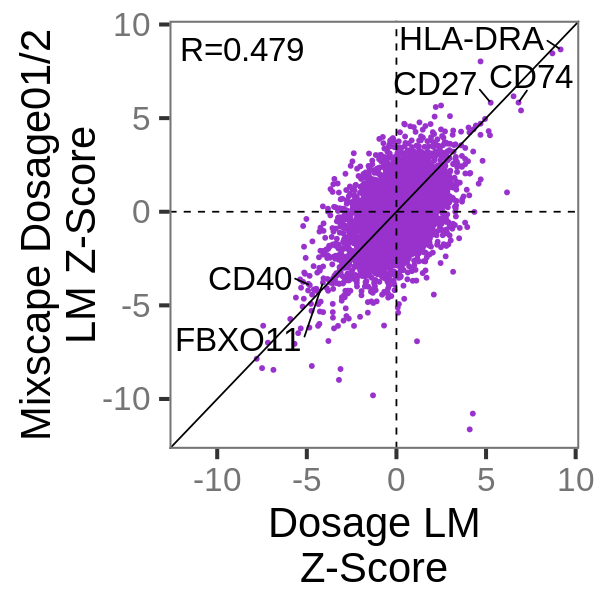

In [87]:
r = cor.test(comp[['z_Dosage']], comp[['z_MixscapeDosage01Dosage2']], method = 'pearson')$estimate
p = cor.test(comp[['z_Dosage']], comp[['z_MixscapeDosage01Dosage2']], method = 'pearson')$p.value

min = comp[c('z_Dosage', 'z_MixscapeDosage01Dosage2')] %>% na.omit %>% min
max = comp[c('z_Dosage', 'z_MixscapeDosage01Dosage2')] %>% na.omit %>% max

fig.size(5, 5)
p3 = ggplot(comp, aes(x=`z_Dosage`, y =`z_MixscapeDosage01Dosage2`))+
    geom_point(color ='darkorchid', size = 1)+
    theme_clean(base_size = 25)+
    geom_abline(slope = 1, intercept = 0)+
    geom_vline(xintercept = 0, linetype = 'dashed')+
    geom_hline(yintercept = 0, linetype = 'dashed')+
    geom_text_repel(aes(label = label), size = 7, max.overlaps = Inf, force = 50, seed = 123) +
    annotate('text', x = min+3, y = max-0.5, label = paste0('R=', round(r, 3)), size = 7)+
    xlim(min, max)+
    ylim(min, max)+
    xlab('Dosage LM\nZ-Score')+
    ylab('Mixscape Dosage01/2\nLM Z-Score')
p3

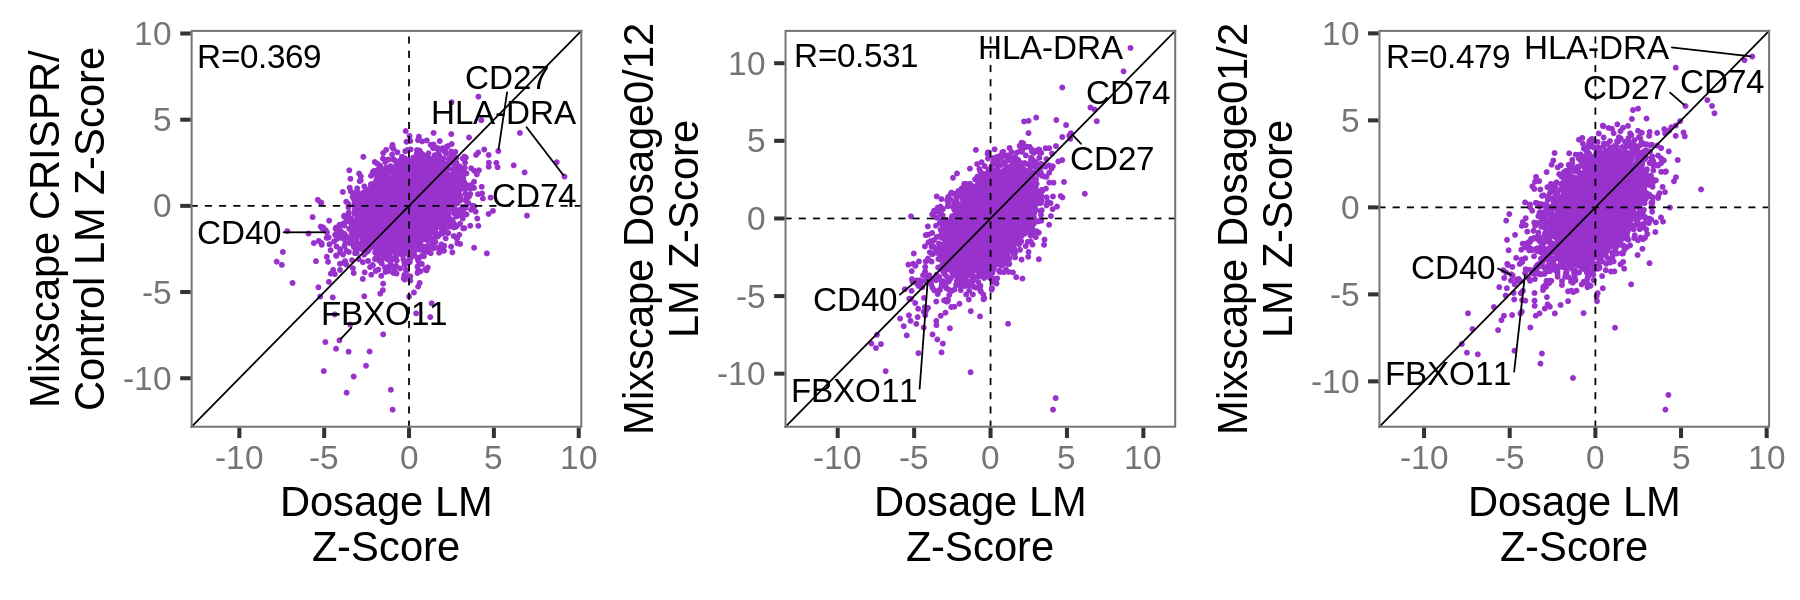

In [951]:
# pdf(file = '../Figures/Mixscape_FBXO11Daudi_ScatterPlot_DGEZScores.pdf',  height = 5, width = 15)
fig.size(5, 15)
p1 + p2 + p3 + plot_layout(ncol = 3)
# dev.off()

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_text()`).”


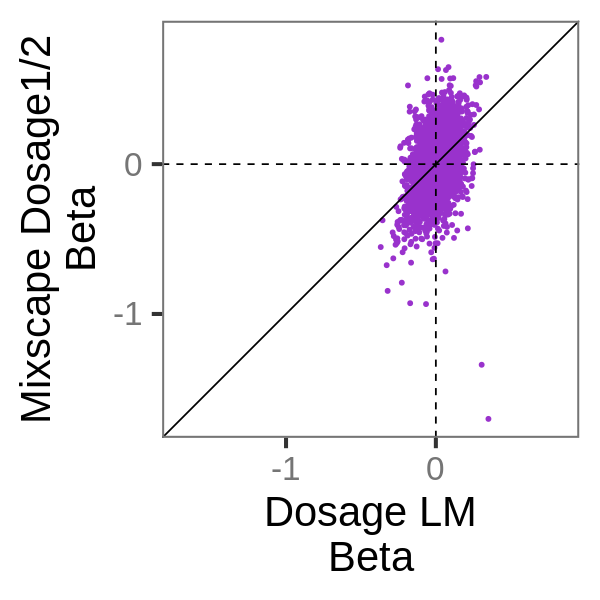

In [260]:
r = cor.test(FBXO11_comp[['beta_Dosage']], FBXO11_comp[['beta_MixscapeDosage01Dosage2']], method = 'pearson')$estimate
p = cor.test(FBXO11_comp[['beta_Dosage']], FBXO11_comp[['beta_MixscapeDosage01Dosage2']], method = 'pearson')$p.value

min = FBXO11_comp[c('beta_Dosage', 'beta_MixscapeDosage01Dosage2')] %>% na.omit %>% min
max = FBXO11_comp[c('beta_Dosage', 'beta_MixscapeDosage01Dosage2')] %>% na.omit %>% max

fig.size(5, 5)
ggplot(FBXO11_comp)+
    geom_point(aes(x=`beta_Dosage`, y =`beta_MixscapeDosage01Dosage2`), color ='darkorchid', size = 1)+
    theme_clean(base_size = 25)+
    geom_abline(slope = 1, intercept = 0)+
    geom_vline(xintercept = 0, linetype = 'dashed')+
    geom_hline(yintercept = 0, linetype = 'dashed')+

    annotate('text', x = min+3, y = max-0.5, label = paste0('R=', round(r, 3)), size = 7)+
    xlim(min, max)+
    ylim(min, max)+
    xlab('Dosage LM\nBeta')+
    ylab('Mixscape Dosage1/2\nBeta')

In [327]:
df = FBXO11_comp %>% filter(padj_Dosage < 0.05) %>% arrange(padj_Dosage)
df[match('FBXO11',df$Genes),]
df[match('HLA-DRA',df$Genes),]
df[match('HLA-DRB1',df$Genes),]
df[match('CD74',df$Genes),]
df[match('CD40',df$Genes),]
df[match('CD27',df$Genes),]
FBXO11_comp %>% filter(padj_Dosage < 0.05, beta_Dosage > 0) %>% arrange(padj_Dosage) %>% head (60)
FBXO11_comp %>% filter(padj_Dosage < 0.05, beta_Dosage < 0) %>% arrange(padj_Dosage) %>% head (60)

Genes  pval_Dosage  beta_Dosage se_Dosage  z_Dosage  name_Dosage padj_Dosage
71 FBXO11 3.585237e-05 -0.2602315  0.06346044 -4.100688 Dosage      0.002410693
   pval_Edited_Index beta_Edited_Index se_Edited_Index ⋯
71 7.921264e-08      -0.7404471        0.1425489       ⋯
   z_MixscapeDosage0Dosage12 name_MixscapeDosage0Dosage12
71 -3.860418                 Mixscape_ClassNP            
   padj_MixscapeDosage0Dosage12 pval_MixscapeDosage01Dosage2
71 0.003013266                  0.0001613027                
   beta_MixscapeDosage01Dosage2 se_MixscapeDosage01Dosage2
71 -0.5269033                   0.1394127                 
   z_MixscapeDosage01Dosage2 name_MixscapeDosage01Dosage2
71 -3.77945                  Mixscape_ClassNP            
   padj_MixscapeDosage01Dosage2 Dosage_Enriched
71 0.004993003                  Low

Genes   pval_Dosage beta_Dosage se_Dosage  z_Dosage name_Dosage padj_Dosage
1 HLA-DRA 0           0.2160193   0.02358129 9.160619 Dosage      0          
  pval_Edited_Index beta_Edited_Index se_Edited_Index ⋯
1 0.002940389       0.1810528         0.05936915      ⋯
  z_MixscapeDosage0Dosage12 name_MixscapeDosage0Dosage12
1 10.9839                   Mixscape_ClassNP            
  padj_MixscapeDosage0Dosage12 pval_MixscapeDosage01Dosage2
1 0                            3.330669e-16                
  beta_MixscapeDosage01Dosage2 se_MixscapeDosage01Dosage2
1 0.393161                     0.04536178                
  z_MixscapeDosage01Dosage2 name_MixscapeDosage01Dosage2
1 8.667229                  Mixscape_ClassNP            
  padj_MixscapeDosage01Dosage2 Dosage_Enriched
1 1.752672e-13                 High

Genes    pval_Dosage  beta_Dosage se_Dosage  z_Dosage name_Dosage
36 HLA-DRB1 1.172815e-06 0.1275475   0.02579719 4.94424  Dosage     
   padj_Dosage  pval_Edited_Index beta_Edited_Index se_Edited_Index ⋯
36 0.0001555284 8.299799e-07      0.3247442         0.06375993      ⋯
   z_MixscapeDosage0Dosage12 name_MixscapeDosage0Dosage12
36 6.016583                  Mixscape_ClassNP            
   padj_MixscapeDosage0Dosage12 pval_MixscapeDosage01Dosage2
36 6.132788e-07                 1.189832e-06                
   beta_MixscapeDosage01Dosage2 se_MixscapeDosage01Dosage2
36 0.247891                     0.05003448                
   z_MixscapeDosage01Dosage2 name_MixscapeDosage01Dosage2
36 4.954404                  Mixscape_ClassNP            
   padj_MixscapeDosage01Dosage2 Dosage_Enriched
36 9.886046e-05                 High

Genes pval_Dosage  beta_Dosage se_Dosage  z_Dosage name_Dosage padj_Dosage 
9 CD74  3.727108e-11 0.1143812   0.01679483 6.810501 Dosage      1.977023e-08
  pval_Edited_Index beta_Edited_Index se_Edited_Index ⋯
9 0.01820335        0.09999047        0.04171912      ⋯
  z_MixscapeDosage0Dosage12 name_MixscapeDosage0Dosage12
9 7.014732                  Mixscape_ClassNP            
  padj_MixscapeDosage0Dosage12 pval_MixscapeDosage01Dosage2
9 2.144113e-09                 1.391215e-08                
  beta_MixscapeDosage01Dosage2 se_MixscapeDosage01Dosage2
9 0.200934                     0.03446438                
  z_MixscapeDosage01Dosage2 name_MixscapeDosage01Dosage2
9 5.830192                  Mixscape_ClassNP            
  padj_MixscapeDosage01Dosage2 Dosage_Enriched
9 1.981745e-06                 High

Genes pval_Dosage  beta_Dosage se_Dosage  z_Dosage  name_Dosage padj_Dosage 
35 CD40  9.651561e-07 -0.2491311  0.05152954 -4.834724 Dosage      0.0001316473
   pval_Edited_Index beta_Edited_Index se_Edited_Index ⋯
35 0.0490497         -0.2415736        0.125334        ⋯
   z_MixscapeDosage0Dosage12 name_MixscapeDosage0Dosage12
35 -3.992552                 Mixscape_ClassNP            
   padj_MixscapeDosage0Dosage12 pval_MixscapeDosage01Dosage2
35 0.001556732                  6.718055e-05                
   beta_MixscapeDosage01Dosage2 se_MixscapeDosage01Dosage2
35 -0.4182372                   0.1067677                 
   z_MixscapeDosage01Dosage2 name_MixscapeDosage01Dosage2
35 -3.917262                 Mixscape_ClassNP            
   padj_MixscapeDosage01Dosage2 Dosage_Enriched
35 0.002607927                  Low

Genes pval_Dosage  beta_Dosage se_Dosage  z_Dosage name_Dosage padj_Dosage 
25 CD27  2.723726e-07 0.2049228   0.03896164 5.259603 Dosage      5.182098e-05
   pval_Edited_Index beta_Edited_Index se_Edited_Index ⋯
25 0.02973009        0.2119586         0.09586916      ⋯
   z_MixscapeDosage0Dosage12 name_MixscapeDosage0Dosage12
25 5.491569                  Mixscape_ClassNP            
   padj_MixscapeDosage0Dosage12 pval_MixscapeDosage01Dosage2
25 6.569868e-06                 1.422706e-08                
   beta_MixscapeDosage01Dosage2 se_MixscapeDosage01Dosage2
25 0.4348131                    0.07468797                
   z_MixscapeDosage01Dosage2 name_MixscapeDosage01Dosage2
25 5.821729                  Mixscape_ClassNP            
   padj_MixscapeDosage01Dosage2 Dosage_Enriched
25 1.981745e-06                 High

Genes      pval_Dosage  beta_Dosage se_Dosage   z_Dosage name_Dosage
1  HLA-DRA    0.000000e+00 0.21601925  0.023581294 9.160619 Dosage     
2  HLA-DPB1   1.110223e-16 0.29509302  0.033904549 8.703641 Dosage     
3  HLA-DPA1   1.777467e-11 0.18351037  0.026396926 6.951960 Dosage     
4  CD74       3.727108e-11 0.11438123  0.016794834 6.810501 Dosage     
5  ABHD3      1.822625e-10 0.33631800  0.051469135 6.534363 Dosage     
6  LCK        2.827421e-09 0.26142654  0.042374925 6.169369 Dosage     
7  CD27       2.723726e-07 0.20492276  0.038961644 5.259603 Dosage     
8  RPL19      3.701711e-07 0.04919127  0.009561357 5.144800 Dosage     
9  STIM2      5.540981e-07 0.20502796  0.039286760 5.218754 Dosage     
10 HLA-DRB1   1.172815e-06 0.12754750  0.025797189 4.944240 Dosage     
11 ALKBH7     2.696972e-06 0.18183214  0.037834078 4.806041 Dosage     
12 TSTD1      3.193283e-06 0.20470488  0.043526231 4.703023 Dosage     
13 B4GALT3    3.542774e-06 0.21039442  0.044868823 4.689100 Dosage     
14 MALAT1     4.483712e-06 0.11682349  0.024894300 4.692781 Dosage     
15 IGLV10-54  4.816479e-06 0.27046540  0.057634513 4.692768 Dosage     
16 RABAC1     6.368805e-06 0.12439272  0.027116766 4.587299 Dosage     
17 ZDHHC4     2.025847e-05 0.25153636  0.057806144 4.351378 Dosage     
18 IFNG-AS1   2.110941e-05 0.29116851  0.065698199 4.431910 Dosage     
19 HLA-DQB1   2.681882e-05 0.15005191  0.034867825 4.303449 Dosage     
20 FAM241A    3.211679e-05 0.23305839  0.054422492 4.282391 Dosage     
21 TERF2IP    6.045286e-05 0.16337218  0.039649368 4.120423 Dosage     
22 SMARCA4    6.472044e-05 0.11149319  0.027304417 4.083339 Dosage     
23 TRBC1      6.797652e-05 0.30576764  0.071755706 4.261231 Dosage     
24 RPS4X      7.042837e-05 0.04967625  0.012351594 4.021850 Dosage     
25 MTF2       7.759953e-05 0.16485382  0.040560443 4.064399 Dosage     
26 LCMT1      8.598354e-05 0.22789107  0.057049988 3.994586 Dosage     
27 MSI2       1.032708e-04 0.26578511  0.065220260 4.075192 Dosage     
28 GSTP1      1.149865e-04 0.15892880  0.040224094 3.951085 Dosage     
29 SUGP2      1.197131e-04 0.18815403  0.047954560 3.923590 Dosage     
30 RPS15A     1.414391e-04 0.04755469  0.012386084 3.839365 Dosage     
31 CD3D       1.545465e-04 0.35092050  0.085827328 4.088680 Dosage     
32 COX4I1     1.518307e-04 0.05229894  0.013605144 3.844056 Dosage     
33 SEC11C     1.748851e-04 0.15670069  0.040863867 3.834700 Dosage     
34 GNPTAB     1.826985e-04 0.21721376  0.056674231 3.832672 Dosage     
35 CCM2       1.879394e-04 0.19670948  0.051343949 3.831211 Dosage     
36 RBIS       2.753851e-04 0.29313503  0.079877718 3.669797 Dosage     
37 ICAM2      2.855183e-04 0.14640038  0.039101461 3.744115 Dosage     
38 COX6A1     2.936613e-04 0.06171080  0.016860147 3.660158 Dosage     
39 NDUFA13    2.978285e-04 0.07754597  0.021189596 3.659625 Dosage     
40 TFDP2      3.236218e-04 0.15539366  0.042524366 3.654226 Dosage     
41 RPS14      3.438604e-04 0.03646016  0.010105972 3.607784 Dosage     
42 RELB       4.270558e-04 0.12997318  0.036043353 3.606023 Dosage     
43 CSGALNACT2 4.654023e-04 0.28851997  0.079608206 3.624249 Dosage     
44 AP2S1      5.046060e-04 0.12327138  0.035232974 3.498750 Dosage     
45 SARNP      5.094945e-04 0.14566593  0.041243446 3.531857 Dosage     
46 LTB        5.297767e-04 0.10248478  0.028993989 3.534691 Dosage     
47 RPL4       7.446022e-04 0.03788442  0.011121962 3.406271 Dosage     
48 PFDN5      8.046306e-04 0.05966445  0.017618743 3.386419 Dosage     
49 VCPKMT     8.559588e-04 0.26978264  0.079963671 3.373815 Dosage     
50 DDX24      9.069468e-04 0.10738903  0.032081026 3.347431 Dosage     
51 KHDC4      9.192244e-04 0.21323762  0.063054517 3.381798 Dosage     
52 RACK1      9.674123e-04 0.03639743  0.010926427 3.331137 Dosage     
53 RPS25      9.960778e-04 0.03736444  0.011267287 3.316188 Dosage     
54 C18orf32   1.034497e-03 0.26005972  0.077585462 3.351913 Dosage     
55 ECH1       1.033264e-03 0.12390343  0.03

Genes    pval_Dosage  beta_Dosage se_Dosage  z_Dosage  name_Dosage
1  MPST     4.996004e-15 -0.32823859 0.04209843 -7.796931 Dosage     
2  GGCT     6.983303e-14 -0.28406086 0.03788993 -7.497001 Dosage     
3  MDH2     1.221245e-13 -0.18480651 0.02485598 -7.435092 Dosage     
4  TAGLN2   1.276756e-12 -0.19284427 0.02688719 -7.172349 Dosage     
5  TPI1     3.269163e-12 -0.17537347 0.02555033 -6.863842 Dosage     
6  PDCD5    2.536953e-09 -0.19902679 0.03359963 -5.923481 Dosage     
7  PKM      9.547619e-09 -0.11627615 0.02046663 -5.681256 Dosage     
8  LSP1     3.621803e-08 -0.28075909 0.05004489 -5.610145 Dosage     
9  PSME1    3.481728e-08 -0.13636007 0.02486615 -5.483764 Dosage     
10 TUBA4A   5.167811e-08 -0.21111885 0.03927826 -5.374954 Dosage     
11 CHCHD10  6.144406e-08 -0.15570695 0.02915590 -5.340495 Dosage     
12 CIAO1    7.842126e-08 -0.23882365 0.04488379 -5.320934 Dosage     
13 MIF      1.531125e-07 -0.08977507 0.01714933 -5.234903 Dosage     
14 POLD4    1.504247e-07 -0.17431636 0.03372900 -5.168145 Dosage     
15 TMSB10   1.843324e-07 -0.08187513 0.01571476 -5.210078 Dosage     
16 HSBP1    1.983876e-07 -0.19811713 0.03841850 -5.156816 Dosage     
17 COMMD6   2.135525e-07 -0.10899535 0.02093834 -5.205539 Dosage     
18 ATP5PB   2.809990e-07 -0.12619654 0.02453191 -5.144179 Dosage     
19 LAPTM5   2.822257e-07 -0.13475322 0.02639194 -5.105847 Dosage     
20 SSR2     5.261673e-07 -0.13614360 0.02709982 -5.023782 Dosage     
21 WARS     5.838475e-07 -0.24422262 0.04955160 -4.928653 Dosage     
22 SCMH1    6.690523e-07 -0.35582688 0.07026246 -5.064253 Dosage     
23 COMTD1   8.533834e-07 -0.32178850 0.06623616 -4.858200 Dosage     
24 BTF3     9.272029e-07 -0.06415808 0.01305989 -4.912607 Dosage     
25 LAT2     9.362909e-07 -0.36787267 0.07594531 -4.843916 Dosage     
26 CD40     9.651561e-07 -0.24913106 0.05152954 -4.834724 Dosage     
27 PSME2    1.423855e-06 -0.12708079 0.02664429 -4.769531 Dosage     
28 PSMB10   1.648643e-06 -0.22723225 0.04812570 -4.721641 Dosage     
29 AK2      1.927937e-06 -0.14099993 0.02976275 -4.737462 Dosage     
30 DOK3     2.060410e-06 -0.25462694 0.05409499 -4.707033 Dosage     
31 SLC44A2  2.507803e-06 -0.20676247 0.04410293 -4.688180 Dosage     
32 MEF2B    3.299045e-06 -0.13457390 0.02911630 -4.621944 Dosage     
33 PSMB8    3.770463e-06 -0.11559086 0.02508083 -4.608734 Dosage     
34 CTSH     4.016607e-06 -0.25697488 0.05716047 -4.495675 Dosage     
35 MPC1     6.132558e-06 -0.26588453 0.05947972 -4.470171 Dosage     
36 EDF1     8.577622e-06 -0.11056426 0.02503480 -4.416423 Dosage     
37 ENO1     1.038682e-05 -0.09881300 0.02259794 -4.372654 Dosage     
38 SHMT2    1.065482e-05 -0.12157936 0.02778644 -4.375492 Dosage     
39 PPP1CA   1.195787e-05 -0.13224974 0.03038945 -4.351831 Dosage     
40 ANP32E   1.442199e-05 -0.17041734 0.03967295 -4.295555 Dosage     
41 CYC1     1.455790e-05 -0.12360277 0.02875879 -4.297912 Dosage     
42 FARSA    1.518667e-05 -0.17405539 0.04066910 -4.279794 Dosage     
43 MZB1     1.532072e-05 -0.12335502 0.02867361 -4.302040 Dosage     
44 MZT2B    1.606220e-05 -0.10295247 0.02381762 -4.322534 Dosage     
45 MAGEF1   1.653403e-05 -0.23799420 0.05568853 -4.273666 Dosage     
46 PPIA     1.888188e-05 -0.05538066 0.01296366 -4.271993 Dosage     
47 SLC25A6  2.057660e-05 -0.06927630 0.01634477 -4.238439 Dosage     
48 PA2G4    2.187460e-05 -0.14508769 0.03431973 -4.227530 Dosage     
49 PSMA5    2.180087e-05 -0.13907998 0.03277988 -4.242846 Dosage     
50 CCDC112  3.408136e-05 -0.28833643 0.07046206 -4.092081 Dosage     
51 FBXO11   3.585237e-05 -0.26023145 0.06346044 -4.100688 Dosage     
52 ETFA     4.109895e-05 -0.15650035 0.03824464 -4.092085 Dosage     
53 IRF8     4.099530e-05 -0.14415047 0.03512809 -4.103567 Dosage     
54 PPP1R18  4.321592e-05 -0.20854148 0.05098851 -4.089970 Dosage     
55 RNASEH2B 4.502974e-05 -0.16740216 0.04124647 -4.058582 Dosage     
56 DDOST    4.658466e-05 -0.14747825 0.03625469 -4.067839 Dosage     
57 SND1     4

In [326]:
df = FBXO11_comp %>% filter(padj_MixscapeControlCrispr < 0.05) %>% arrange(padj_MixscapeControlCrispr)
df[match('FBXO11',df$Genes),]
df[match('HLA-DRA',df$Genes),]
df[match('HLA-DRB1',df$Genes),]
df[match('CD74',df$Genes),]
df[match('CD40',df$Genes),]
df[match('CD27',df$Genes),]
FBXO11_comp %>% filter(padj_MixscapeControlCrispr < 0.05, beta_MixscapeControlCrispr > 0) %>% arrange(padj_MixscapeControlCrispr) %>% head (60)
FBXO11_comp %>% filter(padj_MixscapeControlCrispr < 0.05, beta_MixscapeControlCrispr < 0) %>% arrange(padj_MixscapeControlCrispr) %>% head (60)

Genes  pval_Dosage  beta_Dosage se_Dosage  z_Dosage  name_Dosage padj_Dosage
11 FBXO11 3.585237e-05 -0.2602315  0.06346044 -4.100688 Dosage      0.002410693
   pval_Edited_Index beta_Edited_Index se_Edited_Index ⋯
11 7.921264e-08      -0.7404471        0.1425489       ⋯
   z_MixscapeDosage0Dosage12 name_MixscapeDosage0Dosage12
11 -3.860418                 Mixscape_ClassNP            
   padj_MixscapeDosage0Dosage12 pval_MixscapeDosage01Dosage2
11 0.003013266                  0.0001613027                
   beta_MixscapeDosage01Dosage2 se_MixscapeDosage01Dosage2
11 -0.5269033                   0.1394127                 
   z_MixscapeDosage01Dosage2 name_MixscapeDosage01Dosage2
11 -3.77945                  Mixscape_ClassNP            
   padj_MixscapeDosage01Dosage2 Dosage_Enriched
11 0.004993003                  Low

Genes pval_Dosage beta_Dosage se_Dosage z_Dosage name_Dosage padj_Dosage
NA NA    NA          NA          NA        NA       NA          NA         
   pval_Edited_Index beta_Edited_Index se_Edited_Index ⋯
NA NA                NA                NA              ⋯
   z_MixscapeDosage0Dosage12 name_MixscapeDosage0Dosage12
NA NA                        NA                          
   padj_MixscapeDosage0Dosage12 pval_MixscapeDosage01Dosage2
NA NA                           NA                          
   beta_MixscapeDosage01Dosage2 se_MixscapeDosage01Dosage2
NA NA                           NA                        
   z_MixscapeDosage01Dosage2 name_MixscapeDosage01Dosage2
NA NA                        NA                          
   padj_MixscapeDosage01Dosage2 Dosage_Enriched
NA NA                           NA

Genes pval_Dosage beta_Dosage se_Dosage z_Dosage name_Dosage padj_Dosage
NA NA    NA          NA          NA        NA       NA          NA         
   pval_Edited_Index beta_Edited_Index se_Edited_Index ⋯
NA NA                NA                NA              ⋯
   z_MixscapeDosage0Dosage12 name_MixscapeDosage0Dosage12
NA NA                        NA                          
   padj_MixscapeDosage0Dosage12 pval_MixscapeDosage01Dosage2
NA NA                           NA                          
   beta_MixscapeDosage01Dosage2 se_MixscapeDosage01Dosage2
NA NA                           NA                        
   z_MixscapeDosage01Dosage2 name_MixscapeDosage01Dosage2
NA NA                        NA                          
   padj_MixscapeDosage01Dosage2 Dosage_Enriched
NA NA                           NA

Genes pval_Dosage beta_Dosage se_Dosage z_Dosage name_Dosage padj_Dosage
NA NA    NA          NA          NA        NA       NA          NA         
   pval_Edited_Index beta_Edited_Index se_Edited_Index ⋯
NA NA                NA                NA              ⋯
   z_MixscapeDosage0Dosage12 name_MixscapeDosage0Dosage12
NA NA                        NA                          
   padj_MixscapeDosage0Dosage12 pval_MixscapeDosage01Dosage2
NA NA                           NA                          
   beta_MixscapeDosage01Dosage2 se_MixscapeDosage01Dosage2
NA NA                           NA                        
   z_MixscapeDosage01Dosage2 name_MixscapeDosage01Dosage2
NA NA                        NA                          
   padj_MixscapeDosage01Dosage2 Dosage_Enriched
NA NA                           NA

Genes pval_Dosage beta_Dosage se_Dosage z_Dosage name_Dosage padj_Dosage
NA NA    NA          NA          NA        NA       NA          NA         
   pval_Edited_Index beta_Edited_Index se_Edited_Index ⋯
NA NA                NA                NA              ⋯
   z_MixscapeDosage0Dosage12 name_MixscapeDosage0Dosage12
NA NA                        NA                          
   padj_MixscapeDosage0Dosage12 pval_MixscapeDosage01Dosage2
NA NA                           NA                          
   beta_MixscapeDosage01Dosage2 se_MixscapeDosage01Dosage2
NA NA                           NA                        
   z_MixscapeDosage01Dosage2 name_MixscapeDosage01Dosage2
NA NA                        NA                          
   padj_MixscapeDosage01Dosage2 Dosage_Enriched
NA NA                           NA

Genes pval_Dosage beta_Dosage se_Dosage z_Dosage name_Dosage padj_Dosage
NA NA    NA          NA          NA        NA       NA          NA         
   pval_Edited_Index beta_Edited_Index se_Edited_Index ⋯
NA NA                NA                NA              ⋯
   z_MixscapeDosage0Dosage12 name_MixscapeDosage0Dosage12
NA NA                        NA                          
   padj_MixscapeDosage0Dosage12 pval_MixscapeDosage01Dosage2
NA NA                           NA                          
   beta_MixscapeDosage01Dosage2 se_MixscapeDosage01Dosage2
NA NA                           NA                        
   z_MixscapeDosage01Dosage2 name_MixscapeDosage01Dosage2
NA NA                        NA                          
   padj_MixscapeDosage01Dosage2 Dosage_Enriched
NA NA                           NA

Genes      pval_Dosage  beta_Dosage  se_Dosage  z_Dosage    name_Dosage
1  HMGN1      1.243628e-02  0.057696809 0.02299526  2.50907386 Dosage     
2  CD3D       1.545465e-04  0.350920495 0.08582733  4.08868020 Dosage     
3  TRBC1      6.797652e-05  0.305767638 0.07175571  4.26123097 Dosage     
4  RPL37A     8.451371e-01 -0.003512955 0.01794073 -0.19580900 Dosage     
5  ABHD3      1.822625e-10  0.336317998 0.05146914  6.53436268 Dosage     
6  SAT1       1.544189e-01  0.073364080 0.05070298  1.44693815 Dosage     
7  BIRC3      1.408005e-02  0.089745586 0.03605074  2.48942404 Dosage     
8  ALKBH2     9.752028e-01  0.002280746 0.07333670  0.03109965 Dosage     
9  LINC01857  5.649213e-01  0.019895434 0.03418959  0.58191499 Dosage     
10 LTB        5.297767e-04  0.102484779 0.02899399  3.53469056 Dosage     
11 ANKH       5.985081e-01  0.025874411 0.04892317  0.52887845 Dosage     
12 DDX39B     2.982690e-01  0.052988797 0.05071608  1.04481250 Dosage     
13 SRSF5      7.086829e-02  0.044345432 0.02449551  1.81034969 Dosage     
14 RAD51B     9.345321e-01  0.004527444 0.05479184  0.08262989 Dosage     
15 UBE2G2     4.377524e-01  0.045284060 0.05835579  0.77599938 Dosage     
16 AC068587.4 8.810204e-01 -0.009109862 0.06014387 -0.15146783 Dosage     
17 HMCES      2.038106e-01  0.055660499 0.04369277  1.27390642 Dosage     
18 PNKD       1.442864e-02  0.108640196 0.04324260  2.51234209 Dosage     
19 MARCKSL1   3.295510e-01 -0.030536620 0.03144855 -0.97100244 Dosage     
20 MT-ATP8    1.547176e-01  0.070891069 0.04882873  1.45183120 Dosage     
21 CENPV      2.341354e-02  0.108764548 0.04758751  2.28556941 Dosage     
22 LSM8       2.735097e-02  0.076021176 0.03418815  2.22361175 Dosage     
23 SEC14L1    1.005269e-01  0.077141877 0.04620530  1.66954596 Dosage     
24 BASP1      3.170632e-01 -0.075917955 0.07589491 -1.00030369 Dosage     
25 NCKAP5     1.591183e-01  0.104700246 0.07371146  1.42040655 Dosage     
26 NKAIN2     4.830052e-02  0.106227491 0.05380494  1.97430727 Dosage     
27 GTF2H5     3.577715e-01 -0.049417247 0.05402239 -0.91475499 Dosage     
28 HDAC1      9.433637e-02  0.056990186 0.03372043  1.69007866 Dosage     
29 C9orf16    5.522717e-02  0.065921156 0.03392636  1.94306602 Dosage     
   padj_Dosage  pval_Edited_Index beta_Edited_Index se_Edited_Index ⋯
1  1.319151e-01 5.254378e-06       0.26259383       0.05715304      ⋯
2  7.233380e-03 3.169719e-01      -0.20502859       0.19788559      ⋯
3  3.986036e-03 3.148197e-02      -0.37874306       0.16918611      ⋯
4  9.591069e-01 3.031769e-01       0.04559603       0.04411228      ⋯
5  8.701214e-08 1.925747e-05       0.56361830       0.12958088      ⋯
6  5.093600e-01 5.060681e-01       0.08359287       0.12520347      ⋯
7  1.422273e-01 2.565950e-01       0.10037258       0.08680025      ⋯
8  9.952155e-01 2.536131e-01       0.21240492       0.18030520      ⋯
9  8.487488e-01 7.420228e-01       0.02805814       0.08425551      ⋯
10 1.806539e-02 1.451471e-04       0.28252190       0.07147043      ⋯
11 8.645487e-01 5.343511e-02       0.23646249       0.12287804      ⋯
12 6.750666e-01 2.584316e-01       0.13899851       0.12336811      ⋯
13 3.690960e-01 2.801416e-06       0.29385030       0.06175473      ⋯
14 9.818346e-01 2.097275e-01       0.17846980       0.13775277      ⋯
15 7.871300e-01 5.635837e-03       0.42735847       0.14987896      ⋯
16 9.706881e-01 2.129165e-01       0.19140476       0.15066626      ⋯
17 5.743590e-01 1.400358e-03       0.36091167       0.11039002      ⋯
18 1.444074e-01 6.420229e-03       0.30412255       0.10799855      ⋯
19 7.042419e-01 3.609394e-02       0.17166306       0.08051191      ⋯
20 5.097459e-01 1.597700e-01       0.16800284       0.11855145      ⋯
21 1.976884e-01 1.824558e-02       0.28787875       0.12034698      ⋯
22 2.205634e-01 2.847154e-01       0.08910473       0.08279557      ⋯
23 4.265913e-01 4.941416e-03       0.33638227       0.11730338      ⋯
24 6.974028e-01 2.617593e-02       0.46054001       0.19822362      ⋯
25 

Genes   pval_Dosage  beta_Dosage   se_Dosage  z_Dosage      name_Dosage
1  FKBP11  3.532428e-04 -1.394375e-01 0.03915895 -3.5608074847 Dosage     
2  HLA-A   1.141794e-03 -7.751370e-02 0.02376649 -3.2614701737 Dosage     
3  HLA-B   2.293248e-04 -6.277260e-02 0.01706644 -3.6781296787 Dosage     
4  HSP90B1 1.981719e-02 -1.357909e-01 0.05843755 -2.3236921658 Dosage     
5  P4HB    1.129305e-02 -7.973020e-02 0.03145248 -2.5349415037 Dosage     
6  PDIA6   3.324018e-01 -2.781585e-02 0.02878008 -0.9664967497 Dosage     
7  PPIB    2.839056e-01 -3.426973e-02 0.03204232 -1.0695146038 Dosage     
8  SSR2    5.261673e-07 -1.361436e-01 0.02709982 -5.0237817902 Dosage     
9  MZB1    1.532072e-05 -1.233550e-01 0.02867361 -4.3020396826 Dosage     
10 WARS    5.838475e-07 -2.442226e-01 0.04955160 -4.9286530127 Dosage     
11 FBXO11  3.585237e-05 -2.602315e-01 0.06346044 -4.1006878469 Dosage     
12 MYDGF   1.263923e-01 -5.914051e-02 0.03879114 -1.5245880817 Dosage     
13 HLA-C   5.467148e-04 -7.113891e-02 0.02054161 -3.4631604992 Dosage     
14 TRIB3   2.178280e-01  8.191069e-02 0.06556732  1.2492608710 Dosage     
15 SHMT2   1.065482e-05 -1.215794e-01 0.02778644 -4.3754923176 Dosage     
16 PDIA4   6.778231e-01  1.965759e-02 0.04694231  0.4187604908 Dosage     
17 CALR    1.865940e-01  4.191770e-02 0.03145431  1.3326536918 Dosage     
18 CTSH    4.016607e-06 -2.569749e-01 0.05716047 -4.4956745525 Dosage     
19 CDK2AP2 9.992395e-01  5.384362e-05 0.05596575  0.0009620816 Dosage     
20 MIF     1.531125e-07 -8.977507e-02 0.01714933 -5.2349033469 Dosage     
21 TMEM258 8.595226e-03 -5.492666e-02 0.02081813 -2.6384043364 Dosage     
22 SEC13   8.918133e-02 -6.256143e-02 0.03689211 -1.6957942871 Dosage     
23 CANX    7.726114e-01  8.904780e-03 0.03062255  0.2907916062 Dosage     
24 GARS    1.208162e-01 -4.665285e-02 0.03020092 -1.5447493718 Dosage     
25 CHCHD10 6.144406e-08 -1.557070e-01 0.02915590 -5.3404952623 Dosage     
26 TMED2   5.930299e-01  1.933077e-02 0.03608448  0.5357087075 Dosage     
27 TPI1    3.269163e-12 -1.753735e-01 0.02555033 -6.8638423434 Dosage     
28 PSMB10  1.648643e-06 -2.272323e-01 0.04812570 -4.7216406963 Dosage     
29 HSPA5   5.324679e-01  3.084408e-02 0.04919982  0.6269145678 Dosage     
30 SEC61A1 1.258264e-01 -8.078514e-02 0.05292233 -1.5264850505 Dosage     
31 SRP72   9.407142e-01  3.002574e-03 0.04003844  0.0749922802 Dosage     
32 SSR4    8.001068e-01 -6.130631e-03 0.02412511 -0.2541182447 Dosage     
33 TAP1    6.399702e-03 -1.453802e-01 0.05336545 -2.7242380786 Dosage     
34 LMAN2   7.558300e-01 -9.854335e-03 0.03158551 -0.3119890476 Dosage     
35 PDIA3   9.677907e-01 -1.736523e-03 0.04341886 -0.0399946753 Dosage     
36 LRPPRC  9.363553e-01  4.607924e-03 0.05743010  0.0802353471 Dosage     
37 MANF    7.787277e-01 -1.295095e-02 0.04625925 -0.2799646143 Dosage     
38 COPG1   1.034615e-01 -1.010381e-01 0.06183592 -1.6339711516 Dosage     
39 ENO1    1.038682e-05 -9.881300e-02 0.02259794 -4.3726544324 Dosage     
40 HLA-E   2.530939e-02 -8.142087e-02 0.03656916 -2.2264898775 Dosage     
41 PSMB8   3.770463e-06 -1.155909e-01 0.02508083 -4.6087339955 Dosage     
42 UBE2L6  1.086243e-03 -1.064270e-01 0.03264214 -3.2604173295 Dosage     
43 SLC35B1 4.652611e-01 -6.181639e-02 0.08384466 -0.7372728717 Dosage     
44 TMED9   3.535371e-01 -2.981502e-02 0.03230638 -0.9228832989 Dosage     
45 RPN1    6.193853e-01  1.912813e-02 0.03840234  0.4980980950 Dosage     
46 PYCR1   8.742397e-03 -1.101617e-01 0.04216687 -2.6125187658 Dosage     
47 ATP5MC2 2.262518e-01 -2.876455e-02 0.02371712 -1.2128178616 Dosage     
48 RBBP6   4.708870e-02 -1.491573e-01 0.07592909 -1.9644293919 Dosage     
49 RPL36AL 4.947505e-01  1.097981e-02 0.01609147  0.6823373964 Dosage     
50 SEC61G  1.659185e-01 -4.471466e-02 0.03223428 -1.3871773798 Dosage     
51 OSTC    5.950523e-01  1.668368e-02 0.03134838  0.5322023961 Dosage     
52 DNAJC3  4.898750e-02 -1.323079e-01 0.06770362 -1.9542217021 Dosage     
53 SEC61B  8.846359e-01 -3.5

In [328]:
df = FBXO11_comp %>% filter(padj_MixscapeDosage0Dosage12 < 0.05) %>% arrange(padj_MixscapeDosage0Dosage12)
df[match('FBXO11',df$Genes),]
df[match('HLA-DRA',df$Genes),]
df[match('HLA-DRB1',df$Genes),]
df[match('CD74',df$Genes),]
df[match('CD40',df$Genes),]
df[match('CD27',df$Genes),]
FBXO11_comp %>% filter(padj_MixscapeDosage0Dosage12 < 0.05, beta_MixscapeDosage0Dosage12 > 0) %>% arrange(padj_MixscapeDosage0Dosage12) %>% head (60)
FBXO11_comp %>% filter(padj_MixscapeDosage0Dosage12 < 0.05, beta_MixscapeDosage0Dosage12 < 0) %>% arrange(padj_MixscapeDosage0Dosage12) %>% head (60)

Genes  pval_Dosage  beta_Dosage se_Dosage  z_Dosage  name_Dosage
191 FBXO11 3.585237e-05 -0.2602315  0.06346044 -4.100688 Dosage     
    padj_Dosage pval_Edited_Index beta_Edited_Index se_Edited_Index ⋯
191 0.002410693 7.921264e-08      -0.7404471        0.1425489       ⋯
    z_MixscapeDosage0Dosage12 name_MixscapeDosage0Dosage12
191 -3.860418                 Mixscape_ClassNP            
    padj_MixscapeDosage0Dosage12 pval_MixscapeDosage01Dosage2
191 0.003013266                  0.0001613027                
    beta_MixscapeDosage01Dosage2 se_MixscapeDosage01Dosage2
191 -0.5269033                   0.1394127                 
    z_MixscapeDosage01Dosage2 name_MixscapeDosage01Dosage2
191 -3.77945                  Mixscape_ClassNP            
    padj_MixscapeDosage01Dosage2 Dosage_Enriched
191 0.004993003                  Low

Genes   pval_Dosage beta_Dosage se_Dosage  z_Dosage name_Dosage padj_Dosage
4 HLA-DRA 0           0.2160193   0.02358129 9.160619 Dosage      0          
  pval_Edited_Index beta_Edited_Index se_Edited_Index ⋯
4 0.002940389       0.1810528         0.05936915      ⋯
  z_MixscapeDosage0Dosage12 name_MixscapeDosage0Dosage12
4 10.9839                   Mixscape_ClassNP            
  padj_MixscapeDosage0Dosage12 pval_MixscapeDosage01Dosage2
4 0                            3.330669e-16                
  beta_MixscapeDosage01Dosage2 se_MixscapeDosage01Dosage2
4 0.393161                     0.04536178                
  z_MixscapeDosage01Dosage2 name_MixscapeDosage01Dosage2
4 8.667229                  Mixscape_ClassNP            
  padj_MixscapeDosage01Dosage2 Dosage_Enriched
4 1.752672e-13                 High

Genes    pval_Dosage  beta_Dosage se_Dosage  z_Dosage name_Dosage
44 HLA-DRB1 1.172815e-06 0.1275475   0.02579719 4.94424  Dosage     
   padj_Dosage  pval_Edited_Index beta_Edited_Index se_Edited_Index ⋯
44 0.0001555284 8.299799e-07      0.3247442         0.06375993      ⋯
   z_MixscapeDosage0Dosage12 name_MixscapeDosage0Dosage12
44 6.016583                  Mixscape_ClassNP            
   padj_MixscapeDosage0Dosage12 pval_MixscapeDosage01Dosage2
44 6.132788e-07                 1.189832e-06                
   beta_MixscapeDosage01Dosage2 se_MixscapeDosage01Dosage2
44 0.247891                     0.05003448                
   z_MixscapeDosage01Dosage2 name_MixscapeDosage01Dosage2
44 4.954404                  Mixscape_ClassNP            
   padj_MixscapeDosage01Dosage2 Dosage_Enriched
44 9.886046e-05                 High

Genes pval_Dosage  beta_Dosage se_Dosage  z_Dosage name_Dosage padj_Dosage 
24 CD74  3.727108e-11 0.1143812   0.01679483 6.810501 Dosage      1.977023e-08
   pval_Edited_Index beta_Edited_Index se_Edited_Index ⋯
24 0.01820335        0.09999047        0.04171912      ⋯
   z_MixscapeDosage0Dosage12 name_MixscapeDosage0Dosage12
24 7.014732                  Mixscape_ClassNP            
   padj_MixscapeDosage0Dosage12 pval_MixscapeDosage01Dosage2
24 2.144113e-09                 1.391215e-08                
   beta_MixscapeDosage01Dosage2 se_MixscapeDosage01Dosage2
24 0.200934                     0.03446438                
   z_MixscapeDosage01Dosage2 name_MixscapeDosage01Dosage2
24 5.830192                  Mixscape_ClassNP            
   padj_MixscapeDosage01Dosage2 Dosage_Enriched
24 1.981745e-06                 High

Genes pval_Dosage  beta_Dosage se_Dosage  z_Dosage  name_Dosage
165 CD40  9.651561e-07 -0.2491311  0.05152954 -4.834724 Dosage     
    padj_Dosage  pval_Edited_Index beta_Edited_Index se_Edited_Index ⋯
165 0.0001316473 0.0490497         -0.2415736        0.125334        ⋯
    z_MixscapeDosage0Dosage12 name_MixscapeDosage0Dosage12
165 -3.992552                 Mixscape_ClassNP            
    padj_MixscapeDosage0Dosage12 pval_MixscapeDosage01Dosage2
165 0.001556732                  6.718055e-05                
    beta_MixscapeDosage01Dosage2 se_MixscapeDosage01Dosage2
165 -0.4182372                   0.1067677                 
    z_MixscapeDosage01Dosage2 name_MixscapeDosage01Dosage2
165 -3.917262                 Mixscape_ClassNP            
    padj_MixscapeDosage01Dosage2 Dosage_Enriched
165 0.002607927                  Low

Genes pval_Dosage  beta_Dosage se_Dosage  z_Dosage name_Dosage padj_Dosage 
51 CD27  2.723726e-07 0.2049228   0.03896164 5.259603 Dosage      5.182098e-05
   pval_Edited_Index beta_Edited_Index se_Edited_Index ⋯
51 0.02973009        0.2119586         0.09586916      ⋯
   z_MixscapeDosage0Dosage12 name_MixscapeDosage0Dosage12
51 5.491569                  Mixscape_ClassNP            
   padj_MixscapeDosage0Dosage12 pval_MixscapeDosage01Dosage2
51 6.569868e-06                 1.422706e-08                
   beta_MixscapeDosage01Dosage2 se_MixscapeDosage01Dosage2
51 0.4348131                    0.07468797                
   z_MixscapeDosage01Dosage2 name_MixscapeDosage01Dosage2
51 5.821729                  Mixscape_ClassNP            
   padj_MixscapeDosage01Dosage2 Dosage_Enriched
51 1.981745e-06                 High

Genes     pval_Dosage  beta_Dosage  se_Dosage   z_Dosage   name_Dosage
1  HLA-DPB1  1.110223e-16  0.295093018 0.033904549  8.7036409 Dosage     
2  HLA-DRA   0.000000e+00  0.216019252 0.023581294  9.1606191 Dosage     
3  MALAT1    4.483712e-06  0.116823490 0.024894300  4.6927807 Dosage     
4  ABHD3     1.822625e-10  0.336317998 0.051469135  6.5343627 Dosage     
5  CD74      3.727108e-11  0.114381233 0.016794834  6.8105009 Dosage     
6  HLA-DMA   2.986386e-03  0.108750729 0.036414896  2.9864352 Dosage     
7  RPS27     2.836508e-02  0.033212888 0.015136775  2.1941851 Dosage     
8  HLA-DQB1  2.681882e-05  0.150051909 0.034867825  4.3034491 Dosage     
9  HLA-DPA1  1.777467e-11  0.183510373 0.026396926  6.9519598 Dosage     
10 BIRC3     1.408005e-02  0.089745586 0.036050743  2.4894240 Dosage     
11 HLA-DRB1  1.172815e-06  0.127547498 0.025797189  4.9442401 Dosage     
12 CD27      2.723726e-07  0.204922765 0.038961644  5.2596026 Dosage     
13 CD38      1.299790e-02  0.080458462 0.032362753  2.4861439 Dosage     
14 RPL19     3.701711e-07  0.049191268 0.009561357  5.1447998 Dosage     
15 IGLV10-54 4.816479e-06  0.270465397 0.057634513  4.6927680 Dosage     
16 STIM2     5.540981e-07  0.205027956 0.039286760  5.2187544 Dosage     
17 BLK       4.281183e-02  0.078928738 0.038912386  2.0283705 Dosage     
18 GIHCG     3.299460e-02  0.082776824 0.038847157  2.1308335 Dosage     
19 GAS5      5.916279e-02  0.034221616 0.017965889  1.9048106 Dosage     
20 RPL32     2.260188e-02  0.021647212 0.009474159  2.2848690 Dosage     
21 RPL13A    1.127973e-02  0.028502125 0.011186067  2.5480024 Dosage     
22 FAM241A   3.211679e-05  0.233058389 0.054422492  4.2823910 Dosage     
23 PNISR     2.023144e-02  0.068522127 0.029273783  2.3407336 Dosage     
24 RPS20     2.137631e-01  0.014562648 0.011726657  1.2418414 Dosage     
25 RPS14     3.438604e-04  0.036460164 0.010105972  3.6077841 Dosage     
26 RPS15A    1.414391e-04  0.047554695 0.012386084  3.8393647 Dosage     
27 RPS19     7.386167e-03  0.028063153 0.010410422  2.6956788 Dosage     
28 KIZ-AS1   1.462495e-03  0.043114674 0.013507947  3.1918006 Dosage     
29 LUC7L3    1.838791e-03  0.077984009 0.024622707  3.1671582 Dosage     
30 HLA-DMB   3.697285e-02  0.109781542 0.052224514  2.1021075 Dosage     
31 ARL15     7.929801e-01  0.014977017 0.056525715  0.2649594 Dosage     
32 RPS12     5.472450e-02  0.024030217 0.012438889  1.9318620 Dosage     
33 SNX6      4.008636e-01  0.009523630 0.011342392  0.8396491 Dosage     
34 HLA-DOB   3.213549e-03  0.157915977 0.052750070  2.9936638 Dosage     
35 AUTS2     3.368580e-01 -0.043840111 0.045823206 -0.9567229 Dosage     
36 CCDC85A   2.022197e-03  0.169883083 0.054166433  3.1363166 Dosage     
37 RPLP1     7.081241e-03  0.031012010 0.011445184  2.7096122 Dosage     
38 ARMC9     8.626775e-01 -0.002760982 0.015978571 -0.1727928 Dosage     
39 RPL34     1.409133e-03  0.034066314 0.010619244  3.2079792 Dosage     
40 UBXN1     4.000392e-02  0.055402965 0.026889589  2.0603872 Dosage     
41 RPS18     8.410730e-02  0.018781267 0.010847488  1.7313932 Dosage     
42 RPS25     9.960778e-04  0.037364440 0.011267287  3.3161877 Dosage     
43 NCOA3     1.755267e-01  0.092058959 0.067045489  1.3730821 Dosage     
44 DEPTOR    5.542834e-03  0.155760996 0.054870372  2.8387086 Dosage     
45 RPS4X     7.042837e-05  0.049676254 0.012351594  4.0218495 Dosage     
46 RPL37A    8.451371e-01 -0.003512955 0.017940725 -0.1958090 Dosage     
47 AICDA     4.462223e-01  0.040563794 0.052559139  0.7717743 Dosage     
48 SMG1      5.185940e-01  0.042918656 0.066200503  0.6483131 Dosage     
49 RBFOX2    2.610892e-01  0.013110860 0.011632392  1.1270992 Dosage     
50 RAPGEF2   2.275073e-01  0.116392679 0.085975814  1.3537840 Dosage     
51 TPCN1     2.105317e-01  0.099671665 0.079997448  1.2459356 Dosage     
52 CENPC     2.282045e-02  0.108350355 0.046846999  2.3128558 Dosage     
53 TXNRD1    1.470336e-03  0.042920020 0.013452420  3.1905054 Dosage     
54 MAST

Genes    pval_Dosage  beta_Dosage se_Dosage  z_Dosage   name_Dosage
1  ADA      1.936269e-01 -0.06563744 0.05023783 -1.3065340 Dosage     
2  CD3D     1.545465e-04  0.35092050 0.08582733  4.0886802 Dosage     
3  IDH2     1.436545e-03 -0.17150020 0.05347854 -3.2068974 Dosage     
4  PSMB10   1.648643e-06 -0.22723225 0.04812570 -4.7216407 Dosage     
5  TPI1     3.269163e-12 -0.17537347 0.02555033 -6.8638423 Dosage     
6  TRBC1    6.797652e-05  0.30576764 0.07175571  4.2612310 Dosage     
7  GGCT     6.983303e-14 -0.28406086 0.03788993 -7.4970007 Dosage     
8  CORO1A   1.643510e-03 -0.08031954 0.02573898 -3.1205415 Dosage     
9  MPST     4.996004e-15 -0.32823859 0.04209843 -7.7969314 Dosage     
10 TAGLN2   1.276756e-12 -0.19284427 0.02688719 -7.1723487 Dosage     
11 YBX1     4.710063e-04 -0.05966014 0.01713119 -3.4825460 Dosage     
12 PSME1    3.481728e-08 -0.13636007 0.02486615 -5.4837637 Dosage     
13 ACTB     1.304302e-04 -0.08571859 0.02257929 -3.7963377 Dosage     
14 MDH2     1.221245e-13 -0.18480651 0.02485598 -7.4350921 Dosage     
15 ENO1     1.038682e-05 -0.09881300 0.02259794 -4.3726544 Dosage     
16 GAPDH    7.635139e-03 -0.03965381 0.01491544 -2.6585736 Dosage     
17 PKM      9.547619e-09 -0.11627615 0.02046663 -5.6812563 Dosage     
18 METTL26  3.440363e-04 -0.12438709 0.03511461 -3.5423174 Dosage     
19 COMTD1   8.533834e-07 -0.32178850 0.06623616 -4.8582001 Dosage     
20 FYB1     2.580573e-01  0.06431711 0.05606753  1.1471365 Dosage     
21 MIF      1.531125e-07 -0.08977507 0.01714933 -5.2349033 Dosage     
22 FABP5    3.699433e-04 -0.10971270 0.03089631 -3.5509966 Dosage     
23 PDCD5    2.536953e-09 -0.19902679 0.03359963 -5.9234810 Dosage     
24 PSME2    1.423855e-06 -0.12708079 0.02664429 -4.7695308 Dosage     
25 PSMA7    4.891588e-01 -0.01970065 0.02850501 -0.6911292 Dosage     
26 UBE2L6   1.086243e-03 -0.10642700 0.03264214 -3.2604173 Dosage     
27 CHCHD10  6.144406e-08 -0.15570695 0.02915590 -5.3404953 Dosage     
28 PPIA     1.888188e-05 -0.05538066 0.01296366 -4.2719925 Dosage     
29 PPP1R14B 3.147706e-03 -0.16547472 0.05605722 -2.9518896 Dosage     
30 SHMT2    1.065482e-05 -0.12157936 0.02778644 -4.3754923 Dosage     
31 NDUFAF3  1.970977e-01 -0.05264468 0.04072673 -1.2926322 Dosage     
32 PA2G4    2.187460e-05 -0.14508769 0.03431973 -4.2275299 Dosage     
33 AK2      1.927937e-06 -0.14099993 0.02976275 -4.7374624 Dosage     
34 CYC1     1.455790e-05 -0.12360277 0.02875879 -4.2979122 Dosage     
35 PPP1R18  4.321592e-05 -0.20854148 0.05098851 -4.0899700 Dosage     
36 HSP90AB1 9.863894e-03 -0.06491588 0.02524141 -2.5718007 Dosage     
37 UQCRH    1.782574e-02 -0.05348622 0.02259487 -2.3671845 Dosage     
38 NME1     4.031502e-02 -0.06336585 0.03120170 -2.0308462 Dosage     
39 WARS     5.838475e-07 -0.24422262 0.04955160 -4.9286530 Dosage     
40 HSPA8    3.686342e-04 -0.13867873 0.03902721 -3.5533856 Dosage     
41 AKR7A2   4.302994e-03 -0.13545146 0.04788327 -2.8287849 Dosage     
42 PSMA4    5.190632e-03 -0.11223774 0.04001428 -2.8049424 Dosage     
43 SIVA1    3.899855e-03 -0.09450800 0.03280518 -2.8808864 Dosage     
44 COX5A    2.244661e-03 -0.06255886 0.02056670 -3.0417551 Dosage     
45 HSPD1    3.471454e-03 -0.06098402 0.02089880 -2.9180635 Dosage     
46 SLC43A3  6.484760e-01 -0.03081574 0.06708986 -0.4593204 Dosage     
47 PFN1     5.311283e-03 -0.05419739 0.01943649 -2.7884344 Dosage     
48 TMSB10   1.843324e-07 -0.08187513 0.01571476 -5.2100781 Dosage     
49 COX7A2   1.552899e-01 -0.02834588 0.01992354 -1.4227327 Dosage     
50 CIAO1    7.842126e-08 -0.23882365 0.04488379 -5.3209335 Dosage     
51 PPP1CA   1.195787e-05 -0.13224974 0.03038945 -4.3518307 Dosage     
52 SNRPG    6.827690e-01 -0.01109963 0.02705196 -0.4103080 Dosage     
53 NAXE     5.030540e-04 -0.18978121 0.05492788 -3.4550981 Dosage     
54 SSB      6.592495e-03 -0.09018081 0.03334557 -2.7044313 Dosage     
55 SNRPD1   6.387728e-01 -0.01246650 0.02642802 -0.4717153 Dosage     
56 PGAM1    1.075534e-01 -0

In [483]:
library(VennDiagram)


install.packages("eulerr", repos='https://cran.wustl.edu/')

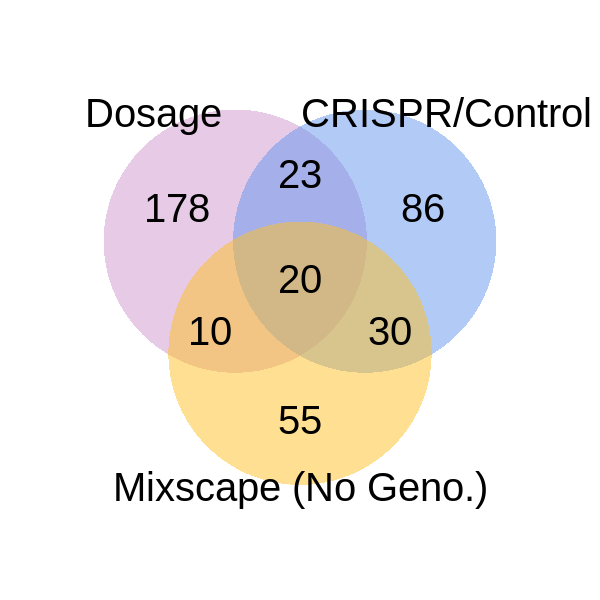

In [524]:
# # Define the sets
# fig.size(5, 5)
# set1 <- FBXO11_comp[FBXO11_comp['padj_Dosage']<0.05,'Genes']
# set2 <- FBXO11_comp[FBXO11_comp['padj_Edited_Index']<0.05,'Genes']
# set3 <- FBXO11_comp[FBXO11_comp['padj_Mixscape_Class']<0.05,'Genes']

# # Create the Venn diagram
# v <- venn.diagram(
#   x = list(
#     'Dosage' = set1, 
#     'CRISPR/Control' = set2,
#     'Mixscape (No Geno.)' = set3  # Label for the third set
#   ),
#   filename = NULL,
#   col = "transparent",
#   fill = c("plum3", "cornflowerblue", "goldenrod1"),  # Colors for the three sets
#   alpha = 0.5,
#   cex = 2,
#   cat.cex = 2,
#   cat.fontfamily = "Arial",  # Change category labels to Arial
#   fontfamily = "Arial",       # Change default text font to Arial
#   cat.pos = c(-30, 30, 180),  # Adjust positions of labels
#   # cat.just = list(c(0.5, 1), c(0.5, 0), c(0.5, 0))  # Fine-tune alignment
    
#   area1 = length(set1),
#   area2 = length(set2),
#   area3 = length(set3),
#   n12 = length(intersect(set1, set2)),
#   n13 = length(intersect(set1, set3)),
#   n23 = length(intersect(set2, set3)),
#   n123 = length(Reduce(intersect, list(set1, set2, set3)))

# )

# # Plot the Venn diagram
# grid.newpage()
# pushViewport(viewport(width = unit(0.7, "npc"), height = unit(0.7, "npc")))
# grid.draw(v)


In [88]:
library(eulerr)
library(grid)


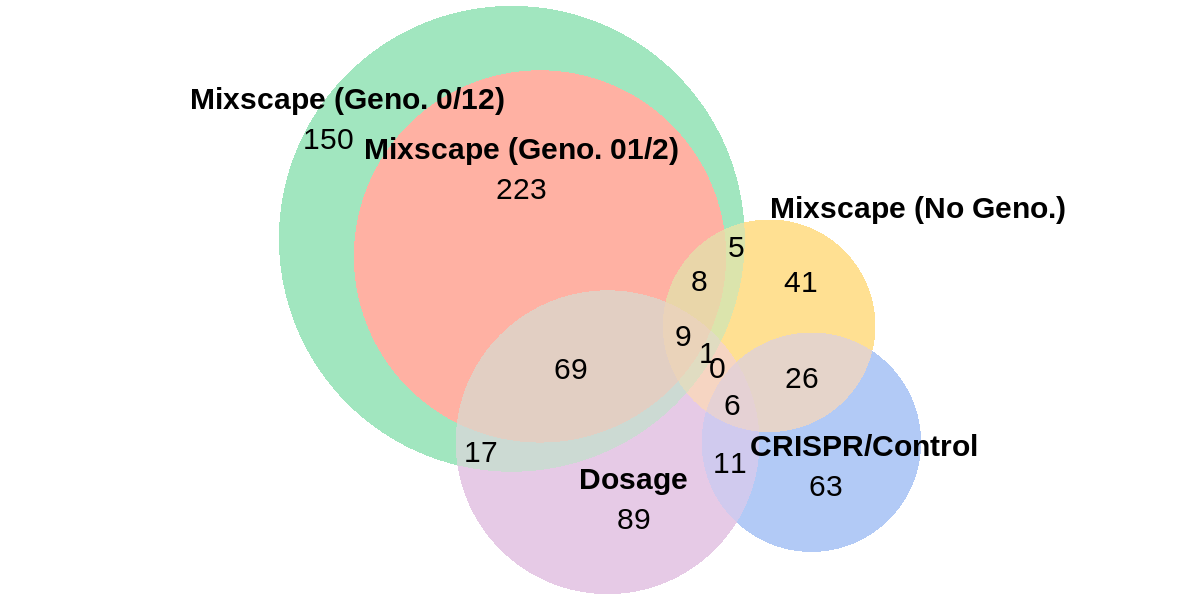

In [131]:
# pdf(file = '../Figures/FBXO11_VennDiagram_MixscapeDGEComp.pdf',  height = 5, width = 10)
set1 <- FBXO11_comp[FBXO11_comp['padj_Dosage'] < 0.05, 'Genes']
set2 <- FBXO11_comp[FBXO11_comp['padj_Edited_Index'] < 0.05, 'Genes']
set3 <- FBXO11_comp[FBXO11_comp['padj_MixscapeControlCrispr'] < 0.05, 'Genes']
set4 <- FBXO11_comp[FBXO11_comp['padj_MixscapeDosage0Dosage12'] < 0.05, 'Genes']
set5 <- FBXO11_comp[FBXO11_comp['padj_MixscapeDosage01Dosage2'] < 0.05, 'Genes']

# Create named lists of elements
sets <- list(
    Dosage = set1,
    `CRISPR/Control` = set2,
    `Mixscape (No Geno.)` = set3,
    `Mixscape (Geno. 0/12)` = set4,
    `Mixscape (Geno. 01/2)` = set5
)

# Calculate overlaps and sizes using eulerr
fit <- euler(sets)

fig.size(5, 10)
# Plot the Venn diagram
v = plot(
    fit,
    fills = c("plum3", "cornflowerblue", "goldenrod1", "seagreen3", "tomato"),  # Colors
    edges = NULL,
    labels = list(font = 2, family = "Arial", cex = 1.5),  # Customize fonts and sizes
    quantities = list(TRUE, cex = 1.5),
    alpha = 0.5
)


tags <- v$children[[1]]$children[[1]]$children$tags$children

i = 2
label_grob <- tags[[i]]$children[[1]]
label_grob$x <- unit(as.numeric(label_grob$x) + 2, "native")  # Change x position
# label_grob$y <- unit(as.numeric(label_grob$y) + 0, "native")  # Change y position
tags[[i]]$children[[1]] <- label_grob

i = 3
label_grob <- tags[[i]]$children[[1]]
label_grob$x <- unit(as.numeric(label_grob$x) + 6.2, "native")  # Change x position
label_grob$y <- unit(as.numeric(label_grob$y) + 4, "native")  # Change y position
tags[[i]]$children[[1]] <- label_grob

i = 4
label_grob <- tags[[i]]$children[[2]]
label_grob$x <- unit(as.numeric(label_grob$x) -1, "native")  # Change x position
# label_grob$y <- unit(as.numeric(label_grob$y) + 2, "native")  # Change y position
tags[[i]]$children[[2]] <- label_grob


v$children[[1]]$children[[1]]$children$tags$children <- tags

v
# dev.off()

In [241]:
set1 <- comp[comp['padj_Dosage'] < 0.05, 'Genes']
set2 <- comp[comp['padj_Edited_Index'] < 0.05, 'Genes']
set3 <- comp[comp['padj_MixscapeControlCrispr'] < 0.05, 'Genes']
set4 <- comp[comp['padj_MixscapeDosage0Dosage12'] < 0.05, 'Genes']
set5 <- comp[comp['padj_MixscapeDosage01Dosage2'] < 0.05, 'Genes']

In [242]:
overlaps = data.frame('method1' = 'Dosage',
                      'method2'= c('MixscapeControlCrispr', 'MixscapeDosage0Dosage12', 'MixscapeDosage01Dosage2'),
                      'count' = c(length(intersect(set1, set3)), length(intersect(set1, set4)), length(intersect(set1, set5))))
overlaps = rbind(overlaps, data.frame('method1' = 'Edited_Index',
                      'method2'= c('MixscapeControlCrispr', 'MixscapeDosage0Dosage12', 'MixscapeDosage01Dosage2'),
                      'count' = c(length(intersect(set2, set3)), length(intersect(set2, set4)), length(intersect(set2, set5)))))
overlaps =overlaps %>% mutate(pct = ifelse(method1=='Dosage', count/length(set1), count/length(set2)))

overlaps$method1 = factor(overlaps$method1, levels = c('Dosage', 'Edited_Index'))

In [243]:
name_map = setNames(c('Control/CRISPR', 'Dosage0/Dosage1-2', 'Dosage0-1/Dosage2'),
                     c('MixscapeControlCrispr', 'MixscapeDosage0Dosage12', 'MixscapeDosage01Dosage2'))
overlaps = overlaps %>% mutate(method2_rename = dplyr::recode(method2, !!!name_map))


In [244]:
overlaps

method1      method2                 count pct       method2_rename   
1 Dosage       MixscapeControlCrispr    30   0.1304348 Control/CRISPR   
2 Dosage       MixscapeDosage0Dosage12 122   0.5304348 Dosage0/Dosage1-2
3 Dosage       MixscapeDosage01Dosage2 105   0.4565217 Dosage0-1/Dosage2
4 Edited_Index MixscapeControlCrispr    50   0.3205128 Control/CRISPR   
5 Edited_Index MixscapeDosage0Dosage12  50   0.3205128 Dosage0/Dosage1-2
6 Edited_Index MixscapeDosage01Dosage2  42   0.2692308 Dosage0-1/Dosage2

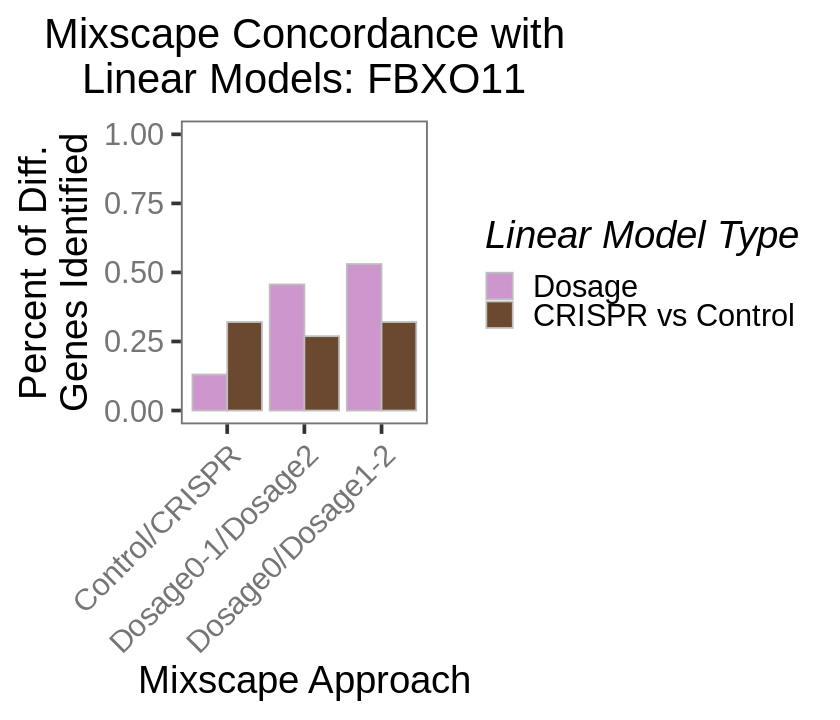

In [256]:
# pdf(file = '../Figures/Mixscape_FBXO11Daudi_DGEConcordance_Barplots.pdf',  height = 6, width = 7)
fig.size(6, 7)
ggplot(overlaps)+
    geom_bar(aes(x = method2_rename, fill = method1, y = pct), 
             color = 'grey', stat = 'identity', position = 'dodge')+
    theme_clean()+
    scale_fill_manual(values = c('plum3', '#6a4930'), labels = c('Dosage', 'CRISPR vs Control'))+
    theme(axis.text.x = element_text(angle = 45, hjust = 1))+
    labs(fill = 'Linear Model Type')+
    ggtitle('Mixscape Concordance with\nLinear Models: FBXO11')+
    ylab('Percent of Diff.\nGenes Identified')+
    xlab('Mixscape Approach')+
    ylim(c(0, 1))
# dev.off()

## CD45

### Load and process data

In [7]:
vmax = 5
vmin = -vmax

In [8]:
name='CD45'

In [18]:
data_dir = '../CD45_Data_Analysis/'

In [19]:
dna_fn = '../Misc/CD45UpdatedGenotypes_20250129.csv'

In [10]:
rna_counts_fn = paste0(data_dir, 'exprs.mtx')
rna_barcodes_fn = paste0(data_dir, 'exprs_colnames.csv')
rna_features_fn = paste0(data_dir, 'exprs_rownames.csv')

In [11]:
adt_counts_fn = paste0(data_dir, 'counts_ADT_filt.mtx')
adt_barcodes_fn = paste0(data_dir, 'colnames_counts_ADT_filt.csv')
adt_features_fn = paste0(data_dir, 'rownames_counts_ADT_filt.csv')

In [12]:
filt_meta_fn = paste0(data_dir, 'filt_meta.csv')
flow_matrix_fn = paste0(data_dir, 'CD45Plots.csv')

In [189]:
rna_barcodes_fn

[1] "../CD45_Data_Analysis/exprs_colnames.csv"

In [13]:
rna_counts = readMM(rna_counts_fn)
rna_features = read_delim(rna_features_fn, ',', col_names = c('index', 'feature'), skip = 1)[['feature']]
rna_barcodes = read_delim(rna_barcodes_fn, ',', col_names = c('index', 'cell'), skip = 1)[['cell']]

rownames(rna_counts) = rna_features
colnames(rna_counts) = rna_barcodes

Rows: 36591 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): feature
dbl (1): index

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 6144 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): cell
dbl (1): index

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [14]:
adt_counts = readMM(adt_counts_fn)
adt_features = read_delim(adt_features_fn, ',', col_names = c('index', 'feature'), skip = 1)[['feature']]
adt_barcodes = read_delim(adt_barcodes_fn, ',', col_names = c('index', 'cell'), skip = 1)[['cell']]

rownames(adt_counts) = adt_features
colnames(adt_counts) = adt_barcodes

Rows: 154 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): feature
dbl (1): index

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 6144 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): cell
dbl (1): index

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [20]:
filt_meta = read_delim(filt_meta_fn, ',')
flow_matrix = read_delim(flow_matrix_fn, ',')
geno = read_delim(dna_fn) %>% as.data.frame
rownames(geno) = geno$cell

Rows: 3267 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): plate, cell, PlateLabel, Condition, DNA_Barcode, ADT_Barcode, sgRN...
dbl  (3): nUMI, nGenes, pctMito

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 628 Columns: 32
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (15): DNA_Barcode, Well_ID, Alleles, Reference, PlateLabel, Condition, R...
dbl (17): genotype, PB_CD81, BV605_CD45, BV750_CD45, SSC, FSC, FITC_CD45, PE...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 593 Columns: 34
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (17): Barcode_DNA, Well_ID, plate_well, genotype, AllelicGe

In [193]:
filt_meta %>% dim
flow_matrix %>% dim
length(intersect(flow_matrix[['cell']], filt_meta[filt_meta['Condition']==name, ][['cell']]))

[1] 3267   13

[1] 628  32

[1] 628

In [33]:
meta_full = flow_matrix
meta_full = meta_full %>% as.data.frame
rownames(meta_full) = meta_full$cell

In [34]:
# Remove NAs
meta_full = meta_full[meta_full['Edited_Index'] %>% drop_na() %>% rownames, ]

In [35]:
rna_counts_filt = rna_counts[, meta_full[['cell']]]
adt_counts_filt = adt_counts[, meta_full[['cell']]]

In [197]:
rna_counts_filt %>% dim
adt_counts_filt %>% dim

[1] 36591   624

[1] 154 624

In [198]:
meta_full %>% dim
meta_full %>% head(2)

[1] 624  32

DNA_Barcode Well_ID
AACATCTCTGTGAC_CCGCATATTC CGGCAATGGA  A1     
AAGCTCCACTCAGA_CCGCATATTC CGGCAATGGA  A10    
                          Alleles                                                                         
AACATCTCTGTGAC_CCGCATATTC TTTTTTGGTTAAGGAAAAGGTTGGAAAAGGCCTTGGCCAACCAATTTTAAAAGGGGAAGGTTAAAATTTTAACCCCTTGG
AAGCTCCACTCAGA_CCGCATATTC TTTTTTGGTTAAGGAAAAGGTTGGAAAAGGCCTTGGCCAACCAATTCCAAAAGGGGAAGGTTAAAATTTTAACCCCTTGG
                          Reference                                                                       
AACATCTCTGTGAC_CCGCATATTC TTTTTTGGTTAAGGAAAAGGTTGGAAAAGGCCTTGGCCAACCAATTCCAAAAGGGGAAGGTTAAAATTTTAACCCCTTGG
AAGCTCCACTCAGA_CCGCATATTC TTTTTTGGTTAAGGAAAAGGTTGGAAAAGGCCTTGGCCAACCAATTCCAAAAGGGGAAGGTTAAAATTTTAACCCCTTGG
                          genotype PlateLabel Condition RNA_Barcode ADT_Barcode
AACATCTCTGTGAC_CCGCATATTC 1        CD45_P3    CD45      CCGCATATTC  CCTTGTTAAT 
AAGCTCCACTCAGA_CCGCATATTC 2        CD45_P3    CD45      CCGCATATTC  CCTTGTTAAT 
                          RNA_cell       ⋯ APC_CD81 APCCY7_CD45
AACATCTCTGTGAC_CCGCATATTC AACATCTCTGTGAC ⋯ 1.000000 53.51994   
AAGCTCCACTCAGA_CCGCATATTC AAGCTCCACTCAGA ⋯ 3.854229 20.81418   
                          Individual_Index Edited_Index CD45KO_Index
AACATCTCTGTGAC_CCGCATATTC 10020543         Edited       KO          
AAGCTCCACTCAGA_CCGCATATTC 10038222         Edited       WT          
                          genotype_count nUMI.x nGenes.x nUMI.y nGenes.y
AACATCTCTGTGAC_CCGCATATTC 165            13682  147      20034  2774    
AAGCTCCACTCAGA_CCGCATATTC 387             3975  128       3036  1150

In [36]:
# Use updated genotyping information
overlap_cells = intersect(rownames(geno), rownames(meta_full))
meta_full['Dosage'] = NA
meta_full[overlap_cells, 'Dosage'] = geno[overlap_cells, 'Dosage']

In [199]:
# meta_full = meta_full %>% mutate(Dosage = 
#                             ifelse(genotype == 2, 0, ifelse( genotype == 1, 2, ifelse(genotype == 3, 1 , NA)))) 


In [158]:
meta_full

DNA_Barcode Well_ID
AACATCTCTGTGAC_CCGCATATTC CGGCAATGGA  A1     
AAGCTCCACTCAGA_CCGCATATTC CGGCAATGGA  A10    
AATGCCGTTACACA_CCGCATATTC CGGCAATGGA  A13    
AATGCGCATACAGT_CCGCATATTC CGGCAATGGA  A14    
AATGTCATCGCGCT_CCGCATATTC CGGCAATGGA  A16    
ACAAGAGACTCCAA_CCGCATATTC CGGCAATGGA  A18    
ACACTCAGCTGTAA_CCGCATATTC CGGCAATGGA  A21    
ACAGAGAACCGCTC_CCGCATATTC CGGCAATGGA  A22    
ACAGCTATGATCGT_CCGCATATTC CGGCAATGGA  A23    
AACGAGCTGGCAAG_CCGCATATTC CGGCAATGGA  A5     
AACTACGTCTGTGC_CCGCATATTC CGGCAATGGA  A6     
AAGAAGACACCGAT_CCGCATATTC CGGCAATGGA  A8     
ACAGTATCCGTCAT_CCGCATATTC CGGCAATGGA  B1     
ACGTAGAACTCAGT_CCGCATATTC CGGCAATGGA  B10    
ACTATACGAGATCC_CCGCATATTC CGGCAATGGA  B13    
ACTGCGAAGGCCTT_CCGCATATTC CGGCAATGGA  B14    
ACTTGTGGACACGA_CCGCATATTC CGGCAATGGA  B15    
AGAACCATGTGTCA_CCGCATATTC CGGCAATGGA  B16    
AGACTACTCTCAAG_CCGCATATTC CGGCAATGGA  B18    
ACATGAGTCGTGAA_CCGCATATTC CGGCAATGGA  B2     
AGATTGCGTAGCGG_CCGCATATTC CGGCAATGGA  B23    
AGATTGCTAGAAGG_CCGCATATTC CGGCAATGGA  B24    
ACATTAGTGCCTCG_CCGCATATTC CGGCAATGGA  B3     
ACCAATATGCACAG_CCGCATATTC CGGCAATGGA  B5     
ACGACACGGCTCTA_CCGCATATTC CGGCAATGGA  B7     
ACGGATCTCCAATA_CCGCATATTC CGGCAATGGA  B9     
AGCAGGCATAGTGC_CCGCATATTC CGGCAATGGA  C1     
AGGTAGAGTAGGCG_CCGCATATTC CGGCAATGGA  C10    
AGGTGCTTCGAACT_CCGCATATTC CGGCAATGGA  C11    
AGTCATACGACTAG_CCGCATATTC CGGCAATGGA  C12    
⋮                         ⋮           ⋮      
TCGGCAGGAACGAT_ACAGTTCCAG GTGCCGCTTC  N6     
TGCCTCTACTAGAA_ACAGTTCCAG GTGCCGCTTC  O1     
TGCTTCGGCGCTAT_ACAGTTCCAG GTGCCGCTTC  O10    
TGGACTTCCAGAAT_ACAGTTCCAG GTGCCGCTTC  O11    
TGGATTGGTGCGAG_ACAGTTCCAG GTGCCGCTTC  O13    
TGTCAGCTTATGCA_ACAGTTCCAG GTGCCGCTTC  O18    
TGCGACGGCAATAC_ACAGTTCCAG GTGCCGCTTC  O2     
TGTGGTGGAATCAG_ACAGTTCCAG GTGCCGCTTC  O21    
TGTGTACGCGTATG_ACAGTTCCAG GTGCCGCTTC  O22    
TGTTACTCTCACGT_ACAGTTCCAG GTGCCGCTTC  O23    
TGTTAGCAAGATGG_ACAGTTCCAG GTGCCGCTTC  O24    
TGCGCCATATCGTA_ACAGTTCCAG GTGCCGCTTC  O3     
TGCGCCTTAGTTAA_ACAGTTCCAG GTGCCGCTTC  O4     
TGCGGAGACAACGT_ACAGTTCCAG GTGCCGCTTC  O5     
TGCGGATATCTGGC_ACAGTTCCAG GTGCCGCTTC  O6     
TGCTCAAGGAATCA_ACAGTTCCAG GTGCCGCTTC  O9     
TTCAGCGTCACTGA_ACAGTTCCAG GTGCCGCTTC  P11    
TTCAGTTCTACGAC_ACAGTTCCAG GTGCCGCTTC  P12    
TTCATTGATGGACG_ACAGTTCCAG GTGCCGCTTC  P13    
TTCCATCAGTGCGA_ACAGTTCCAG GTGCCGCTTC  P15    
TTCCTTGACGCTCA_ACAGTTCCAG GTGCCGCTTC  P16    
TTCGGAAGTGAGGA_ACAGTTCCAG GTGCCGCTTC  P17    
TTCGGTAAGCTCCT_ACAGTTCCAG GTGCCGCTTC  P18    
TTCTAGGAACTCAG_ACAGTTCCAG GTGCCGCTTC  P19    
TTAAGGAGCAGAAC_ACAGTTCCAG GTGCCGCTTC  P2     
TTCTCTCATTCAGC_ACAGTTCCAG GTGCCGCTTC  P20    
TTGGCGCGTCAATG_ACAGTTCCAG GTGCCGCTTC  P23    
TTACCGCCTTCGGA_ACAGTTCCAG GTGCCGCTTC  P4     
TTAGCCGCTTGTCG_ACAGTTCCAG GTGCCGCTTC  P5     
TTCAAGACGGTTGA_ACAGTTCCAG GTGCCGCTTC  P9     
                          Alleles                                                                         
AACATCTCTGTGAC_CCGCATATTC TTTTTTGGTTAAGGAAAAGGTTGGAAAAGGCCTTGGCCAACCAATTTTAAAAGGGGAAGGTTAAAATTTTAACCCCTTGG
AAGCTCCACTCAGA_CCGCATATTC TTTTTTGGTTAAGGAAAAGGTTGGAAAAGGCCTTGGCCAACCAATTCCAAAAGGGGAAGGTTAAAATTTTAACCCCTTGG
AATGCCGTTACACA_CCGCATATTC TTTTTTGGTTAAGGAAAAGGTTGGAAAAGGCCTTGGCCAACCAATTCTAAAAGGGGAAGGTTAAAATTTTAACCCCTTGG
AATGCGCATACAGT_CCGCATATTC TTTTTTGGTTAAGGAAAAGGTTGGAAAAGGCCTTGGCCAACCAATTCCAAAAGGGGAAGGTTAAAATTTTAACCCCTTGG
AATGTCATCGCGCT_CCGCATATTC TTTTTTGGTTAAGGAAAAGGTTGGAAAAGGCCTTGGCCAACCAATTCTAAAAGGGGAAGGTTAAAATTTTAACCCCTTGG
ACAAGAGACTCCAA_CCGCATATTC TTTTTTGGTTAAGGAAAAGGTTGGAAAAGGCCTTGGCCAACCAATTTTAAAAGGGGAAGGTTAAAATTTTAACCCCTTGG
ACACTCAGCTGTAA_CCGCATATTC TTTTTTGGTTAAGGAAAAGGTTGGAAAAGGCCTTGGCCAACCAATTTTAAAAGGGGAAGGTTAAAATTTTAACCCCTTGG
ACAGAGAACCGCTC_CCGCATATTC TTTTTTGGTTAAGGAAAAGGTTGGAAAAGGCCTTGGCCAACCAATTTTAAAAGGGGAAGGTTAAAATTTTAACCCCTTGG
ACAGCTATGATCGT_CCGCATATTC TTTTTTGGTTAAGGAAAAGGTTGGAAAAGGCCTTGGCCAACCAATTCCAAAAGGGGAAGGTTAAAATTTTAACCCCTTGG
AACGAGCTGGCAAG_CCGCATATTC TTTTTTGGTTAAGGAAAAGGTTGGAAAAGGCCTTGGCCAACCAATTCCAAAAGGGGAAGGTTAAAATTTTAACCCCTT

In [37]:
meta_full = meta_full %>% mutate(HomoRef_v_Other = ifelse(Dosage == 0, 'Control', 
                                  ifelse( Dosage == 1, 'Het/Homo Alt', ifelse(Dosage == 2, 'Het/Homo Alt', NA)))) 

meta_full = meta_full %>% mutate(HomoAlt_v_Other = ifelse(Dosage == 0, 'Control', 
                                  ifelse( Dosage == 1, 'Control', ifelse(Dosage == 2, 'Homo Alt', NA)))) 

In [27]:
meta_full[c('Dosage', 'HomoAlt_v_Other')] %>% table

      HomoAlt_v_Other
Dosage Control Homo Alt <NA>
  0        274        0    0
  1        152        0    0
  2          0      160    0
  <NA>       0        0   42

In [38]:
meta_full_filt = meta_full[rownames(meta_full['Dosage'] %>% na.omit), ]

In [25]:
meta_full_filt['Dosage'] %>% table

Dosage
  0   1   2 
274 152 160 

In [39]:
meta_full_filt[c('Edited_Index', 'Dosage')] %>% table  %>% as.data.frame.matrix

0   1   2  
Control  42   0   0
Edited  232 152 160

### Mixscape - RNA all cells

#### Control/CRISPR

In [40]:
exp_name = paste0(name, ' - Control/CRISPR (RNA)')
name
exp_name
edit_var = 'Edited_Index'
edit_var

[1] "CD45"

[1] "CD45 - Control/CRISPR (RNA)"

[1] "Edited_Index"

In [41]:
seu = CreateSeuratObject(counts = rna_counts_filt, 
                          project = name)


Warning message:
“Data is of class dgTMatrix. Coercing to dgCMatrix.”


In [42]:
seu = AddMetaData(seu, meta_full)

In [43]:
seu@meta.data %>% head(2)

orig.ident nCount_RNA nFeature_RNA DNA_Barcode
AACATCTCTGTGAC_CCGCATATTC CD45       20034      2774         CGGCAATGGA 
AAGCTCCACTCAGA_CCGCATATTC CD45        3036      1150         CGGCAATGGA 
                          Well_ID
AACATCTCTGTGAC_CCGCATATTC A1     
AAGCTCCACTCAGA_CCGCATATTC A10    
                          Alleles                                                                         
AACATCTCTGTGAC_CCGCATATTC TTTTTTGGTTAAGGAAAAGGTTGGAAAAGGCCTTGGCCAACCAATTTTAAAAGGGGAAGGTTAAAATTTTAACCCCTTGG
AAGCTCCACTCAGA_CCGCATATTC TTTTTTGGTTAAGGAAAAGGTTGGAAAAGGCCTTGGCCAACCAATTCCAAAAGGGGAAGGTTAAAATTTTAACCCCTTGG
                          Reference                                                                       
AACATCTCTGTGAC_CCGCATATTC TTTTTTGGTTAAGGAAAAGGTTGGAAAAGGCCTTGGCCAACCAATTCCAAAAGGGGAAGGTTAAAATTTTAACCCCTTGG
AAGCTCCACTCAGA_CCGCATATTC TTTTTTGGTTAAGGAAAAGGTTGGAAAAGGCCTTGGCCAACCAATTCCAAAAGGGGAAGGTTAAAATTTTAACCCCTTGG
                          genotype PlateLabel Condition ⋯ Edited_Index
AACATCTCTGTGAC_CCGCATATTC 1        CD45_P3    CD45      ⋯ Edited      
AAGCTCCACTCAGA_CCGCATATTC 2        CD45_P3    CD45      ⋯ Edited      
                          CD45KO_Index genotype_count nUMI.x nGenes.x nUMI.y
AACATCTCTGTGAC_CCGCATATTC KO           165            13682  147      20034 
AAGCTCCACTCAGA_CCGCATATTC WT           387             3975  128       3036 
                          nGenes.y Dosage HomoRef_v_Other HomoAlt_v_Other
AACATCTCTGTGAC_CCGCATATTC 2774     2      Het/Homo Alt    Homo Alt       
AAGCTCCACTCAGA_CCGCATATTC 1150     0      Control         Control

In [44]:
# Prepare RNA assay for dimensionality reduction: 
# Normalize data, find variable features and scale data.
DefaultAssay(object = seu) = 'RNA'
seu = NormalizeData(object = seu) %>% FindVariableFeatures() %>% ScaleData()

Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix



In [45]:
# Run Principle Component Analysis (PCA) to reduce the dimensionality of the data.
seu <- RunPCA(object = seu)


PC_ 1 
Positive:  MALAT1, BTG1, TNFAIP3, ADM, HILPDA, BHLHE40, TSC22D3, ANGPTL4, SYTL3, FBXO32 
	   TREM1, DDIT3, SPAG4, CLMN, ZC3H12D, CAPN12, IL1RN, SH3D21, PPP2R5B, TET2 
	   TXNIP, ARL4C, CCL5, CCL3, WDR60, GNLY, HERC3, CCL3L1, NCF1, HSPA1B 
Negative:  TUBA1B, TUBB4B, AURKB, RRM2, STMN1, TUBB, DTYMK, HJURP, CDCA5, MKI67 
	   TPX2, KPNA2, KIF22, CKS2, CDKN3, UBE2C, CDCA8, UBE2S, PSMC3, CDC20 
	   CEP55, CDCA2, YBX1, PKMYT1, SRM, CCNB1, CENPA, RAD51, TRIR, RRP7A 
PC_ 2 
Positive:  MCM5, SRM, LTA, SLC25A39, CHCHD10, MRPS26, NAPRT, WDR18, HAGHL, UCP2 
	   CD320, TNFSF14, PTGES2, GJB2, GPATCH4, TNFRSF4, BOP1, RELL2, CLTB, SLC5A6 
	   FLAD1, MATK, FARSA, MECR, RRP1, PARD6A, TRIM47, NDUFV3, CRELD2, CHAF1B 
Negative:  PLK1, CCNB1, CDC20, TPX2, UBE2C, UBE2S, CDKN3, AURKB, AURKA, CENPA 
	   CKS2, PSRC1, MKI67, MXD3, PIF1, HJURP, GTSE1, ASPM, TUBB4B, CDCA8 
	   CDCA2, KIF22, CCNF, TUBB, KPNA2, ARHGEF39, CKAP2L, KIF14, TUBA1B, RNF26 
PC_ 3 
Positive:  HILPDA, CAVIN3, CYB5R2, MRPS26, CAMTA2, DU

In [46]:
# Run Uniform Manifold Approximation and Projection (UMAP) to visualize clustering in 2-D.
seu <- RunUMAP(object = seu, dims = 1:40)


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
12:38:33 UMAP embedding parameters a = 0.9922 b = 1.112

12:38:33 Read 624 rows and found 40 numeric columns

12:38:33 Using Annoy for neighbor search, n_neighbors = 30

12:38:33 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:38:33 Writing NN index file to temp file /tmp/RtmpKcIvRQ/file1921750cb7a19

12:38:33 Searching Annoy index using 1 thread, search_k = 3000

12:38:33 Annoy recall = 100%

12:38:34 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors =

In [47]:
# Calculate perturbation signature (PRTB).
seu <- CalcPerturbSig(
  object = seu, 
  assay = "RNA", 
  slot = "data", 
  gd.class = edit_var, 
  nt.cell.class = "Control", 
  reduction = "pca", 
  ndims = 40, 
  num.neighbors = n_neighbors, 
  # split.by = "CellType_Index", 
  new.assay.name = "PRTB")



Processing rep1

Warning message:
“Layer counts isn't present in the assay object; returning NULL”


In [48]:
seu

An object of class Seurat 
38591 features across 624 samples within 2 assays 
Active assay: RNA (36591 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: PRTB
 2 dimensional reductions calculated: pca, umap

In [49]:
seu@assays$PRTB

Assay data with 2000 features for 624 cells
First 10 features:
 CCL3, GZMB, CCL5, LTA, GNLY, DNAJB1, CCL22, IL13, OSM, HSPH1 

In [50]:
# Prepare PRTB assay for dimensionality reduction: 
# Normalize data, find variable features and center data.
DefaultAssay(object = seu) <- 'PRTB'

# Use variable features from RNA assay.
VariableFeatures(object = seu) <- VariableFeatures(object = seu[["RNA"]])
seu <- ScaleData(object = seu, do.scale = F, do.center = T)


Centering data matrix



In [51]:
# Run PCA to reduce the dimensionality of the data.
seu <- RunPCA(object = seu, reduction.key = 'prtbpca', reduction.name = 'prtbpca')

# Run UMAP to visualize clustering in 2-D.
seu <- RunUMAP(
  object = seu, 
  dims = 1:40, 
  reduction = 'prtbpca', 
  reduction.key = 'prtbumap', 
  reduction.name = 'prtbumap')


Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from prtbpca to prtbpca_”
prtbpca_ 1 
Positive:  GZMB, RGS16, ASL, CTAG2, MALAT1, CYB5R2, PGGHG, IL13, BHLHE40, CA7 
	   CCL5, NUBP2, RRP1, POLR3C, SRRM1, RBM10, ZNF526, CSF2, MAP3K14, DUSP5 
	   ADM, BSCL2, FOXP3, RASSF4, CHD7, ERN1, TMIGD2, CCL3, RABGGTA, ZNF408 
Negative:  RRM2, STMN1, TUBB, TUBA1B, MCRIP1, WDR83, TUBA4A, CCDC107, KIF22, IFI6 
	   TRIR, PLAGL2, NIPBL, TACO1, YBX1, RAD51C, THY1, RASSF7, DCXR, LTA 
	   DNAJB2, CTCF, CHMP6, DBNL, GALK1, CABIN1, MKI67, TUBGCP3, SLC25A1, CTSA 
prtbpca_ 2 
Positive:  LTA, MIR155HG, MRPS26, TNFRSF4, CCR7, DUSP2, ZBTB32, LTB, UCP2, FOXP3 
	   ISG15, ARID5A, MX1, EVL, IER3, SRM, IFI6, DBNL, DCP1A, YBX1 
	   BCS1L, CDT1, SH2D2A, CNPY3, TMEM173, C12orf43, CAVIN3, TNF, ADA, TSC22D3 
Negative:  GZMB, TUBB4B, AURKB, TUBA1B, KIF22, TPX2, PTRH1, FGFBP2, IL2, UBE2S 
	   DNAJB1, RRM2, HYI, MKI67, SLIT3, TUBB, TUBA4A, CAD, CKS2, UBE2C 
	   CDKN3

In [52]:
seu

An object of class Seurat 
38591 features across 624 samples within 2 assays 
Active assay: PRTB (2000 features, 2000 variable features)
 2 layers present: data, scale.data
 1 other assay present: RNA
 4 dimensional reductions calculated: pca, umap, prtbpca, prtbumap

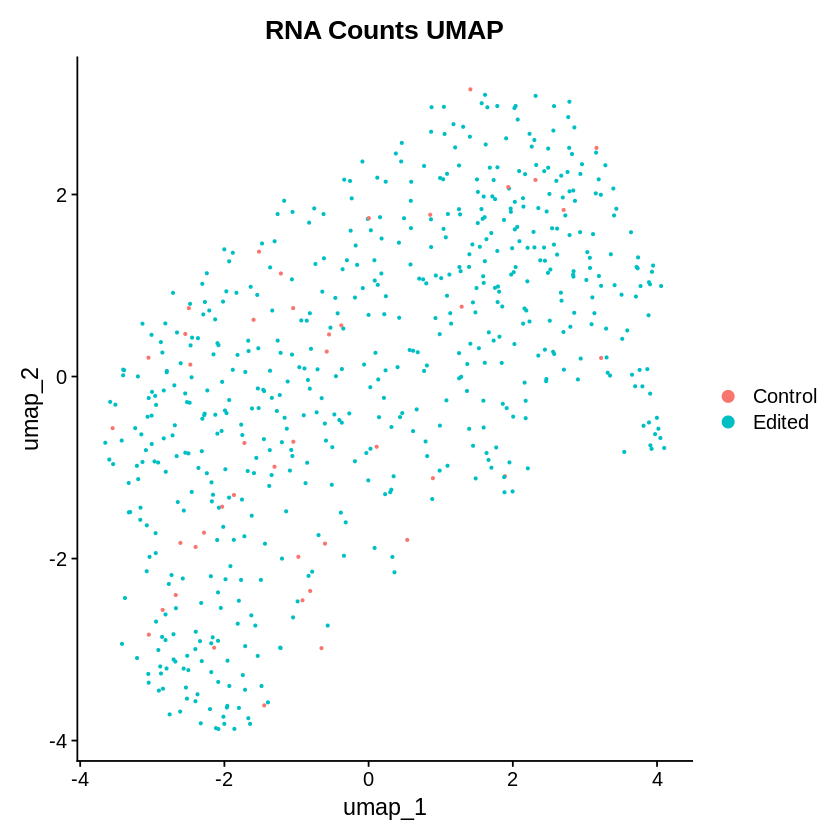

In [53]:
p1 = DimPlot(
  object = seu,
  group.by = edit_var,
  reduction = 'umap', 
  # split.by = "crispr", 
  ncol = 1, 
  pt.size = 0.5, 
)
p1 + ggtitle("RNA Counts UMAP")
  # cols = c("grey39","goldenrod3")) +
  # ggtitle("Perturbation Status") +


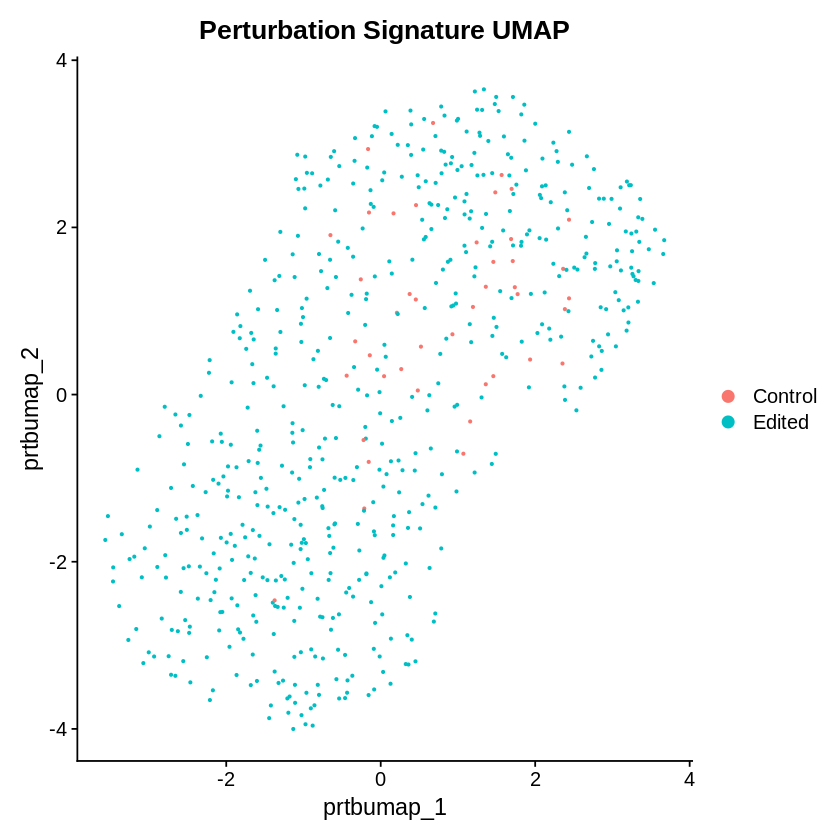

In [54]:
p1 = DimPlot(
  object = seu,
  group.by = edit_var,
  reduction = 'prtbumap', 
  # split.by = "crispr", 
  ncol = 1, 
  pt.size = 0.5, 
)
p1 + ggtitle("Perturbation Signature UMAP")
  # cols = c("grey39","goldenrod3")) +
  # ggtitle("Perturbation Status") +


In [55]:
# Run mixscape.
seu <- RunMixscape(
  object = seu, 
  assay = "PRTB", 
  slot = "scale.data",  # "scale.data",
  labels = edit_var, 
  nt.class.name = "Control", 
  min.de.genes = min_de_genes, 
  logfc.threshold = logfc_threshold,
  iter.num = 10, 
  de.assay = "RNA", 
  verbose = TRUE,
  prtb.type = "KO", 
  # split.by = "CellType_Index"
)


Processing Edited

Finding new perturbation gene set

Computing perturbation signature for missing features.

Warning message:
“Different cells and/or features from existing assay PRTB”
Warning message:
“Layer counts isn't present in the assay object; returning NULL”
Classifying cells for: 

  Edited



number of iterations= 43 
number of iterations= 50 
number of iterations= 53 
number of iterations= 53 


In [56]:
seu

An object of class Seurat 
38592 features across 624 samples within 2 assays 
Active assay: PRTB (2001 features, 0 variable features)
 2 layers present: data, scale.data
 1 other assay present: RNA
 4 dimensional reductions calculated: pca, umap, prtbpca, prtbumap

In [57]:
seu@meta.data[c(edit_var ,'genotype')] %>% table

            genotype
Edited_Index   1   2   3   4   5   6   7   9  10  11  13  14  15  16  17  18
     Control   0  43   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     Edited  165 239 148   8   1   2   4   1   2   1   1   3   1   1   1   2
            genotype
Edited_Index  20
     Control   0
     Edited    1

In [58]:
seu@meta.data[c('mixscape_class.global' ,'Dosage')] %>% table

                     Dosage
mixscape_class.global   0   1   2 <NA>
              Control  42   0   0    1
              KO      163 110 116   26
              NP       69  42  44   11

In [59]:
seu@meta.data[c('mixscape_class' ,'Dosage')] %>% table

              Dosage
mixscape_class   0   1   2 <NA>
     Control    42   0   0    1
     Edited KO 163 110 116   26
     Edited NP  69  42  44   11

  mixscape_class.global Dosage Freq
1               Control      0   42
2                    KO      0  163
3                    NP      0   69
4               Control      1    0
5                    KO      1  110
6                    NP      1   42
7               Control      2    0
8                    KO      2  116
9                    NP      2   44
  mixscape_class.global Dosage Freq
1               Control      0   42
2                    KO      0  163
3                    NP      0   69
4               Control      1    0
5                    KO      1  110
6                    NP      1   42
7               Control      2    0
8                    KO      2  116
9                    NP      2   44


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message in geom_segment(aes(x = 0.5, y = 1.5, xend = 1.5, yend = 1.5), size = 1):
“All aesthetics have length 1, but the data has 9 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”
Warning message in geom_segment(aes(x = 0.5, y = 3.5, xend = 1.5, yend = 3.5), size = 1):
“All aesthetics have length 1, but the data has 9 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”
Warning message in geom_segment(aes(x = 0.5, y = 1.5, xend = 0.5, yend = 3.5), size = 1):
“All aesthetics have length 1, but the data has 9 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”
Warning message in geom_segment(aes(x = 1.5, y = 1.5, xend = 1.5, yend = 3.5), size = 1):
“All aesthetics have length 1, but the data has 9 rows.
ℹ Plea

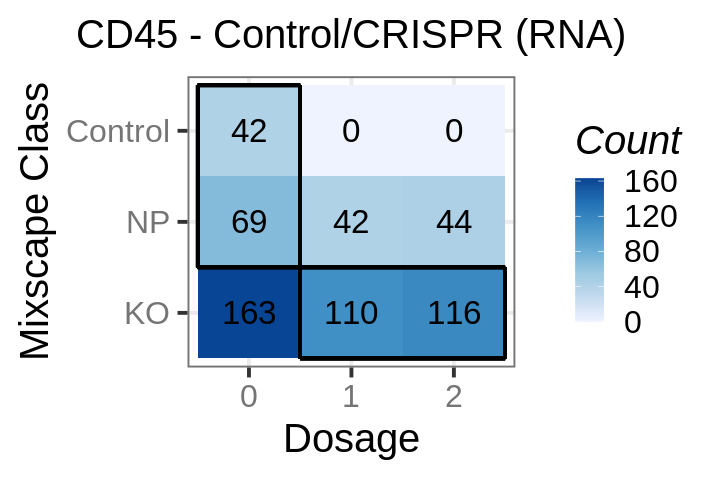

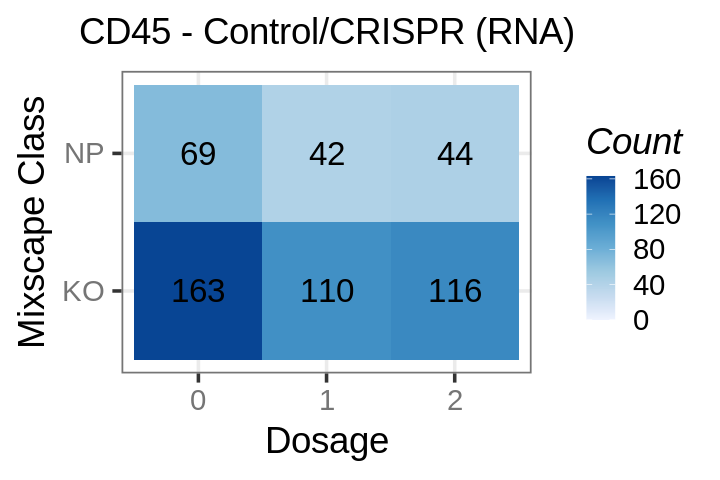

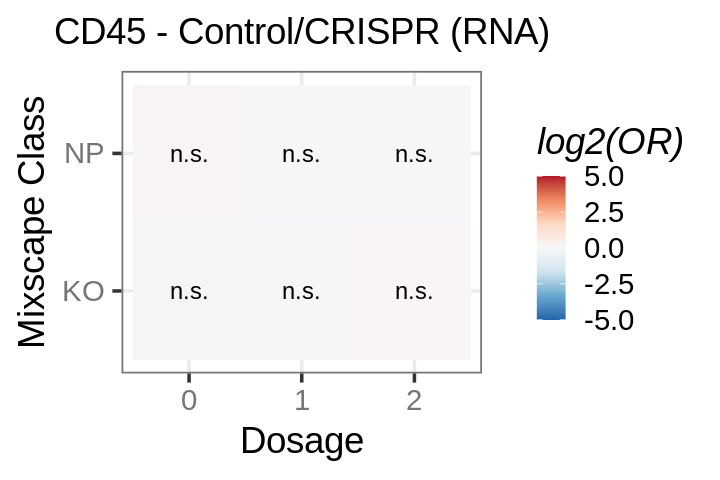

In [60]:


dat = seu@meta.data
dat = dat[dat['Dosage'] %>% drop_na() %>% rownames, ]
dat[['Dosage']] = factor(dat[['Dosage']], levels = c(0, 1, 2))
dat = dat[c('mixscape_class.global' ,'Dosage')] %>% table %>% as.data.frame
dat[['mixscape_class.global']] = factor(dat[['mixscape_class.global']], levels = c('KO', 'NP', 'Control'))
print(dat)
if (!('KO' %in% (dat[['mixscape_class.global']] %>% unique)) ){
    dat = rbind(dat, data.frame(mixscape_class.global = c('KO'), Dosage = c(0, 1, 2), Freq =c(0, 0, 0)))
}
print(dat)

fig.size(4, 6)
p1 = ggplot(dat)+
    geom_tile(aes(x=Dosage, y=mixscape_class.global,fill =Freq))+
    geom_text(aes(x=Dosage, y=mixscape_class.global, label = round(Freq, 1)), size = 7) +
    scale_fill_distiller(palette = 'Blues', direction = 1)+
    theme_pres(base_size = 24)+
    ylab('Mixscape Class')+
    labs(fill = 'Count')+
    geom_segment(aes(x = .5, y = 1.5, xend = 1.5, yend = 1.5), size = 1)+
    geom_segment(aes(x = .5, y = 3.5, xend = 1.5, yend = 3.5), size = 1)+
    geom_segment(aes(x = .5, y = 1.5, xend = .5, yend = 3.5), size = 1)+
    geom_segment(aes(x = 1.5, y = 1.5, xend = 1.5, yend = 3.5), size = 1)+

    geom_segment(aes(x = 1.5, y = 1.5, xend = 3.5, yend = 1.5), size = 1)+
    geom_segment(aes(x = 1.5, y = .5, xend = 3.5, yend = .5), size = 1)+
    geom_segment(aes(x = 1.5, y = .5, xend = 1.5, yend = 1.5), size = 1)+
    geom_segment(aes(x = 3.5, y = .5, xend = 3.5, yend = 1.5), size = 1)+

    ggtitle(paste0(exp_name))+
    theme(plot.title = element_text(size = 24))
    print(p1)

if (edit_var=='Edited_Index'){
    dat_filt = dat %>% filter(`mixscape_class.global`!='Control') } else if (edit_var=='HomoRef_v_Other'){
    dat_filt = dat %>% filter(`mixscape_class.global`!='Control', `Dosage`!=0)} else if (edit_var=='HomoAlt_v_Other'){
    dat_filt = dat %>% filter(`mixscape_class.global`!='Control', `Dosage`!=0, `Dosage`!=1)} 

# if (edit_var=='Edited_Index'){
#     dat_filt = dat %>% filter(`mixscape_class.global`!='Control') }

count_max = dat_filt['Freq'] %>% max
fig.size(4, 6)
p2 = ggplot(dat_filt)+
    geom_tile(aes(x=Dosage, y=mixscape_class.global,fill =Freq))+
    geom_text(aes(x=Dosage, y=mixscape_class.global, label = round(Freq, 1)), size = 7) +
    scale_fill_distiller(palette = 'Blues', direction = 1,  limits = c(0, count_max), oob = scales::squish)+
    theme_pres(base_size = 22)+
    ylab('Mixscape Class')+
    labs(fill = 'Count')+
    # geom_segment(aes(x = .5, y = 1.5, xend = 1.5, yend = 1.5), size = 1)+
    # geom_segment(aes(x = .5, y = 3.5, xend = 1.5, yend = 3.5), size = 1)+
    # geom_segment(aes(x = .5, y = 1.5, xend = .5, yend = 3.5), size = 1)+
    # geom_segment(aes(x = 1.5, y = 1.5, xend = 1.5, yend = 3.5), size = 1)+

    # geom_segment(aes(x = 1.5, y = 1.5, xend = 3.5, yend = 1.5), size = 1)+
    # geom_segment(aes(x = 1.5, y = .5, xend = 3.5, yend = .5), size = 1)+
    # geom_segment(aes(x = 1.5, y = .5, xend = 1.5, yend = 1.5), size = 1)+
    # geom_segment(aes(x = 3.5, y = .5, xend = 3.5, yend = 1.5), size = 1)+

    ggtitle(paste0(exp_name))+
    theme(plot.title = element_text(size = 22))
print(p2)

dat_filt['OR'] = 0
dat_filt['pval'] = 1

for (i in rownames(dat_filt)){
    mixclass = dat_filt[i, 'mixscape_class.global']
    dosage = dat_filt[i, 'Dosage']

    mat = matrix(0, 2, 2)

    mat[1, 1] = (dat_filt %>% filter(Dosage == dosage, mixscape_class.global==mixclass))[['Freq']] %>% sum
    mat[1, 2] = (dat_filt %>% filter(Dosage != dosage, mixscape_class.global==mixclass))[['Freq']] %>% sum
    mat[2, 1] = (dat_filt %>% filter(Dosage == dosage, mixscape_class.global!=mixclass))[['Freq']] %>% sum
    mat[2, 2] = (dat_filt %>% filter(Dosage != dosage, mixscape_class.global!=mixclass))[['Freq']] %>% sum

    pval = fisher.test(mat)$p.value
    or = fisher.test(mat)$estimate

    dat_filt[i, c('OR', 'pval')] = c(or, pval)

}

dat_filt[['padj']] = p.adjust(dat_filt[['pval']], 'BH')
dat_filt = dat_filt %>% mutate(label = ifelse(padj < 0.05, '*', 'n.s.'))
dat_filt['log2OR'] = log2(dat_filt['OR'])

fig.size(4, 6)
p3 = ggplot(dat_filt)+
    geom_tile(aes(x=Dosage, y=mixscape_class.global,fill =log2OR))+
    geom_text(aes(x=Dosage, y=mixscape_class.global, label = label), size = 5) +
    scale_fill_distiller(palette = 'RdBu', direction = -1, limits = c(vmin, vmax), oob = scales::squish)+
    theme_pres(base_size = 22)+
    ylab('Mixscape Class')+
    labs(fill = 'log2(OR)')+
    # geom_segment(aes(x = .5, y = 1.5, xend = 1.5, yend = 1.5), size = 1)+
    # geom_segment(aes(x = .5, y = 3.5, xend = 1.5, yend = 3.5), size = 1)+
    # geom_segment(aes(x = .5, y = 1.5, xend = .5, yend = 3.5), size = 1)+
    # geom_segment(aes(x = 1.5, y = 1.5, xend = 1.5, yend = 3.5), size = 1)+

    # geom_segment(aes(x = 1.5, y = 1.5, xend = 3.5, yend = 1.5), size = 1)+
    # geom_segment(aes(x = 1.5, y = .5, xend = 3.5, yend = .5), size = 1)+
    # geom_segment(aes(x = 1.5, y = .5, xend = 1.5, yend = 1.5), size = 1)+
    # geom_segment(aes(x = 3.5, y = .5, xend = 3.5, yend = 1.5), size = 1)+

    ggtitle(paste0(exp_name))+
    theme(plot.title = element_text(size = 22))
print(p3)


Warning message:
“Use of `dat$Freq` is discouraged.
ℹ Use `Freq` instead.”
Warning message in geom_segment(aes(x = 0.5, y = 2.5, xend = 3.5, yend = 2.5), size = 1, :
“All aesthetics have length 1, but the data has 9 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”


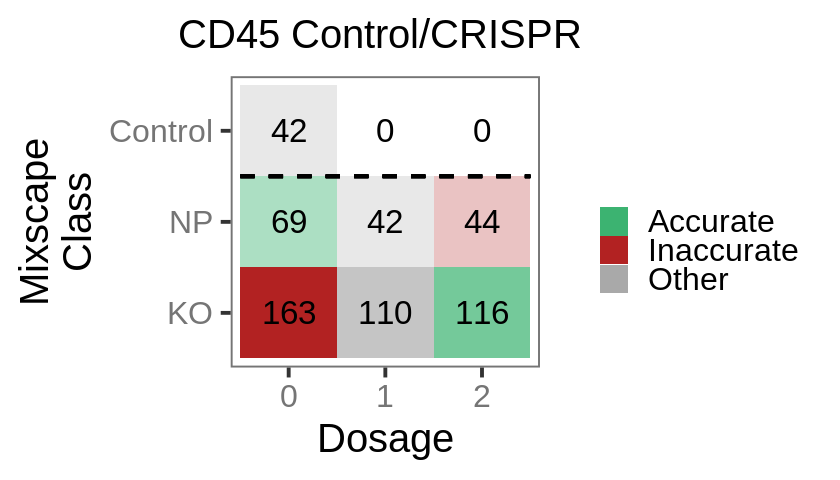

In [63]:
# pdf(file = '../Figures/Mixscape_CD45_ControlCrispr.pdf',  height = 4, width = 7)

dat = dat %>% mutate(group = ifelse(((`mixscape_class.global` == 'NP') & (Dosage == 0)) |
                                ((`mixscape_class.global` == 'KO') & (Dosage == 2)), 'Accurate', 
                              
                    ifelse(((`mixscape_class.global` == 'KO') & (Dosage == 0)) |
                                ((`mixscape_class.global` == 'NP') & (Dosage == 2)), 'Inaccurate',
           
                              'Other')))

# dat = dat %>% mutate(color = ifelse(group == 'Accurate', 'green', ifelse(group == 'Inaccurate', 'red', 'grey')))

fig.size(4, 7)
ggplot(dat, aes(x=Dosage, y=mixscape_class.global))+
        geom_tile(aes(fill = group, alpha = Freq/sum(dat$Freq)))+
        geom_text(aes(x=Dosage, y=mixscape_class.global, label = round(Freq, 1)), size = 7) +
        scale_fill_manual(values = c("Other" = "darkgray", "Inaccurate" = "firebrick", "Accurate" = "mediumseagreen")) +  # Manually set colors
        scale_alpha_continuous(range = c(0, 1)) +
        guides(
        alpha = "none")+
        theme_pres(base_size = 24)+
        ylab('Mixscape\nClass')+
        labs(fill = '')+
        geom_segment(aes(x = .5, y = 2.5, xend = 3.5, yend = 2.5), size = 1, linetype = 2)+
        ggtitle(exp_name %>% str_replace('\\(RNA\\)', '') %>% str_replace('\\(ADT\\)', '') %>%
                str_replace(' -', ''))+
        theme(plot.title = element_text(size = 24),
                        panel.grid.major = element_blank(),
             )
# dev.off()

In [64]:
seu@meta.data %>% write_csv("../Misc/CD45_MixscapeClasses_ControlCrispr_20250129.csv")

#### Control/[Het, Homo Alt]

In [65]:
exp_name = paste0(name, ' - Dosage0/Dosage1-2 (RNA)')
name
exp_name
edit_var = 'HomoRef_v_Other'
edit_var

[1] "CD45"

[1] "CD45 - Dosage0/Dosage1-2 (RNA)"

[1] "HomoRef_v_Other"

In [66]:
seu = CreateSeuratObject(counts = rna_counts_filt[, rownames(meta_full_filt)], 
                          project = name)


Warning message:
“Data is of class dgTMatrix. Coercing to dgCMatrix.”


In [67]:
seu = AddMetaData(seu, meta_full_filt)

In [68]:
seu@meta.data %>% head(2)

orig.ident nCount_RNA nFeature_RNA DNA_Barcode
AACATCTCTGTGAC_CCGCATATTC CD45       20034      2774         CGGCAATGGA 
AAGCTCCACTCAGA_CCGCATATTC CD45        3036      1150         CGGCAATGGA 
                          Well_ID
AACATCTCTGTGAC_CCGCATATTC A1     
AAGCTCCACTCAGA_CCGCATATTC A10    
                          Alleles                                                                         
AACATCTCTGTGAC_CCGCATATTC TTTTTTGGTTAAGGAAAAGGTTGGAAAAGGCCTTGGCCAACCAATTTTAAAAGGGGAAGGTTAAAATTTTAACCCCTTGG
AAGCTCCACTCAGA_CCGCATATTC TTTTTTGGTTAAGGAAAAGGTTGGAAAAGGCCTTGGCCAACCAATTCCAAAAGGGGAAGGTTAAAATTTTAACCCCTTGG
                          Reference                                                                       
AACATCTCTGTGAC_CCGCATATTC TTTTTTGGTTAAGGAAAAGGTTGGAAAAGGCCTTGGCCAACCAATTCCAAAAGGGGAAGGTTAAAATTTTAACCCCTTGG
AAGCTCCACTCAGA_CCGCATATTC TTTTTTGGTTAAGGAAAAGGTTGGAAAAGGCCTTGGCCAACCAATTCCAAAAGGGGAAGGTTAAAATTTTAACCCCTTGG
                          genotype PlateLabel Condition ⋯ Edited_Index
AACATCTCTGTGAC_CCGCATATTC 1        CD45_P3    CD45      ⋯ Edited      
AAGCTCCACTCAGA_CCGCATATTC 2        CD45_P3    CD45      ⋯ Edited      
                          CD45KO_Index genotype_count nUMI.x nGenes.x nUMI.y
AACATCTCTGTGAC_CCGCATATTC KO           165            13682  147      20034 
AAGCTCCACTCAGA_CCGCATATTC WT           387             3975  128       3036 
                          nGenes.y Dosage HomoRef_v_Other HomoAlt_v_Other
AACATCTCTGTGAC_CCGCATATTC 2774     2      Het/Homo Alt    Homo Alt       
AAGCTCCACTCAGA_CCGCATATTC 1150     0      Control         Control

In [69]:
# Prepare RNA assay for dimensionality reduction: 
# Normalize data, find variable features and scale data.
DefaultAssay(object = seu) = 'RNA'
seu = NormalizeData(object = seu) %>% FindVariableFeatures() %>% ScaleData()

Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix



In [70]:
# Run Principle Component Analysis (PCA) to reduce the dimensionality of the data.
seu <- RunPCA(object = seu)


PC_ 1 
Positive:  MALAT1, BHLHE40, ADM, HILPDA, BTG1, TSC22D3, ANGPTL4, SYTL3, DDIT3, CLMN 
	   CAPN12, SPAG4, ZC3H12D, TREM1, SH3D21, UBR5, TXNIP, IL1RN, CCL5, HERC3 
	   TET2, CCL3, PPP2R5B, ARL4C, HSPA1B, ZFP36, PMCH, GNLY, CCL3L1, MAF 
Negative:  TUBA1B, TUBB4B, AURKB, RRM2, DTYMK, TUBB, TPX2, CCNA2, HJURP, CDCA5 
	   MKI67, CKS2, KPNA2, UBE2C, CDCA8, KIF22, SMC4, CDKN3, UBE2S, CDC20 
	   CCNB1, CEP55, CENPA, CDCA2, YBX1, PLK1, PSMC3, SRM, PKMYT1, AURKA 
PC_ 2 
Positive:  MCM5, SRM, LTA, RRP9, NAPRT, MRPS26, SLC25A39, CHCHD10, TNFSF14, UCP2 
	   WDR18, PTGES2, CLTB, FARSA, BOP1, GPATCH4, HAGHL, RRP1, GJB2, FLAD1 
	   CD320, SLC5A6, PARD6A, RELL2, MECR, TNFRSF4, MATK, TRIM47, SNRNP25, NDUFV3 
Negative:  PLK1, CDC20, CCNB1, TPX2, UBE2S, AURKB, UBE2C, AURKA, CDKN3, CCNA2 
	   CKS2, CENPA, PIF1, MKI67, PSRC1, HJURP, MXD3, ASPM, CDCA8, TUBB4B 
	   GTSE1, CDCA2, KIF22, TUBB, SMC4, ARHGEF39, KIF2C, KPNA2, CCNF, CKAP2L 
PC_ 3 
Positive:  HILPDA, CAMTA2, SH2D2A, CAVIN3, CYB5R2, FARSA, AC147

In [71]:
# Run Uniform Manifold Approximation and Projection (UMAP) to visualize clustering in 2-D.
seu <- RunUMAP(object = seu, dims = 1:40)


12:41:12 UMAP embedding parameters a = 0.9922 b = 1.112

12:41:12 Read 586 rows and found 40 numeric columns

12:41:12 Using Annoy for neighbor search, n_neighbors = 30

12:41:12 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:41:12 Writing NN index file to temp file /tmp/RtmpKcIvRQ/file192174103fe21

12:41:12 Searching Annoy index using 1 thread, search_k = 3000

12:41:12 Annoy recall = 100%

12:41:13 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

12:41:14 Initializing from normalized Laplacian + noise (using RSpectra)

12:41:14 Commencing optimization for 500 epochs, with 22808 positive edges

12:41:17 Optimization finished



In [72]:
# Calculate perturbation signature (PRTB).
seu <- CalcPerturbSig(
  object = seu, 
  assay = "RNA", 
  slot = "data", 
  gd.class = "HomoRef_v_Other", 
  nt.cell.class = "Control", 
  reduction = "pca", 
  ndims = 40, 
  num.neighbors = n_neighbors, 
  # split.by = "CellType_Index", 
  new.assay.name = "PRTB")



Processing rep1

Warning message:
“Layer counts isn't present in the assay object; returning NULL”


In [73]:
seu

An object of class Seurat 
38591 features across 586 samples within 2 assays 
Active assay: RNA (36591 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: PRTB
 2 dimensional reductions calculated: pca, umap

In [74]:
seu@assays$PRTB

Assay data with 2000 features for 586 cells
First 10 features:
 CCL3, GZMB, CCL5, LTA, DNAJB1, GNLY, IL13, CCL22, HSPH1, OSM 

In [75]:
# Prepare PRTB assay for dimensionality reduction: 
# Normalize data, find variable features and center data.
DefaultAssay(object = seu) <- 'PRTB'

# Use variable features from RNA assay.
VariableFeatures(object = seu) <- VariableFeatures(object = seu[["RNA"]])
seu <- ScaleData(object = seu, do.scale = F, do.center = T)


Centering data matrix



In [76]:
# Run PCA to reduce the dimensionality of the data.
seu <- RunPCA(object = seu, reduction.key = 'prtbpca', reduction.name = 'prtbpca')

# Run UMAP to visualize clustering in 2-D.
seu <- RunUMAP(
  object = seu, 
  dims = 1:40, 
  reduction = 'prtbpca', 
  reduction.key = 'prtbumap', 
  reduction.name = 'prtbumap')


Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from prtbpca to prtbpca_”
prtbpca_ 1 
Positive:  TRBC1, PGGHG, BHLHE40, GPS2, NFKBID, EXOSC2, KIF2C, CTAG2, ECSIT, XBP1 
	   CCL3, CHD7, TNFSF14, RXRA, IL2, GMPPA, JUN, HRH2, CDKN3, ZNF408 
	   CA7, ANTKMT, ZBTB7B, FOSL1, HMBS, NFIC, GZMB, CDPF1, ERN1, CDIP1 
Negative:  LTB, YBX1, TIMP1, DCXR, CCR7, LTA, CDT1, GALK1, FARSA, MCM5 
	   TUBB, CNPY3, CAMTA2, IFI6, DUSP2, EGLN2, CHCHD10, KIF22, TRBC2, ARID5A 
	   ALOX5AP, DBNL, TRIR, CDKN1A, GLUL, MCRIP1, IL4I1, TUBA1B, RRM2, ZBTB32 
prtbpca_ 2 
Positive:  GZMB, TNFRSF18, TRBC1, DUSP2, SH2D2A, SYTL3, RGS16, HILPDA, BHLHE40, TNFRSF4 
	   BTG1, PRF1, TUBA4A, IER3, CAMTA2, FOXP3, NINJ1, ADM, SRD5A3, NOL3 
	   ALOX5AP, FARSA, FGFBP2, CDT1, NAPSA, SLC3A2, DCP1A, ZBTB32, MALAT1, GNLY 
Negative:  IFI6, LGALS9, MX1, LGALS3BP, DCXR, ADA, CD74, ISG15, DCTN2, BBX 
	   PIGT, EGLN2, SIRT3, SRM, HSPA8, ZFR, LRSAM1, BOP1, CD320, DNAJB1 
	   PUSL1, M

In [77]:
seu

An object of class Seurat 
38591 features across 586 samples within 2 assays 
Active assay: PRTB (2000 features, 2000 variable features)
 2 layers present: data, scale.data
 1 other assay present: RNA
 4 dimensional reductions calculated: pca, umap, prtbpca, prtbumap

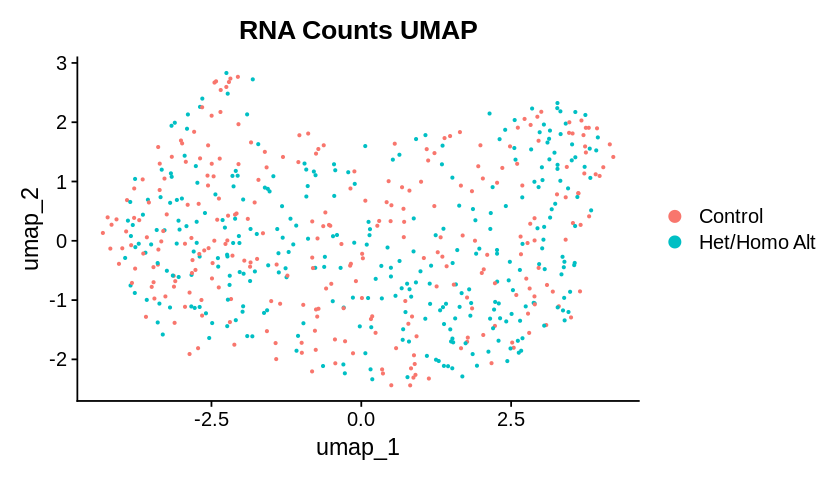

In [78]:
p1 = DimPlot(
  object = seu,
  group.by = 'HomoRef_v_Other',
  reduction = 'umap', 
  # split.by = "crispr", 
  ncol = 1, 
  pt.size = 0.5, 
)
p1 + ggtitle("RNA Counts UMAP")
  # cols = c("grey39","goldenrod3")) +
  # ggtitle("Perturbation Status") +


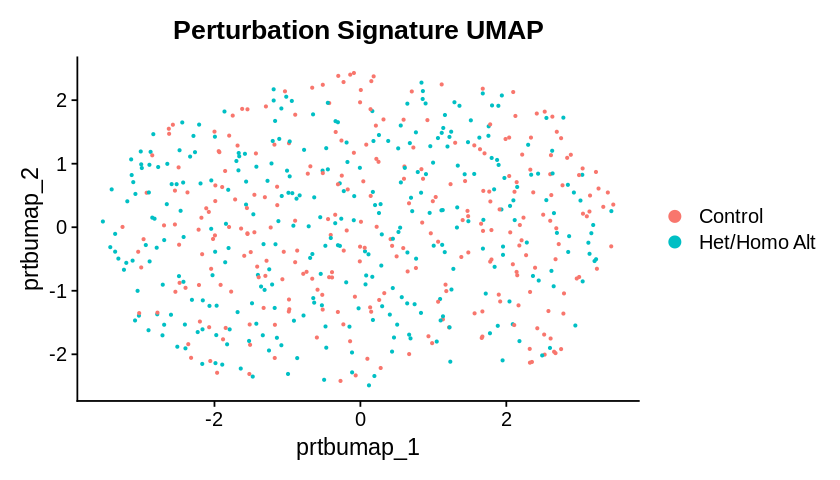

In [79]:
p1 = DimPlot(
  object = seu,
  group.by = 'HomoRef_v_Other',
  reduction = 'prtbumap', 
  # split.by = "crispr", 
  ncol = 1, 
  pt.size = 0.5, 
)
p1 + ggtitle("Perturbation Signature UMAP")
  # cols = c("grey39","goldenrod3")) +
  # ggtitle("Perturbation Status") +


In [80]:
# Run mixscape.
seu <- RunMixscape(
  object = seu, 
  assay = "PRTB", 
  slot = "scale.data",  # "scale.data",
  labels = "HomoRef_v_Other", 
  nt.class.name = "Control", 
  min.de.genes = min_de_genes, 
  logfc.threshold = logfc_threshold,
  iter.num = 10, 
  de.assay = "RNA", 
  verbose = TRUE,
  prtb.type = "KO", 
  # split.by = "CellType_Index"
)

Processing Het/Homo Alt

Finding new perturbation gene set

Classifying cells for: 

  Fewer than 2 DE genes for Het/Homo Alt. Assigning cells as NP.



In [81]:
seu@meta.data[c('Edited_Index' ,'genotype')] %>% table

            genotype
Edited_Index   1   2   3   9  15  16  17  20
     Control   0  42   0   0   0   0   0   0
     Edited  160 231 148   1   1   1   1   1

In [82]:
seu@meta.data[c('mixscape_class' ,'genotype')] %>% table

                 genotype
mixscape_class      1   2   3   9  15  16  17  20
  Control           0 271   0   1   0   0   1   1
  Het/Homo Alt NP 160   2 148   0   1   1   0   0

In [83]:
seu@meta.data[c('mixscape_class' ,'Dosage')] %>% table

                 Dosage
mixscape_class      0   1   2
  Control         274   0   0
  Het/Homo Alt NP   0 152 160

  mixscape_class.global Dosage Freq
1               Control      0  274
2                    NP      0    0
3               Control      1    0
4                    NP      1  152
5               Control      2    0
6                    NP      2  160
  mixscape_class.global Dosage Freq
1               Control      0  274
2                    NP      0    0
3               Control      1    0
4                    NP      1  152
5               Control      2    0
6                    NP      2  160
7                    KO      0    0
8                    KO      1    0
9                    KO      2    0


Warning message in geom_segment(aes(x = 0.5, y = 1.5, xend = 1.5, yend = 1.5), size = 1):
“All aesthetics have length 1, but the data has 9 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”
Warning message in geom_segment(aes(x = 0.5, y = 3.5, xend = 1.5, yend = 3.5), size = 1):
“All aesthetics have length 1, but the data has 9 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”
Warning message in geom_segment(aes(x = 0.5, y = 1.5, xend = 0.5, yend = 3.5), size = 1):
“All aesthetics have length 1, but the data has 9 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”
Warning message in geom_segment(aes(x = 1.5, y = 1.5, xend = 1.5, yend = 3.5), size = 1):
“All aesthetics have length 1, but the data has 9 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”
Warning message in geom_segm

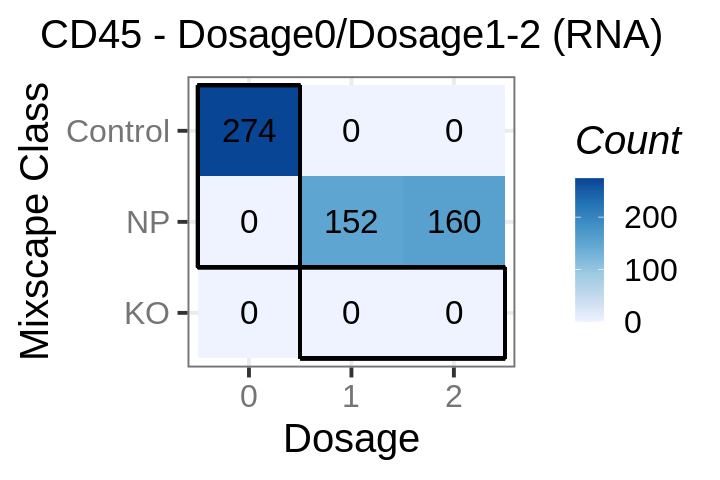

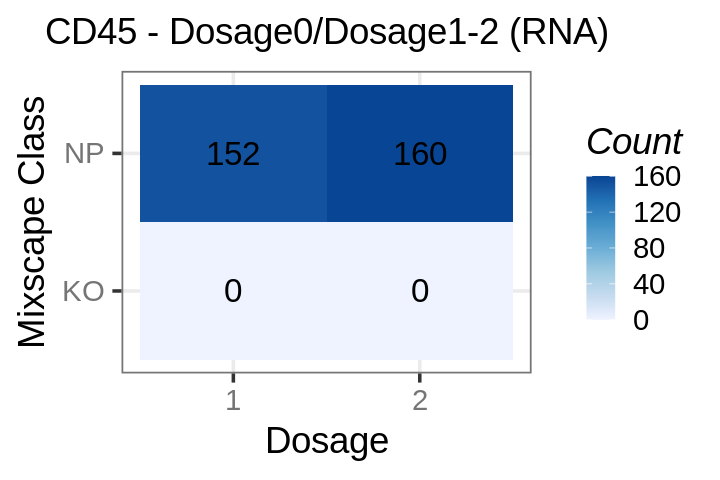

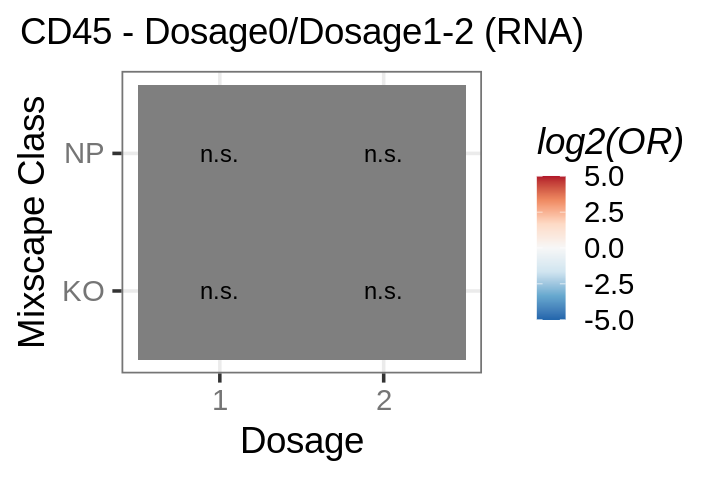

In [84]:


dat = seu@meta.data
dat = dat[dat['Dosage'] %>% drop_na() %>% rownames, ]
dat[['Dosage']] = factor(dat[['Dosage']], levels = c(0, 1, 2))
dat = dat[c('mixscape_class.global' ,'Dosage')] %>% table %>% as.data.frame
dat[['mixscape_class.global']] = factor(dat[['mixscape_class.global']], levels = c('KO', 'NP', 'Control'))
print(dat)
if (!('KO' %in% (dat[['mixscape_class.global']] %>% unique)) ){
    dat = rbind(dat, data.frame(mixscape_class.global = c('KO'), Dosage = c(0, 1, 2), Freq =c(0, 0, 0)))
}
print(dat)

fig.size(4, 6)
p1 = ggplot(dat)+
    geom_tile(aes(x=Dosage, y=mixscape_class.global,fill =Freq))+
    geom_text(aes(x=Dosage, y=mixscape_class.global, label = round(Freq, 1)), size = 7) +
    scale_fill_distiller(palette = 'Blues', direction = 1)+
    theme_pres(base_size = 24)+
    ylab('Mixscape Class')+
    labs(fill = 'Count')+
    geom_segment(aes(x = .5, y = 1.5, xend = 1.5, yend = 1.5), size = 1)+
    geom_segment(aes(x = .5, y = 3.5, xend = 1.5, yend = 3.5), size = 1)+
    geom_segment(aes(x = .5, y = 1.5, xend = .5, yend = 3.5), size = 1)+
    geom_segment(aes(x = 1.5, y = 1.5, xend = 1.5, yend = 3.5), size = 1)+

    geom_segment(aes(x = 1.5, y = 1.5, xend = 3.5, yend = 1.5), size = 1)+
    geom_segment(aes(x = 1.5, y = .5, xend = 3.5, yend = .5), size = 1)+
    geom_segment(aes(x = 1.5, y = .5, xend = 1.5, yend = 1.5), size = 1)+
    geom_segment(aes(x = 3.5, y = .5, xend = 3.5, yend = 1.5), size = 1)+

    ggtitle(paste0(exp_name))+
    theme(plot.title = element_text(size = 24))
    print(p1)

if (edit_var=='Edited_Index'){
    dat_filt = dat %>% filter(`mixscape_class.global`!='Control') } else if (edit_var=='HomoRef_v_Other'){
    dat_filt = dat %>% filter(`mixscape_class.global`!='Control', `Dosage`!=0)} else if (edit_var=='HomoAlt_v_Other'){
    dat_filt = dat %>% filter(`mixscape_class.global`!='Control', `Dosage`!=0, `Dosage`!=1)} 

# if (edit_var=='Edited_Index'){
#     dat_filt = dat %>% filter(`mixscape_class.global`!='Control') }

count_max = dat_filt['Freq'] %>% max
fig.size(4, 6)
p2 = ggplot(dat_filt)+
    geom_tile(aes(x=Dosage, y=mixscape_class.global,fill =Freq))+
    geom_text(aes(x=Dosage, y=mixscape_class.global, label = round(Freq, 1)), size = 7) +
    scale_fill_distiller(palette = 'Blues', direction = 1,  limits = c(0, count_max), oob = scales::squish)+
    theme_pres(base_size = 22)+
    ylab('Mixscape Class')+
    labs(fill = 'Count')+
    # geom_segment(aes(x = .5, y = 1.5, xend = 1.5, yend = 1.5), size = 1)+
    # geom_segment(aes(x = .5, y = 3.5, xend = 1.5, yend = 3.5), size = 1)+
    # geom_segment(aes(x = .5, y = 1.5, xend = .5, yend = 3.5), size = 1)+
    # geom_segment(aes(x = 1.5, y = 1.5, xend = 1.5, yend = 3.5), size = 1)+

    # geom_segment(aes(x = 1.5, y = 1.5, xend = 3.5, yend = 1.5), size = 1)+
    # geom_segment(aes(x = 1.5, y = .5, xend = 3.5, yend = .5), size = 1)+
    # geom_segment(aes(x = 1.5, y = .5, xend = 1.5, yend = 1.5), size = 1)+
    # geom_segment(aes(x = 3.5, y = .5, xend = 3.5, yend = 1.5), size = 1)+

    ggtitle(paste0(exp_name))+
    theme(plot.title = element_text(size = 22))
print(p2)

dat_filt['OR'] = 0
dat_filt['pval'] = 1

for (i in rownames(dat_filt)){
    mixclass = dat_filt[i, 'mixscape_class.global']
    dosage = dat_filt[i, 'Dosage']

    mat = matrix(0, 2, 2)

    mat[1, 1] = (dat_filt %>% filter(Dosage == dosage, mixscape_class.global==mixclass))[['Freq']] %>% sum
    mat[1, 2] = (dat_filt %>% filter(Dosage != dosage, mixscape_class.global==mixclass))[['Freq']] %>% sum
    mat[2, 1] = (dat_filt %>% filter(Dosage == dosage, mixscape_class.global!=mixclass))[['Freq']] %>% sum
    mat[2, 2] = (dat_filt %>% filter(Dosage != dosage, mixscape_class.global!=mixclass))[['Freq']] %>% sum

    pval = fisher.test(mat)$p.value
    or = fisher.test(mat)$estimate

    dat_filt[i, c('OR', 'pval')] = c(or, pval)

}

dat_filt[['padj']] = p.adjust(dat_filt[['pval']], 'BH')
dat_filt = dat_filt %>% mutate(label = ifelse(padj < 0.05, '*', 'n.s.'))
dat_filt['log2OR'] = log2(dat_filt['OR'])

fig.size(4, 6)
p3 = ggplot(dat_filt)+
    geom_tile(aes(x=Dosage, y=mixscape_class.global,fill =log2OR))+
    geom_text(aes(x=Dosage, y=mixscape_class.global, label = label), size = 5) +
    scale_fill_distiller(palette = 'RdBu', direction = -1, limits = c(vmin, vmax), oob = scales::squish)+
    theme_pres(base_size = 22)+
    ylab('Mixscape Class')+
    labs(fill = 'log2(OR)')+
    # geom_segment(aes(x = .5, y = 1.5, xend = 1.5, yend = 1.5), size = 1)+
    # geom_segment(aes(x = .5, y = 3.5, xend = 1.5, yend = 3.5), size = 1)+
    # geom_segment(aes(x = .5, y = 1.5, xend = .5, yend = 3.5), size = 1)+
    # geom_segment(aes(x = 1.5, y = 1.5, xend = 1.5, yend = 3.5), size = 1)+

    # geom_segment(aes(x = 1.5, y = 1.5, xend = 3.5, yend = 1.5), size = 1)+
    # geom_segment(aes(x = 1.5, y = .5, xend = 3.5, yend = .5), size = 1)+
    # geom_segment(aes(x = 1.5, y = .5, xend = 1.5, yend = 1.5), size = 1)+
    # geom_segment(aes(x = 3.5, y = .5, xend = 3.5, yend = 1.5), size = 1)+

    ggtitle(paste0(exp_name))+
    theme(plot.title = element_text(size = 22))
print(p3)


Warning message:
“Use of `dat$Freq` is discouraged.
ℹ Use `Freq` instead.”
Warning message in geom_segment(aes(x = 0.5, y = 2.5, xend = 3.5, yend = 2.5), size = 1, :
“All aesthetics have length 1, but the data has 9 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”


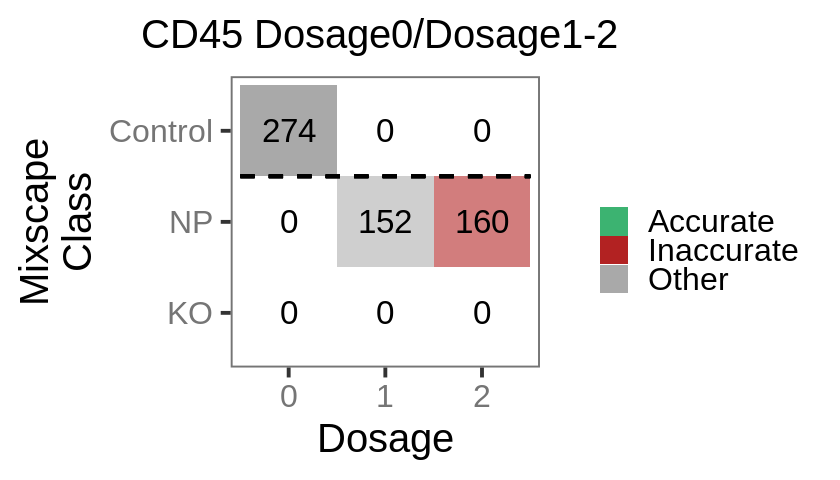

In [88]:
# pdf(file = '../Figures/Mixscape_CD45_Dosage0Dosage12.pdf',  height = 4, width = 7)

dat = dat %>% mutate(group = ifelse(((`mixscape_class.global` == 'NP') & (Dosage == 0)) |
                                ((`mixscape_class.global` == 'KO') & (Dosage == 2)), 'Accurate', 
                              
                    ifelse(((`mixscape_class.global` == 'KO') & (Dosage == 0)) |
                                ((`mixscape_class.global` == 'NP') & (Dosage == 2)), 'Inaccurate',
           
                              'Other')))

# dat = dat %>% mutate(color = ifelse(group == 'Accurate', 'green', ifelse(group == 'Inaccurate', 'red', 'grey')))

fig.size(4, 7)
ggplot(dat, aes(x=Dosage, y=mixscape_class.global))+
        geom_tile(aes(fill = group, alpha = Freq/sum(dat$Freq)))+
        geom_text(aes(x=Dosage, y=mixscape_class.global, label = round(Freq, 1)), size = 7) +
        scale_fill_manual(values = c("Other" = "darkgray", "Inaccurate" = "firebrick", "Accurate" = "mediumseagreen")) +  # Manually set colors
        scale_alpha_continuous(range = c(0, 1)) +
        guides(
        alpha = "none")+
        theme_pres(base_size = 24)+
        ylab('Mixscape\nClass')+
        labs(fill = '')+
        geom_segment(aes(x = .5, y = 2.5, xend = 3.5, yend = 2.5), size = 1, linetype = 2)+
        ggtitle(exp_name %>% str_replace('\\(RNA\\)', '') %>% str_replace('\\(ADT\\)', '') %>%
                str_replace(' -', ''))+
        theme(plot.title = element_text(size = 24),
                        panel.grid.major = element_blank(),
             )
# dev.off()

In [89]:
seu@meta.data %>% write_csv("../Misc/CD45_MixscapeClasses_Dosage0Dosage12_20250129.csv")

In [ ]:
# Compare to presto

In [274]:
library(presto)

Loading required package: Rcpp



In [275]:
PRTB_presto = wilcoxauc(seu@assays$PRTB@scale.data, seu@meta.data[['HomoRef_v_Other']])

In [277]:
logfc_threshold

[1] 0.05

In [278]:
PRTB_presto %>% filter(padj < 0.05, logFC > logfc_threshold) 

feature   group        avgExpr    logFC      statistic auc      
1  CHCHD10   Control      0.12411422 0.23593597 51843.5   0.5873553
2  CCR7      Control      0.16058635 0.30526798 51527.0   0.5837695
3  HSP90AA1  Control      0.10916839 0.20752457 51333.0   0.5815716
4  TRDC      Het/Homo Alt 0.03546464 0.07482789 51261.5   0.5807616
5  LLGL2     Het/Homo Alt 0.03361313 0.07092131 52648.0   0.5964698
6  MAOA      Het/Homo Alt 0.02542617 0.05364742 51037.5   0.5782238
7  QPRT      Het/Homo Alt 0.03204068 0.06760357 50934.0   0.5770512
8  CSF1      Het/Homo Alt 0.04524018 0.09545357 50983.0   0.5776063
9  ARFGEF1   Het/Homo Alt 0.02657748 0.05607660 51052.0   0.5783881
10 TRIM7     Het/Homo Alt 0.02679940 0.05654482 51647.0   0.5851290
11 SH3GLB2   Het/Homo Alt 0.05121919 0.10806885 52811.5   0.5983221
12 AEBP2     Het/Homo Alt 0.04079761 0.08608006 50923.5   0.5769322
13 SLC7A1    Het/Homo Alt 0.03212637 0.06778436 52194.5   0.5913319
14 ADCK5     Het/Homo Alt 0.02788105 0.05882705 54496.0   0.6174065
15 ZFHX2-AS1 Het/Homo Alt 0.02769020 0.05842436 50675.5   0.5741225
16 EXOSC2    Het/Homo Alt 0.04526672 0.09550956 51502.0   0.5834863
17 CTNS      Het/Homo Alt 0.04770172 0.10064725 52748.0   0.5976027
18 ACOX3     Het/Homo Alt 0.02823060 0.05956456 51554.0   0.5840754
19 KLHL6     Het/Homo Alt 0.03729309 0.07868577 51896.5   0.5879557
20 CLPB      Het/Homo Alt 0.04898434 0.10335348 51942.5   0.5884769
21 TWNK      Het/Homo Alt 0.03902783 0.08234596 52209.5   0.5915018
22 CRELD2    Het/Homo Alt 0.03797186 0.08011792 51842.5   0.5873439
23 MYEF2     Het/Homo Alt 0.02515976 0.05308531 51086.5   0.5787789
   pval         padj         pct_in pct_out
1  2.310922e-04 0.0236163261 100    100    
2  4.136975e-04 0.0295943771 100    100    
3  5.848768e-04 0.0324931552 100    100    
4  1.086822e-04 0.0181137027 100    100    
5  2.914843e-05 0.0088383099 100    100    
6  5.468425e-04 0.0321672041 100    100    
7  1.123969e-03 0.0476362963 100    100    
8  1.068310e-03 0.0464482540 100    100    
9  9.344678e-04 0.0434636179 100    100    
10 1.196315e-04 0.0184048402 100    100    
11 3.000804e-05 0.0088383099 100    100    
12 1.143271e-03 0.0476362963 100    100    
13 1.069118e-04 0.0181137027 100    100    
14 4.848481e-07 0.0009696962 100    100    
15 1.197726e-03 0.0488867621 100    100    
16 4.143213e-04 0.0295943771 100    100    
17 2.317217e-05 0.0088383099 100    100    
18 3.817723e-04 0.0293670982 100    100    
19 2.063882e-04 0.0236163261 100    100    
20 1.904142e-04 0.0236163261 100    100    
21 5.020667e-05 0.0100413342 100    100    
22 2.310105e-04 0.0236163261 100    100    
23 7.154525e-04 0.0357726238 100    100

In [289]:
counts_presto = wilcoxauc(seu@assays$RNA$scale.data, seu@meta.data[['HomoRef_v_Other']])

In [290]:
counts_presto %>% filter(padj < 0.05, logFC > logfc_threshold) 

feature group        avgExpr   logFC     statistic auc       pval        
1 CHCHD10 Het/Homo Alt 0.1768901 0.3732255 53439     0.6054313 3.856274e-06
  padj        pct_in pct_out
1 0.007712548 100    100

In [85]:
# Run mixscape.
seu <- RunMixscape(
  object = seu, 
  assay = "PRTB", 
  slot = "scale.data",  # "scale.data",
  labels = "HomoRef_v_Other", 
  nt.class.name = "Control", 
  min.de.genes = min_de_genes, 
  logfc.threshold = 0.01,
  iter.num = 10, 
  de.assay = "RNA", 
  verbose = TRUE,
  prtb.type = "KO", 
  # split.by = "CellType_Index"
)

Processing Het/Homo Alt

Finding new perturbation gene set

Classifying cells for: 

  Fewer than 2 DE genes for Het/Homo Alt. Assigning cells as NP.



In [86]:
# Run mixscape.
seu <- RunMixscape(
  object = seu, 
  assay = "PRTB", 
  slot = "scale.data",  # "scale.data",
  labels = "HomoRef_v_Other", 
  nt.class.name = "Control", 
  min.de.genes = min_de_genes, 
  logfc.threshold = 0.005,
  iter.num = 10, 
  de.assay = "RNA", 
  verbose = TRUE,
  prtb.type = "KO", 
  # split.by = "CellType_Index"
)

Processing Het/Homo Alt

Finding new perturbation gene set

Classifying cells for: 

  Fewer than 2 DE genes for Het/Homo Alt. Assigning cells as NP.



In [87]:
# Run mixscape.
seu <- RunMixscape(
  object = seu, 
  assay = "PRTB", 
  slot = "scale.data",  # "scale.data",
  labels = "HomoRef_v_Other", 
  nt.class.name = "Control", 
  min.de.genes = min_de_genes, 
  logfc.threshold = 0.001,
  iter.num = 10, 
  de.assay = "RNA", 
  verbose = TRUE,
  prtb.type = "KO", 
  # split.by = "CellType_Index"
)

Processing Het/Homo Alt

Finding new perturbation gene set

Classifying cells for: 

  Fewer than 2 DE genes for Het/Homo Alt. Assigning cells as NP.



In [213]:
edit_var

[1] "HomoRef_v_Other"

#### [Control, Het]/Homo Alt

In [90]:
exp_name = paste0(name, ' - Dosage0-1/Dosage2 (RNA)')
name
exp_name
edit_var = 'HomoAlt_v_Other'
edit_var

[1] "CD45"

[1] "CD45 - Dosage0-1/Dosage2 (RNA)"

[1] "HomoAlt_v_Other"

In [91]:
seu = CreateSeuratObject(counts = rna_counts_filt[, rownames(meta_full_filt)], 
                          project = name)


Warning message:
“Data is of class dgTMatrix. Coercing to dgCMatrix.”


In [92]:
seu = AddMetaData(seu, meta_full_filt)

In [459]:
seu@meta.data %>% head(2)

orig.ident nCount_RNA nFeature_RNA DNA_Barcode
AACATCTCTGTGAC_CCGCATATTC CD45       20034      2774         CGGCAATGGA 
AAGCTCCACTCAGA_CCGCATATTC CD45        3036      1150         CGGCAATGGA 
                          Well_ID
AACATCTCTGTGAC_CCGCATATTC A1     
AAGCTCCACTCAGA_CCGCATATTC A10    
                          Alleles                                                                         
AACATCTCTGTGAC_CCGCATATTC TTTTTTGGTTAAGGAAAAGGTTGGAAAAGGCCTTGGCCAACCAATTTTAAAAGGGGAAGGTTAAAATTTTAACCCCTTGG
AAGCTCCACTCAGA_CCGCATATTC TTTTTTGGTTAAGGAAAAGGTTGGAAAAGGCCTTGGCCAACCAATTCCAAAAGGGGAAGGTTAAAATTTTAACCCCTTGG
                          Reference                                                                       
AACATCTCTGTGAC_CCGCATATTC TTTTTTGGTTAAGGAAAAGGTTGGAAAAGGCCTTGGCCAACCAATTCCAAAAGGGGAAGGTTAAAATTTTAACCCCTTGG
AAGCTCCACTCAGA_CCGCATATTC TTTTTTGGTTAAGGAAAAGGTTGGAAAAGGCCTTGGCCAACCAATTCCAAAAGGGGAAGGTTAAAATTTTAACCCCTTGG
                          genotype PlateLabel Condition ⋯ Edited_Index
AACATCTCTGTGAC_CCGCATATTC 1        CD45_P3    CD45      ⋯ Edited      
AAGCTCCACTCAGA_CCGCATATTC 2        CD45_P3    CD45      ⋯ Edited      
                          CD45KO_Index genotype_count nUMI.x nGenes.x nUMI.y
AACATCTCTGTGAC_CCGCATATTC KO           165            13682  147      20034 
AAGCTCCACTCAGA_CCGCATATTC WT           387             3975  128       3036 
                          nGenes.y Dosage HomoRef_v_Other HomoAlt_v_Other
AACATCTCTGTGAC_CCGCATATTC 2774     2      Het/Homo Alt    Homo Alt       
AAGCTCCACTCAGA_CCGCATATTC 1150     0      Control         Control

In [93]:
# Prepare RNA assay for dimensionality reduction: 
# Normalize data, find variable features and scale data.
DefaultAssay(object = seu) = 'RNA'
seu = NormalizeData(object = seu) %>% FindVariableFeatures() %>% ScaleData()

Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix



In [94]:
# Run Principle Component Analysis (PCA) to reduce the dimensionality of the data.
seu <- RunPCA(object = seu)


PC_ 1 
Positive:  MALAT1, BHLHE40, ADM, HILPDA, BTG1, TSC22D3, ANGPTL4, SYTL3, DDIT3, CLMN 
	   CAPN12, SPAG4, ZC3H12D, TREM1, SH3D21, UBR5, TXNIP, IL1RN, CCL5, HERC3 
	   TET2, CCL3, PPP2R5B, ARL4C, HSPA1B, ZFP36, PMCH, GNLY, CCL3L1, MAF 
Negative:  TUBA1B, TUBB4B, AURKB, RRM2, DTYMK, TUBB, TPX2, CCNA2, HJURP, CDCA5 
	   MKI67, CKS2, KPNA2, UBE2C, CDCA8, KIF22, SMC4, CDKN3, UBE2S, CDC20 
	   CCNB1, CEP55, CENPA, CDCA2, YBX1, PLK1, PSMC3, SRM, PKMYT1, AURKA 
PC_ 2 
Positive:  MCM5, SRM, LTA, RRP9, NAPRT, MRPS26, SLC25A39, CHCHD10, TNFSF14, UCP2 
	   WDR18, PTGES2, CLTB, FARSA, BOP1, GPATCH4, HAGHL, RRP1, GJB2, FLAD1 
	   CD320, SLC5A6, PARD6A, RELL2, MECR, TNFRSF4, MATK, TRIM47, SNRNP25, NDUFV3 
Negative:  PLK1, CDC20, CCNB1, TPX2, UBE2S, AURKB, UBE2C, AURKA, CDKN3, CCNA2 
	   CKS2, CENPA, PIF1, MKI67, PSRC1, HJURP, MXD3, ASPM, CDCA8, TUBB4B 
	   GTSE1, CDCA2, KIF22, TUBB, SMC4, ARHGEF39, KIF2C, KPNA2, CCNF, CKAP2L 
PC_ 3 
Positive:  HILPDA, CAMTA2, SH2D2A, CAVIN3, CYB5R2, FARSA, AC147

In [95]:
# Run Uniform Manifold Approximation and Projection (UMAP) to visualize clustering in 2-D.
seu <- RunUMAP(object = seu, dims = 1:40)


12:43:00 UMAP embedding parameters a = 0.9922 b = 1.112

12:43:00 Read 586 rows and found 40 numeric columns

12:43:00 Using Annoy for neighbor search, n_neighbors = 30

12:43:00 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:43:00 Writing NN index file to temp file /tmp/RtmpKcIvRQ/file1921784140fc

12:43:00 Searching Annoy index using 1 thread, search_k = 3000

12:43:00 Annoy recall = 100%

12:43:01 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

12:43:02 Initializing from normalized Laplacian + noise (using RSpectra)

12:43:02 Commencing optimization for 500 epochs, with 22808 positive edges

12:43:05 Optimization finished



In [96]:
# Calculate perturbation signature (PRTB).
seu <- CalcPerturbSig(
  object = seu, 
  assay = "RNA", 
  slot = "data", 
  gd.class = edit_var, 
  nt.cell.class = "Control", 
  reduction = "pca", 
  ndims = 40, 
  num.neighbors = n_neighbors, 
  # split.by = "CellType_Index", 
  new.assay.name = "PRTB")



Processing rep1

Warning message:
“Layer counts isn't present in the assay object; returning NULL”


In [97]:
seu

An object of class Seurat 
38591 features across 586 samples within 2 assays 
Active assay: RNA (36591 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: PRTB
 2 dimensional reductions calculated: pca, umap

In [98]:
seu@assays$PRTB

Assay data with 2000 features for 586 cells
First 10 features:
 CCL3, GZMB, CCL5, LTA, DNAJB1, GNLY, IL13, CCL22, HSPH1, OSM 

In [99]:
# Prepare PRTB assay for dimensionality reduction: 
# Normalize data, find variable features and center data.
DefaultAssay(object = seu) <- 'PRTB'

# Use variable features from RNA assay.
VariableFeatures(object = seu) <- VariableFeatures(object = seu[["RNA"]])
seu <- ScaleData(object = seu, do.scale = F, do.center = T)


Centering data matrix



In [100]:
# Run PCA to reduce the dimensionality of the data.
seu <- RunPCA(object = seu, reduction.key = 'prtbpca', reduction.name = 'prtbpca')

# Run UMAP to visualize clustering in 2-D.
seu <- RunUMAP(
  object = seu, 
  dims = 1:40, 
  reduction = 'prtbpca', 
  reduction.key = 'prtbumap', 
  reduction.name = 'prtbumap')


Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from prtbpca to prtbpca_”
prtbpca_ 1 
Positive:  DNAJB1, MALAT1, ERN1, PGGHG, SAC3D1, DNAJC21, CTSD, CDKN3, TPX2, FES 
	   RASSF7, PARP14, PRF1, EIF4G3, MBD3, KIF2C, OASL, CTAG2, G0S2, MYL9 
	   EXOSC2, CHD7, PPP2R5D, SH3GLB2, BTAF1, AEBP2, C11orf49, UBE2C, CA7, CDCA8 
Negative:  LTA, DUSP2, MIR155HG, YBX1, LTB, FARSA, CCR7, TIMP1, CAMTA2, NINJ1 
	   MCM5, UCP2, ARID5A, SH2D2A, ZBTB32, CDT1, TNFRSF18, TUBB, TNFRSF4, SRM 
	   MRPS26, ANGPTL4, BTG1, NAPSA, IER3, HILPDA, FOXP3, CDKN1A, PSMC3, DBNL 
prtbpca_ 2 
Positive:  LTA, MIR155HG, UCP2, SMARCA4, SRM, IFI6, HSPA8, LGALS3BP, TMEM173, MX1 
	   TIMM50, RABEP1, TNFSF14, TIMP1, LGALS9, EGLN2, DCXR, CYB5R2, LRSAM1, AC147651.4 
	   TSC22D3, RRAS, RXRA, UROS, PLEKHJ1, STAP2, DCTN2, ISG15, SLC25A1, LMF2 
Negative:  GZMB, TNFRSF18, TRBC1, PRF1, SH2D2A, NINJ1, BHLHE40, SYTL3, ALOX5AP, DUSP2 
	   TUBA4A, OASL, GNLY, RGS16, MALAT1, PHGDH, FO

In [101]:
seu

An object of class Seurat 
38591 features across 586 samples within 2 assays 
Active assay: PRTB (2000 features, 2000 variable features)
 2 layers present: data, scale.data
 1 other assay present: RNA
 4 dimensional reductions calculated: pca, umap, prtbpca, prtbumap

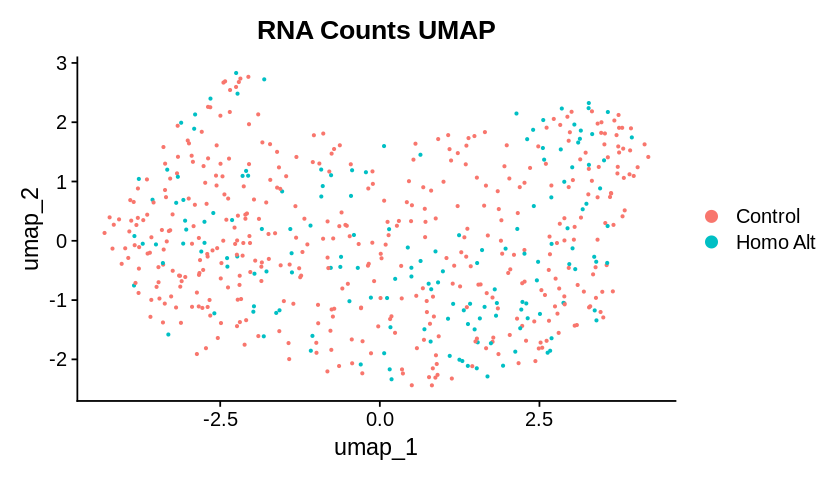

In [102]:
p1 = DimPlot(
  object = seu,
  group.by = edit_var,
  reduction = 'umap', 
  # split.by = "crispr", 
  ncol = 1, 
  pt.size = 0.5, 
)
p1 + ggtitle("RNA Counts UMAP")
  # cols = c("grey39","goldenrod3")) +
  # ggtitle("Perturbation Status") +


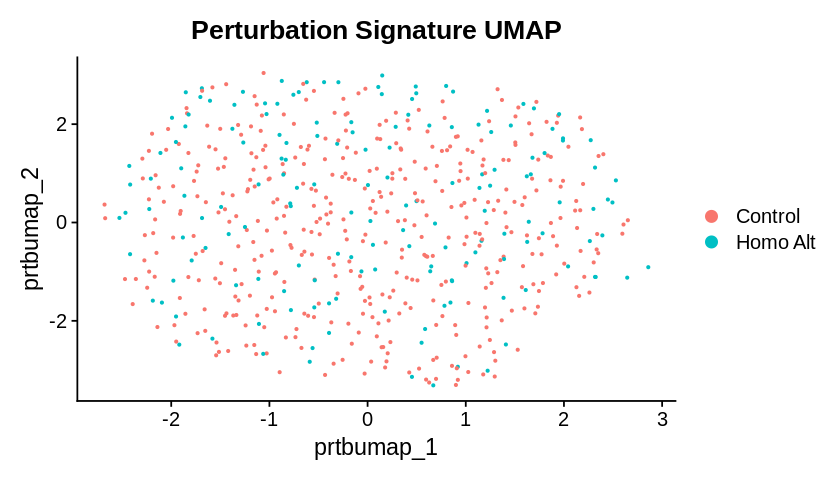

In [103]:
p1 = DimPlot(
  object = seu,
  group.by = edit_var,
  reduction = 'prtbumap', 
  # split.by = "crispr", 
  ncol = 1, 
  pt.size = 0.5, 
)
p1 + ggtitle("Perturbation Signature UMAP")
  # cols = c("grey39","goldenrod3")) +
  # ggtitle("Perturbation Status") +


In [104]:
# Run mixscape.
seu <- RunMixscape(
  object = seu, 
  assay = "PRTB", 
  slot = "scale.data",  # "scale.data",
  labels = edit_var, 
  nt.class.name = "Control", 
  min.de.genes = min_de_genes, 
  logfc.threshold = logfc_threshold,
  iter.num = 10, 
  de.assay = "RNA", 
  verbose = TRUE,
  prtb.type = "KO", 
  # split.by = "CellType_Index"
)


Processing Homo Alt

Finding new perturbation gene set

Computing perturbation signature for missing features.

Warning message:
“Different cells and/or features from existing assay PRTB”
Warning message:
“Layer counts isn't present in the assay object; returning NULL”
Classifying cells for: 

  Homo Alt



number of iterations= 559 
number of iterations= 265 
number of iterations= 231 
number of iterations= 234 


  mixscape_class.global Dosage Freq
1               Control      0  274
2                    KO      0    0
3                    NP      0    0
4               Control      1  152
5                    KO      1    0
6                    NP      1    0
7               Control      2    0
8                    KO      2  105
9                    NP      2   55
  mixscape_class.global Dosage Freq
1               Control      0  274
2                    KO      0    0
3                    NP      0    0
4               Control      1  152
5                    KO      1    0
6                    NP      1    0
7               Control      2    0
8                    KO      2  105
9                    NP      2   55


Warning message in geom_segment(aes(x = 0.5, y = 1.5, xend = 1.5, yend = 1.5), size = 1):
“All aesthetics have length 1, but the data has 9 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”
Warning message in geom_segment(aes(x = 0.5, y = 3.5, xend = 1.5, yend = 3.5), size = 1):
“All aesthetics have length 1, but the data has 9 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”
Warning message in geom_segment(aes(x = 0.5, y = 1.5, xend = 0.5, yend = 3.5), size = 1):
“All aesthetics have length 1, but the data has 9 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”
Warning message in geom_segment(aes(x = 1.5, y = 1.5, xend = 1.5, yend = 3.5), size = 1):
“All aesthetics have length 1, but the data has 9 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”
Warning message in geom_segm

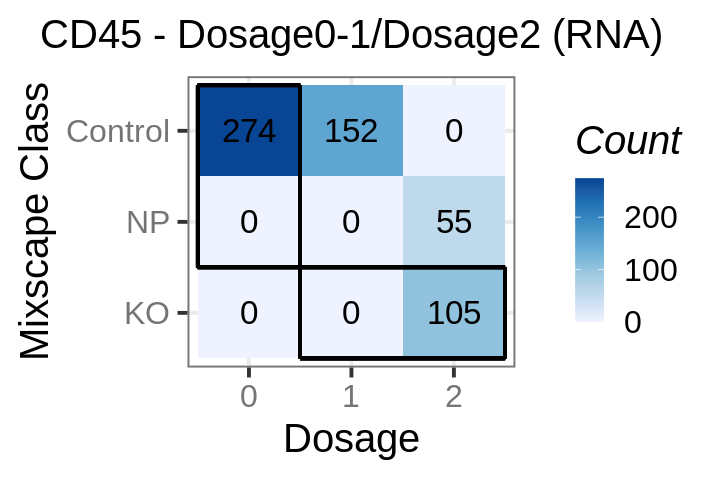

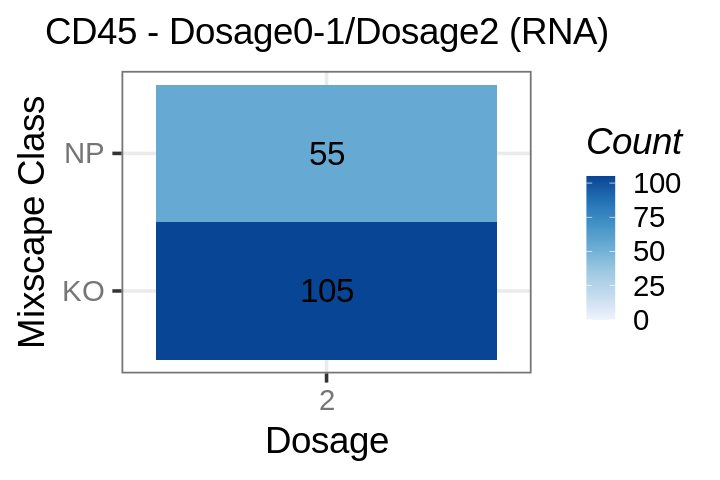

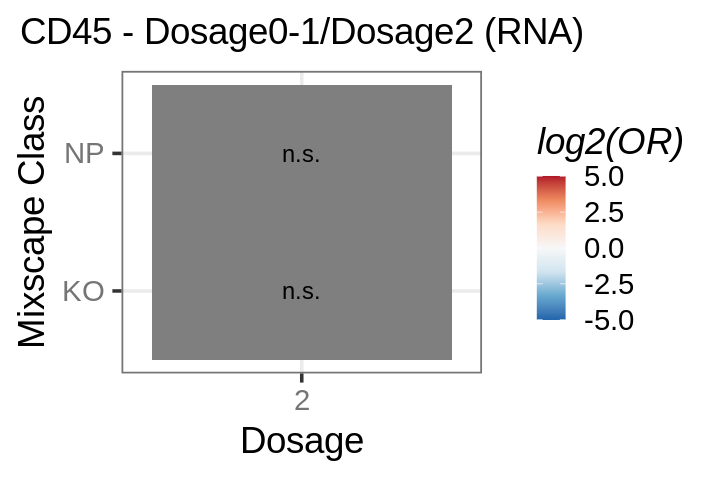

In [105]:
dat = seu@meta.data
dat = dat[dat['Dosage'] %>% drop_na() %>% rownames, ]
dat[['Dosage']] = factor(dat[['Dosage']], levels = c(0, 1, 2))
dat = dat[c('mixscape_class.global' ,'Dosage')] %>% table %>% as.data.frame
dat[['mixscape_class.global']] = factor(dat[['mixscape_class.global']], levels = c('KO', 'NP', 'Control'))
print(dat)
if (!('KO' %in% (dat[['mixscape_class.global']] %>% unique)) ){
    dat = rbind(dat, data.frame(mixscape_class.global = c('KO'), Dosage = c(0, 1, 2), Freq =c(0, 0, 0)))
}
print(dat)

fig.size(4, 6)
p1 = ggplot(dat)+
    geom_tile(aes(x=Dosage, y=mixscape_class.global,fill =Freq))+
    geom_text(aes(x=Dosage, y=mixscape_class.global, label = round(Freq, 1)), size = 7) +
    scale_fill_distiller(palette = 'Blues', direction = 1)+
    theme_pres(base_size = 24)+
    ylab('Mixscape Class')+
    labs(fill = 'Count')+
    geom_segment(aes(x = .5, y = 1.5, xend = 1.5, yend = 1.5), size = 1)+
    geom_segment(aes(x = .5, y = 3.5, xend = 1.5, yend = 3.5), size = 1)+
    geom_segment(aes(x = .5, y = 1.5, xend = .5, yend = 3.5), size = 1)+
    geom_segment(aes(x = 1.5, y = 1.5, xend = 1.5, yend = 3.5), size = 1)+

    geom_segment(aes(x = 1.5, y = 1.5, xend = 3.5, yend = 1.5), size = 1)+
    geom_segment(aes(x = 1.5, y = .5, xend = 3.5, yend = .5), size = 1)+
    geom_segment(aes(x = 1.5, y = .5, xend = 1.5, yend = 1.5), size = 1)+
    geom_segment(aes(x = 3.5, y = .5, xend = 3.5, yend = 1.5), size = 1)+

    ggtitle(paste0(exp_name))+
    theme(plot.title = element_text(size = 24))
    print(p1)

if (edit_var=='Edited_Index'){
    dat_filt = dat %>% filter(`mixscape_class.global`!='Control') } else if (edit_var=='HomoRef_v_Other'){
    dat_filt = dat %>% filter(`mixscape_class.global`!='Control', `Dosage`!=0)} else if (edit_var=='HomoAlt_v_Other'){
    dat_filt = dat %>% filter(`mixscape_class.global`!='Control', `Dosage`!=0, `Dosage`!=1)} 

# if (edit_var=='Edited_Index'){
#     dat_filt = dat %>% filter(`mixscape_class.global`!='Control') }

count_max = dat_filt['Freq'] %>% max
fig.size(4, 6)
p2 = ggplot(dat_filt)+
    geom_tile(aes(x=Dosage, y=mixscape_class.global,fill =Freq))+
    geom_text(aes(x=Dosage, y=mixscape_class.global, label = round(Freq, 1)), size = 7) +
    scale_fill_distiller(palette = 'Blues', direction = 1,  limits = c(0, count_max), oob = scales::squish)+
    theme_pres(base_size = 22)+
    ylab('Mixscape Class')+
    labs(fill = 'Count')+
    # geom_segment(aes(x = .5, y = 1.5, xend = 1.5, yend = 1.5), size = 1)+
    # geom_segment(aes(x = .5, y = 3.5, xend = 1.5, yend = 3.5), size = 1)+
    # geom_segment(aes(x = .5, y = 1.5, xend = .5, yend = 3.5), size = 1)+
    # geom_segment(aes(x = 1.5, y = 1.5, xend = 1.5, yend = 3.5), size = 1)+

    # geom_segment(aes(x = 1.5, y = 1.5, xend = 3.5, yend = 1.5), size = 1)+
    # geom_segment(aes(x = 1.5, y = .5, xend = 3.5, yend = .5), size = 1)+
    # geom_segment(aes(x = 1.5, y = .5, xend = 1.5, yend = 1.5), size = 1)+
    # geom_segment(aes(x = 3.5, y = .5, xend = 3.5, yend = 1.5), size = 1)+

    ggtitle(paste0(exp_name))+
    theme(plot.title = element_text(size = 22))
print(p2)

dat_filt['OR'] = 0
dat_filt['pval'] = 1

for (i in rownames(dat_filt)){
    mixclass = dat_filt[i, 'mixscape_class.global']
    dosage = dat_filt[i, 'Dosage']

    mat = matrix(0, 2, 2)

    mat[1, 1] = (dat_filt %>% filter(Dosage == dosage, mixscape_class.global==mixclass))[['Freq']] %>% sum
    mat[1, 2] = (dat_filt %>% filter(Dosage != dosage, mixscape_class.global==mixclass))[['Freq']] %>% sum
    mat[2, 1] = (dat_filt %>% filter(Dosage == dosage, mixscape_class.global!=mixclass))[['Freq']] %>% sum
    mat[2, 2] = (dat_filt %>% filter(Dosage != dosage, mixscape_class.global!=mixclass))[['Freq']] %>% sum

    pval = fisher.test(mat)$p.value
    or = fisher.test(mat)$estimate

    dat_filt[i, c('OR', 'pval')] = c(or, pval)

}

dat_filt[['padj']] = p.adjust(dat_filt[['pval']], 'BH')
dat_filt = dat_filt %>% mutate(label = ifelse(padj < 0.05, '*', 'n.s.'))
dat_filt['log2OR'] = log2(dat_filt['OR'])

fig.size(4, 6)
p3 = ggplot(dat_filt)+
    geom_tile(aes(x=Dosage, y=mixscape_class.global,fill =log2OR))+
    geom_text(aes(x=Dosage, y=mixscape_class.global, label = label), size = 5) +
    scale_fill_distiller(palette = 'RdBu', direction = -1, limits = c(vmin, vmax), oob = scales::squish)+
    theme_pres(base_size = 22)+
    ylab('Mixscape Class')+
    labs(fill = 'log2(OR)')+
    # geom_segment(aes(x = .5, y = 1.5, xend = 1.5, yend = 1.5), size = 1)+
    # geom_segment(aes(x = .5, y = 3.5, xend = 1.5, yend = 3.5), size = 1)+
    # geom_segment(aes(x = .5, y = 1.5, xend = .5, yend = 3.5), size = 1)+
    # geom_segment(aes(x = 1.5, y = 1.5, xend = 1.5, yend = 3.5), size = 1)+

    # geom_segment(aes(x = 1.5, y = 1.5, xend = 3.5, yend = 1.5), size = 1)+
    # geom_segment(aes(x = 1.5, y = .5, xend = 3.5, yend = .5), size = 1)+
    # geom_segment(aes(x = 1.5, y = .5, xend = 1.5, yend = 1.5), size = 1)+
    # geom_segment(aes(x = 3.5, y = .5, xend = 3.5, yend = 1.5), size = 1)+

    ggtitle(paste0(exp_name))+
    theme(plot.title = element_text(size = 22))
print(p3)


Warning message:
“Use of `dat$Freq` is discouraged.
ℹ Use `Freq` instead.”
Warning message in geom_segment(aes(x = 0.5, y = 2.5, xend = 3.5, yend = 2.5), size = 1, :
“All aesthetics have length 1, but the data has 9 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”


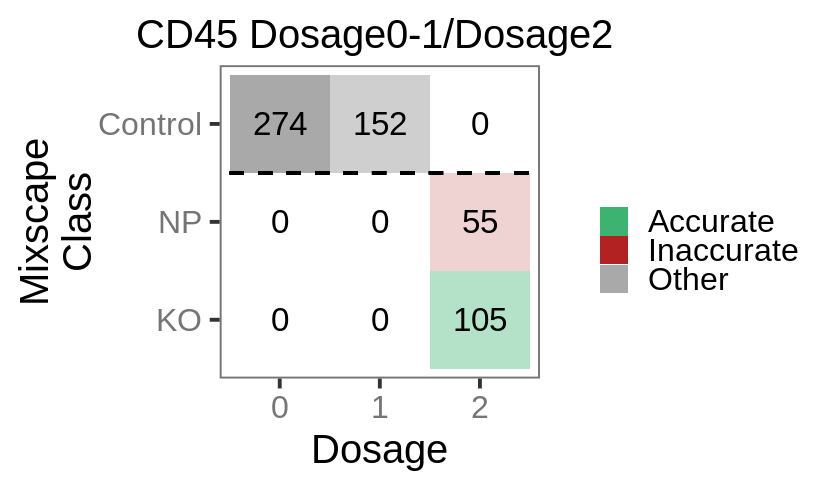

In [110]:
# pdf(file = '../Figures/Mixscape_CD45_Dosage01Dosage2.pdf',  height = 4, width = 7)

dat = dat %>% mutate(group = ifelse(((`mixscape_class.global` == 'NP') & (Dosage == 0)) |
                                ((`mixscape_class.global` == 'KO') & (Dosage == 2)), 'Accurate', 
                              
                    ifelse(((`mixscape_class.global` == 'KO') & (Dosage == 0)) |
                                ((`mixscape_class.global` == 'NP') & (Dosage == 2)), 'Inaccurate',
           
                              'Other')))

# dat = dat %>% mutate(color = ifelse(group == 'Accurate', 'green', ifelse(group == 'Inaccurate', 'red', 'grey')))

fig.size(4, 7)
ggplot(dat, aes(x=Dosage, y=mixscape_class.global))+
        geom_tile(aes(fill = group, alpha = Freq/sum(dat$Freq)))+
        geom_text(aes(x=Dosage, y=mixscape_class.global, label = round(Freq, 1)), size = 7) +
        scale_fill_manual(values = c("Other" = "darkgray", "Inaccurate" = "firebrick", "Accurate" = "mediumseagreen")) +  # Manually set colors
        scale_alpha_continuous(range = c(0, 1)) +
        guides(
        alpha = "none")+
        theme_pres(base_size = 24)+
        ylab('Mixscape\nClass')+
        labs(fill = '')+
        geom_segment(aes(x = .5, y = 2.5, xend = 3.5, yend = 2.5), size = 1, linetype = 2)+
        ggtitle(exp_name %>% str_replace('\\(RNA\\)', '') %>% str_replace('\\(ADT\\)', '') %>%
                str_replace(' -', ''))+
        theme(plot.title = element_text(size = 24),
                        panel.grid.major = element_blank(),
             )
# dev.off()

In [108]:
seu@meta.data %>% write_csv("../Misc/CD45_MixscapeClasses_Dosage01Dosage2_20250129.csv")

#### Run differential expression

In [173]:
seu = CreateSeuratObject(counts = rna_counts_filt, 
                          project = name)
seu = AddMetaData(seu, meta_full)

Warning message:
“Data is of class dgTMatrix. Coercing to dgCMatrix.”


In [176]:
meta_full['Dosage'] %>% table

Dosage
   0    1    2 <NA> 
 274  152  160   38 

In [174]:
library(MASS)

In [ ]:
# Load seu

In [503]:
seu@meta.data %>% head

orig.ident nCount_RNA nFeature_RNA DNA_Barcode
AACATCTCTGTGAC_CCGCATATTC CD45       20034      2774         CGGCAATGGA 
AAGCTCCACTCAGA_CCGCATATTC CD45        3036      1150         CGGCAATGGA 
AATGCCGTTACACA_CCGCATATTC CD45       12652      2557         CGGCAATGGA 
AATGCGCATACAGT_CCGCATATTC CD45        8328      2354         CGGCAATGGA 
AATGTCATCGCGCT_CCGCATATTC CD45       11286      2747         CGGCAATGGA 
ACAAGAGACTCCAA_CCGCATATTC CD45        7761      1779         CGGCAATGGA 
                          Well_ID
AACATCTCTGTGAC_CCGCATATTC A1     
AAGCTCCACTCAGA_CCGCATATTC A10    
AATGCCGTTACACA_CCGCATATTC A13    
AATGCGCATACAGT_CCGCATATTC A14    
AATGTCATCGCGCT_CCGCATATTC A16    
ACAAGAGACTCCAA_CCGCATATTC A18    
                          Alleles                                                                         
AACATCTCTGTGAC_CCGCATATTC TTTTTTGGTTAAGGAAAAGGTTGGAAAAGGCCTTGGCCAACCAATTTTAAAAGGGGAAGGTTAAAATTTTAACCCCTTGG
AAGCTCCACTCAGA_CCGCATATTC TTTTTTGGTTAAGGAAAAGGTTGGAAAAGGCCTTGGCCAACCAATTCCAAAAGGGGAAGGTTAAAATTTTAACCCCTTGG
AATGCCGTTACACA_CCGCATATTC TTTTTTGGTTAAGGAAAAGGTTGGAAAAGGCCTTGGCCAACCAATTCTAAAAGGGGAAGGTTAAAATTTTAACCCCTTGG
AATGCGCATACAGT_CCGCATATTC TTTTTTGGTTAAGGAAAAGGTTGGAAAAGGCCTTGGCCAACCAATTCCAAAAGGGGAAGGTTAAAATTTTAACCCCTTGG
AATGTCATCGCGCT_CCGCATATTC TTTTTTGGTTAAGGAAAAGGTTGGAAAAGGCCTTGGCCAACCAATTCTAAAAGGGGAAGGTTAAAATTTTAACCCCTTGG
ACAAGAGACTCCAA_CCGCATATTC TTTTTTGGTTAAGGAAAAGGTTGGAAAAGGCCTTGGCCAACCAATTTTAAAAGGGGAAGGTTAAAATTTTAACCCCTTGG
                          Reference                                                                       
AACATCTCTGTGAC_CCGCATATTC TTTTTTGGTTAAGGAAAAGGTTGGAAAAGGCCTTGGCCAACCAATTCCAAAAGGGGAAGGTTAAAATTTTAACCCCTTGG
AAGCTCCACTCAGA_CCGCATATTC TTTTTTGGTTAAGGAAAAGGTTGGAAAAGGCCTTGGCCAACCAATTCCAAAAGGGGAAGGTTAAAATTTTAACCCCTTGG
AATGCCGTTACACA_CCGCATATTC TTTTTTGGTTAAGGAAAAGGTTGGAAAAGGCCTTGGCCAACCAATTCCAAAAGGGGAAGGTTAAAATTTTAACCCCTTGG
AATGCGCATACAGT_CCGCATATTC TTTTTTGGTTAAGGAAAAGGTTGGAAAAGGCCTTGGCCAACCAATTCCAAAAGGGGAAGGTTAAAATTTTAACCCCTTGG
AATGTCATCGCGCT_CCGCATATTC TTTTTTGGTTAAGGAAAAGGTTGGAAAAGGCCTTGGCCAACCAATTCCAAAAGGGGAAGGTTAAAATTTTAACCCCTTGG
ACAAGAGACTCCAA_CCGCATATTC TTTTTTGGTTAAGGAAAAGGTTGGAAAAGGCCTTGGCCAACCAATTCCAAAAGGGGAAGGTTAAAATTTTAACCCCTTGG
                          genotype PlateLabel Condition ⋯ Edited_Index
AACATCTCTGTGAC_CCGCATATTC 1        CD45_P3    CD45      ⋯ Edited      
AAGCTCCACTCAGA_CCGCATATTC 2        CD45_P3    CD45      ⋯ Edited      
AATGCCGTTACACA_CCGCATATTC 3        CD45_P3    CD45      ⋯ Edited      
AATGCGCATACAGT_CCGCATATTC 2        CD45_P3    CD45      ⋯ Edited      
AATGTCATCGCGCT_CCGCATATTC 3        CD45_P3    CD45      ⋯ Edited      
ACAAGAGACTCCAA_CCGCATATTC 1        CD45_P3    CD45      ⋯ Edited      
                          CD45KO_Index genotype_count nUMI.x nGenes.x nUMI.y
AACATCTCTGTGAC_CCGCATATTC KO           165            13682  147      20034 
AAGCTCCACTCAGA_CCGCATATTC WT           387             3975  128       3036 
AATGCCGTTACACA_CCGCATATTC WT           241             5856  137      12652 
AATGCGCATACAGT_CCGCATATTC WT           387             4880  134       8328 
AATGTCATCGCGCT_CCGCATATTC WT           241             8125  143      11286 
ACAAGAGACTCCAA_CCGCATATTC WT           165             2960  136       7761 
                          nGenes.y Dosage HomoRef_v_Other HomoAlt_v_Other
AACATCTCTGTGAC_CCGCATATTC 2774     2      Het/Homo Alt    Homo Alt       
AAGCTCCACTCAGA_CCGCATATTC 1150     0      Control         Control        
AATGCCGTTACACA_CCGCATATTC 2557     1      Het/Homo Alt    Control        
AATGCGCATACAGT_CCGCATATTC 2354     0      Control         Control        
AATGTCATCGCGCT_CCGCATATTC 2747     1      Het/Homo Alt    Control        
ACAAGAGACTCCAA_CCGCATATTC 1779     2      Het/Homo Alt    Homo Alt

In [505]:
seu@meta.data['Plate']

Plate
AACATCTCTGTGAC_CCGCATATTC P3   
AAGCTCCACTCAGA_CCGCATATTC P3   
AATGCCGTTACACA_CCGCATATTC P3   
AATGCGCATACAGT_CCGCATATTC P3   
AATGTCATCGCGCT_CCGCATATTC P3   
ACAAGAGACTCCAA_CCGCATATTC P3   
ACACTCAGCTGTAA_CCGCATATTC P3   
ACAGAGAACCGCTC_CCGCATATTC P3   
ACAGCTATGATCGT_CCGCATATTC P3   
AACGAGCTGGCAAG_CCGCATATTC P3   
AACTACGTCTGTGC_CCGCATATTC P3   
AAGAAGACACCGAT_CCGCATATTC P3   
ACAGTATCCGTCAT_CCGCATATTC P3   
ACGTAGAACTCAGT_CCGCATATTC P3   
ACTATACGAGATCC_CCGCATATTC P3   
ACTGCGAAGGCCTT_CCGCATATTC P3   
ACTTGTGGACACGA_CCGCATATTC P3   
AGAACCATGTGTCA_CCGCATATTC P3   
AGACTACTCTCAAG_CCGCATATTC P3   
ACATGAGTCGTGAA_CCGCATATTC P3   
AGATTGCGTAGCGG_CCGCATATTC P3   
AGATTGCTAGAAGG_CCGCATATTC P3   
ACATTAGTGCCTCG_CCGCATATTC P3   
ACCAATATGCACAG_CCGCATATTC P3   
ACGACACGGCTCTA_CCGCATATTC P3   
ACGGATCTCCAATA_CCGCATATTC P3   
AGCAGGCATAGTGC_CCGCATATTC P3   
AGGTAGAGTAGGCG_CCGCATATTC P3   
AGGTGCTTCGAACT_CCGCATATTC P3   
AGTCATACGACTAG_CCGCATATTC P3   
⋮                         ⋮    
TCGGCAGGAACGAT_ACAGTTCCAG P2   
TGCCTCTACTAGAA_ACAGTTCCAG P2   
TGCTTCGGCGCTAT_ACAGTTCCAG P2   
TGGACTTCCAGAAT_ACAGTTCCAG P2   
TGGATTGGTGCGAG_ACAGTTCCAG P2   
TGTCAGCTTATGCA_ACAGTTCCAG P2   
TGCGACGGCAATAC_ACAGTTCCAG P2   
TGTGGTGGAATCAG_ACAGTTCCAG P2   
TGTGTACGCGTATG_ACAGTTCCAG P2   
TGTTACTCTCACGT_ACAGTTCCAG P2   
TGTTAGCAAGATGG_ACAGTTCCAG P2   
TGCGCCATATCGTA_ACAGTTCCAG P2   
TGCGCCTTAGTTAA_ACAGTTCCAG P2   
TGCGGAGACAACGT_ACAGTTCCAG P2   
TGCGGATATCTGGC_ACAGTTCCAG P2   
TGCTCAAGGAATCA_ACAGTTCCAG P2   
TTCAGCGTCACTGA_ACAGTTCCAG P2   
TTCAGTTCTACGAC_ACAGTTCCAG P2   
TTCATTGATGGACG_ACAGTTCCAG P2   
TTCCATCAGTGCGA_ACAGTTCCAG P2   
TTCCTTGACGCTCA_ACAGTTCCAG P2   
TTCGGAAGTGAGGA_ACAGTTCCAG P2   
TTCGGTAAGCTCCT_ACAGTTCCAG P2   
TTCTAGGAACTCAG_ACAGTTCCAG P2   
TTAAGGAGCAGAAC_ACAGTTCCAG P2   
TTCTCTCATTCAGC_ACAGTTCCAG P2   
TTGGCGCGTCAATG_ACAGTTCCAG P2   
TTACCGCCTTCGGA_ACAGTTCCAG P2   
TTAGCCGCTTGTCG_ACAGTTCCAG P2   
TTCAAGACGGTTGA_ACAGTTCCAG P2

In [177]:
edit_var = 'Edited_Index'


In [178]:
df = seu@meta.data
Exprs = LayerData(seu[, rownames(df)],  assay = "RNA", layer = "counts")
nUMI = colSums(Exprs)
cells = rownames(df)
nCells = rowSums(Exprs > 0)
gene_qc = data.frame(nCells = nCells %>% sort %>% rev, rank = seq(1, length(nCells)))
genes = gene_qc %>% filter(nCells > length(cells)*0.3) %>% rownames

Exprs = Exprs[genes, ]
# seu@meta.data[seu@meta.data[split_var]==ctype, 'nUMI'] = nUMI %>% unname

df[['Plate']] = as.factor(df[['Plate']])
df[['Individual_Index']] = as.factor(df[['Individual_Index']])
df[['nUMI']] = nUMI

In [528]:
df %>% dim
Exprs %>% dim
length(genes)

[1] 624  39

[1] 3041  624

[1] 3041

In [115]:
suppressWarnings({
Edited <- 
    sapply(genes, function(i){ 
        

    lm0<- glm.nb(data = df,  
          formula = (Exprs)[i,] ~ 1 + log10(nUMI) + Plate  + Individual_Index
            )
    
    lm1 <- glm.nb(data = df,  
          formula = (Exprs)[i,] ~ 1  + log10(nUMI) + Plate  + Individual_Index + Edited_Index
               )
        
    return(c("pval" = anova(lm0,lm1)[2,dim(anova(lm0,lm1))[2]],
             "beta" = summary(lm1)$coeff[dim(summary(lm1)$coeff)[1], 1],
             "se" = summary(lm1)$coeff[dim(summary(lm1)$coeff)[1], 2],
             "z" = summary(lm1)$coeff[dim(summary(lm1)$coeff)[1], 3],
             "name" = rownames(summary(lm1)$coeff)[dim(summary(lm1)$coeff)[1]]
            ))
        })
    })
Edited<- Edited %>% t %>% as_tibble(rownames = "Genes")
# FBXO11_lm_Daudi_Edited %>% with(pval) %>% hist
Edited <- Edited %>% arrange(pval) %>% mutate(padj = p.adjust(pval, method = "BH"))

In [530]:
Edited %>% filter(padj < 0.05) %>% arrange(padj)

Genes  pval                 beta               se                
1  IFI6   8.98709818786259e-08 -0.852138124781879 0.176432409558307 
2  RPS3   1.08301906853736e-06 0.29748014598956   0.0586798538491185
3  ISG20  2.05113566609239e-06 -0.91251061663905  0.200390425272499 
4  ISG15  4.26344039361481e-06 -0.764853767131438 0.179006240479264 
5  RPL13  5.83255513497694e-06 0.249980196325338  0.053018771183272 
6  PSMB8  1.093410359021e-05   -0.486536185486462 0.113937467832904 
7  PFN1   1.75168793139502e-05 -0.320018567642136 0.0754302084844992
8  CALM3  4.42019874836719e-05 -0.41746374414442  0.103991148115714 
9  ITGAL  4.53383877078162e-05 1.86092998466705   0.493948448569365 
10 ARPC1B 4.80356486216582e-05 -0.452165825226135 0.113533075229796 
11 RPS2   7.60384485164467e-05 0.237289643854045  0.0577016990626057
12 CD48   0.000119958097957951 -0.902132740471011 0.235372558867104 
13 SQOR   0.000120761623592869 -0.489732733755968 0.130515016318502 
14 RPL35A 0.000195366180818279 0.417087274251994  0.115982271507955 
   z                 name               padj        
1  -4.8298276201928  Edited_IndexEdited 0.0002732977
2  5.0695447666666   Edited_IndexEdited 0.0016467305
3  -4.55366375613097 Edited_IndexEdited 0.0020791679
4  -4.27277711147752 Edited_IndexEdited 0.0032412806
5  4.71493757298188  Edited_IndexEdited 0.0035473600
6  -4.27020360150529 Edited_IndexEdited 0.0055417682
7  -4.24257832600184 Edited_IndexEdited 0.0076098329
8  -4.01441614703491 Edited_IndexEdited 0.0146076407
9  3.76745789982113  Edited_IndexEdited 0.0146076407
10 -3.98267927043227 Edited_IndexEdited 0.0146076407
11 4.11235106953417  Edited_IndexEdited 0.0210211747
12 -3.83278639112886 Edited_IndexEdited 0.0282489306
13 -3.75230948568287 Edited_IndexEdited 0.0282489306
14 3.59612955350153  Edited_IndexEdited 0.0424363254

In [531]:
'PTPRC' %in% (Edited %>% filter(padj < 0.05) )$Genes

[1] FALSE

In [116]:
Edited %>% write_csv("../Misc/CD45_lm_EditedIndex_20250129.csv")

In [180]:
df = seu@meta.data[(seu@meta.data[edit_var]=='Edited') &
                   (!is.na(seu@meta.data$Dosage)), ]
Exprs = LayerData(seu[, rownames(df)],  assay = "RNA", layer = "counts")
nUMI = colSums(Exprs)
cells = rownames(df)
nCells = rowSums(Exprs > 0)
gene_qc = data.frame(nCells = nCells %>% sort %>% rev, rank = seq(1, length(nCells)))
genes = gene_qc %>% filter(nCells > length(cells)*0.3) %>% rownames

Exprs = Exprs[genes, ]

df[['Plate']] = as.factor(df[['Plate']])
df[['Individual_Index']] = as.factor(df[['Individual_Index']])
df[['nUMI']] = nUMI

In [581]:
df[c('Dosage', 'Edited_Index', 'Individual_Index', 'Plate', 'nUMI')]

Dosage Edited_Index Individual_Index Plate nUMI 
AACATCTCTGTGAC_CCGCATATTC  2     Edited       10020543         P3    20034
AAGCTCCACTCAGA_CCGCATATTC  0     Edited       10038222         P3     3036
AATGCCGTTACACA_CCGCATATTC  1     Edited       10038222         P3    12652
AATGCGCATACAGT_CCGCATATTC  0     Edited       10049338         P3     8328
AATGTCATCGCGCT_CCGCATATTC  1     Edited       10020543         P3    11286
ACAAGAGACTCCAA_CCGCATATTC  2     Edited       10020543         P3     7761
ACACTCAGCTGTAA_CCGCATATTC  2     Edited       10020543         P3     9863
ACAGAGAACCGCTC_CCGCATATTC  2     Edited       10049338         P3     5361
ACAGCTATGATCGT_CCGCATATTC  0     Edited       10049338         P3    20635
AACGAGCTGGCAAG_CCGCATATTC  0     Edited       10049338         P3     6180
AACTACGTCTGTGC_CCGCATATTC  2     Edited       10020543         P3    11105
AAGAAGACACCGAT_CCGCATATTC  0     Edited       10020543         P3     1150
ACAGTATCCGTCAT_CCGCATATTC NA     Edited       10020543         P3    17573
ACGTAGAACTCAGT_CCGCATATTC  1     Edited       10020543         P3     8005
ACTGCGAAGGCCTT_CCGCATATTC  1     Edited       10020543         P3     9542
ACTTGTGGACACGA_CCGCATATTC  0     Edited       10038222         P3     6407
AGAACCATGTGTCA_CCGCATATTC  2     Edited       10049338         P3    23973
AGACTACTCTCAAG_CCGCATATTC  2     Edited       10049338         P3     3011
ACATGAGTCGTGAA_CCGCATATTC  0     Edited       10038222         P3     5819
AGATTGCGTAGCGG_CCGCATATTC  1     Edited       10020543         P3    10485
AGATTGCTAGAAGG_CCGCATATTC  0     Edited       10020543         P3    17466
ACATTAGTGCCTCG_CCGCATATTC  0     Edited       10020543         P3    15598
ACCAATATGCACAG_CCGCATATTC  2     Edited       10038222         P3    21010
ACGACACGGCTCTA_CCGCATATTC  0     Edited       10038222         P3     8072
AGCAGGCATAGTGC_CCGCATATTC  0     Edited       10020543         P3    17723
AGGTAGAGTAGGCG_CCGCATATTC  2     Edited       10049338         P3     7730
AGGTGCTTCGAACT_CCGCATATTC  1     Edited       10020543         P3    11214
AGCCGCAAGACCTA_CCGCATATTC  2     Edited       10038222         P3    15656
AGCCTGCATGGTCT_CCGCATATTC  1     Edited       10020543         P3    14109
AGCGCTCTATTCTC_CCGCATATTC  2     Edited       10049338         P3    28942
⋮                         ⋮      ⋮            ⋮                ⋮     ⋮    
TGCATCGTAATCCA_ACAGTTCCAG  2     Edited       10049338         P2    19636
TCGAGCGCATACCA_ACAGTTCCAG  0     Edited       10020543         P2    14359
TCGGCAGGAACGAT_ACAGTTCCAG  2     Edited       10020543         P2     5949
TGCCTCTACTAGAA_ACAGTTCCAG NA     Edited       10038222         P2    12185
TGCTTCGGCGCTAT_ACAGTTCCAG  0     Edited       10020543         P2    21683
TGGACTTCCAGAAT_ACAGTTCCAG  1     Edited       10049338         P2     8527
TGGATTGGTGCGAG_ACAGTTCCAG  2     Edited       10049338         P2    49419
TGTCAGCTTATGCA_ACAGTTCCAG  2     Edited       10049338         P2    33771
TGCGACGGCAATAC_ACAGTTCCAG  2     Edited       10049338         P2    20385
TGTGGTGGAATCAG_ACAGTTCCAG  0     Edited       10038222         P2     1137
TGTGTACGCGTATG_ACAGTTCCAG NA     Edited       10049338         P2    14505
TGTTACTCTCACGT_ACAGTTCCAG NA     Edited       10020543         P2    14458
TGTTAGCAAGATGG_ACAGTTCCAG  2     Edited       10049338         P2    12859
TGCGCCATATCGTA_ACAGTTCCAG  1     Edited       10038222         P2    11795
TGCGCCTTAGTTAA_ACAGTTCCAG  2     Edited       10038222         P2    11524
TGCGGATATCTGGC_ACAGTTCCAG  1     Edited       10038222         P2    26896
TTCAGCGTCACTGA_ACAGTTCCAG  1     Edited       10038222         P2    22956
TTCAGTTCTACGAC_ACAGTTCCAG  0     Edited       10038222         P2    16702
TTCATTGATGGACG_ACAGTTCCAG  0     Edited       10038222         P2    26544
TTCCATCAGTGCGA_ACAGTTCCAG  0     Edited       10038222         P2     8366
TTCCTTGACGCTCA_ACAGTTCCAG  0     Edited       10049338         P2    13627
TTCGGAAGTGAGGA_ACAGTTCCAG  2     Edited       10020

In [165]:
is.finite(df[['Plate']]) %>% table

is.finite(df[['Individual_Index']]) %>% table

is.finite(df[['nUMI']]) %>% table

is.finite(df[['Dosage']]) %>% table

.
TRUE 
 544 

.
TRUE 
 544 

.
TRUE 
 544 

.
TRUE 
 544 

In [171]:
(!is.finite(Exprs)) %>% rowSums %>% table

(!is.finite(Exprs)) %>% colSums %>% table

.
   0 
2998 

.
  0 
544 

In [187]:
i = 'GNLY'

In [190]:
(Exprs)[i,] %>% sum

[1] 4342

In [191]:
# Remove genes that don't converge
genes_filt = setdiff(genes, c('GNLY'))

In [ ]:
suppressWarnings({
Dosage <- 
    sapply(genes_filt, function(i){ 
    lm0<- glm.nb(data = df,  
          formula = (Exprs)[i,] ~ 1 + log10(nUMI) + Plate  + Individual_Index
            )
    
    lm1 <- glm.nb(data = df,  
          formula = (Exprs)[i,] ~ 1  + log10(nUMI) + Plate  + Individual_Index + Dosage
               )
    
    return(c("pval" = anova(lm0,lm1)[2,dim(anova(lm0,lm1))[2]],
             "beta" = summary(lm1)$coeff[dim(summary(lm1)$coeff)[1], 1],
             "se" = summary(lm1)$coeff[dim(summary(lm1)$coeff)[1], 2],
             "z" = summary(lm1)$coeff[dim(summary(lm1)$coeff)[1], 3],
             "name" = rownames(summary(lm1)$coeff)[dim(summary(lm1)$coeff)[1]]
            ))
        })
    })
Dosage<- Dosage %>% t %>% as_tibble(rownames = "Genes")
# FBXO11_lm_Daudi %>% with(pval) %>% hist
Dosage <- Dosage %>% arrange(pval) %>% mutate(padj = p.adjust(pval, method = "BH"))


In [818]:
Edited %>% dim

[1] 3041    7

In [817]:
Dosage %>% dim

[1] 3009    7

In [193]:
Dosage %>% head

Genes     pval                 beta               se                
1 LINC01281 0.000108844313004286 -0.425116749845235 0.104733007515992 
2 CDKAL1    0.000110126529997534 0.262178821428351  0.0677522226712565
3 PSMA5     0.000143797512788701 0.20295109582102   0.054202157715543 
4 PSMB6     0.000167965021937944 0.186339848665483  0.0489357290564027
5 LBH       0.000196441131595004 -0.331664411973506 0.0884805820370791
6 PMAIP1    0.000198424509296413 0.423502065352248  0.116218719469595 
  z                 name   padj      
1 -4.05905225036457 Dosage 0.04125615
2 3.86967115013304  Dosage 0.04125615
3 3.7443360997937   Dosage 0.04788457
4 3.80784862632189  Dosage 0.04955652
5 -3.74844292767555 Dosage 0.04955652
6 3.64400904849966  Dosage 0.04955652

In [194]:
Dosage %>% filter(padj < 0.05) %>% arrange(padj)

Genes     pval                 beta               se                
1  PTPRC     5.55111512312578e-16 -0.653594447978073 0.0763262591274353
2  TNFRSF4   1.56700844800017e-06 -0.277370309270552 0.0561709222270523
3  CHCHD10   2.06490397569592e-06 0.36027688633263   0.0745037029106824
4  TRBC2     1.90091615438481e-05 -0.250267054829096 0.0559625859372909
5  LINC01281 0.000108844313004286 -0.425116749845235 0.104733007515992 
6  CDKAL1    0.000110126529997534 0.262178821428351  0.0677522226712565
7  SOCS3     7.71033476021366e-05 0.415074707793823  0.103336492060827 
8  MT-ND4    8.66026653616458e-05 0.109428120348816  0.0276920212261171
9  PSMA5     0.000143797512788701 0.20295109582102   0.054202157715543 
10 PSMB6     0.000167965021937944 0.186339848665483  0.0489357290564027
11 LBH       0.000196441131595004 -0.331664411973506 0.0884805820370791
12 PMAIP1    0.000198424509296413 0.423502065352248  0.116218719469595 
   z                 name   padj        
1  -8.56316627396638 Dosage 1.663669e-12
2  -4.93796965179555 Dosage 2.062839e-03
3  4.83569100940583  Dosage 2.062839e-03
4  -4.47204235897057 Dosage 1.424261e-02
5  -4.05905225036457 Dosage 4.125615e-02
6  3.86967115013304  Dosage 4.125615e-02
7  4.0167292262011   Dosage 4.125615e-02
8  3.95161189048965  Dosage 4.125615e-02
9  3.7443360997937   Dosage 4.788457e-02
10 3.80784862632189  Dosage 4.955652e-02
11 -3.74844292767555 Dosage 4.955652e-02
12 3.64400904849966  Dosage 4.955652e-02

In [195]:
Dosage %>% write_csv("../Misc/CD45_lm_Dosage_forMixscape_20250129.csv")

In [590]:
# Dosage_other = read_csv("../Misc/CD45_lm_Dosage_20241120.csv")

Rows: 5578 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): gene
dbl (13): (Intercept), log10(nUMI.y), PlateP3, PlateP4, Individual_Index1003...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
'PTPRC' %in% (Dosage %>% filter(padj < 0.05) )$Genes

In [196]:
mixscape_meta_fns = c("../Misc/CD45_MixscapeClasses_ControlCrispr_20250129.csv",
                     "../Misc/CD45_MixscapeClasses_Dosage0Dosage12_20250129.csv",
                     "../Misc/CD45_MixscapeClasses_Dosage01Dosage2_20250129.csv")
names(mixscape_meta_fns) = c('ControlCrispr', 'Dosage0Dosage12', 'Dosage01Dosage2')

for (mixscape_name in 
     c('ControlCrispr', 'Dosage01Dosage2')
     # names(mixscape_meta_fns)
    ){
    fn = mixscape_meta_fns[mixscape_name]
    
    mixscape_meta = read_delim(fn) %>% as.data.frame
    rownames(mixscape_meta) = mixscape_meta$cell
    mixscape_meta = mixscape_meta %>% mutate(Plate = str_split(cell, '_', n = 2) %>% map(2) %>% unlist)
    
    ## copy rest of code
    df = mixscape_meta[(mixscape_meta[edit_var]=='Edited') &
                       (mixscape_meta['mixscape_class.global'] != 'Control'), ]
    Exprs = LayerData(seu[, rownames(df)],  assay = "RNA", layer = "counts")
    nUMI = colSums(Exprs)
    cells = rownames(df)
    nCells = rowSums(Exprs > 0)
    gene_qc = data.frame(nCells = nCells %>% sort %>% rev, rank = seq(1, length(nCells)))
    genes = gene_qc %>% filter(nCells > length(cells)*0.3) %>% rownames
    # Remove genes that don't converge
    genes = setdiff(genes, c('GNLY'))
    
    Exprs = Exprs[genes, ]
    # mixscape_meta[mixscape_meta[split_var]==ctype, 'nUMI'] = nUMI %>% unname

    df[['Plate']] = as.factor(df[['Plate']])
    df[['Individual_Index']] = as.factor(df[['Individual_Index']])
    df[['nUMI']] = nUMI
    df[['Mixscape_Class']] = as.factor(df$mixscape_class.global)

    if ((df$Mixscape_Class %>% unique %>% length)==1){
        next
    }
    
    suppressWarnings({
    FBXO11_lm_Daudi_Mixscape <- 
        sapply(genes, function(i){ 

        lm0<- glm.nb(data = df,  
              formula = (Exprs)[i,] ~ 1 + log10(nUMI) + Plate + Individual_Index
                )

        lm1 <- glm.nb(data = df,  
              formula = (Exprs)[i,] ~ 1  + log10(nUMI) + Plate + Individual_Index + Mixscape_Class
                   )

        return(c("pval" = anova(lm0,lm1)[2,dim(anova(lm0,lm1))[2]],
                 "beta" = summary(lm1)$coeff[dim(summary(lm1)$coeff)[1], 1],
                 "se" = summary(lm1)$coeff[dim(summary(lm1)$coeff)[1], 2],
                 "z" = summary(lm1)$coeff[dim(summary(lm1)$coeff)[1], 3],
                 "name" = rownames(summary(lm1)$coeff)[dim(summary(lm1)$coeff)[1]]
                ))
            })
        })
    FBXO11_lm_Daudi_Mixscape<- FBXO11_lm_Daudi_Mixscape %>% t %>% as_tibble(rownames = "Genes")
    # FBXO11_lm_Daudi_Edited %>% with(pval) %>% hist
    FBXO11_lm_Daudi_Mixscape <- FBXO11_lm_Daudi_Mixscape %>% arrange(pval) %>% mutate(padj = p.adjust(pval, method = "BH"))

    FBXO11_lm_Daudi_Mixscape %>% filter(padj < 0.05) %>% arrange(padj)
    'FBXO11' %in% (FBXO11_lm_Daudi_Mixscape %>% filter(padj < 0.05) )$Genes    
    
    out_fn = paste0("../Misc/CD45_lm_MixscapeClasses_", mixscape_name, "_20250129.csv")
    FBXO11_lm_Daudi_Mixscape %>% write_csv(out_fn)
}

Rows: 624 Columns: 41
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (20): orig.ident, DNA_Barcode, Well_ID, Alleles, Reference, PlateLabel, ...
dbl (21): nCount_RNA, nFeature_RNA, genotype, PB_CD81, BV605_CD45, BV750_CD4...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 586 Columns: 41
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (20): orig.ident, DNA_Barcode, Well_ID, Alleles, Reference, PlateLabel, ...
dbl (21): nCount_RNA, nFeature_RNA, genotype, PB_CD81, BV605_CD45, BV750_CD4...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#### Plot differential expression res

In [197]:
Dosage = read_csv("../Misc/CD45_lm_Dosage_forMixscape_20250129.csv")
Edited =  read_csv("../Misc/CD45_lm_EditedIndex_20250129.csv")

Rows: 2997 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Genes, name
dbl (5): pval, beta, se, z, padj

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 3041 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Genes, name
dbl (5): pval, beta, se, z, padj

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [198]:
CD45_comp =  merge(Dosage,Edited, by=c('Genes'), 
                    suffixes= c('_Dosage', '_Edited_Index'))

In [199]:
mixscape_names = c('ControlCrispr', 'Dosage0Dosage12', 'Dosage01Dosage2')

for (mixscape_name in c('ControlCrispr', 'Dosage01Dosage2')){
    print(mixscape_name)
    fn = paste0("../Misc/CD45_lm_MixscapeClasses_", mixscape_name, "_20250129.csv")
    Mixscape = read_csv(fn)
    colnames(Mixscape)[2:length(colnames(Mixscape))] = paste0(colnames(Mixscape)[2:length(colnames(Mixscape))], '_Mixscape',
          mixscape_name)
    
    CD45_comp = merge(CD45_comp,Mixscape, by=c('Genes'))
}

[1] "ControlCrispr"


Rows: 3002 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Genes, name
dbl (5): pval, beta, se, z, padj

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Dosage01Dosage2"


Rows: 3383 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Genes, name
dbl (5): pval, beta, se, z, padj

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [200]:
CD45_comp %>% filter(padj_Dosage < 0.05) %>% dim
CD45_comp %>% filter(padj_Edited_Index < 0.05) %>% dim
CD45_comp %>% filter(padj_MixscapeControlCrispr < 0.05) %>% dim
# CD45_comp %>% filter(padj_MixscapeDosage0Dosage12 < 0.05) %>% dim
CD45_comp %>% filter(padj_MixscapeDosage01Dosage2 < 0.05) %>% dim

[1] 11 25

[1] 13 25

[1] 109  25

[1]  1 25

In [201]:
CD45_comp %>% filter(pval_Dosage < 0.05/nrow(CD45_comp)) %>% dim
CD45_comp %>% filter(pval_Edited_Index < 0.05/nrow(CD45_comp)) %>% dim
CD45_comp %>% filter(pval_MixscapeControlCrispr < 0.05/nrow(CD45_comp)) %>% dim
CD45_comp %>% filter(pval_MixscapeDosage01Dosage2 < 0.05/nrow(CD45_comp)) %>% dim

[1]  3 25

[1]  6 25

[1] 29 25

[1]  1 25

In [202]:
CD45_comp %>% dplyr::select(starts_with('name')) %>% unique

name_Dosage name_Edited_Index  name_MixscapeControlCrispr
1 Dosage      Edited_IndexEdited Mixscape_ClassNP          
  name_MixscapeDosage01Dosage2
1 Mixscape_ClassNP

In [203]:
cols = colnames(CD45_comp)[startsWith(colnames(CD45_comp), 'beta_Mixscape')]
CD45_comp[cols] = CD45_comp[cols]*-1

cols = colnames(CD45_comp)[startsWith(colnames(CD45_comp), 'z_Mixscape')]
CD45_comp[cols] = CD45_comp[cols]*-1

In [204]:
CD45_comp = CD45_comp %>% mutate(Dosage_Enriched = ifelse((padj_Dosage < 0.05) & (beta_Dosage>0), 'High', 
                                        ifelse((padj_Dosage < 0.05) & (beta_Dosage<0), 'Low', 'NS')))

In [209]:
CD45_comp %>% colnames

[1] "Genes"                        "pval_Dosage"                 
 [3] "beta_Dosage"                  "se_Dosage"                   
 [5] "z_Dosage"                     "name_Dosage"                 
 [7] "padj_Dosage"                  "pval_Edited_Index"           
 [9] "beta_Edited_Index"            "se_Edited_Index"             
[11] "z_Edited_Index"               "name_Edited_Index"           
[13] "padj_Edited_Index"            "pval_MixscapeControlCrispr"  
[15] "beta_MixscapeControlCrispr"   "se_MixscapeControlCrispr"    
[17] "z_MixscapeControlCrispr"      "name_MixscapeControlCrispr"  
[19] "padj_MixscapeControlCrispr"   "pval_MixscapeDosage01Dosage2"
[21] "beta_MixscapeDosage01Dosage2" "se_MixscapeDosage01Dosage2"  
[23] "z_MixscapeDosage01Dosage2"    "name_MixscapeDosage01Dosage2"
[25] "padj_MixscapeDosage01Dosage2"

In [205]:
comp = CD45_comp

In [206]:
library(ggrepel)


to_label = c('PTPRC')

comp['label'] = ''

comp[comp$Genes %in% to_label, 'label'] = comp$Genes[comp$Genes %in% to_label]

In [207]:
gg_qqplot <- function(ps, ci = 0.95) {
  n  <- length(ps)
  df <- data.frame(
    observed = -log10(sort(ps)),
    expected = -log10(ppoints(n)),
    clower   = -log10(qbeta(p = (1 - ci) / 2, shape1 = 1:n, shape2 = n:1)),
    cupper   = -log10(qbeta(p = (1 + ci) / 2, shape1 = 1:n, shape2 = n:1))
  )
  log10Pe <- expression(paste("Expected -log"[10], plain(P)))
  log10Po <- expression(paste("Observed -log"[10], plain(P)))
  ggplot(df) +
    geom_ribbon(
      mapping = aes(x = expected, ymin = clower, ymax = cupper),
      alpha = 0.1
    ) +
    geom_point(aes(expected, observed), shape = 1, size = 3) +
    geom_abline(intercept = 0, slope = 1, alpha = 0.5) +
    # geom_line(aes(expected, cupper), linetype = 2, size = 0.5) +
    # geom_line(aes(expected, clower), linetype = 2, size = 0.5) +
    xlab(log10Pe) +
    ylab(log10Po)
}


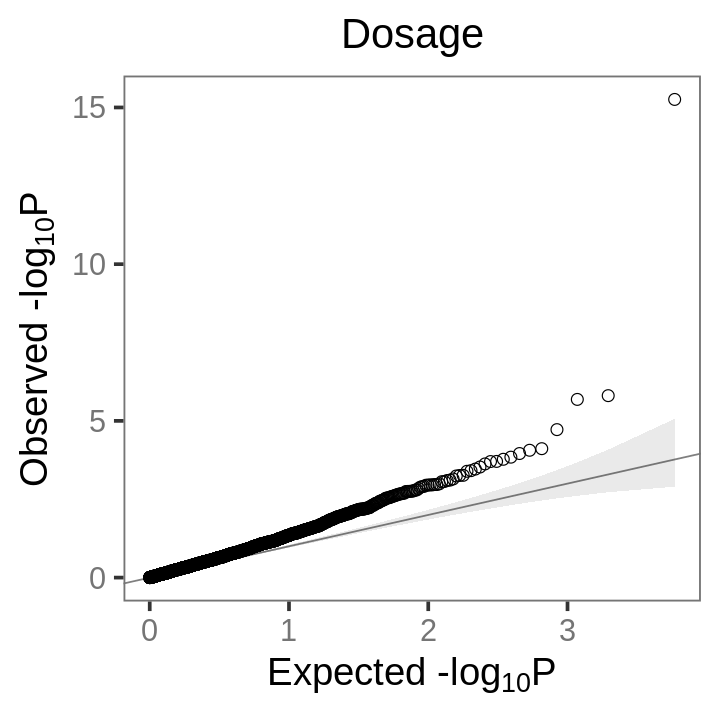

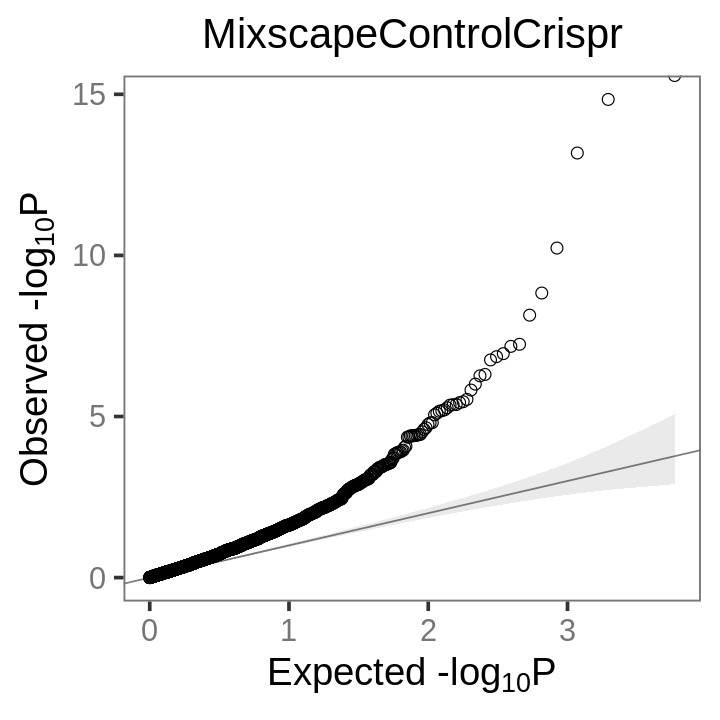

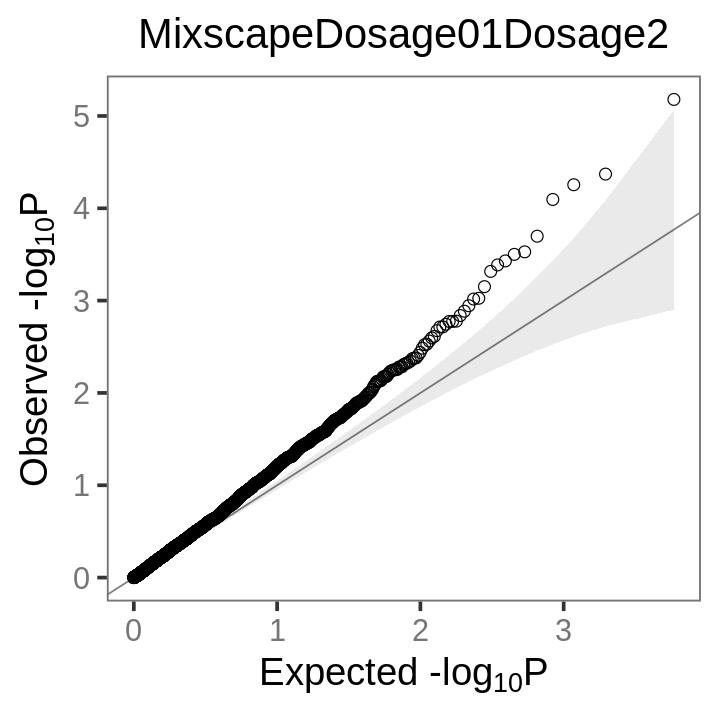

In [208]:
fig.size(6, 6)
gg_qqplot(CD45_comp$pval_Dosage)+
    theme_clean()+
    ggtitle('Dosage')

gg_qqplot(CD45_comp$pval_MixscapeControlCrispr)+
    theme_clean()+
    ggtitle('MixscapeControlCrispr')

# gg_qqplot(CD45_comp$pval_MixscapeDosage0Dosage12)+
#     theme_clean()+
#     ggtitle('MixscapeDosage0Dosage12')

gg_qqplot(CD45_comp$pval_MixscapeDosage01Dosage2)+
    theme_clean()+
    ggtitle('MixscapeDosage01Dosage2')


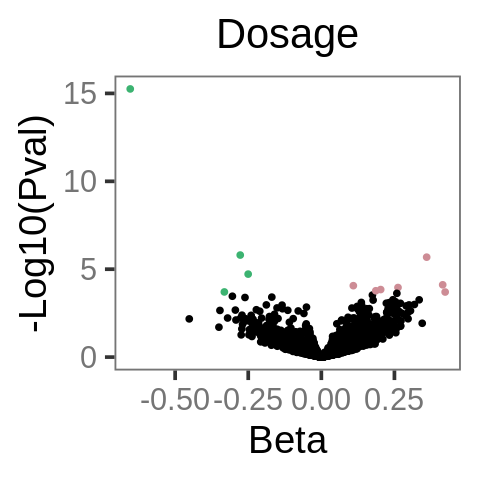

In [209]:
fig.size(4, 4)
p1 = ggplot(CD45_comp)+
    # geom_hline(aes(yintercept = -log10(0.05/(FBXO11_comp %>% nrow))), color = 'grey', size = 1)+
    geom_point(aes(x = beta_Dosage, y = -log10(pval_Dosage), col = Dosage_Enriched))+
    scale_color_manual(values = c('High' = 'lightpink3', 'Low' = 'mediumseagreen', 'NS' = 'Black'))+
    theme_clean()+
    xlab('Beta')+
    ylab('-Log10(Pval)')+
    ggtitle('Dosage')+
    theme(legend.position="none")
p1

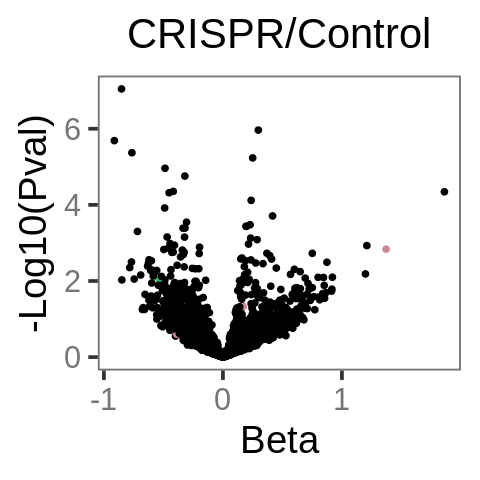

In [210]:
fig.size(4, 4)
p2 = ggplot(CD45_comp)+
    # geom_hline(aes(yintercept = -log10(0.05/(FBXO11_comp %>% nrow))), color = 'grey', size = 1)+
    geom_point(aes(x = beta_Edited_Index, y = -log10(pval_Edited_Index), col = Dosage_Enriched))+
    scale_color_manual(values = c('High' = 'lightpink3', 'Low' = 'mediumseagreen', 'NS' = 'Black'))+
    theme_clean()+
    xlab('Beta')+
    ylab('-Log10(Pval)')+
    ggtitle('CRISPR/Control')+
    theme(legend.position="none")
p2

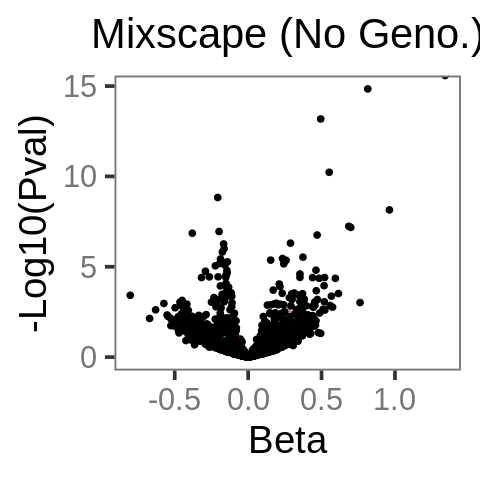

In [211]:
fig.size(4, 4)
p3 = ggplot(CD45_comp)+
    # geom_hline(aes(yintercept = -log10(0.05/(FBXO11_comp %>% nrow))), color = 'grey', size = 1)+
    geom_point(aes(x = -beta_MixscapeControlCrispr, y = -log10(pval_MixscapeControlCrispr), col = Dosage_Enriched))+
    scale_color_manual(values = c('High' = 'lightpink3', 'Low' = 'mediumseagreen', 'NS' = 'Black'))+
    theme_clean()+    
    xlab('Beta')+
    ylab('-Log10(Pval)')+
    ggtitle('Mixscape (No Geno.)')+
    theme(legend.position="none")
p3

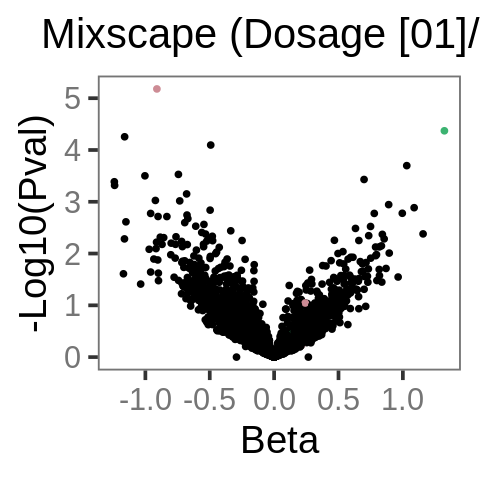

In [212]:
fig.size(4, 4)
p5 = ggplot(CD45_comp)+
    # geom_hline(aes(yintercept = -log10(0.05/(FBXO11_comp %>% nrow))), color = 'grey', size = 1)+
    geom_point(aes(x = -beta_MixscapeDosage01Dosage2, y = -log10(pval_MixscapeDosage01Dosage2), col = Dosage_Enriched))+
    scale_color_manual(values = c('High' = 'lightpink3', 'Low' = 'mediumseagreen', 'NS' = 'Black'))+
    theme_clean()+    
    xlab('Beta')+
    ylab('-Log10(Pval)')+
    ggtitle('Mixscape (Dosage [01]/2)')+
    theme(legend.position="none")
p5

In [213]:
library(gridExtra)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [ ]:
fig.size(4, 4*5)
grid.arrange(p1, p2, p3, p4, p5, nrow = 1)

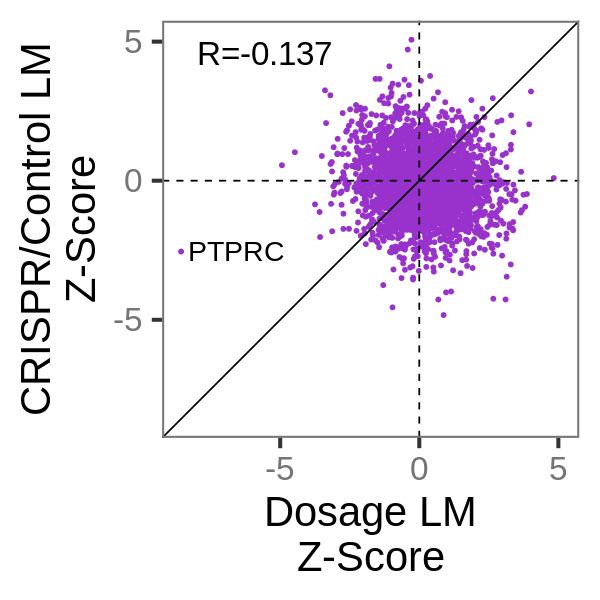

In [214]:
r = cor.test(comp[['z_Dosage']], comp[['z_Edited_Index']], method = 'pearson')$estimate
p = cor.test(comp[['z_Dosage']], comp[['z_Edited_Index']], method = 'pearson')$p.value

min = comp[c('z_Dosage', 'z_Edited_Index')] %>% na.omit %>% min
max = comp[c('z_Dosage', 'z_Edited_Index')] %>% na.omit %>% max

fig.size(5, 5)
ggplot(comp, aes(x=`z_Dosage`, y =`z_Edited_Index`))+
    geom_point(color ='darkorchid', size = 1)+
    theme_clean(base_size = 25)+
    geom_abline(slope = 1, intercept = 0)+
    geom_vline(xintercept = 0, linetype = 'dashed')+
    geom_hline(yintercept = 0, linetype = 'dashed')+
    geom_text_repel(aes(label = label), size = 6) +
    annotate('text', x = min+3, y = max-0.5, label = paste0('R=', round(r, 3)), size = 7)+
    xlim(min, max)+
    ylim(min, max)+
    xlab('Dosage LM\nZ-Score')+
    ylab('CRISPR/Control LM\nZ-Score')

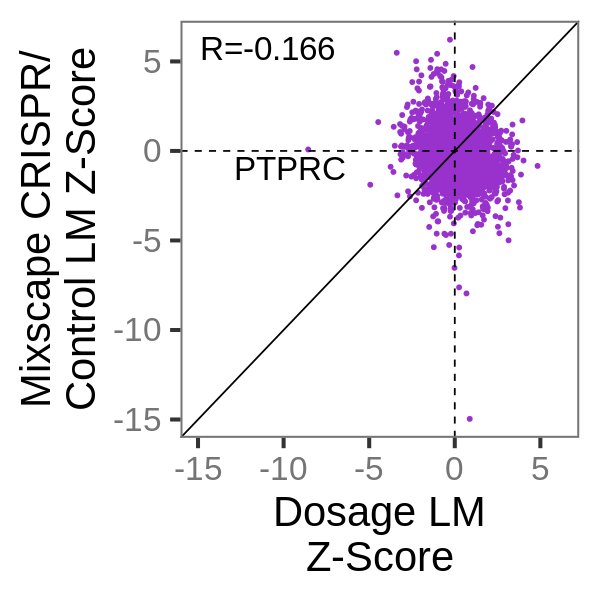

In [237]:
r = cor.test(comp[['z_Dosage']], comp[['z_MixscapeControlCrispr']], method = 'pearson')$estimate
p = cor.test(comp[['z_Dosage']], comp[['z_MixscapeControlCrispr']], method = 'pearson')$p.value

min = comp[c('z_Dosage', 'z_MixscapeControlCrispr')] %>% na.omit %>% min
max = comp[c('z_Dosage', 'z_MixscapeControlCrispr')] %>% na.omit %>% max

fig.size(5, 5)
p1 = ggplot(comp, aes(x=`z_Dosage`, y =`z_MixscapeControlCrispr`))+
    geom_point(color ='darkorchid', size = 1)+
    theme_clean(base_size = 25)+
    geom_abline(slope = 1, intercept = 0)+
    geom_vline(xintercept = 0, linetype = 'dashed')+
    geom_hline(yintercept = 0, linetype = 'dashed')+
    geom_text_repel(aes(label = label), size = 7) +
    annotate('text', x = min+4, y = max-0.5, label = paste0('R=', round(r, 3)), size = 7)+
    xlim(min, max)+
    ylim(min, max)+
    xlab('Dosage LM\nZ-Score')+
    ylab('Mixscape CRISPR/\nControl LM Z-Score')

p1

In [216]:
comp %>% colnames

[1] "Genes"                        "pval_Dosage"                 
 [3] "beta_Dosage"                  "se_Dosage"                   
 [5] "z_Dosage"                     "name_Dosage"                 
 [7] "padj_Dosage"                  "pval_Edited_Index"           
 [9] "beta_Edited_Index"            "se_Edited_Index"             
[11] "z_Edited_Index"               "name_Edited_Index"           
[13] "padj_Edited_Index"            "pval_MixscapeControlCrispr"  
[15] "beta_MixscapeControlCrispr"   "se_MixscapeControlCrispr"    
[17] "z_MixscapeControlCrispr"      "name_MixscapeControlCrispr"  
[19] "padj_MixscapeControlCrispr"   "pval_MixscapeDosage01Dosage2"
[21] "beta_MixscapeDosage01Dosage2" "se_MixscapeDosage01Dosage2"  
[23] "z_MixscapeDosage01Dosage2"    "name_MixscapeDosage01Dosage2"
[25] "padj_MixscapeDosage01Dosage2" "Dosage_Enriched"             
[27] "label"

In [217]:
r = cor.test(comp[['z_Dosage']], comp[['z_MixscapeDosage0Dosage12']], method = 'pearson')$estimate
p = cor.test(comp[['z_Dosage']], comp[['z_MixscapeDosage0Dosage12']], method = 'pearson')$p.value

min = comp[c('z_Dosage', 'z_MixscapeDosage0Dosage12')] %>% na.omit %>% min
max = comp[c('z_Dosage', 'z_MixscapeDosage0Dosage12')] %>% na.omit %>% max

fig.size(5, 5)
ggplot(comp)+
    geom_point(aes(x=`z_Dosage`, y =`z_MixscapeDosage0Dosage12`), color ='darkorchid', size = 1)+
    theme_clean(base_size = 25)+
    geom_abline(slope = 1, intercept = 0)+
    geom_vline(xintercept = 0, linetype = 'dashed')+
    geom_hline(yintercept = 0, linetype = 'dashed')+

    annotate('text', x = min+3, y = max-0.5, label = paste0('R=', round(r, 3)), size = 7)+
    xlim(min, max)+
    ylim(min, max)+
    xlab('Dosage LM\nZ-Score')+
    ylab('Mixscape Dosage0/12\nLM Z-Score')

ERROR: Error in cor.test.default(comp[["z_Dosage"]], comp[["z_MixscapeDosage0Dosage12"]], : 'y' must be a numeric vector


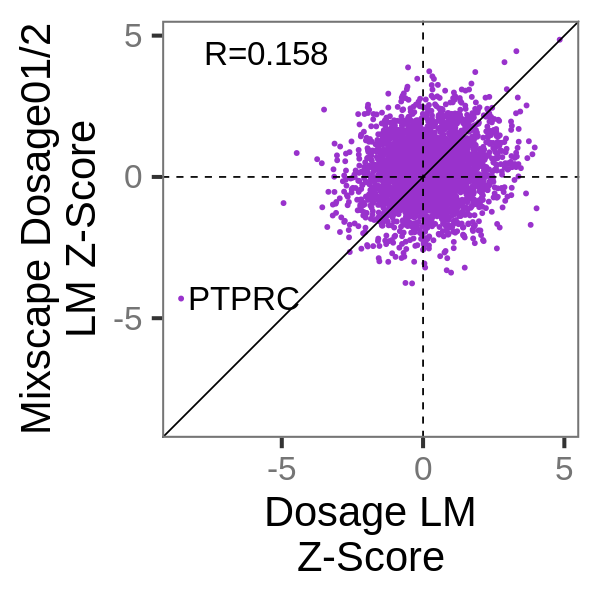

In [238]:
r = cor.test(comp[['z_Dosage']], comp[['z_MixscapeDosage01Dosage2']], method = 'pearson')$estimate
p = cor.test(comp[['z_Dosage']], comp[['z_MixscapeDosage01Dosage2']], method = 'pearson')$p.value

min = comp[c('z_Dosage', 'z_MixscapeDosage01Dosage2')] %>% na.omit %>% min
max = comp[c('z_Dosage', 'z_MixscapeDosage01Dosage2')] %>% na.omit %>% max

fig.size(5, 5)
p2 = ggplot(comp, aes(x=`z_Dosage`, y =`z_MixscapeDosage01Dosage2`))+
    geom_point(color ='darkorchid', size = 1)+
    theme_clean(base_size = 25)+
    geom_abline(slope = 1, intercept = 0)+
    geom_vline(xintercept = 0, linetype = 'dashed')+
    geom_hline(yintercept = 0, linetype = 'dashed')+
    geom_text_repel(aes(label = label), size = 7) +
    annotate('text', x = min+3, y = max-0.5, label = paste0('R=', round(r, 3)), size = 7)+
    xlim(min, max)+
    ylim(min, max)+
    xlab('Dosage LM\nZ-Score')+
    ylab('Mixscape Dosage01/2\nLM Z-Score')
p2

Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


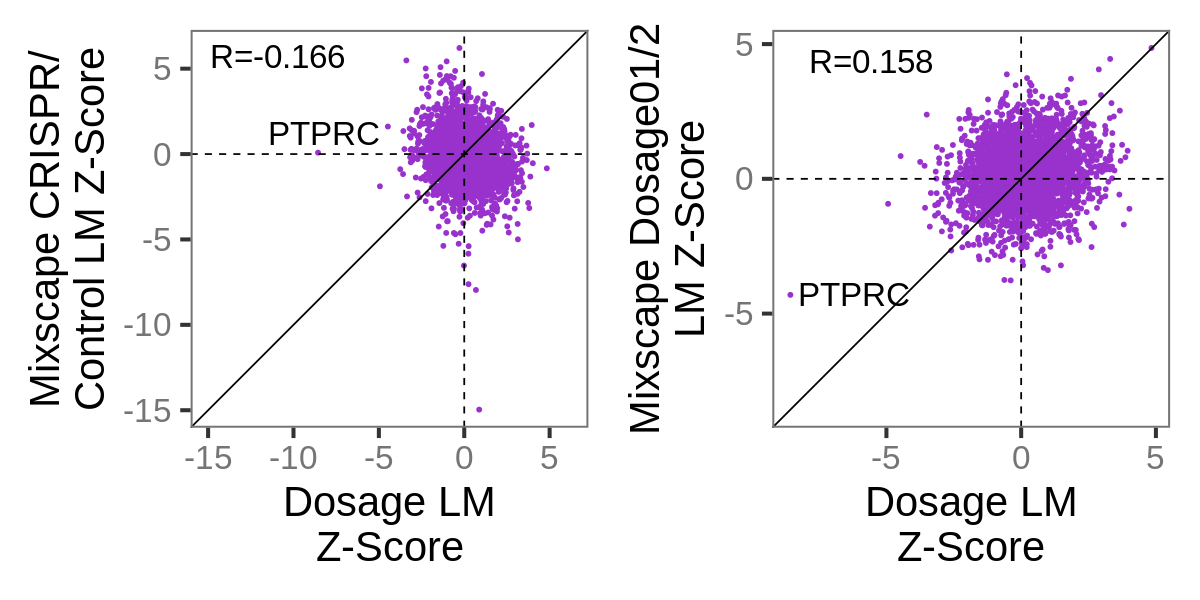

In [241]:
# pdf(file = '../Figures/Mixscape_CD45_ScatterPlot_DGEZScores.pdf',  height = 5, width = 10)
fig.size(5, 10)
p1 + p2 + plot_layout(ncol = 2)
# dev.off()

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_text()`).”


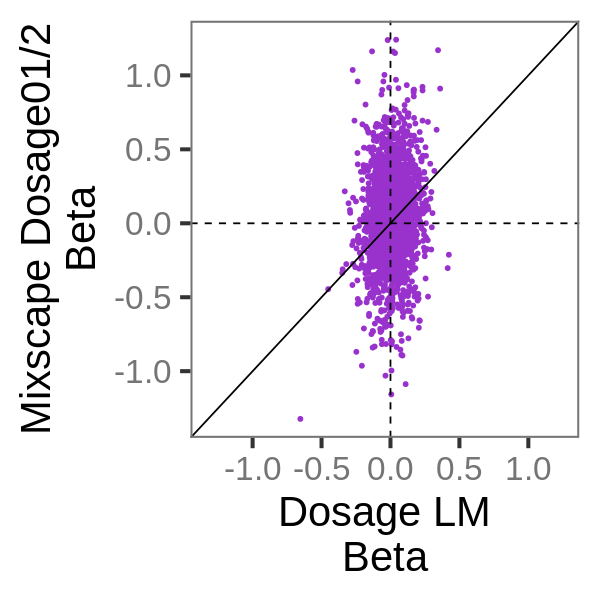

In [222]:
r = cor.test(comp[['beta_Dosage']], comp[['beta_MixscapeDosage01Dosage2']], method = 'pearson')$estimate
p = cor.test(comp[['beta_Dosage']], comp[['beta_MixscapeDosage01Dosage2']], method = 'pearson')$p.value

min = comp[c('beta_Dosage', 'beta_MixscapeDosage01Dosage2')] %>% na.omit %>% min
max = comp[c('beta_Dosage', 'beta_MixscapeDosage01Dosage2')] %>% na.omit %>% max

fig.size(5, 5)
ggplot(comp)+
    geom_point(aes(x=`beta_Dosage`, y =`beta_MixscapeDosage01Dosage2`), color ='darkorchid', size = 1)+
    theme_clean(base_size = 25)+
    geom_abline(slope = 1, intercept = 0)+
    geom_vline(xintercept = 0, linetype = 'dashed')+
    geom_hline(yintercept = 0, linetype = 'dashed')+

    annotate('text', x = min+3, y = max-0.5, label = paste0('R=', round(r, 3)), size = 7)+
    xlim(min, max)+
    ylim(min, max)+
    xlab('Dosage LM\nBeta')+
    ylab('Mixscape Dosage01/2\nBeta')

In [223]:
df = comp %>% filter(padj_Dosage < 0.05) %>% arrange(padj_Dosage)
df[match('PTPRC',df$Genes),]
comp %>% filter(padj_Dosage < 0.05, beta_Dosage > 0) %>% arrange(padj_Dosage) %>% head (60)
comp %>% filter(padj_Dosage < 0.05, beta_Dosage < 0) %>% arrange(padj_Dosage) %>% head (60)

Genes pval_Dosage  beta_Dosage se_Dosage  z_Dosage  name_Dosage padj_Dosage 
1 PTPRC 5.551115e-16 -0.6535944  0.07632626 -8.563166 Dosage      1.663669e-12
  pval_Edited_Index beta_Edited_Index se_Edited_Index ⋯
1 0.008640719       -0.5385827        0.2113944       ⋯
  name_MixscapeControlCrispr padj_MixscapeControlCrispr
1 Mixscape_ClassNP           0.9738844                 
  pval_MixscapeDosage01Dosage2 beta_MixscapeDosage01Dosage2
1 4.259481e-05                 -1.32258                    
  se_MixscapeDosage01Dosage2 z_MixscapeDosage01Dosage2
1 0.3072642                  -4.304373                
  name_MixscapeDosage01Dosage2 padj_MixscapeDosage01Dosage2 Dosage_Enriched
1 Mixscape_ClassNP             0.06268731                   Low            
  label
1 PTPRC

Genes   pval_Dosage  beta_Dosage se_Dosage  z_Dosage name_Dosage padj_Dosage
1 CHCHD10 2.064904e-06 0.3602769   0.07450370 4.835691 Dosage      0.002062839
2 CDKAL1  1.101265e-04 0.2621788   0.06775222 3.869671 Dosage      0.041256151
3 MT-ND4  8.660267e-05 0.1094281   0.02769202 3.951612 Dosage      0.041256151
4 SOCS3   7.710335e-05 0.4150747   0.10333649 4.016729 Dosage      0.041256151
5 PSMA5   1.437975e-04 0.2029511   0.05420216 3.744336 Dosage      0.047884572
6 PMAIP1  1.984245e-04 0.4235021   0.11621872 3.644009 Dosage      0.049556521
7 PSMB6   1.679650e-04 0.1863398   0.04893573 3.807849 Dosage      0.049556521
  pval_Edited_Index beta_Edited_Index se_Edited_Index ⋯
1 0.92281088         0.02241665       0.23243378      ⋯
2 0.63409368        -0.09295813       0.19427051      ⋯
3 0.04764992         0.17077368       0.08420219      ⋯
4 0.00146009         1.37108313       0.42752735      ⋯
5 0.61742925        -0.07895004       0.15701114      ⋯
6 0.25074749        -0.38640389       0.33773185      ⋯
7 0.34652550        -0.13773907       0.14727374      ⋯
  name_MixscapeControlCrispr padj_MixscapeControlCrispr
1 Mixscape_ClassNP           0.78115745                
2 Mixscape_ClassNP           0.59484181                
3 Mixscape_ClassNP           0.43595915                
4 Mixscape_ClassNP           0.86814533                
5 Mixscape_ClassNP           0.08681098                
6 Mixscape_ClassNP           0.88087886                
7 Mixscape_ClassNP           0.04437051                
  pval_MixscapeDosage01Dosage2 beta_MixscapeDosage01Dosage2
1 6.619475e-06                  0.91054703                 
2 4.253810e-01                  0.15530276                 
3 3.026022e-01                  0.08472765                 
4 2.662579e-01                 -0.30323952                 
5 2.099647e-01                  0.19150217                 
6 5.797462e-01                 -0.21272562                 
7 9.016655e-02                 -0.24162466                 
  se_MixscapeDosage01Dosage2 z_MixscapeDosage01Dosage2
1 0.18750615                  4.8560915               
2 0.19368994                  0.8018112               
3 0.08127662                  1.0424603               
4 0.27282463                 -1.1114815               
5 0.15161312                  1.2630976               
6 0.36381100                 -0.5847146               
7 0.14245662                 -1.6961280               
  name_MixscapeDosage01Dosage2 padj_MixscapeDosage01Dosage2 Dosage_Enriched
1 Mixscape_ClassNP             0.02239368                   High           
2 Mixscape_ClassNP             0.88983111                   High           
3 Mixscape_ClassNP             0.85325073                   High           
4 Mixscape_ClassNP             0.84800514                   High           
5 Mixscape_ClassNP             0.83165473                   High           
6 Mixscape_ClassNP             0.93364767                   High           
7 Mixscape_ClassNP             0.69448009                   High           
  label
1      
2      
3      
4      
5      
6      
7

Genes   pval_Dosage  beta_Dosage se_Dosage  z_Dosage  name_Dosage
1 PTPRC   5.551115e-16 -0.6535944  0.07632626 -8.563166 Dosage     
2 TNFRSF4 1.567008e-06 -0.2773703  0.05617092 -4.937970 Dosage     
3 TRBC2   1.900916e-05 -0.2502671  0.05596259 -4.472042 Dosage     
4 LBH     1.964411e-04 -0.3316644  0.08848058 -3.748443 Dosage     
  padj_Dosage  pval_Edited_Index beta_Edited_Index se_Edited_Index ⋯
1 1.663669e-12 0.008640719       -0.53858271       0.2113944       ⋯
2 2.062839e-03 0.583186922        0.09621959       0.1728897       ⋯
3 1.424261e-02 0.317472916        0.17328287       0.1692307       ⋯
4 4.955652e-02 0.394685663       -0.21331751       0.2508797       ⋯
  name_MixscapeControlCrispr padj_MixscapeControlCrispr
1 Mixscape_ClassNP           0.9738844                 
2 Mixscape_ClassNP           0.3652805                 
3 Mixscape_ClassNP           0.4820251                 
4 Mixscape_ClassNP           0.7584895                 
  pval_MixscapeDosage01Dosage2 beta_MixscapeDosage01Dosage2
1 4.259481e-05                 -1.3225799                  
2 3.481965e-01                 -0.1471296                  
3 4.108192e-01                  0.1479430                  
4 5.410885e-01                  0.2160405                  
  se_MixscapeDosage01Dosage2 z_MixscapeDosage01Dosage2
1 0.3072642                  -4.3043734               
2 0.1588535                  -0.9261965               
3 0.1749163                   0.8457926               
4 0.3442930                   0.6274902               
  name_MixscapeDosage01Dosage2 padj_MixscapeDosage01Dosage2 Dosage_Enriched
1 Mixscape_ClassNP             0.06268731                   Low            
2 Mixscape_ClassNP             0.87167794                   Low            
3 Mixscape_ClassNP             0.88945485                   Low            
4 Mixscape_ClassNP             0.92034461                   Low            
  label
1 PTPRC
2      
3      
4

In [224]:
df = comp %>% filter(padj_MixscapeControlCrispr < 0.05) %>% arrange(padj_MixscapeControlCrispr)
df[match('PTPRC',df$Genes),]
comp %>% filter(padj_MixscapeControlCrispr < 0.05, beta_MixscapeControlCrispr > 0) %>% arrange(padj_MixscapeControlCrispr) %>% head (60)
comp %>% filter(padj_MixscapeControlCrispr < 0.05, beta_MixscapeControlCrispr < 0) %>% arrange(padj_MixscapeControlCrispr) %>% head (60)

Genes pval_Dosage beta_Dosage se_Dosage z_Dosage name_Dosage padj_Dosage
NA NA    NA          NA          NA        NA       NA          NA         
   pval_Edited_Index beta_Edited_Index se_Edited_Index ⋯
NA NA                NA                NA              ⋯
   name_MixscapeControlCrispr padj_MixscapeControlCrispr
NA NA                         NA                        
   pval_MixscapeDosage01Dosage2 beta_MixscapeDosage01Dosage2
NA NA                           NA                          
   se_MixscapeDosage01Dosage2 z_MixscapeDosage01Dosage2
NA NA                         NA                       
   name_MixscapeDosage01Dosage2 padj_MixscapeDosage01Dosage2 Dosage_Enriched
NA NA                           NA                           NA             
   label
NA NA

Genes      pval_Dosage beta_Dosage   se_Dosage  z_Dosage    name_Dosage
1  RPS3       0.776618837 -0.0054275748 0.01926098 -0.28179123 Dosage     
2  EEF1G      0.301675560 -0.0213647299 0.02074266 -1.02998991 Dosage     
3  MALAT1     0.001103728 -0.1343434473 0.03963317 -3.38967176 Dosage     
4  RPS14      0.164569045 -0.0255350855 0.01838488 -1.38891757 Dosage     
5  RPL3       0.023754056 -0.0408727719 0.01809459 -2.25883986 Dosage     
6  RPS12      0.593921691 -0.0108869511 0.02044519 -0.53249438 Dosage     
7  RPS27A     0.296927966  0.0231968946 0.02236489  1.03720124 Dosage     
8  RACK1      0.151750722 -0.0246961926 0.01729729 -1.42774889 Dosage     
9  RPL11      0.306231197 -0.0209318739 0.02052466 -1.01984028 Dosage     
10 RPL12      0.025928552 -0.0532446890 0.02393492 -2.22456102 Dosage     
11 RPLP0      0.423217623 -0.0158311361 0.01985620 -0.79728938 Dosage     
12 RPS3A      0.543475999 -0.0166288733 0.02738007 -0.60733502 Dosage     
13 RPS2       0.279641815 -0.0195144211 0.01812709 -1.07653337 Dosage     
14 SNHG29     0.314356203 -0.0369381069 0.03707919 -0.99619513 Dosage     
15 RPL19      0.217647505 -0.0231949637 0.01881861 -1.23255447 Dosage     
16 PLPP3      0.051627615 -0.0387053099 0.01984348 -1.95053028 Dosage     
17 EIF3E      0.174527817 -0.0576009037 0.04230590 -1.36153359 Dosage     
18 RPL13A     0.391412617 -0.0174044538 0.02039609 -0.85332319 Dosage     
19 RPL41      0.434877893 -0.0279226863 0.03582165 -0.77949187 Dosage     
20 RPSA       0.947920367 -0.0017637675 0.02702717 -0.06525905 Dosage     
21 RPS5       0.841256656 -0.0042599933 0.02133064 -0.19971240 Dosage     
22 EEF2       0.707459204 -0.0103273820 0.02746631 -0.37600179 Dosage     
23 RPL7A      0.450595392 -0.0158224394 0.02114225 -0.74838017 Dosage     
24 ASTN2      0.012851208 -0.0515957930 0.02077051 -2.48408918 Dosage     
25 RPS6       0.037511597 -0.0387960911 0.01858638 -2.08733969 Dosage     
26 RPS8       0.484971776 -0.0137687986 0.01969140 -0.69922886 Dosage     
27 RPS23      0.792394963  0.0053546953 0.02030501  0.26371297 Dosage     
28 RPS16      0.819776478  0.0052161494 0.02284395  0.22833832 Dosage     
29 RPL13      0.677051731 -0.0072143205 0.01741102 -0.41435361 Dosage     
30 RPL30      0.813259052  0.0064413489 0.02724759  0.23640070 Dosage     
31 RPS18      0.951306153 -0.0014427590 0.02360746 -0.06111454 Dosage     
32 TPT1       0.155569023 -0.0291656954 0.02058961 -1.41652484 Dosage     
33 PALLD      0.812428230 -0.0273785715 0.11703344 -0.23393803 Dosage     
34 RPLP1      0.144419381 -0.0293365053 0.02016153 -1.45507371 Dosage     
35 RPS19      0.461137131 -0.0128742334 0.01760902 -0.73111586 Dosage     
36 IMPDH2     0.221357524  0.0443857084 0.03640974  1.21906129 Dosage     
37 RPL29      0.569468901 -0.0140841511 0.02476744 -0.56865599 Dosage     
38 EEF1B2     0.592769000 -0.0143279227 0.02666363 -0.53735820 Dosage     
39 HSP90AB1   0.500538395 -0.0228345847 0.03411668 -0.66930859 Dosage     
40 INSIG2     0.028878590 -0.1550397454 0.07101395 -2.18322952 Dosage     
41 EEF1A1     0.971103105  0.0009734064 0.02687503  0.03621973 Dosage     
42 PPP1CC     0.036164233 -0.0877926693 0.04192148 -2.09421673 Dosage     
43 RPL22      0.703643045  0.0280371430 0.07417963  0.37796283 Dosage     
44 BTF3       0.938912486  0.0014467214 0.01875608  0.07713346 Dosage     
45 GK         0.955767514  0.0054285750 0.09737170  0.05575106 Dosage     
46 RPS27      0.502474581 -0.0243542121 0.03649880 -0.66726069 Dosage     
47 YME1L1     0.279098882 -0.0752135644 0.06992018 -1.07570606 Dosage     
48 RELA       0.433027410  0.0616221624 0.07799567  0.79007159 Dosage     
49 RPS9       0.703876740 -0.0073539221 0.01945848 -0.37792894 Dosage     
50 AC068724.3 0.888039729  0.0053114140 0.03777381  0.14061102 Dosage     
   padj_Dosage pval_Edited_Index beta_Edited_Index se_Edited_Index ⋯
1  0.9438179   1.083019e-06       0.297480146      0.05867985      ⋯
2  0.7691189   1.074278e-03       0.2149

Genes    pval_Dosage beta_Dosage   se_Dosage  z_Dosage    name_Dosage
1  IFI6     0.376528237  0.0529000883 0.06052775  0.87398071 Dosage     
2  ISG15    0.496939555  0.0421779681 0.06167187  0.68390937 Dosage     
3  LY6E     0.802986309  0.0098872940 0.03934637  0.25128859 Dosage     
4  UBE2L6   0.986648185 -0.0008673761 0.05101646 -0.01700189 Dosage     
5  USP18    0.805225975  0.0244197737 0.10072661  0.24243617 Dosage     
6  MX1      0.800111834  0.0192263971 0.07472113  0.25730872 Dosage     
7  OAS1     0.229904189 -0.0955976556 0.07808981 -1.22420136 Dosage     
8  LAP3     0.741106743 -0.0175236559 0.05356223 -0.32716444 Dosage     
9  CFL1     0.001619866  0.1046025055 0.03328681  3.14246119 Dosage     
10 CHMP5    0.605497639 -0.0240380577 0.04664466 -0.51534421 Dosage     
11 ACTB     0.822086020 -0.0066288819 0.02950411 -0.22467657 Dosage     
12 B2M      0.291955327 -0.0203589807 0.01926250 -1.05692328 Dosage     
13 KIF1BP   0.543573109 -0.0200530566 0.03301923 -0.60731456 Dosage     
14 MYL12A   0.008850011  0.0811963267 0.03116335  2.60550727 Dosage     
15 TMSB4X   0.283904597  0.0328112612 0.03101438  1.05793702 Dosage     
16 IRF7     0.143942990 -0.0935485558 0.06262641 -1.49375567 Dosage     
17 DRAP1    0.011379002  0.1221949307 0.04848547  2.52023828 Dosage     
18 EVL      0.179211868  0.0825819340 0.06129648  1.34725420 Dosage     
19 PSME2    0.001765275  0.1553812280 0.04967736  3.12780768 Dosage     
20 TMEM50A  0.191568833  0.0992012063 0.07558612  1.31242620 Dosage     
21 IFI35    0.957801831 -0.0047625349 0.08620858 -0.05524432 Dosage     
22 IFITM3   0.119740546  0.1039213919 0.06736188  1.54273297 Dosage     
23 GNG5     0.318314679 -0.0311010701 0.03099689 -1.00336111 Dosage     
24 ISG20    0.339953234 -0.0761293230 0.07905853 -0.96294886 Dosage     
25 IFITM2   0.085900130  0.0551049862 0.03226873  1.70768981 Dosage     
26 PFN1     0.007711042  0.0697166689 0.02619740  2.66120582 Dosage     
27 UCP2     0.782155106 -0.0205320023 0.07323236 -0.28036791 Dosage     
28 CRIP1    0.203201299 -0.0630698955 0.04996933 -1.26217208 Dosage     
29 CALM3    0.342864800  0.0352428946 0.03662411  0.96228685 Dosage     
30 ARPC5    0.102781260  0.0768685703 0.04717230  1.62952765 Dosage     
31 EIF2AK2  0.842345265  0.0191923373 0.09577909  0.20038129 Dosage     
32 NDUFC2   0.018216335  0.1411774863 0.05936239  2.37823136 Dosage     
33 NDUFA13  0.738882854  0.0190019797 0.05707581  0.33292526 Dosage     
34 LGALS3BP 0.521660339  0.0589936725 0.09579026  0.61586294 Dosage     
35 CD74     0.274395009 -0.0503343631 0.04588098 -1.09706393 Dosage     
36 BST2     0.234894729  0.0767697298 0.06400018  1.19952364 Dosage     
37 TAP1     0.161172371  0.0708780442 0.05076007  1.39633464 Dosage     
38 ELOVL5   0.347900535  0.0749104279 0.08065615  0.92876271 Dosage     
39 HMOX2    0.046955765  0.1682833028 0.08783472  1.91590867 Dosage     
40 TAPBP    0.804618478 -0.0149929131 0.06144154 -0.24401916 Dosage     
41 SPCS3    0.839366198 -0.0163045484 0.07907252 -0.20619740 Dosage     
42 LGALS9   0.539852215 -0.0837762141 0.13330061 -0.62847584 Dosage     
43 CORO1A   0.082050971  0.0576752317 0.03328610  1.73271202 Dosage     
44 PSME1    0.294007565  0.0319710253 0.03044331  1.05018235 Dosage     
45 YWHAZ    0.803352335 -0.0097450468 0.03884096 -0.25089611 Dosage     
46 CAP1     0.099308066  0.0599482860 0.03626480  1.65307079 Dosage     
47 HLA-A    0.543998732 -0.0168397016 0.02760703 -0.60997876 Dosage     
48 SUB1     0.868627388 -0.0071871328 0.04319905 -0.16637246 Dosage     
49 HLA-B    0.493464819 -0.0160826507 0.02346947 -0.68525842 Dosage     
50 FAM50A   0.822384194 -0.0188076505 0.08215465 -0.22892983 Dosage     
51 UTP11    0.556366394 -0.0614213767 0.10040292 -0.61174894 Dosage     
52 EID1     0.059987743 -0.0878697361 0.04574770 -1.92074644 Dosage     
53 NAPA     0.086374152  0.1231324523 0.07177930  1.71543122 Dosage     
54 RNPS1    0.003401050  0.1504856979 0.05091360  2.95570724 

In [225]:
df = comp %>% filter(padj_MixscapeDosage01Dosage2 < 0.05) %>% arrange(padj_MixscapeDosage01Dosage2)
df[match('PTPRC',df$Genes),]
comp %>% filter(padj_MixscapeDosage01Dosage2 < 0.05, beta_MixscapeDosage01Dosage2 > 0) %>% arrange(padj_MixscapeDosage01Dosage2) %>% head (60)
comp %>% filter(padj_MixscapeDosage01Dosage2 < 0.05, beta_MixscapeDosage01Dosage2 < 0) %>% arrange(padj_MixscapeDosage01Dosage2) %>% head (60)

Genes pval_Dosage beta_Dosage se_Dosage z_Dosage name_Dosage padj_Dosage
NA NA    NA          NA          NA        NA       NA          NA         
   pval_Edited_Index beta_Edited_Index se_Edited_Index ⋯
NA NA                NA                NA              ⋯
   name_MixscapeControlCrispr padj_MixscapeControlCrispr
NA NA                         NA                        
   pval_MixscapeDosage01Dosage2 beta_MixscapeDosage01Dosage2
NA NA                           NA                          
   se_MixscapeDosage01Dosage2 z_MixscapeDosage01Dosage2
NA NA                         NA                       
   name_MixscapeDosage01Dosage2 padj_MixscapeDosage01Dosage2 Dosage_Enriched
NA NA                           NA                           NA             
   label
NA NA

Genes   pval_Dosage  beta_Dosage se_Dosage z_Dosage name_Dosage padj_Dosage
1 CHCHD10 2.064904e-06 0.3602769   0.0745037 4.835691 Dosage      0.002062839
  pval_Edited_Index beta_Edited_Index se_Edited_Index ⋯
1 0.9228109         0.02241665        0.2324338       ⋯
  name_MixscapeControlCrispr padj_MixscapeControlCrispr
1 Mixscape_ClassNP           0.7811574                 
  pval_MixscapeDosage01Dosage2 beta_MixscapeDosage01Dosage2
1 6.619475e-06                 0.910547                    
  se_MixscapeDosage01Dosage2 z_MixscapeDosage01Dosage2
1 0.1875062                  4.856091                 
  name_MixscapeDosage01Dosage2 padj_MixscapeDosage01Dosage2 Dosage_Enriched
1 Mixscape_ClassNP             0.02239368                   High           
  label
1

Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


Genes pval_Dosage beta_Dosage se_Dosage z_Dosage name_Dosage padj_Dosage
     pval_Edited_Index beta_Edited_Index se_Edited_Index ⋯
     name_MixscapeControlCrispr padj_MixscapeControlCrispr
     pval_MixscapeDosage01Dosage2 beta_MixscapeDosage01Dosage2
     se_MixscapeDosage01Dosage2 z_MixscapeDosage01Dosage2
     name_MixscapeDosage01Dosage2 padj_MixscapeDosage01Dosage2 Dosage_Enriched
     label

In [216]:
library(VennDiagram)


install.packages("eulerr", repos='https://cran.wustl.edu/')

Loading required package: grid

Loading required package: futile.logger



In [226]:
library(eulerr)
library(grid)


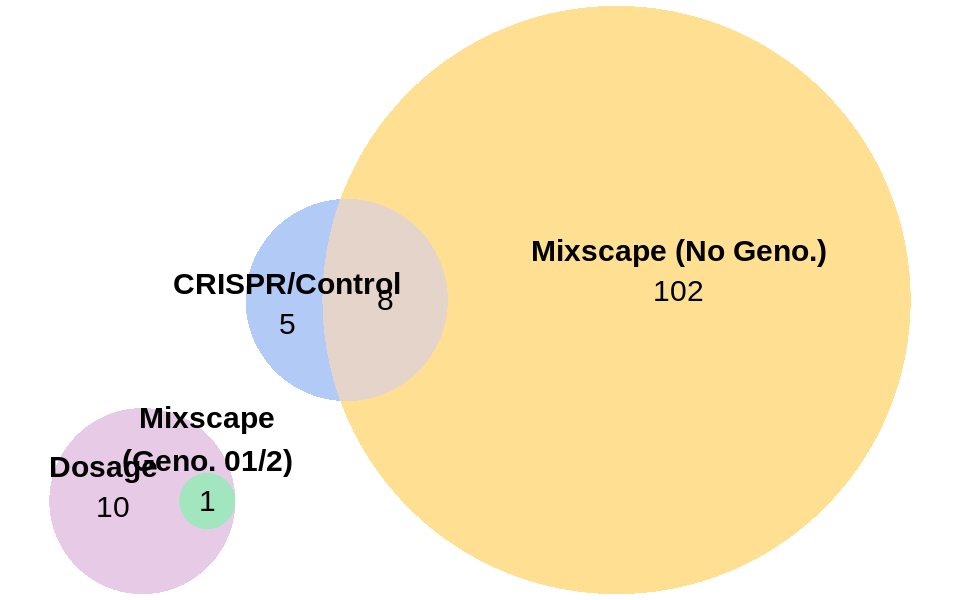

In [657]:
# set1 <- comp[comp['padj_Dosage'] < 0.05, 'Genes']
# set2 <- comp[comp['padj_Edited_Index'] < 0.05, 'Genes']
# set3 <- comp[comp['padj_MixscapeControlCrispr'] < 0.05, 'Genes']
# set4 <- comp[comp['padj_MixscapeDosage01Dosage2'] < 0.05, 'Genes']

# # Create named lists of elements
# sets <- list(
#     `Dosage\t` = set1,
#     `CRISPR/Control` = set2,
#     `Mixscape (No Geno.)` = set3,
#     `Mixscape\n(Geno. 01/2)` = set4
# )

# # Calculate overlaps and sizes using eulerr
# fit <- euler(sets)

# fig.size(5, 8)
# # Plot the Venn diagram
# plot(
#     fit,
#     fills = c("plum3", "cornflowerblue", "goldenrod1", "seagreen3"),  # Colors
#     edges = NULL,
#     labels = list(font = 2, family = "Arial", cex = 1.5),  # Customize fonts and sizes
#     quantities = list(TRUE, cex = 1.5),
#     alpha = 0.5)


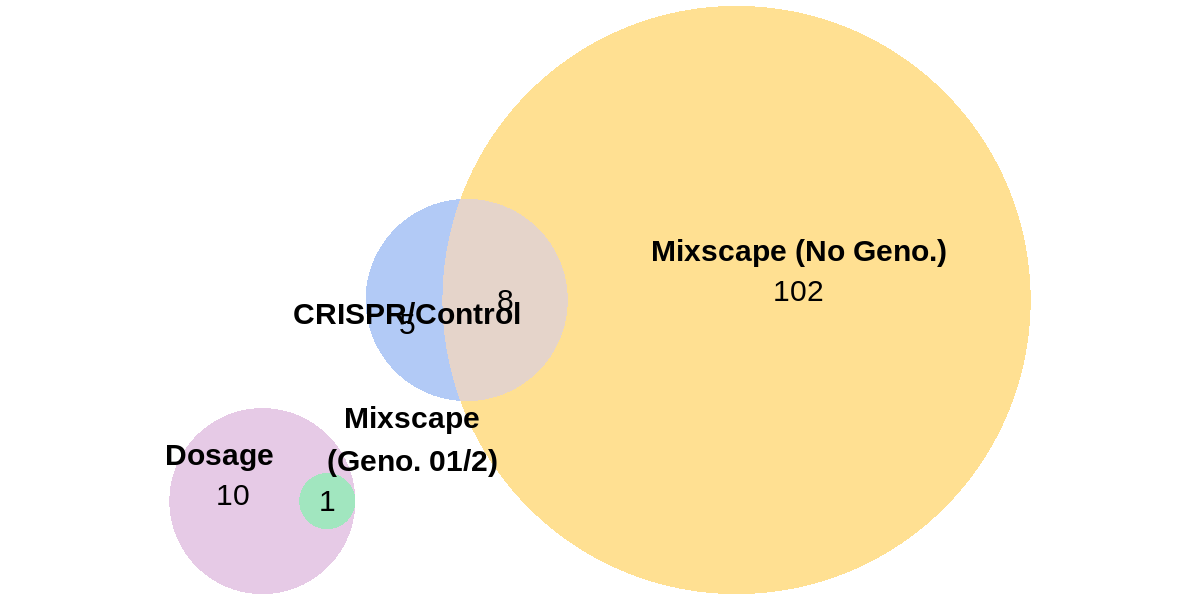

In [218]:
# pdf(file = '../Figures/CD45_VennDiagram_MixscapeDGEComp.pdf',  height = 5, width = 10)
set1 <- comp[comp['padj_Dosage'] < 0.05, 'Genes']
set2 <- comp[comp['padj_Edited_Index'] < 0.05, 'Genes']
set3 <- comp[comp['padj_MixscapeControlCrispr'] < 0.05, 'Genes']
set4 <- comp[comp['padj_MixscapeDosage01Dosage2'] < 0.05, 'Genes']

# Create named lists of elements
sets <- list(
    `Dosage\t` = set1,
    `CRISPR/Control` = set2,
    `Mixscape (No Geno.)` = set3,
    `Mixscape\n(Geno. 01/2)` = set4
)

# Calculate overlaps and sizes using eulerr
fit <- euler(sets)

fig.size(5, 10)
# Plot the Venn diagram
v = plot(
    fit,
    fills = c("plum3", "cornflowerblue", "goldenrod1", "seagreen3"),  # Colors
    edges = NULL,
    labels = list(font = 2, family = "Arial", cex = 1.5),  # Customize fonts and sizes
    quantities = list(TRUE, cex = 1.5),
    alpha = 0.5)

tags <- v$children[[1]]$children[[1]]$children$tags$children
label_grob <- tags[[1]]$children[[1]]
label_grob$x <- unit(-7.88, "native")  # Change x position
# label_grob$y <- unit(-3, "native")  # Change y position
tags[[1]]$children[[1]] <- label_grob

label_grob <- tags[[2]]$children[[1]]
# label_grob$x <- unit(-4.2, "native")  # Change x position
label_grob$y <- unit(1.6, "native")  # Change y position
tags[[2]]$children[[1]] <- label_grob

label_grob <- tags[[4]]$children[[1]]
label_grob$x <- unit(-4.2, "native")  # Change x position
# label_grob$y <- unit(-3, "native")  # Change y position
tags[[4]]$children[[1]] <- label_grob


v$children[[1]]$children[[1]]$children$tags$children <- tags

v
# dev.off()

In [227]:
set1 <- comp[comp['padj_Dosage'] < 0.05, 'Genes']
set2 <- comp[comp['padj_Edited_Index'] < 0.05, 'Genes']
set3 <- comp[comp['padj_MixscapeControlCrispr'] < 0.05, 'Genes']
set4 <- comp[comp['padj_MixscapeDosage01Dosage2'] < 0.05, 'Genes']


In [228]:
overlaps = data.frame('method1' = 'Dosage',
                      'method2'= c('MixscapeControlCrispr', 'MixscapeDosage01Dosage2'),
                      'count' = c(length(intersect(set1, set3)), length(intersect(set1, set4))))
overlaps = rbind(overlaps, data.frame('method1' = 'Edited_Index',
                      'method2'= c('MixscapeControlCrispr', 'MixscapeDosage01Dosage2'),
                      'count' = c(length(intersect(set2, set3)), length(intersect(set2, set4)))))
overlaps =overlaps %>% mutate(pct = ifelse(method1=='Dosage', count/length(set1), count/length(set2)))

overlaps$method1 = factor(overlaps$method1, levels = c('Dosage', 'Edited_Index'))

In [229]:
name_map = setNames(c('Control/CRISPR', 'Dosage0/Dosage1-2', 'Dosage0-1/Dosage2'),
                     c('MixscapeControlCrispr', 'MixscapeDosage0Dosage12', 'MixscapeDosage01Dosage2'))
overlaps = overlaps %>% mutate(method2_rename = dplyr::recode(method2, !!!name_map))


In [230]:
overlaps

method1      method2                 count pct        method2_rename   
1 Dosage       MixscapeControlCrispr   1     0.09090909 Control/CRISPR   
2 Dosage       MixscapeDosage01Dosage2 1     0.09090909 Dosage0-1/Dosage2
3 Edited_Index MixscapeControlCrispr   8     0.61538462 Control/CRISPR   
4 Edited_Index MixscapeDosage01Dosage2 0     0.00000000 Dosage0-1/Dosage2

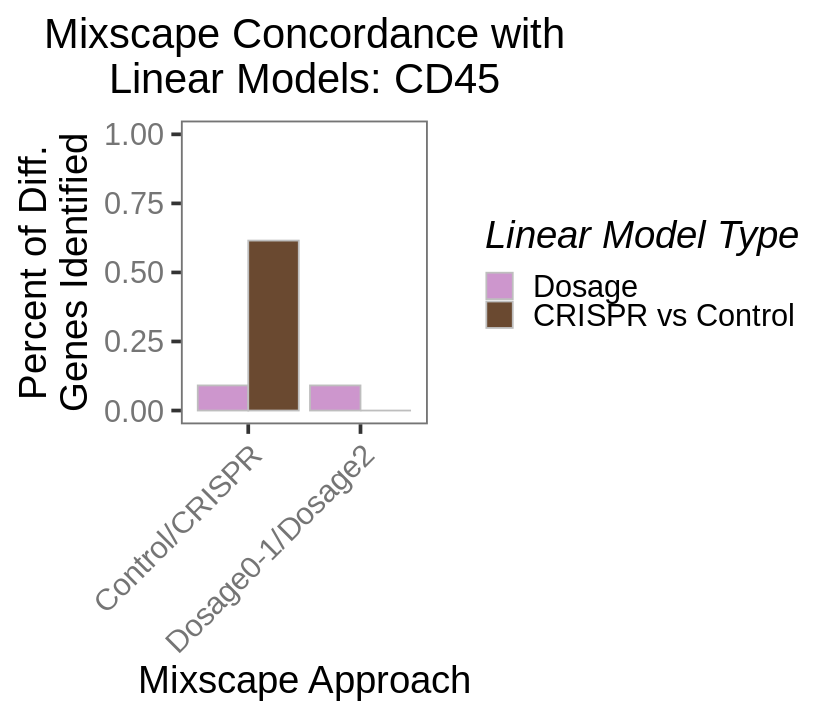

In [233]:
# pdf(file = '../Figures/Mixscape_CD45_DGEConcordance_Barplots.pdf',  height = 6, width = 7)
fig.size(6, 7)
ggplot(overlaps)+
    geom_bar(aes(x = method2_rename, fill = method1, y = pct), color = 'grey',
             stat = 'identity', position = 'dodge')+
    theme_clean()+
    scale_fill_manual(values = c('plum3', '#6a4930'), labels = c('Dosage', 'CRISPR vs Control'))+
    theme(axis.text.x = element_text(angle = 45, hjust = 1))+
    labs(fill = 'Linear Model Type')+
    ggtitle('Mixscape Concordance with\nLinear Models: CD45')+
    ylab('Percent of Diff.\nGenes Identified')+
    xlab('Mixscape Approach')+
    ylim(c(0, 1))
# dev.off()

In [ ]:
'PTPRC' %in% set1
'PTPRC' %in% set2
'PTPRC' %in% set3
'PTPRC' %in% set4

## End

In [237]:
sessionInfo()

R version 4.2.3 (2023-03-15)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /PHShome/mc1070/anaconda3/envs/seurat5_env/lib/libopenblasp-r0.3.27.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] dendsort_0.3.4               patchwork_1.2.0             
 [3] magrittr_2.0.3               thp1.eccite.SeuratData_3.1.5
 [5] SeuratData_0.2.2.9001        lubridate_1.9.3             
 [7] forcats_1.0.0                stringr_1.5.1               
 [9] dplyr_1.1.4                  purrr_1.